In [12]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import time 
#import utils
import sys
sys.path.append('..')
from PIL import Image
import numpy as np
import tensorflow as tf
from random import shuffle
tf.enable_eager_execution()

In [13]:
tf.equal(2,2)

<tf.Tensor: id=6, shape=(), dtype=bool, numpy=True>

In [14]:
IMAGE_PATH = '/home/justdial/jd/Manyata/Dataset/test/yo3'

In [22]:
train_ratio = 0.70
val_ratio = 0.15
test_ratio = 0.15
image_size = 53
num_channels = 3

In [23]:
a = os.listdir(IMAGE_PATH)
num_classes = len(a)

In [24]:
tfrecord_train = 'tfrecord_dataset/tfrecord_' + str(image_size) + '_' + str(num_classes) + '_' + str(int(train_ratio*100)) + '_DAO_train'
tfrecord_val = 'tfrecord_dataset/tfrecord_' + str(image_size) + '_' + str(num_classes) + '_' + str(int(train_ratio*100)) + '_DAO_val'
tfrecord_test = 'tfrecord_dataset/tfrecord_' + str(image_size) + '_' + str(num_classes) + '_' + str(int(train_ratio*100)) + '_DAO_test'

In [25]:
def _int64_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))
def _bytes_feature(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))


In [26]:
def get_image_binary(filename):
    try:
        image = Image.open(filename)        
            image = image.resize((image_size,image_size), Image.ANTIALIAS)
        image = image.tobytes()
        if (len(image) == image_size*image_size*num_channels):
            return image
    except:
        print ('"{}" can not be converted'.format(filename))
        pass
    
def write_to_tfrecord(label, binary_image):    
    example = tf.train.Example(features=tf.train.Features(feature = 
                                                          {
                                                              'label': _int64_feature(label),
                                                              'image': _bytes_feature(binary_image)  
                                                          }))        
    return example


In [27]:
train = []
val = []
test = []
label = 0
flag = True
for cat in a:
    print ('label for category {} is {}'.format(cat,label))
    list_images_cat = os.listdir(os.path.join(IMAGE_PATH, cat))
    num_images_cat = len(list_images_cat)
    if (num_images_cat > 8500):
        num_images_cat = 12500
#     if flag==False:
#         num_images_cat = 15460
#     if (cat != 'food'):
#         num_images_cat = 7730
    num_train = int(num_images_cat*train_ratio)
    num_val = int(num_images_cat*val_ratio)
    num_test = num_images_cat - (num_train + num_val)
    t1 = time.time()
    for i in range(100):
                shuffle(list_images_cat)    
    t2 = time.time()
    print ('took {} sec to shuffle {} list 100 times'.format(t2-t1, cat) )
    for i,img in enumerate(list_images_cat):
        if (i<num_train):
            train.append([os.path.join(os.path.join(IMAGE_PATH, cat),img), label])
        elif (i<num_val+num_train and i>=num_train):
            val.append([os.path.join(os.path.join(IMAGE_PATH, cat),img), label])
        elif (i>= num_val+num_train and i<num_images_cat):
            test.append([os.path.join(os.path.join(IMAGE_PATH, cat),img), label])
    print (len(train))
    label += 1
#     if cat == 'food':
#         label += 1
#         flag = False

label for category drinks is 0
took 0.371737957001 sec to shuffle drinks list 100 times
8750
label for category ambience is 1
took 0.350652933121 sec to shuffle ambience list 100 times
17500
label for category Others is 2
took 0.286978006363 sec to shuffle Others list 100 times
26250


In [28]:
def mean_norm(train_file):
    mean_sum = 0.0
    count = 0
    with tf.device('/gpu:0'):
        for image in train_file:        
            try:
                img = Image.open(image[0])
                img_mean = np.mean(img)
                mean_sum += img_mean
                count +=1
            except:
                print ('{} is corrupted'.format(image[0].split('/')[-1]))
                pass 
    
                    
    print ('Mean of training images is {}'.format(mean_sum/count))
    return int((mean_sum/count))


In [29]:
#print ('Taking mean from all the training images')
#train_mean = mean_norm(train)  
#print ('Training images mean value: {}'.format(train_mean))
#train_mean = 116
writer1 = tf.python_io.TFRecordWriter(tfrecord_train)
writer2 = tf.python_io.TFRecordWriter(tfrecord_val)
writer3 = tf.python_io.TFRecordWriter(tfrecord_test)
for i in range(100):
    shuffle(train)
    shuffle(val)
    shuffle(test)

print ('Creating TFRecord for training')
for image in train:
    try:
        binary_image = get_image_binary(image[0])
        example = write_to_tfrecord(image[1], binary_image)
        writer1.write(example.SerializeToString())
    except:       
        pass
print ('Creating TFRecord for validation')
for image in val:
    try:
        binary_image = get_image_binary(image[0])
        example = write_to_tfrecord(image[1], binary_image)
        writer2.write(example.SerializeToString())
    except:       
        pass
print ('Creating TFRecord for test')
for image in test:
    try:
        binary_image = get_image_binary(image[0])
        example = write_to_tfrecord(image[1], binary_image)
        writer3.write(example.SerializeToString())
    except:       
        pass
writer1.close()
writer2.close()
writer3.close()
print ('TFrecord file for train, validation and test dataset has been created')

    
    

Creating TFRecord for training
Creating TFRecord for validation
Creating TFRecord for test
TFrecord file for train, validation and test dataset has been created


In [19]:
train_mean = mean_norm(train) 

997308-cocktail.jpg is corrupted
710848.jpg is corrupted
Mean of training images is 111.58088140186688


NameError: name 'train_ratiomean' is not defined

In [20]:
print (train_mean)

111


In [17]:
a = Image.open('/home/justdial/Desktop/hop-veggie-mumbai-1gkkn7u7ug.jpg')

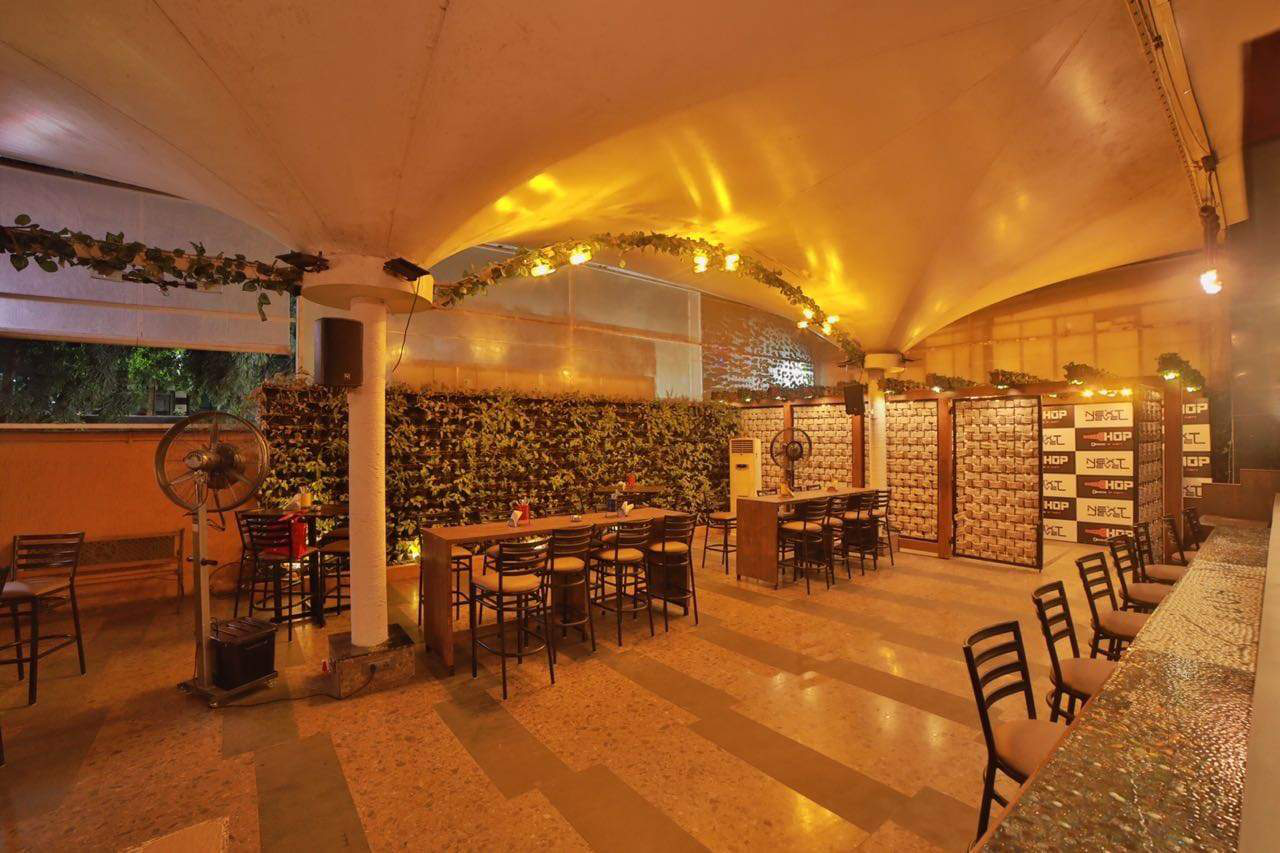

In [18]:
a

In [27]:
import pandas as pd

In [39]:
#l = pd.read_('/home/justdial/Downloads/hotel_img_url_1.txt')
data = pd.read_csv('/home/justdial/Downloads/hotel_img_url_1.txt', header=None)
#data.columns = ["a", "b", "c", "etc."]

In [64]:
di = data[0]
listdir = os.listdir('/home/justdial/Hotels/')
count = 0
for i in di:
    image_name = i.split(' ')[-1] 
    if image_name in listdir:
        #print ('not in listdir')
        count += 1
print (count)


100000


In [67]:
print (listdir[0])
print (image_name)

88563894.jpg
39856226.jpg


In [75]:
a = di[100].split(' ')[-1]
print (len(di))

100000


In [73]:

if a in listdir:
    print ('yes')

yes


In [53]:
if a in listdir:
    print ('yes')

In [76]:
p=[]
for image in di:
    image_name = image.split(' ')[-1]
    p.append(image_name)
print (len(p))

100000


In [84]:
count = 0
for image in p:
    #print (image)
    for f in listdir:
        #print (f)
        if f==image:
            print ('match {} and {}'.format(f, image))
            count += 1
            break
        #print ('yes')
        #count += 1
print (count)

match 79151388.jpg and 79151388.jpg
match 79151410.jpg and 79151410.jpg
match 80577025.jpg and 80577025.jpg
match 80577328.jpg and 80577328.jpg
match 116313885.jpg and 116313885.jpg
match 116313893.jpg and 116313893.jpg
match 116313895.jpg and 116313895.jpg
match 116313897.jpg and 116313897.jpg
match 116313900.jpg and 116313900.jpg
match 116313901.jpg and 116313901.jpg
match 116313906.jpg and 116313906.jpg
match 116313916.jpg and 116313916.jpg
match 116313920.jpg and 116313920.jpg
match 116313923.jpg and 116313923.jpg
match 116313926.jpg and 116313926.jpg
match 116313929.jpg and 116313929.jpg
match 116313936.jpg and 116313936.jpg
match 116313945.jpg and 116313945.jpg
match 116313948.jpg and 116313948.jpg
match 116313953.jpg and 116313953.jpg
match 116313956.jpg and 116313956.jpg
match 116313961.jpg and 116313961.jpg
match 116313967.jpg and 116313967.jpg
match 116313971.jpg and 116313971.jpg
match 116315465.jpg and 116315465.jpg
match 116315470.jpg and 116315470.jpg
match 116315472.jpg 

match 116416926.jpg and 116416926.jpg
match 116416927.jpg and 116416927.jpg
match 116416933.jpg and 116416933.jpg
match 116416938.jpg and 116416938.jpg
match 116416945.jpg and 116416945.jpg
match 116416948.jpg and 116416948.jpg
match 116416954.jpg and 116416954.jpg
match 116416961.jpg and 116416961.jpg
match 116416962.jpg and 116416962.jpg
match 116416965.jpg and 116416965.jpg
match 116416968.jpg and 116416968.jpg
match 116416972.jpg and 116416972.jpg
match 116416977.jpg and 116416977.jpg
match 116416978.jpg and 116416978.jpg
match 116416985.jpg and 116416985.jpg
match 116416987.jpg and 116416987.jpg
match 116416996.jpg and 116416996.jpg
match 116416999.jpg and 116416999.jpg
match 116417005.jpg and 116417005.jpg
match 116417014.jpg and 116417014.jpg
match 116417018.jpg and 116417018.jpg
match 116417020.jpg and 116417020.jpg
match 116417023.jpg and 116417023.jpg
match 116417027.jpg and 116417027.jpg
match 116417034.jpg and 116417034.jpg
match 116417040.jpg and 116417040.jpg
match 116417

match 116432808.jpg and 116432808.jpg
match 116432814.jpg and 116432814.jpg
match 116432816.jpg and 116432816.jpg
match 116432818.jpg and 116432818.jpg
match 116432821.jpg and 116432821.jpg
match 116432823.jpg and 116432823.jpg
match 116432829.jpg and 116432829.jpg
match 116432831.jpg and 116432831.jpg
match 116432834.jpg and 116432834.jpg
match 116432836.jpg and 116432836.jpg
match 116432839.jpg and 116432839.jpg
match 116432844.jpg and 116432844.jpg
match 116432849.jpg and 116432849.jpg
match 116432852.jpg and 116432852.jpg
match 116432854.jpg and 116432854.jpg
match 116432856.jpg and 116432856.jpg
match 116432860.jpg and 116432860.jpg
match 116432866.jpg and 116432866.jpg
match 116434775.jpg and 116434775.jpg
match 116434776.jpg and 116434776.jpg
match 116434790.jpg and 116434790.jpg
match 116434795.jpg and 116434795.jpg
match 116434798.jpg and 116434798.jpg
match 116434805.jpg and 116434805.jpg
match 116434808.jpg and 116434808.jpg
match 116434811.jpg and 116434811.jpg
match 116434

match 116447397.jpg and 116447397.jpg
match 116447410.jpg and 116447410.jpg
match 116447413.jpg and 116447413.jpg
match 116447417.jpg and 116447417.jpg
match 116447423.jpg and 116447423.jpg
match 116447426.jpg and 116447426.jpg
match 116447427.jpg and 116447427.jpg
match 116447432.jpg and 116447432.jpg
match 116447434.jpg and 116447434.jpg
match 116447438.jpg and 116447438.jpg
match 116447442.jpg and 116447442.jpg
match 116447446.jpg and 116447446.jpg
match 116447450.jpg and 116447450.jpg
match 116447453.jpg and 116447453.jpg
match 116447456.jpg and 116447456.jpg
match 116447459.jpg and 116447459.jpg
match 116447461.jpg and 116447461.jpg
match 116447464.jpg and 116447464.jpg
match 116447467.jpg and 116447467.jpg
match 116447471.jpg and 116447471.jpg
match 116447473.jpg and 116447473.jpg
match 116447475.jpg and 116447475.jpg
match 116447477.jpg and 116447477.jpg
match 116447479.jpg and 116447479.jpg
match 116447483.jpg and 116447483.jpg
match 116447484.jpg and 116447484.jpg
match 116447

match 116455069.jpg and 116455069.jpg
match 116455071.jpg and 116455071.jpg
match 116455073.jpg and 116455073.jpg
match 116455075.jpg and 116455075.jpg
match 116455077.jpg and 116455077.jpg
match 116455078.jpg and 116455078.jpg
match 116455079.jpg and 116455079.jpg
match 116455081.jpg and 116455081.jpg
match 116455082.jpg and 116455082.jpg
match 116455084.jpg and 116455084.jpg
match 116455086.jpg and 116455086.jpg
match 116455088.jpg and 116455088.jpg
match 116455089.jpg and 116455089.jpg
match 116455091.jpg and 116455091.jpg
match 116455093.jpg and 116455093.jpg
match 116455094.jpg and 116455094.jpg
match 116455096.jpg and 116455096.jpg
match 116455097.jpg and 116455097.jpg
match 116455099.jpg and 116455099.jpg
match 116455101.jpg and 116455101.jpg
match 116455103.jpg and 116455103.jpg
match 116455105.jpg and 116455105.jpg
match 116455108.jpg and 116455108.jpg
match 116455109.jpg and 116455109.jpg
match 116455111.jpg and 116455111.jpg
match 116455112.jpg and 116455112.jpg
match 116455

match 116460627.jpg and 116460627.jpg
match 116460629.jpg and 116460629.jpg
match 116460631.jpg and 116460631.jpg
match 116460634.jpg and 116460634.jpg
match 116460635.jpg and 116460635.jpg
match 116460637.jpg and 116460637.jpg
match 116460638.jpg and 116460638.jpg
match 116460641.jpg and 116460641.jpg
match 116460644.jpg and 116460644.jpg
match 116460646.jpg and 116460646.jpg
match 116460649.jpg and 116460649.jpg
match 116460651.jpg and 116460651.jpg
match 116460652.jpg and 116460652.jpg
match 116460654.jpg and 116460654.jpg
match 116460656.jpg and 116460656.jpg
match 116460658.jpg and 116460658.jpg
match 116460660.jpg and 116460660.jpg
match 116460662.jpg and 116460662.jpg
match 116460666.jpg and 116460666.jpg
match 116460668.jpg and 116460668.jpg
match 116460669.jpg and 116460669.jpg
match 116460672.jpg and 116460672.jpg
match 116460673.jpg and 116460673.jpg
match 116460674.jpg and 116460674.jpg
match 116460675.jpg and 116460675.jpg
match 116460677.jpg and 116460677.jpg
match 116460

match 116474663.jpg and 116474663.jpg
match 116474666.jpg and 116474666.jpg
match 116474670.jpg and 116474670.jpg
match 116474672.jpg and 116474672.jpg
match 116474676.jpg and 116474676.jpg
match 116474680.jpg and 116474680.jpg
match 116474684.jpg and 116474684.jpg
match 116474688.jpg and 116474688.jpg
match 116474690.jpg and 116474690.jpg
match 116474694.jpg and 116474694.jpg
match 116474697.jpg and 116474697.jpg
match 116474700.jpg and 116474700.jpg
match 116474703.jpg and 116474703.jpg
match 116474705.jpg and 116474705.jpg
match 116474709.jpg and 116474709.jpg
match 116474713.jpg and 116474713.jpg
match 116474716.jpg and 116474716.jpg
match 116474719.jpg and 116474719.jpg
match 116474722.jpg and 116474722.jpg
match 116474725.jpg and 116474725.jpg
match 116474729.jpg and 116474729.jpg
match 116474732.jpg and 116474732.jpg
match 116474736.jpg and 116474736.jpg
match 116474739.jpg and 116474739.jpg
match 116474742.jpg and 116474742.jpg
match 116474745.jpg and 116474745.jpg
match 116474

match 116492175.jpg and 116492175.jpg
match 116492179.jpg and 116492179.jpg
match 116492184.jpg and 116492184.jpg
match 116492188.jpg and 116492188.jpg
match 116492192.jpg and 116492192.jpg
match 116492197.jpg and 116492197.jpg
match 116492203.jpg and 116492203.jpg
match 116492209.jpg and 116492209.jpg
match 116492212.jpg and 116492212.jpg
match 116492217.jpg and 116492217.jpg
match 116492220.jpg and 116492220.jpg
match 116492224.jpg and 116492224.jpg
match 116492227.jpg and 116492227.jpg
match 116492233.jpg and 116492233.jpg
match 116492238.jpg and 116492238.jpg
match 116492244.jpg and 116492244.jpg
match 116492250.jpg and 116492250.jpg
match 116492255.jpg and 116492255.jpg
match 116492259.jpg and 116492259.jpg
match 116492263.jpg and 116492263.jpg
match 116492268.jpg and 116492268.jpg
match 116492270.jpg and 116492270.jpg
match 116492274.jpg and 116492274.jpg
match 116492277.jpg and 116492277.jpg
match 116492281.jpg and 116492281.jpg
match 116492282.jpg and 116492282.jpg
match 116492

match 116506096.jpg and 116506096.jpg
match 116506097.jpg and 116506097.jpg
match 116506100.jpg and 116506100.jpg
match 116506101.jpg and 116506101.jpg
match 116506104.jpg and 116506104.jpg
match 116506105.jpg and 116506105.jpg
match 116506108.jpg and 116506108.jpg
match 116506109.jpg and 116506109.jpg
match 116506114.jpg and 116506114.jpg
match 116506115.jpg and 116506115.jpg
match 116506119.jpg and 116506119.jpg
match 116506120.jpg and 116506120.jpg
match 116506122.jpg and 116506122.jpg
match 116506124.jpg and 116506124.jpg
match 116506126.jpg and 116506126.jpg
match 116506129.jpg and 116506129.jpg
match 116506130.jpg and 116506130.jpg
match 116506131.jpg and 116506131.jpg
match 116506134.jpg and 116506134.jpg
match 116506136.jpg and 116506136.jpg
match 116506138.jpg and 116506138.jpg
match 116506142.jpg and 116506142.jpg
match 116506145.jpg and 116506145.jpg
match 116506148.jpg and 116506148.jpg
match 116506150.jpg and 116506150.jpg
match 116506153.jpg and 116506153.jpg
match 116506

match 116520837.jpg and 116520837.jpg
match 116520841.jpg and 116520841.jpg
match 116520845.jpg and 116520845.jpg
match 116520849.jpg and 116520849.jpg
match 116520851.jpg and 116520851.jpg
match 116520854.jpg and 116520854.jpg
match 116520858.jpg and 116520858.jpg
match 116520861.jpg and 116520861.jpg
match 116520866.jpg and 116520866.jpg
match 116520870.jpg and 116520870.jpg
match 116520873.jpg and 116520873.jpg
match 116520877.jpg and 116520877.jpg
match 116520881.jpg and 116520881.jpg
match 116520884.jpg and 116520884.jpg
match 116520889.jpg and 116520889.jpg
match 116520895.jpg and 116520895.jpg
match 116520901.jpg and 116520901.jpg
match 116520909.jpg and 116520909.jpg
match 116520915.jpg and 116520915.jpg
match 116520916.jpg and 116520916.jpg
match 116520919.jpg and 116520919.jpg
match 116520923.jpg and 116520923.jpg
match 116520925.jpg and 116520925.jpg
match 116520928.jpg and 116520928.jpg
match 116520931.jpg and 116520931.jpg
match 116520934.jpg and 116520934.jpg
match 116520

match 116534322.jpg and 116534322.jpg
match 116534326.jpg and 116534326.jpg
match 116534332.jpg and 116534332.jpg
match 116534338.jpg and 116534338.jpg
match 116534343.jpg and 116534343.jpg
match 116534346.jpg and 116534346.jpg
match 116534354.jpg and 116534354.jpg
match 116534357.jpg and 116534357.jpg
match 116534360.jpg and 116534360.jpg
match 116534368.jpg and 116534368.jpg
match 116534372.jpg and 116534372.jpg
match 116534375.jpg and 116534375.jpg
match 116534378.jpg and 116534378.jpg
match 116534380.jpg and 116534380.jpg
match 116534384.jpg and 116534384.jpg
match 116534389.jpg and 116534389.jpg
match 116534395.jpg and 116534395.jpg
match 116534397.jpg and 116534397.jpg
match 116534399.jpg and 116534399.jpg
match 116534407.jpg and 116534407.jpg
match 116534413.jpg and 116534413.jpg
match 116534422.jpg and 116534422.jpg
match 116534429.jpg and 116534429.jpg
match 116534435.jpg and 116534435.jpg
match 116534442.jpg and 116534442.jpg
match 116534444.jpg and 116534444.jpg
match 116534

match 116537785.jpg and 116537785.jpg
match 116537786.jpg and 116537786.jpg
match 116537787.jpg and 116537787.jpg
match 116537788.jpg and 116537788.jpg
match 116537789.jpg and 116537789.jpg
match 116537791.jpg and 116537791.jpg
match 116537792.jpg and 116537792.jpg
match 116537793.jpg and 116537793.jpg
match 116537794.jpg and 116537794.jpg
match 116537798.jpg and 116537798.jpg
match 116537799.jpg and 116537799.jpg
match 116537802.jpg and 116537802.jpg
match 116537803.jpg and 116537803.jpg
match 116537807.jpg and 116537807.jpg
match 116537808.jpg and 116537808.jpg
match 116537812.jpg and 116537812.jpg
match 116537813.jpg and 116537813.jpg
match 116537815.jpg and 116537815.jpg
match 116537817.jpg and 116537817.jpg
match 116537820.jpg and 116537820.jpg
match 116537821.jpg and 116537821.jpg
match 116537822.jpg and 116537822.jpg
match 116537823.jpg and 116537823.jpg
match 116537824.jpg and 116537824.jpg
match 116537825.jpg and 116537825.jpg
match 116537827.jpg and 116537827.jpg
match 116537

match 116539646.jpg and 116539646.jpg
match 116539651.jpg and 116539651.jpg
match 116539652.jpg and 116539652.jpg
match 116540900.jpg and 116540900.jpg
match 116540902.jpg and 116540902.jpg
match 116540903.jpg and 116540903.jpg
match 116540905.jpg and 116540905.jpg
match 116540908.jpg and 116540908.jpg
match 116540911.jpg and 116540911.jpg
match 116540914.jpg and 116540914.jpg
match 116540915.jpg and 116540915.jpg
match 116540917.jpg and 116540917.jpg
match 116540922.jpg and 116540922.jpg
match 116540923.jpg and 116540923.jpg
match 116540924.jpg and 116540924.jpg
match 116540925.jpg and 116540925.jpg
match 116540926.jpg and 116540926.jpg
match 116540928.jpg and 116540928.jpg
match 116540929.jpg and 116540929.jpg
match 116540932.jpg and 116540932.jpg
match 116540934.jpg and 116540934.jpg
match 116540937.jpg and 116540937.jpg
match 116540940.jpg and 116540940.jpg
match 116540943.jpg and 116540943.jpg
match 116540948.jpg and 116540948.jpg
match 116540949.jpg and 116540949.jpg
match 116540

match 116542257.jpg and 116542257.jpg
match 116542258.jpg and 116542258.jpg
match 116542259.jpg and 116542259.jpg
match 116542260.jpg and 116542260.jpg
match 116542261.jpg and 116542261.jpg
match 116542262.jpg and 116542262.jpg
match 116542264.jpg and 116542264.jpg
match 116542265.jpg and 116542265.jpg
match 116542266.jpg and 116542266.jpg
match 116542267.jpg and 116542267.jpg
match 116542268.jpg and 116542268.jpg
match 116542269.jpg and 116542269.jpg
match 116542270.jpg and 116542270.jpg
match 116542271.jpg and 116542271.jpg
match 116542273.jpg and 116542273.jpg
match 116542274.jpg and 116542274.jpg
match 116542276.jpg and 116542276.jpg
match 116542277.jpg and 116542277.jpg
match 116542278.jpg and 116542278.jpg
match 116542279.jpg and 116542279.jpg
match 116542280.jpg and 116542280.jpg
match 116542281.jpg and 116542281.jpg
match 116542282.jpg and 116542282.jpg
match 116542283.jpg and 116542283.jpg
match 116542284.jpg and 116542284.jpg
match 116542285.jpg and 116542285.jpg
match 116542

match 116543584.jpg and 116543584.jpg
match 116543585.jpg and 116543585.jpg
match 116543586.jpg and 116543586.jpg
match 116543587.jpg and 116543587.jpg
match 116543588.jpg and 116543588.jpg
match 116543589.jpg and 116543589.jpg
match 116543590.jpg and 116543590.jpg
match 116543591.jpg and 116543591.jpg
match 116543592.jpg and 116543592.jpg
match 116543593.jpg and 116543593.jpg
match 116543594.jpg and 116543594.jpg
match 116543595.jpg and 116543595.jpg
match 116543596.jpg and 116543596.jpg
match 116543597.jpg and 116543597.jpg
match 116543598.jpg and 116543598.jpg
match 116543599.jpg and 116543599.jpg
match 116543600.jpg and 116543600.jpg
match 116543601.jpg and 116543601.jpg
match 116543602.jpg and 116543602.jpg
match 116543603.jpg and 116543603.jpg
match 116543604.jpg and 116543604.jpg
match 116543605.jpg and 116543605.jpg
match 116543606.jpg and 116543606.jpg
match 116543607.jpg and 116543607.jpg
match 116543608.jpg and 116543608.jpg
match 116543609.jpg and 116543609.jpg
match 116543

match 116544860.jpg and 116544860.jpg
match 116544861.jpg and 116544861.jpg
match 116544862.jpg and 116544862.jpg
match 116544863.jpg and 116544863.jpg
match 116544864.jpg and 116544864.jpg
match 116544865.jpg and 116544865.jpg
match 116544866.jpg and 116544866.jpg
match 116544867.jpg and 116544867.jpg
match 116544869.jpg and 116544869.jpg
match 116544870.jpg and 116544870.jpg
match 116544871.jpg and 116544871.jpg
match 116544872.jpg and 116544872.jpg
match 116544873.jpg and 116544873.jpg
match 116544874.jpg and 116544874.jpg
match 116544875.jpg and 116544875.jpg
match 116544876.jpg and 116544876.jpg
match 116544877.jpg and 116544877.jpg
match 116544878.jpg and 116544878.jpg
match 116544879.jpg and 116544879.jpg
match 116544880.jpg and 116544880.jpg
match 116544881.jpg and 116544881.jpg
match 116544882.jpg and 116544882.jpg
match 116544883.jpg and 116544883.jpg
match 116544884.jpg and 116544884.jpg
match 116544885.jpg and 116544885.jpg
match 116544886.jpg and 116544886.jpg
match 116544

match 116546303.jpg and 116546303.jpg
match 116546305.jpg and 116546305.jpg
match 116546306.jpg and 116546306.jpg
match 116546307.jpg and 116546307.jpg
match 116546308.jpg and 116546308.jpg
match 116546309.jpg and 116546309.jpg
match 116546311.jpg and 116546311.jpg
match 116546312.jpg and 116546312.jpg
match 116546313.jpg and 116546313.jpg
match 116546314.jpg and 116546314.jpg
match 116546315.jpg and 116546315.jpg
match 116546317.jpg and 116546317.jpg
match 116546318.jpg and 116546318.jpg
match 116546319.jpg and 116546319.jpg
match 116546320.jpg and 116546320.jpg
match 116546321.jpg and 116546321.jpg
match 116546323.jpg and 116546323.jpg
match 116546324.jpg and 116546324.jpg
match 116546325.jpg and 116546325.jpg
match 116546326.jpg and 116546326.jpg
match 116546327.jpg and 116546327.jpg
match 116546329.jpg and 116546329.jpg
match 116546330.jpg and 116546330.jpg
match 116546331.jpg and 116546331.jpg
match 116546332.jpg and 116546332.jpg
match 116546333.jpg and 116546333.jpg
match 116546

match 116547022.jpg and 116547022.jpg
match 116547023.jpg and 116547023.jpg
match 116547024.jpg and 116547024.jpg
match 116547025.jpg and 116547025.jpg
match 116547027.jpg and 116547027.jpg
match 116547028.jpg and 116547028.jpg
match 116547029.jpg and 116547029.jpg
match 116547030.jpg and 116547030.jpg
match 116547031.jpg and 116547031.jpg
match 116547032.jpg and 116547032.jpg
match 116547033.jpg and 116547033.jpg
match 116547034.jpg and 116547034.jpg
match 116547036.jpg and 116547036.jpg
match 116547037.jpg and 116547037.jpg
match 116547038.jpg and 116547038.jpg
match 116547039.jpg and 116547039.jpg
match 116547040.jpg and 116547040.jpg
match 116547041.jpg and 116547041.jpg
match 116547043.jpg and 116547043.jpg
match 116547045.jpg and 116547045.jpg
match 116547046.jpg and 116547046.jpg
match 116547047.jpg and 116547047.jpg
match 116547048.jpg and 116547048.jpg
match 116547049.jpg and 116547049.jpg
match 116547050.jpg and 116547050.jpg
match 116547051.jpg and 116547051.jpg
match 116547

match 116547971.jpg and 116547971.jpg
match 116547972.jpg and 116547972.jpg
match 116547973.jpg and 116547973.jpg
match 116547974.jpg and 116547974.jpg
match 116547975.jpg and 116547975.jpg
match 116547976.jpg and 116547976.jpg
match 116547977.jpg and 116547977.jpg
match 116547978.jpg and 116547978.jpg
match 116547979.jpg and 116547979.jpg
match 116547980.jpg and 116547980.jpg
match 116547981.jpg and 116547981.jpg
match 116547982.jpg and 116547982.jpg
match 116547983.jpg and 116547983.jpg
match 116547984.jpg and 116547984.jpg
match 116547985.jpg and 116547985.jpg
match 116547986.jpg and 116547986.jpg
match 116547987.jpg and 116547987.jpg
match 116547988.jpg and 116547988.jpg
match 116547989.jpg and 116547989.jpg
match 116547990.jpg and 116547990.jpg
match 116547991.jpg and 116547991.jpg
match 116547992.jpg and 116547992.jpg
match 116547993.jpg and 116547993.jpg
match 116547994.jpg and 116547994.jpg
match 116547995.jpg and 116547995.jpg
match 116547996.jpg and 116547996.jpg
match 116547

match 116548621.jpg and 116548621.jpg
match 116548623.jpg and 116548623.jpg
match 116548624.jpg and 116548624.jpg
match 116548627.jpg and 116548627.jpg
match 116548628.jpg and 116548628.jpg
match 116548631.jpg and 116548631.jpg
match 116548632.jpg and 116548632.jpg
match 116548633.jpg and 116548633.jpg
match 116548635.jpg and 116548635.jpg
match 116548636.jpg and 116548636.jpg
match 116548637.jpg and 116548637.jpg
match 116548638.jpg and 116548638.jpg
match 116548641.jpg and 116548641.jpg
match 116548643.jpg and 116548643.jpg
match 116548644.jpg and 116548644.jpg
match 116548646.jpg and 116548646.jpg
match 116548648.jpg and 116548648.jpg
match 116548649.jpg and 116548649.jpg
match 116548652.jpg and 116548652.jpg
match 116548655.jpg and 116548655.jpg
match 116548656.jpg and 116548656.jpg
match 116548659.jpg and 116548659.jpg
match 116548660.jpg and 116548660.jpg
match 116548661.jpg and 116548661.jpg
match 116548663.jpg and 116548663.jpg
match 116548666.jpg and 116548666.jpg
match 116548

match 116551109.jpg and 116551109.jpg
match 116551110.jpg and 116551110.jpg
match 116551111.jpg and 116551111.jpg
match 116551113.jpg and 116551113.jpg
match 116551114.jpg and 116551114.jpg
match 116551115.jpg and 116551115.jpg
match 116551116.jpg and 116551116.jpg
match 116551117.jpg and 116551117.jpg
match 116551118.jpg and 116551118.jpg
match 116551119.jpg and 116551119.jpg
match 116551120.jpg and 116551120.jpg
match 116551121.jpg and 116551121.jpg
match 116551122.jpg and 116551122.jpg
match 116551123.jpg and 116551123.jpg
match 116551124.jpg and 116551124.jpg
match 116551125.jpg and 116551125.jpg
match 116551126.jpg and 116551126.jpg
match 116551127.jpg and 116551127.jpg
match 116551128.jpg and 116551128.jpg
match 116551129.jpg and 116551129.jpg
match 116551130.jpg and 116551130.jpg
match 116551131.jpg and 116551131.jpg
match 116551132.jpg and 116551132.jpg
match 116551133.jpg and 116551133.jpg
match 116551134.jpg and 116551134.jpg
match 116551135.jpg and 116551135.jpg
match 116551

match 116551897.jpg and 116551897.jpg
match 116551899.jpg and 116551899.jpg
match 116551900.jpg and 116551900.jpg
match 116551901.jpg and 116551901.jpg
match 116551902.jpg and 116551902.jpg
match 116551903.jpg and 116551903.jpg
match 116551907.jpg and 116551907.jpg
match 116551908.jpg and 116551908.jpg
match 116551909.jpg and 116551909.jpg
match 116551910.jpg and 116551910.jpg
match 116551911.jpg and 116551911.jpg
match 116551912.jpg and 116551912.jpg
match 116551913.jpg and 116551913.jpg
match 116551914.jpg and 116551914.jpg
match 116551915.jpg and 116551915.jpg
match 116551916.jpg and 116551916.jpg
match 116551917.jpg and 116551917.jpg
match 116551918.jpg and 116551918.jpg
match 116551922.jpg and 116551922.jpg
match 116551923.jpg and 116551923.jpg
match 116551924.jpg and 116551924.jpg
match 116551925.jpg and 116551925.jpg
match 116551926.jpg and 116551926.jpg
match 116551927.jpg and 116551927.jpg
match 116551928.jpg and 116551928.jpg
match 116551929.jpg and 116551929.jpg
match 116551

match 116553344.jpg and 116553344.jpg
match 116553345.jpg and 116553345.jpg
match 116553346.jpg and 116553346.jpg
match 116553347.jpg and 116553347.jpg
match 116553349.jpg and 116553349.jpg
match 116553350.jpg and 116553350.jpg
match 116553352.jpg and 116553352.jpg
match 116553353.jpg and 116553353.jpg
match 116553354.jpg and 116553354.jpg
match 116553355.jpg and 116553355.jpg
match 116553356.jpg and 116553356.jpg
match 116553358.jpg and 116553358.jpg
match 116553359.jpg and 116553359.jpg
match 116553360.jpg and 116553360.jpg
match 116553361.jpg and 116553361.jpg
match 116553362.jpg and 116553362.jpg
match 116553364.jpg and 116553364.jpg
match 116553365.jpg and 116553365.jpg
match 116553367.jpg and 116553367.jpg
match 116553368.jpg and 116553368.jpg
match 116553369.jpg and 116553369.jpg
match 116553370.jpg and 116553370.jpg
match 116553371.jpg and 116553371.jpg
match 116553372.jpg and 116553372.jpg
match 116553374.jpg and 116553374.jpg
match 116553375.jpg and 116553375.jpg
match 116553

match 116555185.jpg and 116555185.jpg
match 116555187.jpg and 116555187.jpg
match 116555188.jpg and 116555188.jpg
match 116555189.jpg and 116555189.jpg
match 116555190.jpg and 116555190.jpg
match 116555191.jpg and 116555191.jpg
match 116555192.jpg and 116555192.jpg
match 116555193.jpg and 116555193.jpg
match 116555194.jpg and 116555194.jpg
match 116555195.jpg and 116555195.jpg
match 116555196.jpg and 116555196.jpg
match 116555197.jpg and 116555197.jpg
match 116555198.jpg and 116555198.jpg
match 116555200.jpg and 116555200.jpg
match 116555204.jpg and 116555204.jpg
match 116555205.jpg and 116555205.jpg
match 116555209.jpg and 116555209.jpg
match 116555211.jpg and 116555211.jpg
match 116555214.jpg and 116555214.jpg
match 116555216.jpg and 116555216.jpg
match 116555222.jpg and 116555222.jpg
match 116555223.jpg and 116555223.jpg
match 116555226.jpg and 116555226.jpg
match 116555227.jpg and 116555227.jpg
match 116555229.jpg and 116555229.jpg
match 116555230.jpg and 116555230.jpg
match 116555

match 116559069.jpg and 116559069.jpg
match 116559070.jpg and 116559070.jpg
match 116559072.jpg and 116559072.jpg
match 116559073.jpg and 116559073.jpg
match 116559074.jpg and 116559074.jpg
match 116559075.jpg and 116559075.jpg
match 116559076.jpg and 116559076.jpg
match 116559077.jpg and 116559077.jpg
match 116559082.jpg and 116559082.jpg
match 116559083.jpg and 116559083.jpg
match 116559084.jpg and 116559084.jpg
match 116559085.jpg and 116559085.jpg
match 116559086.jpg and 116559086.jpg
match 116559087.jpg and 116559087.jpg
match 116559088.jpg and 116559088.jpg
match 116559091.jpg and 116559091.jpg
match 116559094.jpg and 116559094.jpg
match 116559100.jpg and 116559100.jpg
match 116559101.jpg and 116559101.jpg
match 116559102.jpg and 116559102.jpg
match 116559103.jpg and 116559103.jpg
match 116559104.jpg and 116559104.jpg
match 116559106.jpg and 116559106.jpg
match 116559111.jpg and 116559111.jpg
match 116559112.jpg and 116559112.jpg
match 116559113.jpg and 116559113.jpg
match 116559

match 116575627.jpg and 116575627.jpg
match 116575634.jpg and 116575634.jpg
match 116575635.jpg and 116575635.jpg
match 116575640.jpg and 116575640.jpg
match 116575641.jpg and 116575641.jpg
match 116575646.jpg and 116575646.jpg
match 116575647.jpg and 116575647.jpg
match 116575652.jpg and 116575652.jpg
match 116575653.jpg and 116575653.jpg
match 116575659.jpg and 116575659.jpg
match 116575665.jpg and 116575665.jpg
match 116575666.jpg and 116575666.jpg
match 116575667.jpg and 116575667.jpg
match 116575669.jpg and 116575669.jpg
match 116575670.jpg and 116575670.jpg
match 116575672.jpg and 116575672.jpg
match 116575678.jpg and 116575678.jpg
match 116575685.jpg and 116575685.jpg
match 116575686.jpg and 116575686.jpg
match 116575687.jpg and 116575687.jpg
match 116575688.jpg and 116575688.jpg
match 116575694.jpg and 116575694.jpg
match 116575695.jpg and 116575695.jpg
match 116575697.jpg and 116575697.jpg
match 116575699.jpg and 116575699.jpg
match 116575700.jpg and 116575700.jpg
match 116575

match 116583416.jpg and 116583416.jpg
match 116583417.jpg and 116583417.jpg
match 116583420.jpg and 116583420.jpg
match 116583427.jpg and 116583427.jpg
match 116583431.jpg and 116583431.jpg
match 116583433.jpg and 116583433.jpg
match 116583434.jpg and 116583434.jpg
match 116583437.jpg and 116583437.jpg
match 116583440.jpg and 116583440.jpg
match 116583441.jpg and 116583441.jpg
match 116583443.jpg and 116583443.jpg
match 116583447.jpg and 116583447.jpg
match 116583449.jpg and 116583449.jpg
match 116583450.jpg and 116583450.jpg
match 116583451.jpg and 116583451.jpg
match 116583452.jpg and 116583452.jpg
match 116583453.jpg and 116583453.jpg
match 116583458.jpg and 116583458.jpg
match 116583459.jpg and 116583459.jpg
match 116583460.jpg and 116583460.jpg
match 116583461.jpg and 116583461.jpg
match 116583464.jpg and 116583464.jpg
match 116583465.jpg and 116583465.jpg
match 116583469.jpg and 116583469.jpg
match 116583470.jpg and 116583470.jpg
match 116583476.jpg and 116583476.jpg
match 116583

match 116590146.jpg and 116590146.jpg
match 116590148.jpg and 116590148.jpg
match 116590150.jpg and 116590150.jpg
match 116590152.jpg and 116590152.jpg
match 116590153.jpg and 116590153.jpg
match 116590159.jpg and 116590159.jpg
match 116590160.jpg and 116590160.jpg
match 116590161.jpg and 116590161.jpg
match 116590162.jpg and 116590162.jpg
match 116590163.jpg and 116590163.jpg
match 116590166.jpg and 116590166.jpg
match 116590168.jpg and 116590168.jpg
match 116590169.jpg and 116590169.jpg
match 116590170.jpg and 116590170.jpg
match 116590171.jpg and 116590171.jpg
match 116590177.jpg and 116590177.jpg
match 116590178.jpg and 116590178.jpg
match 116590179.jpg and 116590179.jpg
match 116590180.jpg and 116590180.jpg
match 116590181.jpg and 116590181.jpg
match 116590182.jpg and 116590182.jpg
match 116590185.jpg and 116590185.jpg
match 116590186.jpg and 116590186.jpg
match 116590187.jpg and 116590187.jpg
match 116590189.jpg and 116590189.jpg
match 116590191.jpg and 116590191.jpg
match 116590

match 116601528.jpg and 116601528.jpg
match 116601529.jpg and 116601529.jpg
match 116601530.jpg and 116601530.jpg
match 116601532.jpg and 116601532.jpg
match 116601534.jpg and 116601534.jpg
match 116601536.jpg and 116601536.jpg
match 116601538.jpg and 116601538.jpg
match 116601540.jpg and 116601540.jpg
match 116601541.jpg and 116601541.jpg
match 116601552.jpg and 116601552.jpg
match 116601553.jpg and 116601553.jpg
match 116601559.jpg and 116601559.jpg
match 116601560.jpg and 116601560.jpg
match 116601562.jpg and 116601562.jpg
match 116601565.jpg and 116601565.jpg
match 116601569.jpg and 116601569.jpg
match 116601571.jpg and 116601571.jpg
match 116601574.jpg and 116601574.jpg
match 116601579.jpg and 116601579.jpg
match 116601582.jpg and 116601582.jpg
match 116601587.jpg and 116601587.jpg
match 116601595.jpg and 116601595.jpg
match 116601598.jpg and 116601598.jpg
match 116601602.jpg and 116601602.jpg
match 116601603.jpg and 116601603.jpg
match 116601617.jpg and 116601617.jpg
match 116601

match 116607505.jpg and 116607505.jpg
match 116607506.jpg and 116607506.jpg
match 116607508.jpg and 116607508.jpg
match 116607509.jpg and 116607509.jpg
match 116607510.jpg and 116607510.jpg
match 116607511.jpg and 116607511.jpg
match 116607512.jpg and 116607512.jpg
match 116607515.jpg and 116607515.jpg
match 116607517.jpg and 116607517.jpg
match 116607518.jpg and 116607518.jpg
match 116607520.jpg and 116607520.jpg
match 116607521.jpg and 116607521.jpg
match 116607527.jpg and 116607527.jpg
match 116607528.jpg and 116607528.jpg
match 116607531.jpg and 116607531.jpg
match 116607532.jpg and 116607532.jpg
match 116607535.jpg and 116607535.jpg
match 116607536.jpg and 116607536.jpg
match 116607538.jpg and 116607538.jpg
match 116607539.jpg and 116607539.jpg
match 116607545.jpg and 116607545.jpg
match 116607546.jpg and 116607546.jpg
match 116607555.jpg and 116607555.jpg
match 116607569.jpg and 116607569.jpg
match 116607570.jpg and 116607570.jpg
match 116607577.jpg and 116607577.jpg
match 116607

match 116376457.jpg and 116376457.jpg
match 116376483.jpg and 116376483.jpg
match 116376506.jpg and 116376506.jpg
match 116376528.jpg and 116376528.jpg
match 116386106.jpg and 116386106.jpg
match 116386114.jpg and 116386114.jpg
match 116386128.jpg and 116386128.jpg
match 116386130.jpg and 116386130.jpg
match 116386132.jpg and 116386132.jpg
match 116386147.jpg and 116386147.jpg
match 116386156.jpg and 116386156.jpg
match 116386157.jpg and 116386157.jpg
match 116386160.jpg and 116386160.jpg
match 116386166.jpg and 116386166.jpg
match 116386170.jpg and 116386170.jpg
match 116386192.jpg and 116386192.jpg
match 116386196.jpg and 116386196.jpg
match 116386205.jpg and 116386205.jpg
match 116386208.jpg and 116386208.jpg
match 116386213.jpg and 116386213.jpg
match 116386233.jpg and 116386233.jpg
match 116386241.jpg and 116386241.jpg
match 116386247.jpg and 116386247.jpg
match 116386253.jpg and 116386253.jpg
match 116386258.jpg and 116386258.jpg
match 116386265.jpg and 116386265.jpg
match 116386

match 116424664.jpg and 116424664.jpg
match 116424667.jpg and 116424667.jpg
match 116424672.jpg and 116424672.jpg
match 116424673.jpg and 116424673.jpg
match 116424677.jpg and 116424677.jpg
match 116424682.jpg and 116424682.jpg
match 116424688.jpg and 116424688.jpg
match 116424690.jpg and 116424690.jpg
match 116424699.jpg and 116424699.jpg
match 116424701.jpg and 116424701.jpg
match 116424704.jpg and 116424704.jpg
match 116424709.jpg and 116424709.jpg
match 116424713.jpg and 116424713.jpg
match 116424720.jpg and 116424720.jpg
match 116424723.jpg and 116424723.jpg
match 116424731.jpg and 116424731.jpg
match 116424735.jpg and 116424735.jpg
match 116424737.jpg and 116424737.jpg
match 116424750.jpg and 116424750.jpg
match 116424751.jpg and 116424751.jpg
match 116424754.jpg and 116424754.jpg
match 116424758.jpg and 116424758.jpg
match 116424764.jpg and 116424764.jpg
match 116424769.jpg and 116424769.jpg
match 116424774.jpg and 116424774.jpg
match 116424779.jpg and 116424779.jpg
match 116424

match 116440006.jpg and 116440006.jpg
match 116440017.jpg and 116440017.jpg
match 116440021.jpg and 116440021.jpg
match 116440027.jpg and 116440027.jpg
match 116440029.jpg and 116440029.jpg
match 116440031.jpg and 116440031.jpg
match 116443784.jpg and 116443784.jpg
match 116443786.jpg and 116443786.jpg
match 116443792.jpg and 116443792.jpg
match 116443795.jpg and 116443795.jpg
match 116443796.jpg and 116443796.jpg
match 116443798.jpg and 116443798.jpg
match 116443800.jpg and 116443800.jpg
match 116443801.jpg and 116443801.jpg
match 116443803.jpg and 116443803.jpg
match 116443804.jpg and 116443804.jpg
match 116443815.jpg and 116443815.jpg
match 116443819.jpg and 116443819.jpg
match 116443825.jpg and 116443825.jpg
match 116443828.jpg and 116443828.jpg
match 116443830.jpg and 116443830.jpg
match 116443832.jpg and 116443832.jpg
match 116443835.jpg and 116443835.jpg
match 116443836.jpg and 116443836.jpg
match 116443838.jpg and 116443838.jpg
match 116443839.jpg and 116443839.jpg
match 116443

match 116451643.jpg and 116451643.jpg
match 116451649.jpg and 116451649.jpg
match 116451652.jpg and 116451652.jpg
match 116451653.jpg and 116451653.jpg
match 116451657.jpg and 116451657.jpg
match 116451659.jpg and 116451659.jpg
match 116451661.jpg and 116451661.jpg
match 116451664.jpg and 116451664.jpg
match 116451666.jpg and 116451666.jpg
match 116451668.jpg and 116451668.jpg
match 116451671.jpg and 116451671.jpg
match 116451673.jpg and 116451673.jpg
match 116451674.jpg and 116451674.jpg
match 116451678.jpg and 116451678.jpg
match 116451681.jpg and 116451681.jpg
match 116451686.jpg and 116451686.jpg
match 116451689.jpg and 116451689.jpg
match 116451692.jpg and 116451692.jpg
match 116451695.jpg and 116451695.jpg
match 116451699.jpg and 116451699.jpg
match 116451700.jpg and 116451700.jpg
match 116451704.jpg and 116451704.jpg
match 116451707.jpg and 116451707.jpg
match 116451709.jpg and 116451709.jpg
match 116451710.jpg and 116451710.jpg
match 116451712.jpg and 116451712.jpg
match 116451

match 116457547.jpg and 116457547.jpg
match 116457549.jpg and 116457549.jpg
match 116457552.jpg and 116457552.jpg
match 116457555.jpg and 116457555.jpg
match 116457557.jpg and 116457557.jpg
match 116457558.jpg and 116457558.jpg
match 116457560.jpg and 116457560.jpg
match 116457561.jpg and 116457561.jpg
match 116457562.jpg and 116457562.jpg
match 116457564.jpg and 116457564.jpg
match 116457565.jpg and 116457565.jpg
match 116457566.jpg and 116457566.jpg
match 116457567.jpg and 116457567.jpg
match 116457569.jpg and 116457569.jpg
match 116457571.jpg and 116457571.jpg
match 116457572.jpg and 116457572.jpg
match 116457575.jpg and 116457575.jpg
match 116459663.jpg and 116459663.jpg
match 116459715.jpg and 116459715.jpg
match 116459716.jpg and 116459716.jpg
match 116459745.jpg and 116459745.jpg
match 116459747.jpg and 116459747.jpg
match 116459764.jpg and 116459764.jpg
match 116459778.jpg and 116459778.jpg
match 116459799.jpg and 116459799.jpg
match 116459808.jpg and 116459808.jpg
match 116459

match 116462988.jpg and 116462988.jpg
match 116462991.jpg and 116462991.jpg
match 116462994.jpg and 116462994.jpg
match 116462996.jpg and 116462996.jpg
match 116463000.jpg and 116463000.jpg
match 116463003.jpg and 116463003.jpg
match 116463007.jpg and 116463007.jpg
match 116463011.jpg and 116463011.jpg
match 116463013.jpg and 116463013.jpg
match 116463014.jpg and 116463014.jpg
match 116463017.jpg and 116463017.jpg
match 116463020.jpg and 116463020.jpg
match 116463023.jpg and 116463023.jpg
match 116463026.jpg and 116463026.jpg
match 116463029.jpg and 116463029.jpg
match 116463031.jpg and 116463031.jpg
match 116463034.jpg and 116463034.jpg
match 116463037.jpg and 116463037.jpg
match 116463040.jpg and 116463040.jpg
match 116463044.jpg and 116463044.jpg
match 116463047.jpg and 116463047.jpg
match 116463049.jpg and 116463049.jpg
match 116463052.jpg and 116463052.jpg
match 116463055.jpg and 116463055.jpg
match 116463056.jpg and 116463056.jpg
match 116463060.jpg and 116463060.jpg
match 116463

match 116485770.jpg and 116485770.jpg
match 116485772.jpg and 116485772.jpg
match 116485775.jpg and 116485775.jpg
match 116485778.jpg and 116485778.jpg
match 116485781.jpg and 116485781.jpg
match 116485786.jpg and 116485786.jpg
match 116485789.jpg and 116485789.jpg
match 116485794.jpg and 116485794.jpg
match 116486257.jpg and 116486257.jpg
match 116486258.jpg and 116486258.jpg
match 116486261.jpg and 116486261.jpg
match 116486264.jpg and 116486264.jpg
match 116486265.jpg and 116486265.jpg
match 116486268.jpg and 116486268.jpg
match 116486272.jpg and 116486272.jpg
match 116486282.jpg and 116486282.jpg
match 116486296.jpg and 116486296.jpg
match 116486302.jpg and 116486302.jpg
match 116486306.jpg and 116486306.jpg
match 116486313.jpg and 116486313.jpg
match 116486316.jpg and 116486316.jpg
match 116486320.jpg and 116486320.jpg
match 116486323.jpg and 116486323.jpg
match 116486327.jpg and 116486327.jpg
match 116486331.jpg and 116486331.jpg
match 116486335.jpg and 116486335.jpg
match 116486

match 116499116.jpg and 116499116.jpg
match 116499124.jpg and 116499124.jpg
match 116499133.jpg and 116499133.jpg
match 116499142.jpg and 116499142.jpg
match 116499147.jpg and 116499147.jpg
match 116499151.jpg and 116499151.jpg
match 116499159.jpg and 116499159.jpg
match 116499164.jpg and 116499164.jpg
match 116499170.jpg and 116499170.jpg
match 116499175.jpg and 116499175.jpg
match 116499179.jpg and 116499179.jpg
match 116499183.jpg and 116499183.jpg
match 116499184.jpg and 116499184.jpg
match 116499189.jpg and 116499189.jpg
match 116499192.jpg and 116499192.jpg
match 116499195.jpg and 116499195.jpg
match 116499197.jpg and 116499197.jpg
match 116499201.jpg and 116499201.jpg
match 116499204.jpg and 116499204.jpg
match 116499206.jpg and 116499206.jpg
match 116499208.jpg and 116499208.jpg
match 116499212.jpg and 116499212.jpg
match 116499215.jpg and 116499215.jpg
match 116499218.jpg and 116499218.jpg
match 116499221.jpg and 116499221.jpg
match 116499224.jpg and 116499224.jpg
match 116499

match 116513096.jpg and 116513096.jpg
match 116513099.jpg and 116513099.jpg
match 116513101.jpg and 116513101.jpg
match 116513104.jpg and 116513104.jpg
match 116513106.jpg and 116513106.jpg
match 116513111.jpg and 116513111.jpg
match 116513114.jpg and 116513114.jpg
match 116513116.jpg and 116513116.jpg
match 116513122.jpg and 116513122.jpg
match 116513126.jpg and 116513126.jpg
match 116513128.jpg and 116513128.jpg
match 116513131.jpg and 116513131.jpg
match 116513135.jpg and 116513135.jpg
match 116513138.jpg and 116513138.jpg
match 116513142.jpg and 116513142.jpg
match 116513146.jpg and 116513146.jpg
match 116513152.jpg and 116513152.jpg
match 116513155.jpg and 116513155.jpg
match 116513158.jpg and 116513158.jpg
match 116513163.jpg and 116513163.jpg
match 116513166.jpg and 116513166.jpg
match 116513168.jpg and 116513168.jpg
match 116513173.jpg and 116513173.jpg
match 116513177.jpg and 116513177.jpg
match 116513182.jpg and 116513182.jpg
match 116513185.jpg and 116513185.jpg
match 116513

match 116526972.jpg and 116526972.jpg
match 116526973.jpg and 116526973.jpg
match 116526975.jpg and 116526975.jpg
match 116526982.jpg and 116526982.jpg
match 116526985.jpg and 116526985.jpg
match 116526987.jpg and 116526987.jpg
match 116526989.jpg and 116526989.jpg
match 116526992.jpg and 116526992.jpg
match 116526994.jpg and 116526994.jpg
match 116526996.jpg and 116526996.jpg
match 116526997.jpg and 116526997.jpg
match 116527000.jpg and 116527000.jpg
match 116527001.jpg and 116527001.jpg
match 116527002.jpg and 116527002.jpg
match 116527003.jpg and 116527003.jpg
match 116527005.jpg and 116527005.jpg
match 116527006.jpg and 116527006.jpg
match 116527008.jpg and 116527008.jpg
match 116527009.jpg and 116527009.jpg
match 116529820.jpg and 116529820.jpg
match 116529825.jpg and 116529825.jpg
match 116529827.jpg and 116529827.jpg
match 116529844.jpg and 116529844.jpg
match 116529860.jpg and 116529860.jpg
match 116529866.jpg and 116529866.jpg
match 116529869.jpg and 116529869.jpg
match 116529

match 116537663.jpg and 116537663.jpg
match 116537666.jpg and 116537666.jpg
match 116537667.jpg and 116537667.jpg
match 116537668.jpg and 116537668.jpg
match 116537669.jpg and 116537669.jpg
match 116537670.jpg and 116537670.jpg
match 116537672.jpg and 116537672.jpg
match 116537673.jpg and 116537673.jpg
match 116537674.jpg and 116537674.jpg
match 116537676.jpg and 116537676.jpg
match 116537677.jpg and 116537677.jpg
match 116537678.jpg and 116537678.jpg
match 116537679.jpg and 116537679.jpg
match 116537680.jpg and 116537680.jpg
match 116537683.jpg and 116537683.jpg
match 116537684.jpg and 116537684.jpg
match 116537687.jpg and 116537687.jpg
match 116537691.jpg and 116537691.jpg
match 116537692.jpg and 116537692.jpg
match 116537694.jpg and 116537694.jpg
match 116537695.jpg and 116537695.jpg
match 116537698.jpg and 116537698.jpg
match 116537699.jpg and 116537699.jpg
match 116537700.jpg and 116537700.jpg
match 116537701.jpg and 116537701.jpg
match 116537702.jpg and 116537702.jpg
match 116537

match 116539569.jpg and 116539569.jpg
match 116539570.jpg and 116539570.jpg
match 116539571.jpg and 116539571.jpg
match 116539573.jpg and 116539573.jpg
match 116539574.jpg and 116539574.jpg
match 116539575.jpg and 116539575.jpg
match 116539576.jpg and 116539576.jpg
match 116539578.jpg and 116539578.jpg
match 116539579.jpg and 116539579.jpg
match 116539581.jpg and 116539581.jpg
match 116539582.jpg and 116539582.jpg
match 116539583.jpg and 116539583.jpg
match 116539585.jpg and 116539585.jpg
match 116539586.jpg and 116539586.jpg
match 116539587.jpg and 116539587.jpg
match 116539589.jpg and 116539589.jpg
match 116539590.jpg and 116539590.jpg
match 116539591.jpg and 116539591.jpg
match 116539592.jpg and 116539592.jpg
match 116539593.jpg and 116539593.jpg
match 116539594.jpg and 116539594.jpg
match 116539595.jpg and 116539595.jpg
match 116539596.jpg and 116539596.jpg
match 116539597.jpg and 116539597.jpg
match 116539598.jpg and 116539598.jpg
match 116539599.jpg and 116539599.jpg
match 116539

match 116541188.jpg and 116541188.jpg
match 116541189.jpg and 116541189.jpg
match 116541190.jpg and 116541190.jpg
match 116541191.jpg and 116541191.jpg
match 116541192.jpg and 116541192.jpg
match 116541193.jpg and 116541193.jpg
match 116541194.jpg and 116541194.jpg
match 116541195.jpg and 116541195.jpg
match 116541196.jpg and 116541196.jpg
match 116542161.jpg and 116542161.jpg
match 116542162.jpg and 116542162.jpg
match 116542165.jpg and 116542165.jpg
match 116542166.jpg and 116542166.jpg
match 116542168.jpg and 116542168.jpg
match 116542169.jpg and 116542169.jpg
match 116542173.jpg and 116542173.jpg
match 116542174.jpg and 116542174.jpg
match 116542176.jpg and 116542176.jpg
match 116542180.jpg and 116542180.jpg
match 116542184.jpg and 116542184.jpg
match 116542185.jpg and 116542185.jpg
match 116542192.jpg and 116542192.jpg
match 116542193.jpg and 116542193.jpg
match 116542196.jpg and 116542196.jpg
match 116542198.jpg and 116542198.jpg
match 116542199.jpg and 116542199.jpg
match 116542

match 116543526.jpg and 116543526.jpg
match 116543527.jpg and 116543527.jpg
match 116543528.jpg and 116543528.jpg
match 116543529.jpg and 116543529.jpg
match 116543530.jpg and 116543530.jpg
match 116543531.jpg and 116543531.jpg
match 116543532.jpg and 116543532.jpg
match 116543533.jpg and 116543533.jpg
match 116543534.jpg and 116543534.jpg
match 116543535.jpg and 116543535.jpg
match 116543536.jpg and 116543536.jpg
match 116543537.jpg and 116543537.jpg
match 116543538.jpg and 116543538.jpg
match 116543539.jpg and 116543539.jpg
match 116543540.jpg and 116543540.jpg
match 116543541.jpg and 116543541.jpg
match 116543542.jpg and 116543542.jpg
match 116543543.jpg and 116543543.jpg
match 116543544.jpg and 116543544.jpg
match 116543546.jpg and 116543546.jpg
match 116543547.jpg and 116543547.jpg
match 116543548.jpg and 116543548.jpg
match 116543550.jpg and 116543550.jpg
match 116543551.jpg and 116543551.jpg
match 116543552.jpg and 116543552.jpg
match 116543555.jpg and 116543555.jpg
match 116543

match 116544816.jpg and 116544816.jpg
match 116544817.jpg and 116544817.jpg
match 116544818.jpg and 116544818.jpg
match 116544819.jpg and 116544819.jpg
match 116544820.jpg and 116544820.jpg
match 116544821.jpg and 116544821.jpg
match 116544822.jpg and 116544822.jpg
match 116544823.jpg and 116544823.jpg
match 116544824.jpg and 116544824.jpg
match 116544825.jpg and 116544825.jpg
match 116544826.jpg and 116544826.jpg
match 116544827.jpg and 116544827.jpg
match 116544828.jpg and 116544828.jpg
match 116544829.jpg and 116544829.jpg
match 116544830.jpg and 116544830.jpg
match 116544831.jpg and 116544831.jpg
match 116544832.jpg and 116544832.jpg
match 116544833.jpg and 116544833.jpg
match 116544834.jpg and 116544834.jpg
match 116544835.jpg and 116544835.jpg
match 116544836.jpg and 116544836.jpg
match 116544837.jpg and 116544837.jpg
match 116544838.jpg and 116544838.jpg
match 116544839.jpg and 116544839.jpg
match 116544841.jpg and 116544841.jpg
match 116544842.jpg and 116544842.jpg
match 116544

match 116545766.jpg and 116545766.jpg
match 116545767.jpg and 116545767.jpg
match 116545768.jpg and 116545768.jpg
match 116545769.jpg and 116545769.jpg
match 116545770.jpg and 116545770.jpg
match 116545771.jpg and 116545771.jpg
match 116545772.jpg and 116545772.jpg
match 116545773.jpg and 116545773.jpg
match 116545775.jpg and 116545775.jpg
match 116545776.jpg and 116545776.jpg
match 116545777.jpg and 116545777.jpg
match 116545779.jpg and 116545779.jpg
match 116545780.jpg and 116545780.jpg
match 116545781.jpg and 116545781.jpg
match 116545782.jpg and 116545782.jpg
match 116545784.jpg and 116545784.jpg
match 116545785.jpg and 116545785.jpg
match 116545786.jpg and 116545786.jpg
match 116545787.jpg and 116545787.jpg
match 116545789.jpg and 116545789.jpg
match 116545790.jpg and 116545790.jpg
match 116545791.jpg and 116545791.jpg
match 116545793.jpg and 116545793.jpg
match 116545795.jpg and 116545795.jpg
match 116545798.jpg and 116545798.jpg
match 116545802.jpg and 116545802.jpg
match 116545

match 116546936.jpg and 116546936.jpg
match 116546937.jpg and 116546937.jpg
match 116546939.jpg and 116546939.jpg
match 116546940.jpg and 116546940.jpg
match 116546941.jpg and 116546941.jpg
match 116546942.jpg and 116546942.jpg
match 116546945.jpg and 116546945.jpg
match 116546946.jpg and 116546946.jpg
match 116546948.jpg and 116546948.jpg
match 116546949.jpg and 116546949.jpg
match 116546950.jpg and 116546950.jpg
match 116546952.jpg and 116546952.jpg
match 116546954.jpg and 116546954.jpg
match 116546956.jpg and 116546956.jpg
match 116546958.jpg and 116546958.jpg
match 116546959.jpg and 116546959.jpg
match 116546962.jpg and 116546962.jpg
match 116546963.jpg and 116546963.jpg
match 116546965.jpg and 116546965.jpg
match 116546966.jpg and 116546966.jpg
match 116546969.jpg and 116546969.jpg
match 116546970.jpg and 116546970.jpg
match 116546972.jpg and 116546972.jpg
match 116546973.jpg and 116546973.jpg
match 116546974.jpg and 116546974.jpg
match 116546975.jpg and 116546975.jpg
match 116546

match 116547899.jpg and 116547899.jpg
match 116547900.jpg and 116547900.jpg
match 116547901.jpg and 116547901.jpg
match 116547902.jpg and 116547902.jpg
match 116547904.jpg and 116547904.jpg
match 116547905.jpg and 116547905.jpg
match 116547906.jpg and 116547906.jpg
match 116547907.jpg and 116547907.jpg
match 116547908.jpg and 116547908.jpg
match 116547909.jpg and 116547909.jpg
match 116547910.jpg and 116547910.jpg
match 116547911.jpg and 116547911.jpg
match 116547913.jpg and 116547913.jpg
match 116547914.jpg and 116547914.jpg
match 116547915.jpg and 116547915.jpg
match 116547916.jpg and 116547916.jpg
match 116547917.jpg and 116547917.jpg
match 116547918.jpg and 116547918.jpg
match 116547919.jpg and 116547919.jpg
match 116547920.jpg and 116547920.jpg
match 116547922.jpg and 116547922.jpg
match 116547923.jpg and 116547923.jpg
match 116547924.jpg and 116547924.jpg
match 116547925.jpg and 116547925.jpg
match 116547926.jpg and 116547926.jpg
match 116547927.jpg and 116547927.jpg
match 116547

match 116548289.jpg and 116548289.jpg
match 116548290.jpg and 116548290.jpg
match 116548291.jpg and 116548291.jpg
match 116548292.jpg and 116548292.jpg
match 116548293.jpg and 116548293.jpg
match 116548294.jpg and 116548294.jpg
match 116548295.jpg and 116548295.jpg
match 116548296.jpg and 116548296.jpg
match 116548297.jpg and 116548297.jpg
match 116548298.jpg and 116548298.jpg
match 116548299.jpg and 116548299.jpg
match 116548300.jpg and 116548300.jpg
match 116548301.jpg and 116548301.jpg
match 116548302.jpg and 116548302.jpg
match 116548303.jpg and 116548303.jpg
match 116548304.jpg and 116548304.jpg
match 116548305.jpg and 116548305.jpg
match 116548306.jpg and 116548306.jpg
match 116548307.jpg and 116548307.jpg
match 116548308.jpg and 116548308.jpg
match 116548309.jpg and 116548309.jpg
match 116548310.jpg and 116548310.jpg
match 116548311.jpg and 116548311.jpg
match 116548312.jpg and 116548312.jpg
match 116548313.jpg and 116548313.jpg
match 116548314.jpg and 116548314.jpg
match 116548

match 116551008.jpg and 116551008.jpg
match 116551009.jpg and 116551009.jpg
match 116551010.jpg and 116551010.jpg
match 116551012.jpg and 116551012.jpg
match 116551013.jpg and 116551013.jpg
match 116551014.jpg and 116551014.jpg
match 116551015.jpg and 116551015.jpg
match 116551016.jpg and 116551016.jpg
match 116551018.jpg and 116551018.jpg
match 116551019.jpg and 116551019.jpg
match 116551020.jpg and 116551020.jpg
match 116551022.jpg and 116551022.jpg
match 116551024.jpg and 116551024.jpg
match 116551025.jpg and 116551025.jpg
match 116551026.jpg and 116551026.jpg
match 116551027.jpg and 116551027.jpg
match 116551028.jpg and 116551028.jpg
match 116551030.jpg and 116551030.jpg
match 116551031.jpg and 116551031.jpg
match 116551032.jpg and 116551032.jpg
match 116551033.jpg and 116551033.jpg
match 116551034.jpg and 116551034.jpg
match 116551035.jpg and 116551035.jpg
match 116551037.jpg and 116551037.jpg
match 116551038.jpg and 116551038.jpg
match 116551039.jpg and 116551039.jpg
match 116551

match 116551709.jpg and 116551709.jpg
match 116551710.jpg and 116551710.jpg
match 116551712.jpg and 116551712.jpg
match 116551713.jpg and 116551713.jpg
match 116551715.jpg and 116551715.jpg
match 116551716.jpg and 116551716.jpg
match 116551717.jpg and 116551717.jpg
match 116551718.jpg and 116551718.jpg
match 116551720.jpg and 116551720.jpg
match 116551722.jpg and 116551722.jpg
match 116551724.jpg and 116551724.jpg
match 116551729.jpg and 116551729.jpg
match 116551731.jpg and 116551731.jpg
match 116551733.jpg and 116551733.jpg
match 116551736.jpg and 116551736.jpg
match 116551737.jpg and 116551737.jpg
match 116551739.jpg and 116551739.jpg
match 116551746.jpg and 116551746.jpg
match 116551748.jpg and 116551748.jpg
match 116551750.jpg and 116551750.jpg
match 116551751.jpg and 116551751.jpg
match 116551754.jpg and 116551754.jpg
match 116551762.jpg and 116551762.jpg
match 116551764.jpg and 116551764.jpg
match 116551768.jpg and 116551768.jpg
match 116551769.jpg and 116551769.jpg
match 116551

match 116552722.jpg and 116552722.jpg
match 116552723.jpg and 116552723.jpg
match 116552724.jpg and 116552724.jpg
match 116552725.jpg and 116552725.jpg
match 116552726.jpg and 116552726.jpg
match 116552727.jpg and 116552727.jpg
match 116552728.jpg and 116552728.jpg
match 116552729.jpg and 116552729.jpg
match 116552730.jpg and 116552730.jpg
match 116552731.jpg and 116552731.jpg
match 116552732.jpg and 116552732.jpg
match 116552733.jpg and 116552733.jpg
match 116552734.jpg and 116552734.jpg
match 116552735.jpg and 116552735.jpg
match 116552736.jpg and 116552736.jpg
match 116552737.jpg and 116552737.jpg
match 116552738.jpg and 116552738.jpg
match 116552739.jpg and 116552739.jpg
match 116552740.jpg and 116552740.jpg
match 116552741.jpg and 116552741.jpg
match 116552742.jpg and 116552742.jpg
match 116552743.jpg and 116552743.jpg
match 116552744.jpg and 116552744.jpg
match 116552745.jpg and 116552745.jpg
match 116552746.jpg and 116552746.jpg
match 116552747.jpg and 116552747.jpg
match 116552

match 116553547.jpg and 116553547.jpg
match 116553548.jpg and 116553548.jpg
match 116553549.jpg and 116553549.jpg
match 116553550.jpg and 116553550.jpg
match 116553551.jpg and 116553551.jpg
match 116553552.jpg and 116553552.jpg
match 116553553.jpg and 116553553.jpg
match 116553554.jpg and 116553554.jpg
match 116553555.jpg and 116553555.jpg
match 116553556.jpg and 116553556.jpg
match 116553557.jpg and 116553557.jpg
match 116553558.jpg and 116553558.jpg
match 116553559.jpg and 116553559.jpg
match 116553561.jpg and 116553561.jpg
match 116553562.jpg and 116553562.jpg
match 116553563.jpg and 116553563.jpg
match 116553564.jpg and 116553564.jpg
match 116553565.jpg and 116553565.jpg
match 116553566.jpg and 116553566.jpg
match 116555000.jpg and 116555000.jpg
match 116555002.jpg and 116555002.jpg
match 116555004.jpg and 116555004.jpg
match 116555006.jpg and 116555006.jpg
match 116555007.jpg and 116555007.jpg
match 116555012.jpg and 116555012.jpg
match 116555014.jpg and 116555014.jpg
match 116555

match 116558802.jpg and 116558802.jpg
match 116558803.jpg and 116558803.jpg
match 116558804.jpg and 116558804.jpg
match 116558806.jpg and 116558806.jpg
match 116558814.jpg and 116558814.jpg
match 116558817.jpg and 116558817.jpg
match 116558819.jpg and 116558819.jpg
match 116558822.jpg and 116558822.jpg
match 116558827.jpg and 116558827.jpg
match 116558832.jpg and 116558832.jpg
match 116558833.jpg and 116558833.jpg
match 116558835.jpg and 116558835.jpg
match 116558838.jpg and 116558838.jpg
match 116558839.jpg and 116558839.jpg
match 116558842.jpg and 116558842.jpg
match 116558844.jpg and 116558844.jpg
match 116558849.jpg and 116558849.jpg
match 116558853.jpg and 116558853.jpg
match 116558854.jpg and 116558854.jpg
match 116558859.jpg and 116558859.jpg
match 116558860.jpg and 116558860.jpg
match 116558863.jpg and 116558863.jpg
match 116558864.jpg and 116558864.jpg
match 116558868.jpg and 116558868.jpg
match 116558869.jpg and 116558869.jpg
match 116558870.jpg and 116558870.jpg
match 116558

match 116567669.jpg and 116567669.jpg
match 116567673.jpg and 116567673.jpg
match 116567674.jpg and 116567674.jpg
match 116567679.jpg and 116567679.jpg
match 116567680.jpg and 116567680.jpg
match 116567685.jpg and 116567685.jpg
match 116567686.jpg and 116567686.jpg
match 116567691.jpg and 116567691.jpg
match 116567697.jpg and 116567697.jpg
match 116567701.jpg and 116567701.jpg
match 116567709.jpg and 116567709.jpg
match 116567710.jpg and 116567710.jpg
match 116567712.jpg and 116567712.jpg
match 116567713.jpg and 116567713.jpg
match 116567716.jpg and 116567716.jpg
match 116567718.jpg and 116567718.jpg
match 116567723.jpg and 116567723.jpg
match 116567724.jpg and 116567724.jpg
match 116567729.jpg and 116567729.jpg
match 116567730.jpg and 116567730.jpg
match 116567731.jpg and 116567731.jpg
match 116567732.jpg and 116567732.jpg
match 116567735.jpg and 116567735.jpg
match 116567736.jpg and 116567736.jpg
match 116567742.jpg and 116567742.jpg
match 116567744.jpg and 116567744.jpg
match 116567

match 116576164.jpg and 116576164.jpg
match 116576166.jpg and 116576166.jpg
match 116576167.jpg and 116576167.jpg
match 116576170.jpg and 116576170.jpg
match 116576184.jpg and 116576184.jpg
match 116576191.jpg and 116576191.jpg
match 116576192.jpg and 116576192.jpg
match 116576198.jpg and 116576198.jpg
match 116576200.jpg and 116576200.jpg
match 116576203.jpg and 116576203.jpg
match 116576209.jpg and 116576209.jpg
match 116576216.jpg and 116576216.jpg
match 116576222.jpg and 116576222.jpg
match 116576224.jpg and 116576224.jpg
match 116576225.jpg and 116576225.jpg
match 116576226.jpg and 116576226.jpg
match 116576227.jpg and 116576227.jpg
match 116576243.jpg and 116576243.jpg
match 116576244.jpg and 116576244.jpg
match 116576245.jpg and 116576245.jpg
match 116583096.jpg and 116583096.jpg
match 116583098.jpg and 116583098.jpg
match 116583106.jpg and 116583106.jpg
match 116583109.jpg and 116583109.jpg
match 116583119.jpg and 116583119.jpg
match 116583120.jpg and 116583120.jpg
match 116583

match 116589859.jpg and 116589859.jpg
match 116589860.jpg and 116589860.jpg
match 116589865.jpg and 116589865.jpg
match 116589866.jpg and 116589866.jpg
match 116589871.jpg and 116589871.jpg
match 116589872.jpg and 116589872.jpg
match 116589878.jpg and 116589878.jpg
match 116589879.jpg and 116589879.jpg
match 116589880.jpg and 116589880.jpg
match 116589881.jpg and 116589881.jpg
match 116589883.jpg and 116589883.jpg
match 116589884.jpg and 116589884.jpg
match 116589886.jpg and 116589886.jpg
match 116589887.jpg and 116589887.jpg
match 116589889.jpg and 116589889.jpg
match 116589890.jpg and 116589890.jpg
match 116589902.jpg and 116589902.jpg
match 116589903.jpg and 116589903.jpg
match 116589904.jpg and 116589904.jpg
match 116589905.jpg and 116589905.jpg
match 116589906.jpg and 116589906.jpg
match 116589907.jpg and 116589907.jpg
match 116589908.jpg and 116589908.jpg
match 116589910.jpg and 116589910.jpg
match 116589923.jpg and 116589923.jpg
match 116589924.jpg and 116589924.jpg
match 116589

match 116595951.jpg and 116595951.jpg
match 116595952.jpg and 116595952.jpg
match 116595953.jpg and 116595953.jpg
match 116595955.jpg and 116595955.jpg
match 116595956.jpg and 116595956.jpg
match 116595957.jpg and 116595957.jpg
match 116595958.jpg and 116595958.jpg
match 116595959.jpg and 116595959.jpg
match 116595960.jpg and 116595960.jpg
match 116595961.jpg and 116595961.jpg
match 116595963.jpg and 116595963.jpg
match 116595965.jpg and 116595965.jpg
match 116595966.jpg and 116595966.jpg
match 116595967.jpg and 116595967.jpg
match 116595968.jpg and 116595968.jpg
match 116595974.jpg and 116595974.jpg
match 116595975.jpg and 116595975.jpg
match 116595981.jpg and 116595981.jpg
match 116595982.jpg and 116595982.jpg
match 116595989.jpg and 116595989.jpg
match 116595995.jpg and 116595995.jpg
match 116595996.jpg and 116595996.jpg
match 116595997.jpg and 116595997.jpg
match 116595999.jpg and 116595999.jpg
match 116596000.jpg and 116596000.jpg
match 116596001.jpg and 116596001.jpg
match 116596

match 116601814.jpg and 116601814.jpg
match 116601815.jpg and 116601815.jpg
match 116601816.jpg and 116601816.jpg
match 116601818.jpg and 116601818.jpg
match 116601827.jpg and 116601827.jpg
match 116601828.jpg and 116601828.jpg
match 116601829.jpg and 116601829.jpg
match 116601832.jpg and 116601832.jpg
match 116601836.jpg and 116601836.jpg
match 116601841.jpg and 116601841.jpg
match 116601845.jpg and 116601845.jpg
match 116601846.jpg and 116601846.jpg
match 116601851.jpg and 116601851.jpg
match 116601853.jpg and 116601853.jpg
match 116601859.jpg and 116601859.jpg
match 116601860.jpg and 116601860.jpg
match 116601861.jpg and 116601861.jpg
match 116601862.jpg and 116601862.jpg
match 116601864.jpg and 116601864.jpg
match 116601866.jpg and 116601866.jpg
match 116601867.jpg and 116601867.jpg
match 116601869.jpg and 116601869.jpg
match 116601871.jpg and 116601871.jpg
match 116601872.jpg and 116601872.jpg
match 116601878.jpg and 116601878.jpg
match 116601881.jpg and 116601881.jpg
match 116601

match 116313906.jpg and 116313906.jpg
match 116313916.jpg and 116313916.jpg
match 116313920.jpg and 116313920.jpg
match 116313923.jpg and 116313923.jpg
match 116313926.jpg and 116313926.jpg
match 116313929.jpg and 116313929.jpg
match 116313936.jpg and 116313936.jpg
match 116313945.jpg and 116313945.jpg
match 116313948.jpg and 116313948.jpg
match 116313953.jpg and 116313953.jpg
match 116313956.jpg and 116313956.jpg
match 116313961.jpg and 116313961.jpg
match 116313967.jpg and 116313967.jpg
match 116313971.jpg and 116313971.jpg
match 116315465.jpg and 116315465.jpg
match 116315470.jpg and 116315470.jpg
match 116315472.jpg and 116315472.jpg
match 116315474.jpg and 116315474.jpg
match 116315480.jpg and 116315480.jpg
match 116315482.jpg and 116315482.jpg
match 116315486.jpg and 116315486.jpg
match 116315490.jpg and 116315490.jpg
match 116315492.jpg and 116315492.jpg
match 116315494.jpg and 116315494.jpg
match 116315497.jpg and 116315497.jpg
match 116315499.jpg and 116315499.jpg
match 116315

match 116416977.jpg and 116416977.jpg
match 116416978.jpg and 116416978.jpg
match 116416985.jpg and 116416985.jpg
match 116416987.jpg and 116416987.jpg
match 116416996.jpg and 116416996.jpg
match 116416999.jpg and 116416999.jpg
match 116417005.jpg and 116417005.jpg
match 116417014.jpg and 116417014.jpg
match 116417018.jpg and 116417018.jpg
match 116417020.jpg and 116417020.jpg
match 116417023.jpg and 116417023.jpg
match 116417027.jpg and 116417027.jpg
match 116417034.jpg and 116417034.jpg
match 116417040.jpg and 116417040.jpg
match 116417049.jpg and 116417049.jpg
match 116417058.jpg and 116417058.jpg
match 116417060.jpg and 116417060.jpg
match 116417063.jpg and 116417063.jpg
match 116417066.jpg and 116417066.jpg
match 116417078.jpg and 116417078.jpg
match 116417080.jpg and 116417080.jpg
match 116417089.jpg and 116417089.jpg
match 116417093.jpg and 116417093.jpg
match 116417098.jpg and 116417098.jpg
match 116417105.jpg and 116417105.jpg
match 116417109.jpg and 116417109.jpg
match 116417

match 116432834.jpg and 116432834.jpg
match 116432836.jpg and 116432836.jpg
match 116432839.jpg and 116432839.jpg
match 116432844.jpg and 116432844.jpg
match 116432849.jpg and 116432849.jpg
match 116432852.jpg and 116432852.jpg
match 116432854.jpg and 116432854.jpg
match 116432856.jpg and 116432856.jpg
match 116432860.jpg and 116432860.jpg
match 116432866.jpg and 116432866.jpg
match 116434775.jpg and 116434775.jpg
match 116434776.jpg and 116434776.jpg
match 116434790.jpg and 116434790.jpg
match 116434795.jpg and 116434795.jpg
match 116434798.jpg and 116434798.jpg
match 116434805.jpg and 116434805.jpg
match 116434808.jpg and 116434808.jpg
match 116434811.jpg and 116434811.jpg
match 116434814.jpg and 116434814.jpg
match 116434816.jpg and 116434816.jpg
match 116434819.jpg and 116434819.jpg
match 116439573.jpg and 116439573.jpg
match 116439578.jpg and 116439578.jpg
match 116439603.jpg and 116439603.jpg
match 116439604.jpg and 116439604.jpg
match 116439605.jpg and 116439605.jpg
match 116439

match 116444110.jpg and 116444110.jpg
match 116447395.jpg and 116447395.jpg
match 116447397.jpg and 116447397.jpg
match 116447410.jpg and 116447410.jpg
match 116447413.jpg and 116447413.jpg
match 116447417.jpg and 116447417.jpg
match 116447423.jpg and 116447423.jpg
match 116447426.jpg and 116447426.jpg
match 116447427.jpg and 116447427.jpg
match 116447432.jpg and 116447432.jpg
match 116447434.jpg and 116447434.jpg
match 116447438.jpg and 116447438.jpg
match 116447442.jpg and 116447442.jpg
match 116447446.jpg and 116447446.jpg
match 116447450.jpg and 116447450.jpg
match 116447453.jpg and 116447453.jpg
match 116447456.jpg and 116447456.jpg
match 116447459.jpg and 116447459.jpg
match 116447461.jpg and 116447461.jpg
match 116447464.jpg and 116447464.jpg
match 116447467.jpg and 116447467.jpg
match 116447471.jpg and 116447471.jpg
match 116447473.jpg and 116447473.jpg
match 116447475.jpg and 116447475.jpg
match 116447477.jpg and 116447477.jpg
match 116447479.jpg and 116447479.jpg
match 116447

match 116455069.jpg and 116455069.jpg
match 116455071.jpg and 116455071.jpg
match 116455073.jpg and 116455073.jpg
match 116455075.jpg and 116455075.jpg
match 116455077.jpg and 116455077.jpg
match 116455078.jpg and 116455078.jpg
match 116455079.jpg and 116455079.jpg
match 116455081.jpg and 116455081.jpg
match 116455082.jpg and 116455082.jpg
match 116455084.jpg and 116455084.jpg
match 116455086.jpg and 116455086.jpg
match 116455088.jpg and 116455088.jpg
match 116455089.jpg and 116455089.jpg
match 116455091.jpg and 116455091.jpg
match 116455093.jpg and 116455093.jpg
match 116455094.jpg and 116455094.jpg
match 116455096.jpg and 116455096.jpg
match 116455097.jpg and 116455097.jpg
match 116455099.jpg and 116455099.jpg
match 116455101.jpg and 116455101.jpg
match 116455103.jpg and 116455103.jpg
match 116455105.jpg and 116455105.jpg
match 116455108.jpg and 116455108.jpg
match 116455109.jpg and 116455109.jpg
match 116455111.jpg and 116455111.jpg
match 116455112.jpg and 116455112.jpg
match 116455

match 116460638.jpg and 116460638.jpg
match 116460641.jpg and 116460641.jpg
match 116460644.jpg and 116460644.jpg
match 116460646.jpg and 116460646.jpg
match 116460649.jpg and 116460649.jpg
match 116460651.jpg and 116460651.jpg
match 116460652.jpg and 116460652.jpg
match 116460654.jpg and 116460654.jpg
match 116460656.jpg and 116460656.jpg
match 116460658.jpg and 116460658.jpg
match 116460660.jpg and 116460660.jpg
match 116460662.jpg and 116460662.jpg
match 116460666.jpg and 116460666.jpg
match 116460668.jpg and 116460668.jpg
match 116460669.jpg and 116460669.jpg
match 116460672.jpg and 116460672.jpg
match 116460673.jpg and 116460673.jpg
match 116460674.jpg and 116460674.jpg
match 116460675.jpg and 116460675.jpg
match 116460677.jpg and 116460677.jpg
match 116460679.jpg and 116460679.jpg
match 116460681.jpg and 116460681.jpg
match 116460683.jpg and 116460683.jpg
match 116460684.jpg and 116460684.jpg
match 116460686.jpg and 116460686.jpg
match 116460688.jpg and 116460688.jpg
match 116460

match 116474713.jpg and 116474713.jpg
match 116474716.jpg and 116474716.jpg
match 116474719.jpg and 116474719.jpg
match 116474722.jpg and 116474722.jpg
match 116474725.jpg and 116474725.jpg
match 116474729.jpg and 116474729.jpg
match 116474732.jpg and 116474732.jpg
match 116474736.jpg and 116474736.jpg
match 116474739.jpg and 116474739.jpg
match 116474742.jpg and 116474742.jpg
match 116474745.jpg and 116474745.jpg
match 116474748.jpg and 116474748.jpg
match 116474751.jpg and 116474751.jpg
match 116474755.jpg and 116474755.jpg
match 116474758.jpg and 116474758.jpg
match 116474760.jpg and 116474760.jpg
match 116474764.jpg and 116474764.jpg
match 116474768.jpg and 116474768.jpg
match 116480422.jpg and 116480422.jpg
match 116480424.jpg and 116480424.jpg
match 116480429.jpg and 116480429.jpg
match 116480433.jpg and 116480433.jpg
match 116480435.jpg and 116480435.jpg
match 116480438.jpg and 116480438.jpg
match 116480443.jpg and 116480443.jpg
match 116480446.jpg and 116480446.jpg
match 116480

match 116492179.jpg and 116492179.jpg
match 116492184.jpg and 116492184.jpg
match 116492188.jpg and 116492188.jpg
match 116492192.jpg and 116492192.jpg
match 116492197.jpg and 116492197.jpg
match 116492203.jpg and 116492203.jpg
match 116492209.jpg and 116492209.jpg
match 116492212.jpg and 116492212.jpg
match 116492217.jpg and 116492217.jpg
match 116492220.jpg and 116492220.jpg
match 116492224.jpg and 116492224.jpg
match 116492227.jpg and 116492227.jpg
match 116492233.jpg and 116492233.jpg
match 116492238.jpg and 116492238.jpg
match 116492244.jpg and 116492244.jpg
match 116492250.jpg and 116492250.jpg
match 116492255.jpg and 116492255.jpg
match 116492259.jpg and 116492259.jpg
match 116492263.jpg and 116492263.jpg
match 116492268.jpg and 116492268.jpg
match 116492270.jpg and 116492270.jpg
match 116492274.jpg and 116492274.jpg
match 116492277.jpg and 116492277.jpg
match 116492281.jpg and 116492281.jpg
match 116492282.jpg and 116492282.jpg
match 116492286.jpg and 116492286.jpg
match 116492

match 116506097.jpg and 116506097.jpg
match 116506100.jpg and 116506100.jpg
match 116506101.jpg and 116506101.jpg
match 116506104.jpg and 116506104.jpg
match 116506105.jpg and 116506105.jpg
match 116506108.jpg and 116506108.jpg
match 116506109.jpg and 116506109.jpg
match 116506114.jpg and 116506114.jpg
match 116506115.jpg and 116506115.jpg
match 116506119.jpg and 116506119.jpg
match 116506120.jpg and 116506120.jpg
match 116506122.jpg and 116506122.jpg
match 116506124.jpg and 116506124.jpg
match 116506126.jpg and 116506126.jpg
match 116506129.jpg and 116506129.jpg
match 116506130.jpg and 116506130.jpg
match 116506131.jpg and 116506131.jpg
match 116506134.jpg and 116506134.jpg
match 116506136.jpg and 116506136.jpg
match 116506138.jpg and 116506138.jpg
match 116506142.jpg and 116506142.jpg
match 116506145.jpg and 116506145.jpg
match 116506148.jpg and 116506148.jpg
match 116506150.jpg and 116506150.jpg
match 116506153.jpg and 116506153.jpg
match 116506154.jpg and 116506154.jpg
match 116506

match 116520870.jpg and 116520870.jpg
match 116520873.jpg and 116520873.jpg
match 116520877.jpg and 116520877.jpg
match 116520881.jpg and 116520881.jpg
match 116520884.jpg and 116520884.jpg
match 116520889.jpg and 116520889.jpg
match 116520895.jpg and 116520895.jpg
match 116520901.jpg and 116520901.jpg
match 116520909.jpg and 116520909.jpg
match 116520915.jpg and 116520915.jpg
match 116520916.jpg and 116520916.jpg
match 116520919.jpg and 116520919.jpg
match 116520923.jpg and 116520923.jpg
match 116520925.jpg and 116520925.jpg
match 116520928.jpg and 116520928.jpg
match 116520931.jpg and 116520931.jpg
match 116520934.jpg and 116520934.jpg
match 116520938.jpg and 116520938.jpg
match 116520943.jpg and 116520943.jpg
match 116520949.jpg and 116520949.jpg
match 116520953.jpg and 116520953.jpg
match 116520956.jpg and 116520956.jpg
match 116520959.jpg and 116520959.jpg
match 116520961.jpg and 116520961.jpg
match 116520962.jpg and 116520962.jpg
match 116520963.jpg and 116520963.jpg
match 116520

match 116534322.jpg and 116534322.jpg
match 116534326.jpg and 116534326.jpg
match 116534332.jpg and 116534332.jpg
match 116534338.jpg and 116534338.jpg
match 116534343.jpg and 116534343.jpg
match 116534346.jpg and 116534346.jpg
match 116534354.jpg and 116534354.jpg
match 116534357.jpg and 116534357.jpg
match 116534360.jpg and 116534360.jpg
match 116534368.jpg and 116534368.jpg
match 116534372.jpg and 116534372.jpg
match 116534375.jpg and 116534375.jpg
match 116534378.jpg and 116534378.jpg
match 116534380.jpg and 116534380.jpg
match 116534384.jpg and 116534384.jpg
match 116534389.jpg and 116534389.jpg
match 116534395.jpg and 116534395.jpg
match 116534397.jpg and 116534397.jpg
match 116534399.jpg and 116534399.jpg
match 116534407.jpg and 116534407.jpg
match 116534413.jpg and 116534413.jpg
match 116534422.jpg and 116534422.jpg
match 116534429.jpg and 116534429.jpg
match 116534435.jpg and 116534435.jpg
match 116534442.jpg and 116534442.jpg
match 116534444.jpg and 116534444.jpg
match 116534

match 116537761.jpg and 116537761.jpg
match 116537762.jpg and 116537762.jpg
match 116537764.jpg and 116537764.jpg
match 116537766.jpg and 116537766.jpg
match 116537768.jpg and 116537768.jpg
match 116537769.jpg and 116537769.jpg
match 116537771.jpg and 116537771.jpg
match 116537772.jpg and 116537772.jpg
match 116537774.jpg and 116537774.jpg
match 116537775.jpg and 116537775.jpg
match 116537776.jpg and 116537776.jpg
match 116537777.jpg and 116537777.jpg
match 116537779.jpg and 116537779.jpg
match 116537780.jpg and 116537780.jpg
match 116537781.jpg and 116537781.jpg
match 116537782.jpg and 116537782.jpg
match 116537783.jpg and 116537783.jpg
match 116537784.jpg and 116537784.jpg
match 116537785.jpg and 116537785.jpg
match 116537786.jpg and 116537786.jpg
match 116537787.jpg and 116537787.jpg
match 116537788.jpg and 116537788.jpg
match 116537789.jpg and 116537789.jpg
match 116537791.jpg and 116537791.jpg
match 116537792.jpg and 116537792.jpg
match 116537793.jpg and 116537793.jpg
match 116537

match 116539609.jpg and 116539609.jpg
match 116539610.jpg and 116539610.jpg
match 116539611.jpg and 116539611.jpg
match 116539612.jpg and 116539612.jpg
match 116539613.jpg and 116539613.jpg
match 116539614.jpg and 116539614.jpg
match 116539615.jpg and 116539615.jpg
match 116539616.jpg and 116539616.jpg
match 116539617.jpg and 116539617.jpg
match 116539618.jpg and 116539618.jpg
match 116539619.jpg and 116539619.jpg
match 116539620.jpg and 116539620.jpg
match 116539621.jpg and 116539621.jpg
match 116539622.jpg and 116539622.jpg
match 116539623.jpg and 116539623.jpg
match 116539624.jpg and 116539624.jpg
match 116539625.jpg and 116539625.jpg
match 116539626.jpg and 116539626.jpg
match 116539627.jpg and 116539627.jpg
match 116539628.jpg and 116539628.jpg
match 116539629.jpg and 116539629.jpg
match 116539630.jpg and 116539630.jpg
match 116539631.jpg and 116539631.jpg
match 116539632.jpg and 116539632.jpg
match 116539634.jpg and 116539634.jpg
match 116539635.jpg and 116539635.jpg
match 116539

match 116542192.jpg and 116542192.jpg
match 116542193.jpg and 116542193.jpg
match 116542196.jpg and 116542196.jpg
match 116542198.jpg and 116542198.jpg
match 116542199.jpg and 116542199.jpg
match 116542200.jpg and 116542200.jpg
match 116542203.jpg and 116542203.jpg
match 116542204.jpg and 116542204.jpg
match 116542205.jpg and 116542205.jpg
match 116542207.jpg and 116542207.jpg
match 116542209.jpg and 116542209.jpg
match 116542210.jpg and 116542210.jpg
match 116542211.jpg and 116542211.jpg
match 116542212.jpg and 116542212.jpg
match 116542214.jpg and 116542214.jpg
match 116542215.jpg and 116542215.jpg
match 116542216.jpg and 116542216.jpg
match 116542217.jpg and 116542217.jpg
match 116542219.jpg and 116542219.jpg
match 116542220.jpg and 116542220.jpg
match 116542221.jpg and 116542221.jpg
match 116542222.jpg and 116542222.jpg
match 116542224.jpg and 116542224.jpg
match 116542225.jpg and 116542225.jpg
match 116542228.jpg and 116542228.jpg
match 116542229.jpg and 116542229.jpg
match 116542

match 116543516.jpg and 116543516.jpg
match 116543518.jpg and 116543518.jpg
match 116543519.jpg and 116543519.jpg
match 116543520.jpg and 116543520.jpg
match 116543521.jpg and 116543521.jpg
match 116543522.jpg and 116543522.jpg
match 116543523.jpg and 116543523.jpg
match 116543524.jpg and 116543524.jpg
match 116543526.jpg and 116543526.jpg
match 116543527.jpg and 116543527.jpg
match 116543528.jpg and 116543528.jpg
match 116543529.jpg and 116543529.jpg
match 116543530.jpg and 116543530.jpg
match 116543531.jpg and 116543531.jpg
match 116543532.jpg and 116543532.jpg
match 116543533.jpg and 116543533.jpg
match 116543534.jpg and 116543534.jpg
match 116543535.jpg and 116543535.jpg
match 116543536.jpg and 116543536.jpg
match 116543537.jpg and 116543537.jpg
match 116543538.jpg and 116543538.jpg
match 116543539.jpg and 116543539.jpg
match 116543540.jpg and 116543540.jpg
match 116543541.jpg and 116543541.jpg
match 116543542.jpg and 116543542.jpg
match 116543543.jpg and 116543543.jpg
match 116543

match 116544768.jpg and 116544768.jpg
match 116544769.jpg and 116544769.jpg
match 116544771.jpg and 116544771.jpg
match 116544772.jpg and 116544772.jpg
match 116544773.jpg and 116544773.jpg
match 116544774.jpg and 116544774.jpg
match 116544775.jpg and 116544775.jpg
match 116544776.jpg and 116544776.jpg
match 116544777.jpg and 116544777.jpg
match 116544778.jpg and 116544778.jpg
match 116544779.jpg and 116544779.jpg
match 116544780.jpg and 116544780.jpg
match 116544781.jpg and 116544781.jpg
match 116544782.jpg and 116544782.jpg
match 116544784.jpg and 116544784.jpg
match 116544786.jpg and 116544786.jpg
match 116544787.jpg and 116544787.jpg
match 116544788.jpg and 116544788.jpg
match 116544789.jpg and 116544789.jpg
match 116544790.jpg and 116544790.jpg
match 116544791.jpg and 116544791.jpg
match 116544792.jpg and 116544792.jpg
match 116544793.jpg and 116544793.jpg
match 116544794.jpg and 116544794.jpg
match 116544796.jpg and 116544796.jpg
match 116544798.jpg and 116544798.jpg
match 116544

match 116545717.jpg and 116545717.jpg
match 116545718.jpg and 116545718.jpg
match 116545719.jpg and 116545719.jpg
match 116545720.jpg and 116545720.jpg
match 116545721.jpg and 116545721.jpg
match 116545722.jpg and 116545722.jpg
match 116545723.jpg and 116545723.jpg
match 116545724.jpg and 116545724.jpg
match 116545725.jpg and 116545725.jpg
match 116545726.jpg and 116545726.jpg
match 116545727.jpg and 116545727.jpg
match 116545728.jpg and 116545728.jpg
match 116545729.jpg and 116545729.jpg
match 116545730.jpg and 116545730.jpg
match 116545731.jpg and 116545731.jpg
match 116545732.jpg and 116545732.jpg
match 116545733.jpg and 116545733.jpg
match 116545734.jpg and 116545734.jpg
match 116545735.jpg and 116545735.jpg
match 116545736.jpg and 116545736.jpg
match 116545737.jpg and 116545737.jpg
match 116545738.jpg and 116545738.jpg
match 116545739.jpg and 116545739.jpg
match 116545740.jpg and 116545740.jpg
match 116545741.jpg and 116545741.jpg
match 116545742.jpg and 116545742.jpg
match 116545

match 116546477.jpg and 116546477.jpg
match 116546479.jpg and 116546479.jpg
match 116546480.jpg and 116546480.jpg
match 116546483.jpg and 116546483.jpg
match 116546485.jpg and 116546485.jpg
match 116546487.jpg and 116546487.jpg
match 116546488.jpg and 116546488.jpg
match 116546490.jpg and 116546490.jpg
match 116546491.jpg and 116546491.jpg
match 116546493.jpg and 116546493.jpg
match 116546494.jpg and 116546494.jpg
match 116546496.jpg and 116546496.jpg
match 116546498.jpg and 116546498.jpg
match 116546499.jpg and 116546499.jpg
match 116546500.jpg and 116546500.jpg
match 116546502.jpg and 116546502.jpg
match 116546503.jpg and 116546503.jpg
match 116546504.jpg and 116546504.jpg
match 116546505.jpg and 116546505.jpg
match 116546506.jpg and 116546506.jpg
match 116546507.jpg and 116546507.jpg
match 116546508.jpg and 116546508.jpg
match 116546509.jpg and 116546509.jpg
match 116546510.jpg and 116546510.jpg
match 116546511.jpg and 116546511.jpg
match 116546512.jpg and 116546512.jpg
match 116546

match 116547186.jpg and 116547186.jpg
match 116547191.jpg and 116547191.jpg
match 116547602.jpg and 116547602.jpg
match 116547618.jpg and 116547618.jpg
match 116547628.jpg and 116547628.jpg
match 116547647.jpg and 116547647.jpg
match 116547653.jpg and 116547653.jpg
match 116547656.jpg and 116547656.jpg
match 116547668.jpg and 116547668.jpg
match 116547672.jpg and 116547672.jpg
match 116547679.jpg and 116547679.jpg
match 116547681.jpg and 116547681.jpg
match 116547682.jpg and 116547682.jpg
match 116547685.jpg and 116547685.jpg
match 116547686.jpg and 116547686.jpg
match 116547688.jpg and 116547688.jpg
match 116547694.jpg and 116547694.jpg
match 116547697.jpg and 116547697.jpg
match 116547698.jpg and 116547698.jpg
match 116547700.jpg and 116547700.jpg
match 116547705.jpg and 116547705.jpg
match 116547712.jpg and 116547712.jpg
match 116547717.jpg and 116547717.jpg
match 116547719.jpg and 116547719.jpg
match 116547731.jpg and 116547731.jpg
match 116547732.jpg and 116547732.jpg
match 116547

match 116548166.jpg and 116548166.jpg
match 116548167.jpg and 116548167.jpg
match 116548168.jpg and 116548168.jpg
match 116548169.jpg and 116548169.jpg
match 116548171.jpg and 116548171.jpg
match 116548172.jpg and 116548172.jpg
match 116548174.jpg and 116548174.jpg
match 116548175.jpg and 116548175.jpg
match 116548176.jpg and 116548176.jpg
match 116548177.jpg and 116548177.jpg
match 116548179.jpg and 116548179.jpg
match 116548180.jpg and 116548180.jpg
match 116548181.jpg and 116548181.jpg
match 116548182.jpg and 116548182.jpg
match 116548183.jpg and 116548183.jpg
match 116548184.jpg and 116548184.jpg
match 116548186.jpg and 116548186.jpg
match 116548187.jpg and 116548187.jpg
match 116548188.jpg and 116548188.jpg
match 116548189.jpg and 116548189.jpg
match 116548190.jpg and 116548190.jpg
match 116548191.jpg and 116548191.jpg
match 116548192.jpg and 116548192.jpg
match 116548194.jpg and 116548194.jpg
match 116548195.jpg and 116548195.jpg
match 116548196.jpg and 116548196.jpg
match 116548

match 116548796.jpg and 116548796.jpg
match 116548797.jpg and 116548797.jpg
match 116548798.jpg and 116548798.jpg
match 116548800.jpg and 116548800.jpg
match 116548802.jpg and 116548802.jpg
match 116548804.jpg and 116548804.jpg
match 116548805.jpg and 116548805.jpg
match 116548808.jpg and 116548808.jpg
match 116548809.jpg and 116548809.jpg
match 116548811.jpg and 116548811.jpg
match 116548812.jpg and 116548812.jpg
match 116548814.jpg and 116548814.jpg
match 116548815.jpg and 116548815.jpg
match 116548816.jpg and 116548816.jpg
match 116548819.jpg and 116548819.jpg
match 116548821.jpg and 116548821.jpg
match 116548822.jpg and 116548822.jpg
match 116548823.jpg and 116548823.jpg
match 116548824.jpg and 116548824.jpg
match 116548827.jpg and 116548827.jpg
match 116548829.jpg and 116548829.jpg
match 116548831.jpg and 116548831.jpg
match 116548832.jpg and 116548832.jpg
match 116548835.jpg and 116548835.jpg
match 116548836.jpg and 116548836.jpg
match 116548837.jpg and 116548837.jpg
match 116548

match 116551188.jpg and 116551188.jpg
match 116551189.jpg and 116551189.jpg
match 116551190.jpg and 116551190.jpg
match 116551191.jpg and 116551191.jpg
match 116551192.jpg and 116551192.jpg
match 116551193.jpg and 116551193.jpg
match 116551194.jpg and 116551194.jpg
match 116551195.jpg and 116551195.jpg
match 116551196.jpg and 116551196.jpg
match 116551197.jpg and 116551197.jpg
match 116551198.jpg and 116551198.jpg
match 116551199.jpg and 116551199.jpg
match 116551200.jpg and 116551200.jpg
match 116551201.jpg and 116551201.jpg
match 116551202.jpg and 116551202.jpg
match 116551203.jpg and 116551203.jpg
match 116551204.jpg and 116551204.jpg
match 116551205.jpg and 116551205.jpg
match 116551206.jpg and 116551206.jpg
match 116551207.jpg and 116551207.jpg
match 116551208.jpg and 116551208.jpg
match 116551209.jpg and 116551209.jpg
match 116551210.jpg and 116551210.jpg
match 116551211.jpg and 116551211.jpg
match 116551212.jpg and 116551212.jpg
match 116551213.jpg and 116551213.jpg
match 116551

match 116552614.jpg and 116552614.jpg
match 116552615.jpg and 116552615.jpg
match 116552616.jpg and 116552616.jpg
match 116552618.jpg and 116552618.jpg
match 116552619.jpg and 116552619.jpg
match 116552620.jpg and 116552620.jpg
match 116552621.jpg and 116552621.jpg
match 116552622.jpg and 116552622.jpg
match 116552625.jpg and 116552625.jpg
match 116552626.jpg and 116552626.jpg
match 116552628.jpg and 116552628.jpg
match 116552630.jpg and 116552630.jpg
match 116552631.jpg and 116552631.jpg
match 116552632.jpg and 116552632.jpg
match 116552633.jpg and 116552633.jpg
match 116552634.jpg and 116552634.jpg
match 116552636.jpg and 116552636.jpg
match 116552637.jpg and 116552637.jpg
match 116552638.jpg and 116552638.jpg
match 116552639.jpg and 116552639.jpg
match 116552640.jpg and 116552640.jpg
match 116552641.jpg and 116552641.jpg
match 116552642.jpg and 116552642.jpg
match 116552643.jpg and 116552643.jpg
match 116552644.jpg and 116552644.jpg
match 116552645.jpg and 116552645.jpg
match 116552

match 116553429.jpg and 116553429.jpg
match 116553430.jpg and 116553430.jpg
match 116553431.jpg and 116553431.jpg
match 116553432.jpg and 116553432.jpg
match 116553433.jpg and 116553433.jpg
match 116553434.jpg and 116553434.jpg
match 116553435.jpg and 116553435.jpg
match 116553436.jpg and 116553436.jpg
match 116553437.jpg and 116553437.jpg
match 116553438.jpg and 116553438.jpg
match 116553439.jpg and 116553439.jpg
match 116553440.jpg and 116553440.jpg
match 116553441.jpg and 116553441.jpg
match 116553442.jpg and 116553442.jpg
match 116553443.jpg and 116553443.jpg
match 116553444.jpg and 116553444.jpg
match 116553445.jpg and 116553445.jpg
match 116553446.jpg and 116553446.jpg
match 116553447.jpg and 116553447.jpg
match 116553448.jpg and 116553448.jpg
match 116553449.jpg and 116553449.jpg
match 116553450.jpg and 116553450.jpg
match 116553451.jpg and 116553451.jpg
match 116553453.jpg and 116553453.jpg
match 116553454.jpg and 116553454.jpg
match 116553456.jpg and 116553456.jpg
match 116553

match 116555306.jpg and 116555306.jpg
match 116555307.jpg and 116555307.jpg
match 116555308.jpg and 116555308.jpg
match 116555309.jpg and 116555309.jpg
match 116555310.jpg and 116555310.jpg
match 116555311.jpg and 116555311.jpg
match 116555312.jpg and 116555312.jpg
match 116555313.jpg and 116555313.jpg
match 116555314.jpg and 116555314.jpg
match 116555315.jpg and 116555315.jpg
match 116555317.jpg and 116555317.jpg
match 116555324.jpg and 116555324.jpg
match 116555325.jpg and 116555325.jpg
match 116555328.jpg and 116555328.jpg
match 116555330.jpg and 116555330.jpg
match 116555331.jpg and 116555331.jpg
match 116555332.jpg and 116555332.jpg
match 116555333.jpg and 116555333.jpg
match 116555334.jpg and 116555334.jpg
match 116555335.jpg and 116555335.jpg
match 116555336.jpg and 116555336.jpg
match 116555337.jpg and 116555337.jpg
match 116555338.jpg and 116555338.jpg
match 116555339.jpg and 116555339.jpg
match 116555340.jpg and 116555340.jpg
match 116555341.jpg and 116555341.jpg
match 116555

match 116567275.jpg and 116567275.jpg
match 116567280.jpg and 116567280.jpg
match 116567282.jpg and 116567282.jpg
match 116567286.jpg and 116567286.jpg
match 116567287.jpg and 116567287.jpg
match 116567295.jpg and 116567295.jpg
match 116567297.jpg and 116567297.jpg
match 116567302.jpg and 116567302.jpg
match 116567304.jpg and 116567304.jpg
match 116567327.jpg and 116567327.jpg
match 116567328.jpg and 116567328.jpg
match 116567330.jpg and 116567330.jpg
match 116567331.jpg and 116567331.jpg
match 116567335.jpg and 116567335.jpg
match 116567347.jpg and 116567347.jpg
match 116567348.jpg and 116567348.jpg
match 116567354.jpg and 116567354.jpg
match 116567359.jpg and 116567359.jpg
match 116567364.jpg and 116567364.jpg
match 116567370.jpg and 116567370.jpg
match 116567375.jpg and 116567375.jpg
match 116567377.jpg and 116567377.jpg
match 116567383.jpg and 116567383.jpg
match 116567389.jpg and 116567389.jpg
match 116567392.jpg and 116567392.jpg
match 116567398.jpg and 116567398.jpg
match 116567

match 116575757.jpg and 116575757.jpg
match 116575759.jpg and 116575759.jpg
match 116575763.jpg and 116575763.jpg
match 116575764.jpg and 116575764.jpg
match 116575765.jpg and 116575765.jpg
match 116575768.jpg and 116575768.jpg
match 116575769.jpg and 116575769.jpg
match 116575777.jpg and 116575777.jpg
match 116575789.jpg and 116575789.jpg
match 116575791.jpg and 116575791.jpg
match 116575799.jpg and 116575799.jpg
match 116575800.jpg and 116575800.jpg
match 116575801.jpg and 116575801.jpg
match 116575802.jpg and 116575802.jpg
match 116575803.jpg and 116575803.jpg
match 116575804.jpg and 116575804.jpg
match 116575817.jpg and 116575817.jpg
match 116575818.jpg and 116575818.jpg
match 116575828.jpg and 116575828.jpg
match 116575829.jpg and 116575829.jpg
match 116575833.jpg and 116575833.jpg
match 116575834.jpg and 116575834.jpg
match 116575840.jpg and 116575840.jpg
match 116575842.jpg and 116575842.jpg
match 116575844.jpg and 116575844.jpg
match 116575864.jpg and 116575864.jpg
match 116575

match 116583460.jpg and 116583460.jpg
match 116583461.jpg and 116583461.jpg
match 116583464.jpg and 116583464.jpg
match 116583465.jpg and 116583465.jpg
match 116583469.jpg and 116583469.jpg
match 116583470.jpg and 116583470.jpg
match 116583476.jpg and 116583476.jpg
match 116583482.jpg and 116583482.jpg
match 116583484.jpg and 116583484.jpg
match 116583485.jpg and 116583485.jpg
match 116583487.jpg and 116583487.jpg
match 116583488.jpg and 116583488.jpg
match 116583490.jpg and 116583490.jpg
match 116583493.jpg and 116583493.jpg
match 116583494.jpg and 116583494.jpg
match 116583496.jpg and 116583496.jpg
match 116583498.jpg and 116583498.jpg
match 116583500.jpg and 116583500.jpg
match 116583502.jpg and 116583502.jpg
match 116583503.jpg and 116583503.jpg
match 116583505.jpg and 116583505.jpg
match 116583506.jpg and 116583506.jpg
match 116583507.jpg and 116583507.jpg
match 116583508.jpg and 116583508.jpg
match 116583510.jpg and 116583510.jpg
match 116583511.jpg and 116583511.jpg
match 116583

match 116590146.jpg and 116590146.jpg
match 116590148.jpg and 116590148.jpg
match 116590150.jpg and 116590150.jpg
match 116590152.jpg and 116590152.jpg
match 116590153.jpg and 116590153.jpg
match 116590159.jpg and 116590159.jpg
match 116590160.jpg and 116590160.jpg
match 116590161.jpg and 116590161.jpg
match 116590162.jpg and 116590162.jpg
match 116590163.jpg and 116590163.jpg
match 116590166.jpg and 116590166.jpg
match 116590168.jpg and 116590168.jpg
match 116590169.jpg and 116590169.jpg
match 116590170.jpg and 116590170.jpg
match 116590171.jpg and 116590171.jpg
match 116590177.jpg and 116590177.jpg
match 116590178.jpg and 116590178.jpg
match 116590179.jpg and 116590179.jpg
match 116590180.jpg and 116590180.jpg
match 116590181.jpg and 116590181.jpg
match 116590182.jpg and 116590182.jpg
match 116590185.jpg and 116590185.jpg
match 116590186.jpg and 116590186.jpg
match 116590187.jpg and 116590187.jpg
match 116590189.jpg and 116590189.jpg
match 116590191.jpg and 116590191.jpg
match 116590

match 116596176.jpg and 116596176.jpg
match 116596178.jpg and 116596178.jpg
match 116596179.jpg and 116596179.jpg
match 116601497.jpg and 116601497.jpg
match 116601498.jpg and 116601498.jpg
match 116601499.jpg and 116601499.jpg
match 116601504.jpg and 116601504.jpg
match 116601505.jpg and 116601505.jpg
match 116601506.jpg and 116601506.jpg
match 116601507.jpg and 116601507.jpg
match 116601508.jpg and 116601508.jpg
match 116601509.jpg and 116601509.jpg
match 116601510.jpg and 116601510.jpg
match 116601511.jpg and 116601511.jpg
match 116601513.jpg and 116601513.jpg
match 116601514.jpg and 116601514.jpg
match 116601518.jpg and 116601518.jpg
match 116601520.jpg and 116601520.jpg
match 116601522.jpg and 116601522.jpg
match 116601523.jpg and 116601523.jpg
match 116601525.jpg and 116601525.jpg
match 116601527.jpg and 116601527.jpg
match 116601528.jpg and 116601528.jpg
match 116601529.jpg and 116601529.jpg
match 116601530.jpg and 116601530.jpg
match 116601532.jpg and 116601532.jpg
match 116601

match 116607370.jpg and 116607370.jpg
match 116607371.jpg and 116607371.jpg
match 116607372.jpg and 116607372.jpg
match 116607390.jpg and 116607390.jpg
match 116607395.jpg and 116607395.jpg
match 116607396.jpg and 116607396.jpg
match 116607398.jpg and 116607398.jpg
match 116607399.jpg and 116607399.jpg
match 116607415.jpg and 116607415.jpg
match 116607416.jpg and 116607416.jpg
match 116607418.jpg and 116607418.jpg
match 116607420.jpg and 116607420.jpg
match 116607421.jpg and 116607421.jpg
match 116607424.jpg and 116607424.jpg
match 116607426.jpg and 116607426.jpg
match 116607432.jpg and 116607432.jpg
match 116607433.jpg and 116607433.jpg
match 116607434.jpg and 116607434.jpg
match 116607437.jpg and 116607437.jpg
match 116607440.jpg and 116607440.jpg
match 116607441.jpg and 116607441.jpg
match 116607442.jpg and 116607442.jpg
match 116607447.jpg and 116607447.jpg
match 116607449.jpg and 116607449.jpg
match 116607452.jpg and 116607452.jpg
match 116607453.jpg and 116607453.jpg
match 116607

match 116338987.jpg and 116338987.jpg
match 116338989.jpg and 116338989.jpg
match 116338991.jpg and 116338991.jpg
match 116338992.jpg and 116338992.jpg
match 116338994.jpg and 116338994.jpg
match 116338995.jpg and 116338995.jpg
match 116338996.jpg and 116338996.jpg
match 116338998.jpg and 116338998.jpg
match 116339000.jpg and 116339000.jpg
match 116339002.jpg and 116339002.jpg
match 116339004.jpg and 116339004.jpg
match 116339005.jpg and 116339005.jpg
match 116339008.jpg and 116339008.jpg
match 116339010.jpg and 116339010.jpg
match 116339012.jpg and 116339012.jpg
match 116339014.jpg and 116339014.jpg
match 116339016.jpg and 116339016.jpg
match 116339018.jpg and 116339018.jpg
match 116339020.jpg and 116339020.jpg
match 116339022.jpg and 116339022.jpg
match 116339025.jpg and 116339025.jpg
match 116339028.jpg and 116339028.jpg
match 116339030.jpg and 116339030.jpg
match 116339032.jpg and 116339032.jpg
match 116339034.jpg and 116339034.jpg
match 116339035.jpg and 116339035.jpg
match 116339

match 116424379.jpg and 116424379.jpg
match 116424386.jpg and 116424386.jpg
match 116424392.jpg and 116424392.jpg
match 116424397.jpg and 116424397.jpg
match 116424408.jpg and 116424408.jpg
match 116424422.jpg and 116424422.jpg
match 116424427.jpg and 116424427.jpg
match 116424431.jpg and 116424431.jpg
match 116424444.jpg and 116424444.jpg
match 116424446.jpg and 116424446.jpg
match 116424447.jpg and 116424447.jpg
match 116424453.jpg and 116424453.jpg
match 116424460.jpg and 116424460.jpg
match 116424469.jpg and 116424469.jpg
match 116424479.jpg and 116424479.jpg
match 116424483.jpg and 116424483.jpg
match 116424490.jpg and 116424490.jpg
match 116424505.jpg and 116424505.jpg
match 116424508.jpg and 116424508.jpg
match 116424516.jpg and 116424516.jpg
match 116424519.jpg and 116424519.jpg
match 116424522.jpg and 116424522.jpg
match 116424525.jpg and 116424525.jpg
match 116424530.jpg and 116424530.jpg
match 116424532.jpg and 116424532.jpg
match 116424535.jpg and 116424535.jpg
match 116424

match 116439840.jpg and 116439840.jpg
match 116439842.jpg and 116439842.jpg
match 116439844.jpg and 116439844.jpg
match 116439850.jpg and 116439850.jpg
match 116439853.jpg and 116439853.jpg
match 116439855.jpg and 116439855.jpg
match 116439857.jpg and 116439857.jpg
match 116439859.jpg and 116439859.jpg
match 116439860.jpg and 116439860.jpg
match 116439866.jpg and 116439866.jpg
match 116439872.jpg and 116439872.jpg
match 116439886.jpg and 116439886.jpg
match 116439893.jpg and 116439893.jpg
match 116439898.jpg and 116439898.jpg
match 116439907.jpg and 116439907.jpg
match 116439910.jpg and 116439910.jpg
match 116439914.jpg and 116439914.jpg
match 116439920.jpg and 116439920.jpg
match 116439922.jpg and 116439922.jpg
match 116439934.jpg and 116439934.jpg
match 116439944.jpg and 116439944.jpg
match 116439957.jpg and 116439957.jpg
match 116439960.jpg and 116439960.jpg
match 116439961.jpg and 116439961.jpg
match 116439963.jpg and 116439963.jpg
match 116439966.jpg and 116439966.jpg
match 116439

match 116447559.jpg and 116447559.jpg
match 116447561.jpg and 116447561.jpg
match 116447563.jpg and 116447563.jpg
match 116447565.jpg and 116447565.jpg
match 116447568.jpg and 116447568.jpg
match 116447570.jpg and 116447570.jpg
match 116447573.jpg and 116447573.jpg
match 116447574.jpg and 116447574.jpg
match 116447576.jpg and 116447576.jpg
match 116447578.jpg and 116447578.jpg
match 116447580.jpg and 116447580.jpg
match 116447582.jpg and 116447582.jpg
match 116447584.jpg and 116447584.jpg
match 116447585.jpg and 116447585.jpg
match 116447587.jpg and 116447587.jpg
match 116447589.jpg and 116447589.jpg
match 116447591.jpg and 116447591.jpg
match 116447596.jpg and 116447596.jpg
match 116447600.jpg and 116447600.jpg
match 116447603.jpg and 116447603.jpg
match 116447606.jpg and 116447606.jpg
match 116447608.jpg and 116447608.jpg
match 116447610.jpg and 116447610.jpg
match 116447611.jpg and 116447611.jpg
match 116447613.jpg and 116447613.jpg
match 116447615.jpg and 116447615.jpg
match 116447

match 116457378.jpg and 116457378.jpg
match 116457380.jpg and 116457380.jpg
match 116457382.jpg and 116457382.jpg
match 116457383.jpg and 116457383.jpg
match 116457386.jpg and 116457386.jpg
match 116457388.jpg and 116457388.jpg
match 116457389.jpg and 116457389.jpg
match 116457391.jpg and 116457391.jpg
match 116457393.jpg and 116457393.jpg
match 116457394.jpg and 116457394.jpg
match 116457397.jpg and 116457397.jpg
match 116457399.jpg and 116457399.jpg
match 116457401.jpg and 116457401.jpg
match 116457404.jpg and 116457404.jpg
match 116457406.jpg and 116457406.jpg
match 116457408.jpg and 116457408.jpg
match 116457411.jpg and 116457411.jpg
match 116457413.jpg and 116457413.jpg
match 116457415.jpg and 116457415.jpg
match 116457417.jpg and 116457417.jpg
match 116457420.jpg and 116457420.jpg
match 116457423.jpg and 116457423.jpg
match 116457425.jpg and 116457425.jpg
match 116457428.jpg and 116457428.jpg
match 116457431.jpg and 116457431.jpg
match 116457434.jpg and 116457434.jpg
match 116457

match 116462952.jpg and 116462952.jpg
match 116462957.jpg and 116462957.jpg
match 116462961.jpg and 116462961.jpg
match 116462965.jpg and 116462965.jpg
match 116462969.jpg and 116462969.jpg
match 116462972.jpg and 116462972.jpg
match 116462976.jpg and 116462976.jpg
match 116462979.jpg and 116462979.jpg
match 116462983.jpg and 116462983.jpg
match 116462986.jpg and 116462986.jpg
match 116462988.jpg and 116462988.jpg
match 116462991.jpg and 116462991.jpg
match 116462994.jpg and 116462994.jpg
match 116462996.jpg and 116462996.jpg
match 116463000.jpg and 116463000.jpg
match 116463003.jpg and 116463003.jpg
match 116463007.jpg and 116463007.jpg
match 116463011.jpg and 116463011.jpg
match 116463013.jpg and 116463013.jpg
match 116463014.jpg and 116463014.jpg
match 116463017.jpg and 116463017.jpg
match 116463020.jpg and 116463020.jpg
match 116463023.jpg and 116463023.jpg
match 116463026.jpg and 116463026.jpg
match 116463029.jpg and 116463029.jpg
match 116463031.jpg and 116463031.jpg
match 116463

match 116480719.jpg and 116480719.jpg
match 116480722.jpg and 116480722.jpg
match 116480723.jpg and 116480723.jpg
match 116480726.jpg and 116480726.jpg
match 116480730.jpg and 116480730.jpg
match 116480733.jpg and 116480733.jpg
match 116480735.jpg and 116480735.jpg
match 116480737.jpg and 116480737.jpg
match 116480740.jpg and 116480740.jpg
match 116480742.jpg and 116480742.jpg
match 116480744.jpg and 116480744.jpg
match 116480747.jpg and 116480747.jpg
match 116480750.jpg and 116480750.jpg
match 116480752.jpg and 116480752.jpg
match 116480756.jpg and 116480756.jpg
match 116485760.jpg and 116485760.jpg
match 116485764.jpg and 116485764.jpg
match 116485767.jpg and 116485767.jpg
match 116485770.jpg and 116485770.jpg
match 116485772.jpg and 116485772.jpg
match 116485775.jpg and 116485775.jpg
match 116485778.jpg and 116485778.jpg
match 116485781.jpg and 116485781.jpg
match 116485786.jpg and 116485786.jpg
match 116485789.jpg and 116485789.jpg
match 116485794.jpg and 116485794.jpg
match 116486

match 116499006.jpg and 116499006.jpg
match 116499009.jpg and 116499009.jpg
match 116499015.jpg and 116499015.jpg
match 116499019.jpg and 116499019.jpg
match 116499024.jpg and 116499024.jpg
match 116499028.jpg and 116499028.jpg
match 116499033.jpg and 116499033.jpg
match 116499039.jpg and 116499039.jpg
match 116499047.jpg and 116499047.jpg
match 116499053.jpg and 116499053.jpg
match 116499057.jpg and 116499057.jpg
match 116499062.jpg and 116499062.jpg
match 116499065.jpg and 116499065.jpg
match 116499071.jpg and 116499071.jpg
match 116499074.jpg and 116499074.jpg
match 116499077.jpg and 116499077.jpg
match 116499081.jpg and 116499081.jpg
match 116499088.jpg and 116499088.jpg
match 116499096.jpg and 116499096.jpg
match 116499098.jpg and 116499098.jpg
match 116499105.jpg and 116499105.jpg
match 116499110.jpg and 116499110.jpg
match 116499116.jpg and 116499116.jpg
match 116499124.jpg and 116499124.jpg
match 116499133.jpg and 116499133.jpg
match 116499142.jpg and 116499142.jpg
match 116499

match 116506355.jpg and 116506355.jpg
match 116506358.jpg and 116506358.jpg
match 116506360.jpg and 116506360.jpg
match 116506364.jpg and 116506364.jpg
match 116506365.jpg and 116506365.jpg
match 116506373.jpg and 116506373.jpg
match 116506374.jpg and 116506374.jpg
match 116506379.jpg and 116506379.jpg
match 116506380.jpg and 116506380.jpg
match 116506385.jpg and 116506385.jpg
match 116506386.jpg and 116506386.jpg
match 116506389.jpg and 116506389.jpg
match 116506390.jpg and 116506390.jpg
match 116506392.jpg and 116506392.jpg
match 116506393.jpg and 116506393.jpg
match 116506396.jpg and 116506396.jpg
match 116506397.jpg and 116506397.jpg
match 116506401.jpg and 116506401.jpg
match 116506404.jpg and 116506404.jpg
match 116506408.jpg and 116506408.jpg
match 116506409.jpg and 116506409.jpg
match 116506411.jpg and 116506411.jpg
match 116506414.jpg and 116506414.jpg
match 116506417.jpg and 116506417.jpg
match 116506419.jpg and 116506419.jpg
match 116506422.jpg and 116506422.jpg
match 116506

match 116526912.jpg and 116526912.jpg
match 116526913.jpg and 116526913.jpg
match 116526914.jpg and 116526914.jpg
match 116526920.jpg and 116526920.jpg
match 116526922.jpg and 116526922.jpg
match 116526924.jpg and 116526924.jpg
match 116526926.jpg and 116526926.jpg
match 116526928.jpg and 116526928.jpg
match 116526929.jpg and 116526929.jpg
match 116526932.jpg and 116526932.jpg
match 116526934.jpg and 116526934.jpg
match 116526935.jpg and 116526935.jpg
match 116526937.jpg and 116526937.jpg
match 116526938.jpg and 116526938.jpg
match 116526940.jpg and 116526940.jpg
match 116526942.jpg and 116526942.jpg
match 116526943.jpg and 116526943.jpg
match 116526945.jpg and 116526945.jpg
match 116526946.jpg and 116526946.jpg
match 116526947.jpg and 116526947.jpg
match 116526950.jpg and 116526950.jpg
match 116526953.jpg and 116526953.jpg
match 116526955.jpg and 116526955.jpg
match 116526959.jpg and 116526959.jpg
match 116526960.jpg and 116526960.jpg
match 116526962.jpg and 116526962.jpg
match 116526

match 116537607.jpg and 116537607.jpg
match 116537609.jpg and 116537609.jpg
match 116537613.jpg and 116537613.jpg
match 116537616.jpg and 116537616.jpg
match 116537617.jpg and 116537617.jpg
match 116537618.jpg and 116537618.jpg
match 116537619.jpg and 116537619.jpg
match 116537620.jpg and 116537620.jpg
match 116537621.jpg and 116537621.jpg
match 116537622.jpg and 116537622.jpg
match 116537623.jpg and 116537623.jpg
match 116537624.jpg and 116537624.jpg
match 116537625.jpg and 116537625.jpg
match 116537627.jpg and 116537627.jpg
match 116537628.jpg and 116537628.jpg
match 116537629.jpg and 116537629.jpg
match 116537630.jpg and 116537630.jpg
match 116537631.jpg and 116537631.jpg
match 116537633.jpg and 116537633.jpg
match 116537634.jpg and 116537634.jpg
match 116537635.jpg and 116537635.jpg
match 116537637.jpg and 116537637.jpg
match 116537638.jpg and 116537638.jpg
match 116537640.jpg and 116537640.jpg
match 116537642.jpg and 116537642.jpg
match 116537645.jpg and 116537645.jpg
match 116537

match 116539541.jpg and 116539541.jpg
match 116539542.jpg and 116539542.jpg
match 116539543.jpg and 116539543.jpg
match 116539544.jpg and 116539544.jpg
match 116539545.jpg and 116539545.jpg
match 116539546.jpg and 116539546.jpg
match 116539547.jpg and 116539547.jpg
match 116539548.jpg and 116539548.jpg
match 116539549.jpg and 116539549.jpg
match 116539550.jpg and 116539550.jpg
match 116539551.jpg and 116539551.jpg
match 116539552.jpg and 116539552.jpg
match 116539553.jpg and 116539553.jpg
match 116539554.jpg and 116539554.jpg
match 116539555.jpg and 116539555.jpg
match 116539556.jpg and 116539556.jpg
match 116539557.jpg and 116539557.jpg
match 116539558.jpg and 116539558.jpg
match 116539559.jpg and 116539559.jpg
match 116539560.jpg and 116539560.jpg
match 116539561.jpg and 116539561.jpg
match 116539562.jpg and 116539562.jpg
match 116539563.jpg and 116539563.jpg
match 116539564.jpg and 116539564.jpg
match 116539565.jpg and 116539565.jpg
match 116539566.jpg and 116539566.jpg
match 116539

match 116541157.jpg and 116541157.jpg
match 116541158.jpg and 116541158.jpg
match 116541159.jpg and 116541159.jpg
match 116541160.jpg and 116541160.jpg
match 116541161.jpg and 116541161.jpg
match 116541163.jpg and 116541163.jpg
match 116541164.jpg and 116541164.jpg
match 116541165.jpg and 116541165.jpg
match 116541166.jpg and 116541166.jpg
match 116541167.jpg and 116541167.jpg
match 116541168.jpg and 116541168.jpg
match 116541169.jpg and 116541169.jpg
match 116541170.jpg and 116541170.jpg
match 116541171.jpg and 116541171.jpg
match 116541172.jpg and 116541172.jpg
match 116541173.jpg and 116541173.jpg
match 116541174.jpg and 116541174.jpg
match 116541175.jpg and 116541175.jpg
match 116541176.jpg and 116541176.jpg
match 116541177.jpg and 116541177.jpg
match 116541178.jpg and 116541178.jpg
match 116541179.jpg and 116541179.jpg
match 116541180.jpg and 116541180.jpg
match 116541181.jpg and 116541181.jpg
match 116541182.jpg and 116541182.jpg
match 116541183.jpg and 116541183.jpg
match 116541

match 116543483.jpg and 116543483.jpg
match 116543484.jpg and 116543484.jpg
match 116543487.jpg and 116543487.jpg
match 116543489.jpg and 116543489.jpg
match 116543490.jpg and 116543490.jpg
match 116543491.jpg and 116543491.jpg
match 116543493.jpg and 116543493.jpg
match 116543494.jpg and 116543494.jpg
match 116543495.jpg and 116543495.jpg
match 116543496.jpg and 116543496.jpg
match 116543498.jpg and 116543498.jpg
match 116543499.jpg and 116543499.jpg
match 116543501.jpg and 116543501.jpg
match 116543503.jpg and 116543503.jpg
match 116543504.jpg and 116543504.jpg
match 116543505.jpg and 116543505.jpg
match 116543506.jpg and 116543506.jpg
match 116543508.jpg and 116543508.jpg
match 116543511.jpg and 116543511.jpg
match 116543513.jpg and 116543513.jpg
match 116543516.jpg and 116543516.jpg
match 116543518.jpg and 116543518.jpg
match 116543519.jpg and 116543519.jpg
match 116543520.jpg and 116543520.jpg
match 116543521.jpg and 116543521.jpg
match 116543522.jpg and 116543522.jpg
match 116543

match 116544782.jpg and 116544782.jpg
match 116544784.jpg and 116544784.jpg
match 116544786.jpg and 116544786.jpg
match 116544787.jpg and 116544787.jpg
match 116544788.jpg and 116544788.jpg
match 116544789.jpg and 116544789.jpg
match 116544790.jpg and 116544790.jpg
match 116544791.jpg and 116544791.jpg
match 116544792.jpg and 116544792.jpg
match 116544793.jpg and 116544793.jpg
match 116544794.jpg and 116544794.jpg
match 116544796.jpg and 116544796.jpg
match 116544798.jpg and 116544798.jpg
match 116544800.jpg and 116544800.jpg
match 116544803.jpg and 116544803.jpg
match 116544804.jpg and 116544804.jpg
match 116544806.jpg and 116544806.jpg
match 116544808.jpg and 116544808.jpg
match 116544810.jpg and 116544810.jpg
match 116544812.jpg and 116544812.jpg
match 116544813.jpg and 116544813.jpg
match 116544814.jpg and 116544814.jpg
match 116544815.jpg and 116544815.jpg
match 116544816.jpg and 116544816.jpg
match 116544817.jpg and 116544817.jpg
match 116544818.jpg and 116544818.jpg
match 116544

match 116545771.jpg and 116545771.jpg
match 116545772.jpg and 116545772.jpg
match 116545773.jpg and 116545773.jpg
match 116545775.jpg and 116545775.jpg
match 116545776.jpg and 116545776.jpg
match 116545777.jpg and 116545777.jpg
match 116545779.jpg and 116545779.jpg
match 116545780.jpg and 116545780.jpg
match 116545781.jpg and 116545781.jpg
match 116545782.jpg and 116545782.jpg
match 116545784.jpg and 116545784.jpg
match 116545785.jpg and 116545785.jpg
match 116545786.jpg and 116545786.jpg
match 116545787.jpg and 116545787.jpg
match 116545789.jpg and 116545789.jpg
match 116545790.jpg and 116545790.jpg
match 116545791.jpg and 116545791.jpg
match 116545793.jpg and 116545793.jpg
match 116545795.jpg and 116545795.jpg
match 116545798.jpg and 116545798.jpg
match 116545802.jpg and 116545802.jpg
match 116545803.jpg and 116545803.jpg
match 116545807.jpg and 116545807.jpg
match 116546216.jpg and 116546216.jpg
match 116546219.jpg and 116546219.jpg
match 116546221.jpg and 116546221.jpg
match 116546

match 116546948.jpg and 116546948.jpg
match 116546949.jpg and 116546949.jpg
match 116546950.jpg and 116546950.jpg
match 116546952.jpg and 116546952.jpg
match 116546954.jpg and 116546954.jpg
match 116546956.jpg and 116546956.jpg
match 116546958.jpg and 116546958.jpg
match 116546959.jpg and 116546959.jpg
match 116546962.jpg and 116546962.jpg
match 116546963.jpg and 116546963.jpg
match 116546965.jpg and 116546965.jpg
match 116546966.jpg and 116546966.jpg
match 116546969.jpg and 116546969.jpg
match 116546970.jpg and 116546970.jpg
match 116546972.jpg and 116546972.jpg
match 116546973.jpg and 116546973.jpg
match 116546974.jpg and 116546974.jpg
match 116546975.jpg and 116546975.jpg
match 116546976.jpg and 116546976.jpg
match 116546978.jpg and 116546978.jpg
match 116546979.jpg and 116546979.jpg
match 116546980.jpg and 116546980.jpg
match 116546981.jpg and 116546981.jpg
match 116546982.jpg and 116546982.jpg
match 116546983.jpg and 116546983.jpg
match 116546985.jpg and 116546985.jpg
match 116546

match 116547918.jpg and 116547918.jpg
match 116547919.jpg and 116547919.jpg
match 116547920.jpg and 116547920.jpg
match 116547922.jpg and 116547922.jpg
match 116547923.jpg and 116547923.jpg
match 116547924.jpg and 116547924.jpg
match 116547925.jpg and 116547925.jpg
match 116547926.jpg and 116547926.jpg
match 116547927.jpg and 116547927.jpg
match 116547929.jpg and 116547929.jpg
match 116547930.jpg and 116547930.jpg
match 116547931.jpg and 116547931.jpg
match 116547932.jpg and 116547932.jpg
match 116547933.jpg and 116547933.jpg
match 116547934.jpg and 116547934.jpg
match 116547935.jpg and 116547935.jpg
match 116547936.jpg and 116547936.jpg
match 116547938.jpg and 116547938.jpg
match 116547939.jpg and 116547939.jpg
match 116547940.jpg and 116547940.jpg
match 116547941.jpg and 116547941.jpg
match 116547942.jpg and 116547942.jpg
match 116547943.jpg and 116547943.jpg
match 116547944.jpg and 116547944.jpg
match 116547945.jpg and 116547945.jpg
match 116547948.jpg and 116547948.jpg
match 116547

match 116548314.jpg and 116548314.jpg
match 116548315.jpg and 116548315.jpg
match 116548316.jpg and 116548316.jpg
match 116548317.jpg and 116548317.jpg
match 116548318.jpg and 116548318.jpg
match 116548319.jpg and 116548319.jpg
match 116548320.jpg and 116548320.jpg
match 116548321.jpg and 116548321.jpg
match 116548322.jpg and 116548322.jpg
match 116548323.jpg and 116548323.jpg
match 116548324.jpg and 116548324.jpg
match 116548325.jpg and 116548325.jpg
match 116548326.jpg and 116548326.jpg
match 116548327.jpg and 116548327.jpg
match 116548328.jpg and 116548328.jpg
match 116548329.jpg and 116548329.jpg
match 116548330.jpg and 116548330.jpg
match 116548331.jpg and 116548331.jpg
match 116548332.jpg and 116548332.jpg
match 116548333.jpg and 116548333.jpg
match 116548334.jpg and 116548334.jpg
match 116548335.jpg and 116548335.jpg
match 116548336.jpg and 116548336.jpg
match 116548337.jpg and 116548337.jpg
match 116548338.jpg and 116548338.jpg
match 116548339.jpg and 116548339.jpg
match 116548

match 116551049.jpg and 116551049.jpg
match 116551050.jpg and 116551050.jpg
match 116551052.jpg and 116551052.jpg
match 116551053.jpg and 116551053.jpg
match 116551054.jpg and 116551054.jpg
match 116551055.jpg and 116551055.jpg
match 116551057.jpg and 116551057.jpg
match 116551058.jpg and 116551058.jpg
match 116551059.jpg and 116551059.jpg
match 116551060.jpg and 116551060.jpg
match 116551061.jpg and 116551061.jpg
match 116551062.jpg and 116551062.jpg
match 116551064.jpg and 116551064.jpg
match 116551065.jpg and 116551065.jpg
match 116551066.jpg and 116551066.jpg
match 116551067.jpg and 116551067.jpg
match 116551068.jpg and 116551068.jpg
match 116551069.jpg and 116551069.jpg
match 116551070.jpg and 116551070.jpg
match 116551072.jpg and 116551072.jpg
match 116551073.jpg and 116551073.jpg
match 116551074.jpg and 116551074.jpg
match 116551075.jpg and 116551075.jpg
match 116551076.jpg and 116551076.jpg
match 116551077.jpg and 116551077.jpg
match 116551078.jpg and 116551078.jpg
match 116551

match 116551835.jpg and 116551835.jpg
match 116551836.jpg and 116551836.jpg
match 116551837.jpg and 116551837.jpg
match 116551838.jpg and 116551838.jpg
match 116551839.jpg and 116551839.jpg
match 116551840.jpg and 116551840.jpg
match 116551841.jpg and 116551841.jpg
match 116551843.jpg and 116551843.jpg
match 116551845.jpg and 116551845.jpg
match 116551849.jpg and 116551849.jpg
match 116551850.jpg and 116551850.jpg
match 116551853.jpg and 116551853.jpg
match 116551854.jpg and 116551854.jpg
match 116551855.jpg and 116551855.jpg
match 116551856.jpg and 116551856.jpg
match 116551858.jpg and 116551858.jpg
match 116551859.jpg and 116551859.jpg
match 116551860.jpg and 116551860.jpg
match 116551861.jpg and 116551861.jpg
match 116551863.jpg and 116551863.jpg
match 116551864.jpg and 116551864.jpg
match 116551866.jpg and 116551866.jpg
match 116551869.jpg and 116551869.jpg
match 116551873.jpg and 116551873.jpg
match 116551875.jpg and 116551875.jpg
match 116551877.jpg and 116551877.jpg
match 116551

match 116552785.jpg and 116552785.jpg
match 116552786.jpg and 116552786.jpg
match 116552787.jpg and 116552787.jpg
match 116552788.jpg and 116552788.jpg
match 116552789.jpg and 116552789.jpg
match 116552790.jpg and 116552790.jpg
match 116552791.jpg and 116552791.jpg
match 116552792.jpg and 116552792.jpg
match 116552793.jpg and 116552793.jpg
match 116552794.jpg and 116552794.jpg
match 116552795.jpg and 116552795.jpg
match 116552796.jpg and 116552796.jpg
match 116552797.jpg and 116552797.jpg
match 116552798.jpg and 116552798.jpg
match 116552799.jpg and 116552799.jpg
match 116552800.jpg and 116552800.jpg
match 116552801.jpg and 116552801.jpg
match 116552802.jpg and 116552802.jpg
match 116552803.jpg and 116552803.jpg
match 116552804.jpg and 116552804.jpg
match 116552805.jpg and 116552805.jpg
match 116552806.jpg and 116552806.jpg
match 116552807.jpg and 116552807.jpg
match 116552808.jpg and 116552808.jpg
match 116552809.jpg and 116552809.jpg
match 116552810.jpg and 116552810.jpg
match 116552

match 116555105.jpg and 116555105.jpg
match 116555107.jpg and 116555107.jpg
match 116555108.jpg and 116555108.jpg
match 116555109.jpg and 116555109.jpg
match 116555110.jpg and 116555110.jpg
match 116555111.jpg and 116555111.jpg
match 116555112.jpg and 116555112.jpg
match 116555114.jpg and 116555114.jpg
match 116555115.jpg and 116555115.jpg
match 116555117.jpg and 116555117.jpg
match 116555118.jpg and 116555118.jpg
match 116555120.jpg and 116555120.jpg
match 116555121.jpg and 116555121.jpg
match 116555124.jpg and 116555124.jpg
match 116555126.jpg and 116555126.jpg
match 116555128.jpg and 116555128.jpg
match 116555129.jpg and 116555129.jpg
match 116555131.jpg and 116555131.jpg
match 116555132.jpg and 116555132.jpg
match 116555133.jpg and 116555133.jpg
match 116555134.jpg and 116555134.jpg
match 116555135.jpg and 116555135.jpg
match 116555141.jpg and 116555141.jpg
match 116555142.jpg and 116555142.jpg
match 116555143.jpg and 116555143.jpg
match 116555145.jpg and 116555145.jpg
match 116555

match 116558902.jpg and 116558902.jpg
match 116558903.jpg and 116558903.jpg
match 116558905.jpg and 116558905.jpg
match 116558906.jpg and 116558906.jpg
match 116558914.jpg and 116558914.jpg
match 116558915.jpg and 116558915.jpg
match 116558916.jpg and 116558916.jpg
match 116558917.jpg and 116558917.jpg
match 116558923.jpg and 116558923.jpg
match 116558924.jpg and 116558924.jpg
match 116558926.jpg and 116558926.jpg
match 116558928.jpg and 116558928.jpg
match 116558930.jpg and 116558930.jpg
match 116558931.jpg and 116558931.jpg
match 116558932.jpg and 116558932.jpg
match 116558933.jpg and 116558933.jpg
match 116558938.jpg and 116558938.jpg
match 116558939.jpg and 116558939.jpg
match 116558944.jpg and 116558944.jpg
match 116558945.jpg and 116558945.jpg
match 116558947.jpg and 116558947.jpg
match 116558948.jpg and 116558948.jpg
match 116558949.jpg and 116558949.jpg
match 116558950.jpg and 116558950.jpg
match 116558951.jpg and 116558951.jpg
match 116558955.jpg and 116558955.jpg
match 116558

match 116567811.jpg and 116567811.jpg
match 116567813.jpg and 116567813.jpg
match 116567814.jpg and 116567814.jpg
match 116567815.jpg and 116567815.jpg
match 116567820.jpg and 116567820.jpg
match 116567825.jpg and 116567825.jpg
match 116567829.jpg and 116567829.jpg
match 116567838.jpg and 116567838.jpg
match 116567844.jpg and 116567844.jpg
match 116567848.jpg and 116567848.jpg
match 116567853.jpg and 116567853.jpg
match 116567854.jpg and 116567854.jpg
match 116567856.jpg and 116567856.jpg
match 116567857.jpg and 116567857.jpg
match 116567860.jpg and 116567860.jpg
match 116567861.jpg and 116567861.jpg
match 116567863.jpg and 116567863.jpg
match 116567865.jpg and 116567865.jpg
match 116567867.jpg and 116567867.jpg
match 116567868.jpg and 116567868.jpg
match 116567869.jpg and 116567869.jpg
match 116567874.jpg and 116567874.jpg
match 116567881.jpg and 116567881.jpg
match 116567882.jpg and 116567882.jpg
match 116567888.jpg and 116567888.jpg
match 116567889.jpg and 116567889.jpg
match 116567

match 116583236.jpg and 116583236.jpg
match 116583246.jpg and 116583246.jpg
match 116583247.jpg and 116583247.jpg
match 116583250.jpg and 116583250.jpg
match 116583253.jpg and 116583253.jpg
match 116583256.jpg and 116583256.jpg
match 116583257.jpg and 116583257.jpg
match 116583259.jpg and 116583259.jpg
match 116583265.jpg and 116583265.jpg
match 116583267.jpg and 116583267.jpg
match 116583269.jpg and 116583269.jpg
match 116583270.jpg and 116583270.jpg
match 116583271.jpg and 116583271.jpg
match 116583272.jpg and 116583272.jpg
match 116583273.jpg and 116583273.jpg
match 116583277.jpg and 116583277.jpg
match 116583278.jpg and 116583278.jpg
match 116583282.jpg and 116583282.jpg
match 116583283.jpg and 116583283.jpg
match 116583285.jpg and 116583285.jpg
match 116583289.jpg and 116583289.jpg
match 116583292.jpg and 116583292.jpg
match 116583293.jpg and 116583293.jpg
match 116583298.jpg and 116583298.jpg
match 116583299.jpg and 116583299.jpg
match 116583304.jpg and 116583304.jpg
match 116583

match 116589970.jpg and 116589970.jpg
match 116589971.jpg and 116589971.jpg
match 116589978.jpg and 116589978.jpg
match 116589980.jpg and 116589980.jpg
match 116589982.jpg and 116589982.jpg
match 116589984.jpg and 116589984.jpg
match 116589990.jpg and 116589990.jpg
match 116589991.jpg and 116589991.jpg
match 116589992.jpg and 116589992.jpg
match 116589993.jpg and 116589993.jpg
match 116589994.jpg and 116589994.jpg
match 116589995.jpg and 116589995.jpg
match 116590000.jpg and 116590000.jpg
match 116590005.jpg and 116590005.jpg
match 116590007.jpg and 116590007.jpg
match 116590009.jpg and 116590009.jpg
match 116590010.jpg and 116590010.jpg
match 116590014.jpg and 116590014.jpg
match 116590018.jpg and 116590018.jpg
match 116590019.jpg and 116590019.jpg
match 116590021.jpg and 116590021.jpg
match 116590023.jpg and 116590023.jpg
match 116590024.jpg and 116590024.jpg
match 116590025.jpg and 116590025.jpg
match 116590026.jpg and 116590026.jpg
match 116590027.jpg and 116590027.jpg
match 116590

match 116596064.jpg and 116596064.jpg
match 116596065.jpg and 116596065.jpg
match 116596066.jpg and 116596066.jpg
match 116596068.jpg and 116596068.jpg
match 116596069.jpg and 116596069.jpg
match 116596070.jpg and 116596070.jpg
match 116596071.jpg and 116596071.jpg
match 116596072.jpg and 116596072.jpg
match 116596073.jpg and 116596073.jpg
match 116596076.jpg and 116596076.jpg
match 116596078.jpg and 116596078.jpg
match 116596082.jpg and 116596082.jpg
match 116596086.jpg and 116596086.jpg
match 116596093.jpg and 116596093.jpg
match 116596094.jpg and 116596094.jpg
match 116596095.jpg and 116596095.jpg
match 116596096.jpg and 116596096.jpg
match 116596102.jpg and 116596102.jpg
match 116596103.jpg and 116596103.jpg
match 116596107.jpg and 116596107.jpg
match 116596108.jpg and 116596108.jpg
match 116596109.jpg and 116596109.jpg
match 116596110.jpg and 116596110.jpg
match 116596111.jpg and 116596111.jpg
match 116596112.jpg and 116596112.jpg
match 116596113.jpg and 116596113.jpg
match 116596

match 116607301.jpg and 116607301.jpg
match 116607302.jpg and 116607302.jpg
match 116607304.jpg and 116607304.jpg
match 116607305.jpg and 116607305.jpg
match 116607310.jpg and 116607310.jpg
match 116607311.jpg and 116607311.jpg
match 116607313.jpg and 116607313.jpg
match 116607315.jpg and 116607315.jpg
match 116607327.jpg and 116607327.jpg
match 116607329.jpg and 116607329.jpg
match 116607330.jpg and 116607330.jpg
match 116607331.jpg and 116607331.jpg
match 116607332.jpg and 116607332.jpg
match 116607334.jpg and 116607334.jpg
match 116607339.jpg and 116607339.jpg
match 116607344.jpg and 116607344.jpg
match 116607350.jpg and 116607350.jpg
match 116607351.jpg and 116607351.jpg
match 116607354.jpg and 116607354.jpg
match 116607355.jpg and 116607355.jpg
match 116607356.jpg and 116607356.jpg
match 116607357.jpg and 116607357.jpg
match 116607358.jpg and 116607358.jpg
match 116607359.jpg and 116607359.jpg
match 116607361.jpg and 116607361.jpg
match 116607364.jpg and 116607364.jpg
match 116607

match 116338973.jpg and 116338973.jpg
match 116338975.jpg and 116338975.jpg
match 116338977.jpg and 116338977.jpg
match 116338979.jpg and 116338979.jpg
match 116338980.jpg and 116338980.jpg
match 116338983.jpg and 116338983.jpg
match 116338985.jpg and 116338985.jpg
match 116338987.jpg and 116338987.jpg
match 116338989.jpg and 116338989.jpg
match 116338991.jpg and 116338991.jpg
match 116338992.jpg and 116338992.jpg
match 116338994.jpg and 116338994.jpg
match 116338995.jpg and 116338995.jpg
match 116338996.jpg and 116338996.jpg
match 116338998.jpg and 116338998.jpg
match 116339000.jpg and 116339000.jpg
match 116339002.jpg and 116339002.jpg
match 116339004.jpg and 116339004.jpg
match 116339005.jpg and 116339005.jpg
match 116339008.jpg and 116339008.jpg
match 116339010.jpg and 116339010.jpg
match 116339012.jpg and 116339012.jpg
match 116339014.jpg and 116339014.jpg
match 116339016.jpg and 116339016.jpg
match 116339018.jpg and 116339018.jpg
match 116339020.jpg and 116339020.jpg
match 116339

match 116424349.jpg and 116424349.jpg
match 116424352.jpg and 116424352.jpg
match 116424354.jpg and 116424354.jpg
match 116424361.jpg and 116424361.jpg
match 116424366.jpg and 116424366.jpg
match 116424374.jpg and 116424374.jpg
match 116424376.jpg and 116424376.jpg
match 116424379.jpg and 116424379.jpg
match 116424386.jpg and 116424386.jpg
match 116424392.jpg and 116424392.jpg
match 116424397.jpg and 116424397.jpg
match 116424408.jpg and 116424408.jpg
match 116424422.jpg and 116424422.jpg
match 116424427.jpg and 116424427.jpg
match 116424431.jpg and 116424431.jpg
match 116424444.jpg and 116424444.jpg
match 116424446.jpg and 116424446.jpg
match 116424447.jpg and 116424447.jpg
match 116424453.jpg and 116424453.jpg
match 116424460.jpg and 116424460.jpg
match 116424469.jpg and 116424469.jpg
match 116424479.jpg and 116424479.jpg
match 116424483.jpg and 116424483.jpg
match 116424490.jpg and 116424490.jpg
match 116424505.jpg and 116424505.jpg
match 116424508.jpg and 116424508.jpg
match 116424

match 116439824.jpg and 116439824.jpg
match 116439830.jpg and 116439830.jpg
match 116439835.jpg and 116439835.jpg
match 116439838.jpg and 116439838.jpg
match 116439840.jpg and 116439840.jpg
match 116439842.jpg and 116439842.jpg
match 116439844.jpg and 116439844.jpg
match 116439850.jpg and 116439850.jpg
match 116439853.jpg and 116439853.jpg
match 116439855.jpg and 116439855.jpg
match 116439857.jpg and 116439857.jpg
match 116439859.jpg and 116439859.jpg
match 116439860.jpg and 116439860.jpg
match 116439866.jpg and 116439866.jpg
match 116439872.jpg and 116439872.jpg
match 116439886.jpg and 116439886.jpg
match 116439893.jpg and 116439893.jpg
match 116439898.jpg and 116439898.jpg
match 116439907.jpg and 116439907.jpg
match 116439910.jpg and 116439910.jpg
match 116439914.jpg and 116439914.jpg
match 116439920.jpg and 116439920.jpg
match 116439922.jpg and 116439922.jpg
match 116439934.jpg and 116439934.jpg
match 116439944.jpg and 116439944.jpg
match 116439957.jpg and 116439957.jpg
match 116439

match 116447591.jpg and 116447591.jpg
match 116447596.jpg and 116447596.jpg
match 116447600.jpg and 116447600.jpg
match 116447603.jpg and 116447603.jpg
match 116447606.jpg and 116447606.jpg
match 116447608.jpg and 116447608.jpg
match 116447610.jpg and 116447610.jpg
match 116447611.jpg and 116447611.jpg
match 116447613.jpg and 116447613.jpg
match 116447615.jpg and 116447615.jpg
match 116447619.jpg and 116447619.jpg
match 116447627.jpg and 116447627.jpg
match 116447631.jpg and 116447631.jpg
match 116447634.jpg and 116447634.jpg
match 116447637.jpg and 116447637.jpg
match 116447638.jpg and 116447638.jpg
match 116447640.jpg and 116447640.jpg
match 116447643.jpg and 116447643.jpg
match 116447645.jpg and 116447645.jpg
match 116447646.jpg and 116447646.jpg
match 116447648.jpg and 116447648.jpg
match 116447650.jpg and 116447650.jpg
match 116447652.jpg and 116447652.jpg
match 116451557.jpg and 116451557.jpg
match 116451564.jpg and 116451564.jpg
match 116451567.jpg and 116451567.jpg
match 116451

match 116457447.jpg and 116457447.jpg
match 116457450.jpg and 116457450.jpg
match 116457452.jpg and 116457452.jpg
match 116457455.jpg and 116457455.jpg
match 116457457.jpg and 116457457.jpg
match 116457459.jpg and 116457459.jpg
match 116457462.jpg and 116457462.jpg
match 116457464.jpg and 116457464.jpg
match 116457466.jpg and 116457466.jpg
match 116457469.jpg and 116457469.jpg
match 116457471.jpg and 116457471.jpg
match 116457472.jpg and 116457472.jpg
match 116457475.jpg and 116457475.jpg
match 116457477.jpg and 116457477.jpg
match 116457479.jpg and 116457479.jpg
match 116457481.jpg and 116457481.jpg
match 116457483.jpg and 116457483.jpg
match 116457484.jpg and 116457484.jpg
match 116457486.jpg and 116457486.jpg
match 116457488.jpg and 116457488.jpg
match 116457490.jpg and 116457490.jpg
match 116457492.jpg and 116457492.jpg
match 116457493.jpg and 116457493.jpg
match 116457496.jpg and 116457496.jpg
match 116457498.jpg and 116457498.jpg
match 116457500.jpg and 116457500.jpg
match 116457

match 116462855.jpg and 116462855.jpg
match 116462858.jpg and 116462858.jpg
match 116462862.jpg and 116462862.jpg
match 116462863.jpg and 116462863.jpg
match 116462867.jpg and 116462867.jpg
match 116462870.jpg and 116462870.jpg
match 116462875.jpg and 116462875.jpg
match 116462878.jpg and 116462878.jpg
match 116462882.jpg and 116462882.jpg
match 116462886.jpg and 116462886.jpg
match 116462890.jpg and 116462890.jpg
match 116462892.jpg and 116462892.jpg
match 116462896.jpg and 116462896.jpg
match 116462900.jpg and 116462900.jpg
match 116462904.jpg and 116462904.jpg
match 116462908.jpg and 116462908.jpg
match 116462911.jpg and 116462911.jpg
match 116462915.jpg and 116462915.jpg
match 116462918.jpg and 116462918.jpg
match 116462923.jpg and 116462923.jpg
match 116462926.jpg and 116462926.jpg
match 116462929.jpg and 116462929.jpg
match 116462934.jpg and 116462934.jpg
match 116462938.jpg and 116462938.jpg
match 116462941.jpg and 116462941.jpg
match 116462944.jpg and 116462944.jpg
match 116462

match 116480667.jpg and 116480667.jpg
match 116480671.jpg and 116480671.jpg
match 116480672.jpg and 116480672.jpg
match 116480676.jpg and 116480676.jpg
match 116480679.jpg and 116480679.jpg
match 116480682.jpg and 116480682.jpg
match 116480684.jpg and 116480684.jpg
match 116480688.jpg and 116480688.jpg
match 116480691.jpg and 116480691.jpg
match 116480694.jpg and 116480694.jpg
match 116480697.jpg and 116480697.jpg
match 116480699.jpg and 116480699.jpg
match 116480702.jpg and 116480702.jpg
match 116480705.jpg and 116480705.jpg
match 116480708.jpg and 116480708.jpg
match 116480711.jpg and 116480711.jpg
match 116480713.jpg and 116480713.jpg
match 116480715.jpg and 116480715.jpg
match 116480719.jpg and 116480719.jpg
match 116480722.jpg and 116480722.jpg
match 116480723.jpg and 116480723.jpg
match 116480726.jpg and 116480726.jpg
match 116480730.jpg and 116480730.jpg
match 116480733.jpg and 116480733.jpg
match 116480735.jpg and 116480735.jpg
match 116480737.jpg and 116480737.jpg
match 116480

match 116496141.jpg and 116496141.jpg
match 116496147.jpg and 116496147.jpg
match 116498356.jpg and 116498356.jpg
match 116498361.jpg and 116498361.jpg
match 116498366.jpg and 116498366.jpg
match 116498372.jpg and 116498372.jpg
match 116498377.jpg and 116498377.jpg
match 116498381.jpg and 116498381.jpg
match 116498393.jpg and 116498393.jpg
match 116498394.jpg and 116498394.jpg
match 116498396.jpg and 116498396.jpg
match 116498399.jpg and 116498399.jpg
match 116498963.jpg and 116498963.jpg
match 116498978.jpg and 116498978.jpg
match 116498982.jpg and 116498982.jpg
match 116498986.jpg and 116498986.jpg
match 116498990.jpg and 116498990.jpg
match 116498995.jpg and 116498995.jpg
match 116499004.jpg and 116499004.jpg
match 116499006.jpg and 116499006.jpg
match 116499009.jpg and 116499009.jpg
match 116499015.jpg and 116499015.jpg
match 116499019.jpg and 116499019.jpg
match 116499024.jpg and 116499024.jpg
match 116499028.jpg and 116499028.jpg
match 116499033.jpg and 116499033.jpg
match 116499

match 116506316.jpg and 116506316.jpg
match 116506318.jpg and 116506318.jpg
match 116506321.jpg and 116506321.jpg
match 116506323.jpg and 116506323.jpg
match 116506324.jpg and 116506324.jpg
match 116506328.jpg and 116506328.jpg
match 116506329.jpg and 116506329.jpg
match 116506333.jpg and 116506333.jpg
match 116506334.jpg and 116506334.jpg
match 116506338.jpg and 116506338.jpg
match 116506340.jpg and 116506340.jpg
match 116506344.jpg and 116506344.jpg
match 116506347.jpg and 116506347.jpg
match 116506349.jpg and 116506349.jpg
match 116506353.jpg and 116506353.jpg
match 116506355.jpg and 116506355.jpg
match 116506358.jpg and 116506358.jpg
match 116506360.jpg and 116506360.jpg
match 116506364.jpg and 116506364.jpg
match 116506365.jpg and 116506365.jpg
match 116506373.jpg and 116506373.jpg
match 116506374.jpg and 116506374.jpg
match 116506379.jpg and 116506379.jpg
match 116506380.jpg and 116506380.jpg
match 116506385.jpg and 116506385.jpg
match 116506386.jpg and 116506386.jpg
match 116506

match 116526838.jpg and 116526838.jpg
match 116526839.jpg and 116526839.jpg
match 116526840.jpg and 116526840.jpg
match 116526842.jpg and 116526842.jpg
match 116526843.jpg and 116526843.jpg
match 116526846.jpg and 116526846.jpg
match 116526848.jpg and 116526848.jpg
match 116526849.jpg and 116526849.jpg
match 116526850.jpg and 116526850.jpg
match 116526854.jpg and 116526854.jpg
match 116526856.jpg and 116526856.jpg
match 116526867.jpg and 116526867.jpg
match 116526871.jpg and 116526871.jpg
match 116526877.jpg and 116526877.jpg
match 116526888.jpg and 116526888.jpg
match 116526890.jpg and 116526890.jpg
match 116526893.jpg and 116526893.jpg
match 116526896.jpg and 116526896.jpg
match 116526898.jpg and 116526898.jpg
match 116526900.jpg and 116526900.jpg
match 116526901.jpg and 116526901.jpg
match 116526904.jpg and 116526904.jpg
match 116526905.jpg and 116526905.jpg
match 116526906.jpg and 116526906.jpg
match 116526907.jpg and 116526907.jpg
match 116526908.jpg and 116526908.jpg
match 116526

match 116534586.jpg and 116534586.jpg
match 116534587.jpg and 116534587.jpg
match 116534588.jpg and 116534588.jpg
match 116534591.jpg and 116534591.jpg
match 116534593.jpg and 116534593.jpg
match 116534594.jpg and 116534594.jpg
match 116537544.jpg and 116537544.jpg
match 116537545.jpg and 116537545.jpg
match 116537547.jpg and 116537547.jpg
match 116537548.jpg and 116537548.jpg
match 116537552.jpg and 116537552.jpg
match 116537553.jpg and 116537553.jpg
match 116537555.jpg and 116537555.jpg
match 116537559.jpg and 116537559.jpg
match 116537561.jpg and 116537561.jpg
match 116537564.jpg and 116537564.jpg
match 116537566.jpg and 116537566.jpg
match 116537569.jpg and 116537569.jpg
match 116537570.jpg and 116537570.jpg
match 116537573.jpg and 116537573.jpg
match 116537574.jpg and 116537574.jpg
match 116537576.jpg and 116537576.jpg
match 116537580.jpg and 116537580.jpg
match 116537585.jpg and 116537585.jpg
match 116537587.jpg and 116537587.jpg
match 116537590.jpg and 116537590.jpg
match 116537

match 116539487.jpg and 116539487.jpg
match 116539489.jpg and 116539489.jpg
match 116539490.jpg and 116539490.jpg
match 116539491.jpg and 116539491.jpg
match 116539492.jpg and 116539492.jpg
match 116539493.jpg and 116539493.jpg
match 116539494.jpg and 116539494.jpg
match 116539495.jpg and 116539495.jpg
match 116539496.jpg and 116539496.jpg
match 116539498.jpg and 116539498.jpg
match 116539499.jpg and 116539499.jpg
match 116539500.jpg and 116539500.jpg
match 116539501.jpg and 116539501.jpg
match 116539502.jpg and 116539502.jpg
match 116539503.jpg and 116539503.jpg
match 116539505.jpg and 116539505.jpg
match 116539506.jpg and 116539506.jpg
match 116539507.jpg and 116539507.jpg
match 116539508.jpg and 116539508.jpg
match 116539509.jpg and 116539509.jpg
match 116539510.jpg and 116539510.jpg
match 116539511.jpg and 116539511.jpg
match 116539512.jpg and 116539512.jpg
match 116539513.jpg and 116539513.jpg
match 116539514.jpg and 116539514.jpg
match 116539515.jpg and 116539515.jpg
match 116539

match 116541091.jpg and 116541091.jpg
match 116541092.jpg and 116541092.jpg
match 116541093.jpg and 116541093.jpg
match 116541094.jpg and 116541094.jpg
match 116541095.jpg and 116541095.jpg
match 116541098.jpg and 116541098.jpg
match 116541100.jpg and 116541100.jpg
match 116541103.jpg and 116541103.jpg
match 116541104.jpg and 116541104.jpg
match 116541107.jpg and 116541107.jpg
match 116541109.jpg and 116541109.jpg
match 116541110.jpg and 116541110.jpg
match 116541111.jpg and 116541111.jpg
match 116541112.jpg and 116541112.jpg
match 116541113.jpg and 116541113.jpg
match 116541114.jpg and 116541114.jpg
match 116541115.jpg and 116541115.jpg
match 116541116.jpg and 116541116.jpg
match 116541117.jpg and 116541117.jpg
match 116541118.jpg and 116541118.jpg
match 116541119.jpg and 116541119.jpg
match 116541120.jpg and 116541120.jpg
match 116541121.jpg and 116541121.jpg
match 116541123.jpg and 116541123.jpg
match 116541124.jpg and 116541124.jpg
match 116541125.jpg and 116541125.jpg
match 116541

match 116542415.jpg and 116542415.jpg
match 116542417.jpg and 116542417.jpg
match 116542418.jpg and 116542418.jpg
match 116542419.jpg and 116542419.jpg
match 116542420.jpg and 116542420.jpg
match 116542421.jpg and 116542421.jpg
match 116542422.jpg and 116542422.jpg
match 116542423.jpg and 116542423.jpg
match 116542424.jpg and 116542424.jpg
match 116542425.jpg and 116542425.jpg
match 116542426.jpg and 116542426.jpg
match 116542428.jpg and 116542428.jpg
match 116542429.jpg and 116542429.jpg
match 116542430.jpg and 116542430.jpg
match 116542431.jpg and 116542431.jpg
match 116542432.jpg and 116542432.jpg
match 116542433.jpg and 116542433.jpg
match 116542435.jpg and 116542435.jpg
match 116542437.jpg and 116542437.jpg
match 116543415.jpg and 116543415.jpg
match 116543417.jpg and 116543417.jpg
match 116543418.jpg and 116543418.jpg
match 116543419.jpg and 116543419.jpg
match 116543421.jpg and 116543421.jpg
match 116543423.jpg and 116543423.jpg
match 116543424.jpg and 116543424.jpg
match 116543

match 116544715.jpg and 116544715.jpg
match 116544717.jpg and 116544717.jpg
match 116544718.jpg and 116544718.jpg
match 116544719.jpg and 116544719.jpg
match 116544720.jpg and 116544720.jpg
match 116544722.jpg and 116544722.jpg
match 116544723.jpg and 116544723.jpg
match 116544724.jpg and 116544724.jpg
match 116544726.jpg and 116544726.jpg
match 116544727.jpg and 116544727.jpg
match 116544729.jpg and 116544729.jpg
match 116544730.jpg and 116544730.jpg
match 116544731.jpg and 116544731.jpg
match 116544732.jpg and 116544732.jpg
match 116544734.jpg and 116544734.jpg
match 116544735.jpg and 116544735.jpg
match 116544736.jpg and 116544736.jpg
match 116544737.jpg and 116544737.jpg
match 116544738.jpg and 116544738.jpg
match 116544739.jpg and 116544739.jpg
match 116544740.jpg and 116544740.jpg
match 116544741.jpg and 116544741.jpg
match 116544742.jpg and 116544742.jpg
match 116544743.jpg and 116544743.jpg
match 116544744.jpg and 116544744.jpg
match 116544745.jpg and 116544745.jpg
match 116544

match 116545708.jpg and 116545708.jpg
match 116545709.jpg and 116545709.jpg
match 116545710.jpg and 116545710.jpg
match 116545711.jpg and 116545711.jpg
match 116545712.jpg and 116545712.jpg
match 116545713.jpg and 116545713.jpg
match 116545714.jpg and 116545714.jpg
match 116545715.jpg and 116545715.jpg
match 116545716.jpg and 116545716.jpg
match 116545717.jpg and 116545717.jpg
match 116545718.jpg and 116545718.jpg
match 116545719.jpg and 116545719.jpg
match 116545720.jpg and 116545720.jpg
match 116545721.jpg and 116545721.jpg
match 116545722.jpg and 116545722.jpg
match 116545723.jpg and 116545723.jpg
match 116545724.jpg and 116545724.jpg
match 116545725.jpg and 116545725.jpg
match 116545726.jpg and 116545726.jpg
match 116545727.jpg and 116545727.jpg
match 116545728.jpg and 116545728.jpg
match 116545729.jpg and 116545729.jpg
match 116545730.jpg and 116545730.jpg
match 116545731.jpg and 116545731.jpg
match 116545732.jpg and 116545732.jpg
match 116545733.jpg and 116545733.jpg
match 116545

match 116546914.jpg and 116546914.jpg
match 116546915.jpg and 116546915.jpg
match 116546917.jpg and 116546917.jpg
match 116546918.jpg and 116546918.jpg
match 116546919.jpg and 116546919.jpg
match 116546921.jpg and 116546921.jpg
match 116546922.jpg and 116546922.jpg
match 116546923.jpg and 116546923.jpg
match 116546924.jpg and 116546924.jpg
match 116546925.jpg and 116546925.jpg
match 116546927.jpg and 116546927.jpg
match 116546928.jpg and 116546928.jpg
match 116546929.jpg and 116546929.jpg
match 116546931.jpg and 116546931.jpg
match 116546932.jpg and 116546932.jpg
match 116546934.jpg and 116546934.jpg
match 116546935.jpg and 116546935.jpg
match 116546936.jpg and 116546936.jpg
match 116546937.jpg and 116546937.jpg
match 116546939.jpg and 116546939.jpg
match 116546940.jpg and 116546940.jpg
match 116546941.jpg and 116546941.jpg
match 116546942.jpg and 116546942.jpg
match 116546945.jpg and 116546945.jpg
match 116546946.jpg and 116546946.jpg
match 116546948.jpg and 116546948.jpg
match 116546

match 116547887.jpg and 116547887.jpg
match 116547888.jpg and 116547888.jpg
match 116547889.jpg and 116547889.jpg
match 116547890.jpg and 116547890.jpg
match 116547891.jpg and 116547891.jpg
match 116547892.jpg and 116547892.jpg
match 116547893.jpg and 116547893.jpg
match 116547895.jpg and 116547895.jpg
match 116547896.jpg and 116547896.jpg
match 116547897.jpg and 116547897.jpg
match 116547898.jpg and 116547898.jpg
match 116547899.jpg and 116547899.jpg
match 116547900.jpg and 116547900.jpg
match 116547901.jpg and 116547901.jpg
match 116547902.jpg and 116547902.jpg
match 116547904.jpg and 116547904.jpg
match 116547905.jpg and 116547905.jpg
match 116547906.jpg and 116547906.jpg
match 116547907.jpg and 116547907.jpg
match 116547908.jpg and 116547908.jpg
match 116547909.jpg and 116547909.jpg
match 116547910.jpg and 116547910.jpg
match 116547911.jpg and 116547911.jpg
match 116547913.jpg and 116547913.jpg
match 116547914.jpg and 116547914.jpg
match 116547915.jpg and 116547915.jpg
match 116547

match 116548231.jpg and 116548231.jpg
match 116548232.jpg and 116548232.jpg
match 116548233.jpg and 116548233.jpg
match 116548234.jpg and 116548234.jpg
match 116548236.jpg and 116548236.jpg
match 116548237.jpg and 116548237.jpg
match 116548238.jpg and 116548238.jpg
match 116548239.jpg and 116548239.jpg
match 116548240.jpg and 116548240.jpg
match 116548241.jpg and 116548241.jpg
match 116548242.jpg and 116548242.jpg
match 116548243.jpg and 116548243.jpg
match 116548244.jpg and 116548244.jpg
match 116548246.jpg and 116548246.jpg
match 116548247.jpg and 116548247.jpg
match 116548248.jpg and 116548248.jpg
match 116548249.jpg and 116548249.jpg
match 116548250.jpg and 116548250.jpg
match 116548251.jpg and 116548251.jpg
match 116548252.jpg and 116548252.jpg
match 116548253.jpg and 116548253.jpg
match 116548254.jpg and 116548254.jpg
match 116548255.jpg and 116548255.jpg
match 116548256.jpg and 116548256.jpg
match 116548257.jpg and 116548257.jpg
match 116548258.jpg and 116548258.jpg
match 116548

match 116548902.jpg and 116548902.jpg
match 116548903.jpg and 116548903.jpg
match 116548905.jpg and 116548905.jpg
match 116548907.jpg and 116548907.jpg
match 116548909.jpg and 116548909.jpg
match 116548910.jpg and 116548910.jpg
match 116548913.jpg and 116548913.jpg
match 116548914.jpg and 116548914.jpg
match 116548915.jpg and 116548915.jpg
match 116548918.jpg and 116548918.jpg
match 116548919.jpg and 116548919.jpg
match 116548922.jpg and 116548922.jpg
match 116548923.jpg and 116548923.jpg
match 116548926.jpg and 116548926.jpg
match 116548927.jpg and 116548927.jpg
match 116548928.jpg and 116548928.jpg
match 116548930.jpg and 116548930.jpg
match 116548932.jpg and 116548932.jpg
match 116548933.jpg and 116548933.jpg
match 116548936.jpg and 116548936.jpg
match 116548937.jpg and 116548937.jpg
match 116548940.jpg and 116548940.jpg
match 116548941.jpg and 116548941.jpg
match 116548944.jpg and 116548944.jpg
match 116548945.jpg and 116548945.jpg
match 116548948.jpg and 116548948.jpg
match 116548

match 116551685.jpg and 116551685.jpg
match 116551687.jpg and 116551687.jpg
match 116551688.jpg and 116551688.jpg
match 116551690.jpg and 116551690.jpg
match 116551691.jpg and 116551691.jpg
match 116551692.jpg and 116551692.jpg
match 116551693.jpg and 116551693.jpg
match 116551694.jpg and 116551694.jpg
match 116551696.jpg and 116551696.jpg
match 116551697.jpg and 116551697.jpg
match 116551698.jpg and 116551698.jpg
match 116551699.jpg and 116551699.jpg
match 116551703.jpg and 116551703.jpg
match 116551705.jpg and 116551705.jpg
match 116551709.jpg and 116551709.jpg
match 116551710.jpg and 116551710.jpg
match 116551712.jpg and 116551712.jpg
match 116551713.jpg and 116551713.jpg
match 116551715.jpg and 116551715.jpg
match 116551716.jpg and 116551716.jpg
match 116551717.jpg and 116551717.jpg
match 116551718.jpg and 116551718.jpg
match 116551720.jpg and 116551720.jpg
match 116551722.jpg and 116551722.jpg
match 116551724.jpg and 116551724.jpg
match 116551729.jpg and 116551729.jpg
match 116551

match 116552696.jpg and 116552696.jpg
match 116552697.jpg and 116552697.jpg
match 116552698.jpg and 116552698.jpg
match 116552700.jpg and 116552700.jpg
match 116552701.jpg and 116552701.jpg
match 116552702.jpg and 116552702.jpg
match 116552703.jpg and 116552703.jpg
match 116552704.jpg and 116552704.jpg
match 116552705.jpg and 116552705.jpg
match 116552706.jpg and 116552706.jpg
match 116552707.jpg and 116552707.jpg
match 116552708.jpg and 116552708.jpg
match 116552710.jpg and 116552710.jpg
match 116552711.jpg and 116552711.jpg
match 116552712.jpg and 116552712.jpg
match 116552713.jpg and 116552713.jpg
match 116552714.jpg and 116552714.jpg
match 116552715.jpg and 116552715.jpg
match 116552716.jpg and 116552716.jpg
match 116552717.jpg and 116552717.jpg
match 116552718.jpg and 116552718.jpg
match 116552719.jpg and 116552719.jpg
match 116552720.jpg and 116552720.jpg
match 116552721.jpg and 116552721.jpg
match 116552722.jpg and 116552722.jpg
match 116552723.jpg and 116552723.jpg
match 116552

match 116553519.jpg and 116553519.jpg
match 116553520.jpg and 116553520.jpg
match 116553521.jpg and 116553521.jpg
match 116553523.jpg and 116553523.jpg
match 116553524.jpg and 116553524.jpg
match 116553525.jpg and 116553525.jpg
match 116553526.jpg and 116553526.jpg
match 116553527.jpg and 116553527.jpg
match 116553528.jpg and 116553528.jpg
match 116553529.jpg and 116553529.jpg
match 116553530.jpg and 116553530.jpg
match 116553531.jpg and 116553531.jpg
match 116553533.jpg and 116553533.jpg
match 116553534.jpg and 116553534.jpg
match 116553535.jpg and 116553535.jpg
match 116553536.jpg and 116553536.jpg
match 116553537.jpg and 116553537.jpg
match 116553538.jpg and 116553538.jpg
match 116553539.jpg and 116553539.jpg
match 116553540.jpg and 116553540.jpg
match 116553541.jpg and 116553541.jpg
match 116553542.jpg and 116553542.jpg
match 116553543.jpg and 116553543.jpg
match 116553544.jpg and 116553544.jpg
match 116553545.jpg and 116553545.jpg
match 116553546.jpg and 116553546.jpg
match 116553

match 116558755.jpg and 116558755.jpg
match 116558759.jpg and 116558759.jpg
match 116558766.jpg and 116558766.jpg
match 116558769.jpg and 116558769.jpg
match 116558770.jpg and 116558770.jpg
match 116558772.jpg and 116558772.jpg
match 116558773.jpg and 116558773.jpg
match 116558774.jpg and 116558774.jpg
match 116558778.jpg and 116558778.jpg
match 116558785.jpg and 116558785.jpg
match 116558788.jpg and 116558788.jpg
match 116558790.jpg and 116558790.jpg
match 116558794.jpg and 116558794.jpg
match 116558796.jpg and 116558796.jpg
match 116558798.jpg and 116558798.jpg
match 116558800.jpg and 116558800.jpg
match 116558801.jpg and 116558801.jpg
match 116558802.jpg and 116558802.jpg
match 116558803.jpg and 116558803.jpg
match 116558804.jpg and 116558804.jpg
match 116558806.jpg and 116558806.jpg
match 116558814.jpg and 116558814.jpg
match 116558817.jpg and 116558817.jpg
match 116558819.jpg and 116558819.jpg
match 116558822.jpg and 116558822.jpg
match 116558827.jpg and 116558827.jpg
match 116558

match 116567581.jpg and 116567581.jpg
match 116567582.jpg and 116567582.jpg
match 116567583.jpg and 116567583.jpg
match 116567585.jpg and 116567585.jpg
match 116567590.jpg and 116567590.jpg
match 116567598.jpg and 116567598.jpg
match 116567599.jpg and 116567599.jpg
match 116567611.jpg and 116567611.jpg
match 116567612.jpg and 116567612.jpg
match 116567614.jpg and 116567614.jpg
match 116567615.jpg and 116567615.jpg
match 116567616.jpg and 116567616.jpg
match 116567617.jpg and 116567617.jpg
match 116567618.jpg and 116567618.jpg
match 116567620.jpg and 116567620.jpg
match 116567624.jpg and 116567624.jpg
match 116567631.jpg and 116567631.jpg
match 116567634.jpg and 116567634.jpg
match 116567642.jpg and 116567642.jpg
match 116567643.jpg and 116567643.jpg
match 116567645.jpg and 116567645.jpg
match 116567646.jpg and 116567646.jpg
match 116567649.jpg and 116567649.jpg
match 116567651.jpg and 116567651.jpg
match 116567653.jpg and 116567653.jpg
match 116567654.jpg and 116567654.jpg
match 116567

match 116576109.jpg and 116576109.jpg
match 116576110.jpg and 116576110.jpg
match 116576115.jpg and 116576115.jpg
match 116576116.jpg and 116576116.jpg
match 116576118.jpg and 116576118.jpg
match 116576119.jpg and 116576119.jpg
match 116576120.jpg and 116576120.jpg
match 116576125.jpg and 116576125.jpg
match 116576126.jpg and 116576126.jpg
match 116576127.jpg and 116576127.jpg
match 116576128.jpg and 116576128.jpg
match 116576130.jpg and 116576130.jpg
match 116576136.jpg and 116576136.jpg
match 116576137.jpg and 116576137.jpg
match 116576142.jpg and 116576142.jpg
match 116576152.jpg and 116576152.jpg
match 116576158.jpg and 116576158.jpg
match 116576163.jpg and 116576163.jpg
match 116576164.jpg and 116576164.jpg
match 116576166.jpg and 116576166.jpg
match 116576167.jpg and 116576167.jpg
match 116576170.jpg and 116576170.jpg
match 116576184.jpg and 116576184.jpg
match 116576191.jpg and 116576191.jpg
match 116576192.jpg and 116576192.jpg
match 116576198.jpg and 116576198.jpg
match 116576

match 116589810.jpg and 116589810.jpg
match 116589823.jpg and 116589823.jpg
match 116589824.jpg and 116589824.jpg
match 116589826.jpg and 116589826.jpg
match 116589827.jpg and 116589827.jpg
match 116589832.jpg and 116589832.jpg
match 116589833.jpg and 116589833.jpg
match 116589845.jpg and 116589845.jpg
match 116589846.jpg and 116589846.jpg
match 116589850.jpg and 116589850.jpg
match 116589852.jpg and 116589852.jpg
match 116589853.jpg and 116589853.jpg
match 116589854.jpg and 116589854.jpg
match 116589855.jpg and 116589855.jpg
match 116589857.jpg and 116589857.jpg
match 116589859.jpg and 116589859.jpg
match 116589860.jpg and 116589860.jpg
match 116589865.jpg and 116589865.jpg
match 116589866.jpg and 116589866.jpg
match 116589871.jpg and 116589871.jpg
match 116589872.jpg and 116589872.jpg
match 116589878.jpg and 116589878.jpg
match 116589879.jpg and 116589879.jpg
match 116589880.jpg and 116589880.jpg
match 116589881.jpg and 116589881.jpg
match 116589883.jpg and 116589883.jpg
match 116589

match 116595945.jpg and 116595945.jpg
match 116595946.jpg and 116595946.jpg
match 116595947.jpg and 116595947.jpg
match 116595951.jpg and 116595951.jpg
match 116595952.jpg and 116595952.jpg
match 116595953.jpg and 116595953.jpg
match 116595955.jpg and 116595955.jpg
match 116595956.jpg and 116595956.jpg
match 116595957.jpg and 116595957.jpg
match 116595958.jpg and 116595958.jpg
match 116595959.jpg and 116595959.jpg
match 116595960.jpg and 116595960.jpg
match 116595961.jpg and 116595961.jpg
match 116595963.jpg and 116595963.jpg
match 116595965.jpg and 116595965.jpg
match 116595966.jpg and 116595966.jpg
match 116595967.jpg and 116595967.jpg
match 116595968.jpg and 116595968.jpg
match 116595974.jpg and 116595974.jpg
match 116595975.jpg and 116595975.jpg
match 116595981.jpg and 116595981.jpg
match 116595982.jpg and 116595982.jpg
match 116595989.jpg and 116595989.jpg
match 116595995.jpg and 116595995.jpg
match 116595996.jpg and 116595996.jpg
match 116595997.jpg and 116595997.jpg
match 116595

match 116601814.jpg and 116601814.jpg
match 116601815.jpg and 116601815.jpg
match 116601816.jpg and 116601816.jpg
match 116601818.jpg and 116601818.jpg
match 116601827.jpg and 116601827.jpg
match 116601828.jpg and 116601828.jpg
match 116601829.jpg and 116601829.jpg
match 116601832.jpg and 116601832.jpg
match 116601836.jpg and 116601836.jpg
match 116601841.jpg and 116601841.jpg
match 116601845.jpg and 116601845.jpg
match 116601846.jpg and 116601846.jpg
match 116601851.jpg and 116601851.jpg
match 116601853.jpg and 116601853.jpg
match 116601859.jpg and 116601859.jpg
match 116601860.jpg and 116601860.jpg
match 116601861.jpg and 116601861.jpg
match 116601862.jpg and 116601862.jpg
match 116601864.jpg and 116601864.jpg
match 116601866.jpg and 116601866.jpg
match 116601867.jpg and 116601867.jpg
match 116601869.jpg and 116601869.jpg
match 116601871.jpg and 116601871.jpg
match 116601872.jpg and 116601872.jpg
match 116601878.jpg and 116601878.jpg
match 116601881.jpg and 116601881.jpg
match 116601

match 116313900.jpg and 116313900.jpg
match 116313901.jpg and 116313901.jpg
match 116313906.jpg and 116313906.jpg
match 116313916.jpg and 116313916.jpg
match 116313920.jpg and 116313920.jpg
match 116313923.jpg and 116313923.jpg
match 116313926.jpg and 116313926.jpg
match 116313929.jpg and 116313929.jpg
match 116313936.jpg and 116313936.jpg
match 116313945.jpg and 116313945.jpg
match 116313948.jpg and 116313948.jpg
match 116313953.jpg and 116313953.jpg
match 116313956.jpg and 116313956.jpg
match 116313961.jpg and 116313961.jpg
match 116313967.jpg and 116313967.jpg
match 116313971.jpg and 116313971.jpg
match 116315465.jpg and 116315465.jpg
match 116315470.jpg and 116315470.jpg
match 116315472.jpg and 116315472.jpg
match 116315474.jpg and 116315474.jpg
match 116315480.jpg and 116315480.jpg
match 116315482.jpg and 116315482.jpg
match 116315486.jpg and 116315486.jpg
match 116315490.jpg and 116315490.jpg
match 116315492.jpg and 116315492.jpg
match 116315494.jpg and 116315494.jpg
match 116315

match 116417023.jpg and 116417023.jpg
match 116417027.jpg and 116417027.jpg
match 116417034.jpg and 116417034.jpg
match 116417040.jpg and 116417040.jpg
match 116417049.jpg and 116417049.jpg
match 116417058.jpg and 116417058.jpg
match 116417060.jpg and 116417060.jpg
match 116417063.jpg and 116417063.jpg
match 116417066.jpg and 116417066.jpg
match 116417078.jpg and 116417078.jpg
match 116417080.jpg and 116417080.jpg
match 116417089.jpg and 116417089.jpg
match 116417093.jpg and 116417093.jpg
match 116417098.jpg and 116417098.jpg
match 116417105.jpg and 116417105.jpg
match 116417109.jpg and 116417109.jpg
match 116417111.jpg and 116417111.jpg
match 116417113.jpg and 116417113.jpg
match 116417114.jpg and 116417114.jpg
match 116417120.jpg and 116417120.jpg
match 116417121.jpg and 116417121.jpg
match 116417125.jpg and 116417125.jpg
match 116417128.jpg and 116417128.jpg
match 116417132.jpg and 116417132.jpg
match 116417137.jpg and 116417137.jpg
match 116417139.jpg and 116417139.jpg
match 116417

match 116432856.jpg and 116432856.jpg
match 116432860.jpg and 116432860.jpg
match 116432866.jpg and 116432866.jpg
match 116434775.jpg and 116434775.jpg
match 116434776.jpg and 116434776.jpg
match 116434790.jpg and 116434790.jpg
match 116434795.jpg and 116434795.jpg
match 116434798.jpg and 116434798.jpg
match 116434805.jpg and 116434805.jpg
match 116434808.jpg and 116434808.jpg
match 116434811.jpg and 116434811.jpg
match 116434814.jpg and 116434814.jpg
match 116434816.jpg and 116434816.jpg
match 116434819.jpg and 116434819.jpg
match 116439573.jpg and 116439573.jpg
match 116439578.jpg and 116439578.jpg
match 116439603.jpg and 116439603.jpg
match 116439604.jpg and 116439604.jpg
match 116439605.jpg and 116439605.jpg
match 116439607.jpg and 116439607.jpg
match 116439609.jpg and 116439609.jpg
match 116439612.jpg and 116439612.jpg
match 116439617.jpg and 116439617.jpg
match 116439622.jpg and 116439622.jpg
match 116439629.jpg and 116439629.jpg
match 116439632.jpg and 116439632.jpg
match 116439

match 116447471.jpg and 116447471.jpg
match 116447473.jpg and 116447473.jpg
match 116447475.jpg and 116447475.jpg
match 116447477.jpg and 116447477.jpg
match 116447479.jpg and 116447479.jpg
match 116447483.jpg and 116447483.jpg
match 116447484.jpg and 116447484.jpg
match 116447487.jpg and 116447487.jpg
match 116447489.jpg and 116447489.jpg
match 116447490.jpg and 116447490.jpg
match 116447492.jpg and 116447492.jpg
match 116447495.jpg and 116447495.jpg
match 116447497.jpg and 116447497.jpg
match 116447499.jpg and 116447499.jpg
match 116447501.jpg and 116447501.jpg
match 116447503.jpg and 116447503.jpg
match 116447505.jpg and 116447505.jpg
match 116447506.jpg and 116447506.jpg
match 116447509.jpg and 116447509.jpg
match 116447511.jpg and 116447511.jpg
match 116447512.jpg and 116447512.jpg
match 116447515.jpg and 116447515.jpg
match 116447517.jpg and 116447517.jpg
match 116447520.jpg and 116447520.jpg
match 116447522.jpg and 116447522.jpg
match 116447523.jpg and 116447523.jpg
match 116447

match 116455121.jpg and 116455121.jpg
match 116455123.jpg and 116455123.jpg
match 116455124.jpg and 116455124.jpg
match 116455126.jpg and 116455126.jpg
match 116455127.jpg and 116455127.jpg
match 116455130.jpg and 116455130.jpg
match 116455132.jpg and 116455132.jpg
match 116455134.jpg and 116455134.jpg
match 116455137.jpg and 116455137.jpg
match 116455139.jpg and 116455139.jpg
match 116455140.jpg and 116455140.jpg
match 116455142.jpg and 116455142.jpg
match 116455144.jpg and 116455144.jpg
match 116455145.jpg and 116455145.jpg
match 116455146.jpg and 116455146.jpg
match 116455148.jpg and 116455148.jpg
match 116455150.jpg and 116455150.jpg
match 116455152.jpg and 116455152.jpg
match 116455154.jpg and 116455154.jpg
match 116455156.jpg and 116455156.jpg
match 116457360.jpg and 116457360.jpg
match 116457365.jpg and 116457365.jpg
match 116457368.jpg and 116457368.jpg
match 116457369.jpg and 116457369.jpg
match 116457373.jpg and 116457373.jpg
match 116457375.jpg and 116457375.jpg
match 116457

match 116462863.jpg and 116462863.jpg
match 116462867.jpg and 116462867.jpg
match 116462870.jpg and 116462870.jpg
match 116462875.jpg and 116462875.jpg
match 116462878.jpg and 116462878.jpg
match 116462882.jpg and 116462882.jpg
match 116462886.jpg and 116462886.jpg
match 116462890.jpg and 116462890.jpg
match 116462892.jpg and 116462892.jpg
match 116462896.jpg and 116462896.jpg
match 116462900.jpg and 116462900.jpg
match 116462904.jpg and 116462904.jpg
match 116462908.jpg and 116462908.jpg
match 116462911.jpg and 116462911.jpg
match 116462915.jpg and 116462915.jpg
match 116462918.jpg and 116462918.jpg
match 116462923.jpg and 116462923.jpg
match 116462926.jpg and 116462926.jpg
match 116462929.jpg and 116462929.jpg
match 116462934.jpg and 116462934.jpg
match 116462938.jpg and 116462938.jpg
match 116462941.jpg and 116462941.jpg
match 116462944.jpg and 116462944.jpg
match 116462947.jpg and 116462947.jpg
match 116462949.jpg and 116462949.jpg
match 116462952.jpg and 116462952.jpg
match 116462

match 116480682.jpg and 116480682.jpg
match 116480684.jpg and 116480684.jpg
match 116480688.jpg and 116480688.jpg
match 116480691.jpg and 116480691.jpg
match 116480694.jpg and 116480694.jpg
match 116480697.jpg and 116480697.jpg
match 116480699.jpg and 116480699.jpg
match 116480702.jpg and 116480702.jpg
match 116480705.jpg and 116480705.jpg
match 116480708.jpg and 116480708.jpg
match 116480711.jpg and 116480711.jpg
match 116480713.jpg and 116480713.jpg
match 116480715.jpg and 116480715.jpg
match 116480719.jpg and 116480719.jpg
match 116480722.jpg and 116480722.jpg
match 116480723.jpg and 116480723.jpg
match 116480726.jpg and 116480726.jpg
match 116480730.jpg and 116480730.jpg
match 116480733.jpg and 116480733.jpg
match 116480735.jpg and 116480735.jpg
match 116480737.jpg and 116480737.jpg
match 116480740.jpg and 116480740.jpg
match 116480742.jpg and 116480742.jpg
match 116480744.jpg and 116480744.jpg
match 116480747.jpg and 116480747.jpg
match 116480750.jpg and 116480750.jpg
match 116480

match 116498372.jpg and 116498372.jpg
match 116498377.jpg and 116498377.jpg
match 116498381.jpg and 116498381.jpg
match 116498393.jpg and 116498393.jpg
match 116498394.jpg and 116498394.jpg
match 116498396.jpg and 116498396.jpg
match 116498399.jpg and 116498399.jpg
match 116498963.jpg and 116498963.jpg
match 116498978.jpg and 116498978.jpg
match 116498982.jpg and 116498982.jpg
match 116498986.jpg and 116498986.jpg
match 116498990.jpg and 116498990.jpg
match 116498995.jpg and 116498995.jpg
match 116499004.jpg and 116499004.jpg
match 116499006.jpg and 116499006.jpg
match 116499009.jpg and 116499009.jpg
match 116499015.jpg and 116499015.jpg
match 116499019.jpg and 116499019.jpg
match 116499024.jpg and 116499024.jpg
match 116499028.jpg and 116499028.jpg
match 116499033.jpg and 116499033.jpg
match 116499039.jpg and 116499039.jpg
match 116499047.jpg and 116499047.jpg
match 116499053.jpg and 116499053.jpg
match 116499057.jpg and 116499057.jpg
match 116499062.jpg and 116499062.jpg
match 116499

match 116506231.jpg and 116506231.jpg
match 116506234.jpg and 116506234.jpg
match 116506235.jpg and 116506235.jpg
match 116506237.jpg and 116506237.jpg
match 116506239.jpg and 116506239.jpg
match 116506241.jpg and 116506241.jpg
match 116506244.jpg and 116506244.jpg
match 116506248.jpg and 116506248.jpg
match 116506249.jpg and 116506249.jpg
match 116506253.jpg and 116506253.jpg
match 116506254.jpg and 116506254.jpg
match 116506259.jpg and 116506259.jpg
match 116506261.jpg and 116506261.jpg
match 116506263.jpg and 116506263.jpg
match 116506264.jpg and 116506264.jpg
match 116506266.jpg and 116506266.jpg
match 116506267.jpg and 116506267.jpg
match 116506271.jpg and 116506271.jpg
match 116506272.jpg and 116506272.jpg
match 116506277.jpg and 116506277.jpg
match 116506279.jpg and 116506279.jpg
match 116506283.jpg and 116506283.jpg
match 116506284.jpg and 116506284.jpg
match 116506285.jpg and 116506285.jpg
match 116506289.jpg and 116506289.jpg
match 116506293.jpg and 116506293.jpg
match 116506

match 116526761.jpg and 116526761.jpg
match 116526766.jpg and 116526766.jpg
match 116526774.jpg and 116526774.jpg
match 116526786.jpg and 116526786.jpg
match 116526793.jpg and 116526793.jpg
match 116526798.jpg and 116526798.jpg
match 116526801.jpg and 116526801.jpg
match 116526804.jpg and 116526804.jpg
match 116526805.jpg and 116526805.jpg
match 116526806.jpg and 116526806.jpg
match 116526809.jpg and 116526809.jpg
match 116526817.jpg and 116526817.jpg
match 116526822.jpg and 116526822.jpg
match 116526824.jpg and 116526824.jpg
match 116526834.jpg and 116526834.jpg
match 116526836.jpg and 116526836.jpg
match 116526838.jpg and 116526838.jpg
match 116526839.jpg and 116526839.jpg
match 116526840.jpg and 116526840.jpg
match 116526842.jpg and 116526842.jpg
match 116526843.jpg and 116526843.jpg
match 116526846.jpg and 116526846.jpg
match 116526848.jpg and 116526848.jpg
match 116526849.jpg and 116526849.jpg
match 116526850.jpg and 116526850.jpg
match 116526854.jpg and 116526854.jpg
match 116526

match 116534564.jpg and 116534564.jpg
match 116534567.jpg and 116534567.jpg
match 116534568.jpg and 116534568.jpg
match 116534569.jpg and 116534569.jpg
match 116534570.jpg and 116534570.jpg
match 116534571.jpg and 116534571.jpg
match 116534574.jpg and 116534574.jpg
match 116534575.jpg and 116534575.jpg
match 116534576.jpg and 116534576.jpg
match 116534578.jpg and 116534578.jpg
match 116534580.jpg and 116534580.jpg
match 116534584.jpg and 116534584.jpg
match 116534586.jpg and 116534586.jpg
match 116534587.jpg and 116534587.jpg
match 116534588.jpg and 116534588.jpg
match 116534591.jpg and 116534591.jpg
match 116534593.jpg and 116534593.jpg
match 116534594.jpg and 116534594.jpg
match 116537544.jpg and 116537544.jpg
match 116537545.jpg and 116537545.jpg
match 116537547.jpg and 116537547.jpg
match 116537548.jpg and 116537548.jpg
match 116537552.jpg and 116537552.jpg
match 116537553.jpg and 116537553.jpg
match 116537555.jpg and 116537555.jpg
match 116537559.jpg and 116537559.jpg
match 116537

match 116539479.jpg and 116539479.jpg
match 116539480.jpg and 116539480.jpg
match 116539482.jpg and 116539482.jpg
match 116539483.jpg and 116539483.jpg
match 116539484.jpg and 116539484.jpg
match 116539485.jpg and 116539485.jpg
match 116539486.jpg and 116539486.jpg
match 116539487.jpg and 116539487.jpg
match 116539489.jpg and 116539489.jpg
match 116539490.jpg and 116539490.jpg
match 116539491.jpg and 116539491.jpg
match 116539492.jpg and 116539492.jpg
match 116539493.jpg and 116539493.jpg
match 116539494.jpg and 116539494.jpg
match 116539495.jpg and 116539495.jpg
match 116539496.jpg and 116539496.jpg
match 116539498.jpg and 116539498.jpg
match 116539499.jpg and 116539499.jpg
match 116539500.jpg and 116539500.jpg
match 116539501.jpg and 116539501.jpg
match 116539502.jpg and 116539502.jpg
match 116539503.jpg and 116539503.jpg
match 116539505.jpg and 116539505.jpg
match 116539506.jpg and 116539506.jpg
match 116539507.jpg and 116539507.jpg
match 116539508.jpg and 116539508.jpg
match 116539

match 116541062.jpg and 116541062.jpg
match 116541064.jpg and 116541064.jpg
match 116541065.jpg and 116541065.jpg
match 116541066.jpg and 116541066.jpg
match 116541067.jpg and 116541067.jpg
match 116541069.jpg and 116541069.jpg
match 116541070.jpg and 116541070.jpg
match 116541071.jpg and 116541071.jpg
match 116541072.jpg and 116541072.jpg
match 116541073.jpg and 116541073.jpg
match 116541074.jpg and 116541074.jpg
match 116541076.jpg and 116541076.jpg
match 116541077.jpg and 116541077.jpg
match 116541078.jpg and 116541078.jpg
match 116541079.jpg and 116541079.jpg
match 116541080.jpg and 116541080.jpg
match 116541081.jpg and 116541081.jpg
match 116541083.jpg and 116541083.jpg
match 116541084.jpg and 116541084.jpg
match 116541086.jpg and 116541086.jpg
match 116541087.jpg and 116541087.jpg
match 116541088.jpg and 116541088.jpg
match 116541089.jpg and 116541089.jpg
match 116541090.jpg and 116541090.jpg
match 116541091.jpg and 116541091.jpg
match 116541092.jpg and 116541092.jpg
match 116541

match 116542345.jpg and 116542345.jpg
match 116542346.jpg and 116542346.jpg
match 116542347.jpg and 116542347.jpg
match 116542348.jpg and 116542348.jpg
match 116542349.jpg and 116542349.jpg
match 116542350.jpg and 116542350.jpg
match 116542351.jpg and 116542351.jpg
match 116542352.jpg and 116542352.jpg
match 116542353.jpg and 116542353.jpg
match 116542354.jpg and 116542354.jpg
match 116542355.jpg and 116542355.jpg
match 116542358.jpg and 116542358.jpg
match 116542359.jpg and 116542359.jpg
match 116542363.jpg and 116542363.jpg
match 116542364.jpg and 116542364.jpg
match 116542367.jpg and 116542367.jpg
match 116542368.jpg and 116542368.jpg
match 116542369.jpg and 116542369.jpg
match 116542370.jpg and 116542370.jpg
match 116542371.jpg and 116542371.jpg
match 116542372.jpg and 116542372.jpg
match 116542373.jpg and 116542373.jpg
match 116542374.jpg and 116542374.jpg
match 116542375.jpg and 116542375.jpg
match 116542376.jpg and 116542376.jpg
match 116542377.jpg and 116542377.jpg
match 116542

match 116543702.jpg and 116543702.jpg
match 116543703.jpg and 116543703.jpg
match 116543704.jpg and 116543704.jpg
match 116543705.jpg and 116543705.jpg
match 116543706.jpg and 116543706.jpg
match 116543708.jpg and 116543708.jpg
match 116543710.jpg and 116543710.jpg
match 116543712.jpg and 116543712.jpg
match 116543714.jpg and 116543714.jpg
match 116543717.jpg and 116543717.jpg
match 116543718.jpg and 116543718.jpg
match 116543723.jpg and 116543723.jpg
match 116543726.jpg and 116543726.jpg
match 116544641.jpg and 116544641.jpg
match 116544643.jpg and 116544643.jpg
match 116544646.jpg and 116544646.jpg
match 116544648.jpg and 116544648.jpg
match 116544650.jpg and 116544650.jpg
match 116544653.jpg and 116544653.jpg
match 116544654.jpg and 116544654.jpg
match 116544655.jpg and 116544655.jpg
match 116544656.jpg and 116544656.jpg
match 116544657.jpg and 116544657.jpg
match 116544659.jpg and 116544659.jpg
match 116544662.jpg and 116544662.jpg
match 116544663.jpg and 116544663.jpg
match 116544

match 116545625.jpg and 116545625.jpg
match 116545626.jpg and 116545626.jpg
match 116545627.jpg and 116545627.jpg
match 116545628.jpg and 116545628.jpg
match 116545629.jpg and 116545629.jpg
match 116545630.jpg and 116545630.jpg
match 116545631.jpg and 116545631.jpg
match 116545632.jpg and 116545632.jpg
match 116545633.jpg and 116545633.jpg
match 116545634.jpg and 116545634.jpg
match 116545637.jpg and 116545637.jpg
match 116545638.jpg and 116545638.jpg
match 116545639.jpg and 116545639.jpg
match 116545640.jpg and 116545640.jpg
match 116545641.jpg and 116545641.jpg
match 116545643.jpg and 116545643.jpg
match 116545644.jpg and 116545644.jpg
match 116545645.jpg and 116545645.jpg
match 116545646.jpg and 116545646.jpg
match 116545648.jpg and 116545648.jpg
match 116545649.jpg and 116545649.jpg
match 116545650.jpg and 116545650.jpg
match 116545651.jpg and 116545651.jpg
match 116545653.jpg and 116545653.jpg
match 116545654.jpg and 116545654.jpg
match 116545655.jpg and 116545655.jpg
match 116545

match 116546376.jpg and 116546376.jpg
match 116546377.jpg and 116546377.jpg
match 116546378.jpg and 116546378.jpg
match 116546379.jpg and 116546379.jpg
match 116546381.jpg and 116546381.jpg
match 116546382.jpg and 116546382.jpg
match 116546384.jpg and 116546384.jpg
match 116546386.jpg and 116546386.jpg
match 116546388.jpg and 116546388.jpg
match 116546389.jpg and 116546389.jpg
match 116546390.jpg and 116546390.jpg
match 116546391.jpg and 116546391.jpg
match 116546392.jpg and 116546392.jpg
match 116546393.jpg and 116546393.jpg
match 116546394.jpg and 116546394.jpg
match 116546395.jpg and 116546395.jpg
match 116546396.jpg and 116546396.jpg
match 116546397.jpg and 116546397.jpg
match 116546399.jpg and 116546399.jpg
match 116546401.jpg and 116546401.jpg
match 116546405.jpg and 116546405.jpg
match 116546407.jpg and 116546407.jpg
match 116546410.jpg and 116546410.jpg
match 116546411.jpg and 116546411.jpg
match 116546415.jpg and 116546415.jpg
match 116546416.jpg and 116546416.jpg
match 116546

match 116547110.jpg and 116547110.jpg
match 116547111.jpg and 116547111.jpg
match 116547112.jpg and 116547112.jpg
match 116547116.jpg and 116547116.jpg
match 116547117.jpg and 116547117.jpg
match 116547122.jpg and 116547122.jpg
match 116547124.jpg and 116547124.jpg
match 116547128.jpg and 116547128.jpg
match 116547130.jpg and 116547130.jpg
match 116547134.jpg and 116547134.jpg
match 116547135.jpg and 116547135.jpg
match 116547138.jpg and 116547138.jpg
match 116547139.jpg and 116547139.jpg
match 116547141.jpg and 116547141.jpg
match 116547142.jpg and 116547142.jpg
match 116547147.jpg and 116547147.jpg
match 116547148.jpg and 116547148.jpg
match 116547152.jpg and 116547152.jpg
match 116547154.jpg and 116547154.jpg
match 116547158.jpg and 116547158.jpg
match 116547160.jpg and 116547160.jpg
match 116547164.jpg and 116547164.jpg
match 116547165.jpg and 116547165.jpg
match 116547169.jpg and 116547169.jpg
match 116547171.jpg and 116547171.jpg
match 116547173.jpg and 116547173.jpg
match 116547

match 116548113.jpg and 116548113.jpg
match 116548114.jpg and 116548114.jpg
match 116548115.jpg and 116548115.jpg
match 116548116.jpg and 116548116.jpg
match 116548118.jpg and 116548118.jpg
match 116548119.jpg and 116548119.jpg
match 116548120.jpg and 116548120.jpg
match 116548121.jpg and 116548121.jpg
match 116548123.jpg and 116548123.jpg
match 116548124.jpg and 116548124.jpg
match 116548125.jpg and 116548125.jpg
match 116548126.jpg and 116548126.jpg
match 116548128.jpg and 116548128.jpg
match 116548129.jpg and 116548129.jpg
match 116548130.jpg and 116548130.jpg
match 116548131.jpg and 116548131.jpg
match 116548132.jpg and 116548132.jpg
match 116548134.jpg and 116548134.jpg
match 116548135.jpg and 116548135.jpg
match 116548136.jpg and 116548136.jpg
match 116548137.jpg and 116548137.jpg
match 116548139.jpg and 116548139.jpg
match 116548140.jpg and 116548140.jpg
match 116548141.jpg and 116548141.jpg
match 116548143.jpg and 116548143.jpg
match 116548145.jpg and 116548145.jpg
match 116548

match 116548624.jpg and 116548624.jpg
match 116548627.jpg and 116548627.jpg
match 116548628.jpg and 116548628.jpg
match 116548631.jpg and 116548631.jpg
match 116548632.jpg and 116548632.jpg
match 116548633.jpg and 116548633.jpg
match 116548635.jpg and 116548635.jpg
match 116548636.jpg and 116548636.jpg
match 116548637.jpg and 116548637.jpg
match 116548638.jpg and 116548638.jpg
match 116548641.jpg and 116548641.jpg
match 116548643.jpg and 116548643.jpg
match 116548644.jpg and 116548644.jpg
match 116548646.jpg and 116548646.jpg
match 116548648.jpg and 116548648.jpg
match 116548649.jpg and 116548649.jpg
match 116548652.jpg and 116548652.jpg
match 116548655.jpg and 116548655.jpg
match 116548656.jpg and 116548656.jpg
match 116548659.jpg and 116548659.jpg
match 116548660.jpg and 116548660.jpg
match 116548661.jpg and 116548661.jpg
match 116548663.jpg and 116548663.jpg
match 116548666.jpg and 116548666.jpg
match 116548668.jpg and 116548668.jpg
match 116548670.jpg and 116548670.jpg
match 116548

match 116551046.jpg and 116551046.jpg
match 116551047.jpg and 116551047.jpg
match 116551048.jpg and 116551048.jpg
match 116551049.jpg and 116551049.jpg
match 116551050.jpg and 116551050.jpg
match 116551052.jpg and 116551052.jpg
match 116551053.jpg and 116551053.jpg
match 116551054.jpg and 116551054.jpg
match 116551055.jpg and 116551055.jpg
match 116551057.jpg and 116551057.jpg
match 116551058.jpg and 116551058.jpg
match 116551059.jpg and 116551059.jpg
match 116551060.jpg and 116551060.jpg
match 116551061.jpg and 116551061.jpg
match 116551062.jpg and 116551062.jpg
match 116551064.jpg and 116551064.jpg
match 116551065.jpg and 116551065.jpg
match 116551066.jpg and 116551066.jpg
match 116551067.jpg and 116551067.jpg
match 116551068.jpg and 116551068.jpg
match 116551069.jpg and 116551069.jpg
match 116551070.jpg and 116551070.jpg
match 116551072.jpg and 116551072.jpg
match 116551073.jpg and 116551073.jpg
match 116551074.jpg and 116551074.jpg
match 116551075.jpg and 116551075.jpg
match 116551

match 116551762.jpg and 116551762.jpg
match 116551764.jpg and 116551764.jpg
match 116551768.jpg and 116551768.jpg
match 116551769.jpg and 116551769.jpg
match 116551770.jpg and 116551770.jpg
match 116551772.jpg and 116551772.jpg
match 116551773.jpg and 116551773.jpg
match 116551775.jpg and 116551775.jpg
match 116551779.jpg and 116551779.jpg
match 116551780.jpg and 116551780.jpg
match 116551783.jpg and 116551783.jpg
match 116551784.jpg and 116551784.jpg
match 116551786.jpg and 116551786.jpg
match 116551788.jpg and 116551788.jpg
match 116551789.jpg and 116551789.jpg
match 116551790.jpg and 116551790.jpg
match 116551791.jpg and 116551791.jpg
match 116551792.jpg and 116551792.jpg
match 116551793.jpg and 116551793.jpg
match 116551797.jpg and 116551797.jpg
match 116551798.jpg and 116551798.jpg
match 116551799.jpg and 116551799.jpg
match 116551800.jpg and 116551800.jpg
match 116551802.jpg and 116551802.jpg
match 116551803.jpg and 116551803.jpg
match 116551804.jpg and 116551804.jpg
match 116551

match 116552739.jpg and 116552739.jpg
match 116552740.jpg and 116552740.jpg
match 116552741.jpg and 116552741.jpg
match 116552742.jpg and 116552742.jpg
match 116552743.jpg and 116552743.jpg
match 116552744.jpg and 116552744.jpg
match 116552745.jpg and 116552745.jpg
match 116552746.jpg and 116552746.jpg
match 116552747.jpg and 116552747.jpg
match 116552748.jpg and 116552748.jpg
match 116552749.jpg and 116552749.jpg
match 116552750.jpg and 116552750.jpg
match 116552751.jpg and 116552751.jpg
match 116552752.jpg and 116552752.jpg
match 116552753.jpg and 116552753.jpg
match 116552754.jpg and 116552754.jpg
match 116552755.jpg and 116552755.jpg
match 116552756.jpg and 116552756.jpg
match 116552757.jpg and 116552757.jpg
match 116552758.jpg and 116552758.jpg
match 116552759.jpg and 116552759.jpg
match 116552760.jpg and 116552760.jpg
match 116552761.jpg and 116552761.jpg
match 116552762.jpg and 116552762.jpg
match 116552763.jpg and 116552763.jpg
match 116552764.jpg and 116552764.jpg
match 116552

match 116553542.jpg and 116553542.jpg
match 116553543.jpg and 116553543.jpg
match 116553544.jpg and 116553544.jpg
match 116553545.jpg and 116553545.jpg
match 116553546.jpg and 116553546.jpg
match 116553547.jpg and 116553547.jpg
match 116553548.jpg and 116553548.jpg
match 116553549.jpg and 116553549.jpg
match 116553550.jpg and 116553550.jpg
match 116553551.jpg and 116553551.jpg
match 116553552.jpg and 116553552.jpg
match 116553553.jpg and 116553553.jpg
match 116553554.jpg and 116553554.jpg
match 116553555.jpg and 116553555.jpg
match 116553556.jpg and 116553556.jpg
match 116553557.jpg and 116553557.jpg
match 116553558.jpg and 116553558.jpg
match 116553559.jpg and 116553559.jpg
match 116553561.jpg and 116553561.jpg
match 116553562.jpg and 116553562.jpg
match 116553563.jpg and 116553563.jpg
match 116553564.jpg and 116553564.jpg
match 116553565.jpg and 116553565.jpg
match 116553566.jpg and 116553566.jpg
match 116555000.jpg and 116555000.jpg
match 116555002.jpg and 116555002.jpg
match 116555

match 116558800.jpg and 116558800.jpg
match 116558801.jpg and 116558801.jpg
match 116558802.jpg and 116558802.jpg
match 116558803.jpg and 116558803.jpg
match 116558804.jpg and 116558804.jpg
match 116558806.jpg and 116558806.jpg
match 116558814.jpg and 116558814.jpg
match 116558817.jpg and 116558817.jpg
match 116558819.jpg and 116558819.jpg
match 116558822.jpg and 116558822.jpg
match 116558827.jpg and 116558827.jpg
match 116558832.jpg and 116558832.jpg
match 116558833.jpg and 116558833.jpg
match 116558835.jpg and 116558835.jpg
match 116558838.jpg and 116558838.jpg
match 116558839.jpg and 116558839.jpg
match 116558842.jpg and 116558842.jpg
match 116558844.jpg and 116558844.jpg
match 116558849.jpg and 116558849.jpg
match 116558853.jpg and 116558853.jpg
match 116558854.jpg and 116558854.jpg
match 116558859.jpg and 116558859.jpg
match 116558860.jpg and 116558860.jpg
match 116558863.jpg and 116558863.jpg
match 116558864.jpg and 116558864.jpg
match 116558868.jpg and 116558868.jpg
match 116558

match 116567645.jpg and 116567645.jpg
match 116567646.jpg and 116567646.jpg
match 116567649.jpg and 116567649.jpg
match 116567651.jpg and 116567651.jpg
match 116567653.jpg and 116567653.jpg
match 116567654.jpg and 116567654.jpg
match 116567664.jpg and 116567664.jpg
match 116567668.jpg and 116567668.jpg
match 116567669.jpg and 116567669.jpg
match 116567673.jpg and 116567673.jpg
match 116567674.jpg and 116567674.jpg
match 116567679.jpg and 116567679.jpg
match 116567680.jpg and 116567680.jpg
match 116567685.jpg and 116567685.jpg
match 116567686.jpg and 116567686.jpg
match 116567691.jpg and 116567691.jpg
match 116567697.jpg and 116567697.jpg
match 116567701.jpg and 116567701.jpg
match 116567709.jpg and 116567709.jpg
match 116567710.jpg and 116567710.jpg
match 116567712.jpg and 116567712.jpg
match 116567713.jpg and 116567713.jpg
match 116567716.jpg and 116567716.jpg
match 116567718.jpg and 116567718.jpg
match 116567723.jpg and 116567723.jpg
match 116567724.jpg and 116567724.jpg
match 116567

match 116576164.jpg and 116576164.jpg
match 116576166.jpg and 116576166.jpg
match 116576167.jpg and 116576167.jpg
match 116576170.jpg and 116576170.jpg
match 116576184.jpg and 116576184.jpg
match 116576191.jpg and 116576191.jpg
match 116576192.jpg and 116576192.jpg
match 116576198.jpg and 116576198.jpg
match 116576200.jpg and 116576200.jpg
match 116576203.jpg and 116576203.jpg
match 116576209.jpg and 116576209.jpg
match 116576216.jpg and 116576216.jpg
match 116576222.jpg and 116576222.jpg
match 116576224.jpg and 116576224.jpg
match 116576225.jpg and 116576225.jpg
match 116576226.jpg and 116576226.jpg
match 116576227.jpg and 116576227.jpg
match 116576243.jpg and 116576243.jpg
match 116576244.jpg and 116576244.jpg
match 116576245.jpg and 116576245.jpg
match 116583096.jpg and 116583096.jpg
match 116583098.jpg and 116583098.jpg
match 116583106.jpg and 116583106.jpg
match 116583109.jpg and 116583109.jpg
match 116583119.jpg and 116583119.jpg
match 116583120.jpg and 116583120.jpg
match 116583

match 116589880.jpg and 116589880.jpg
match 116589881.jpg and 116589881.jpg
match 116589883.jpg and 116589883.jpg
match 116589884.jpg and 116589884.jpg
match 116589886.jpg and 116589886.jpg
match 116589887.jpg and 116589887.jpg
match 116589889.jpg and 116589889.jpg
match 116589890.jpg and 116589890.jpg
match 116589902.jpg and 116589902.jpg
match 116589903.jpg and 116589903.jpg
match 116589904.jpg and 116589904.jpg
match 116589905.jpg and 116589905.jpg
match 116589906.jpg and 116589906.jpg
match 116589907.jpg and 116589907.jpg
match 116589908.jpg and 116589908.jpg
match 116589910.jpg and 116589910.jpg
match 116589923.jpg and 116589923.jpg
match 116589924.jpg and 116589924.jpg
match 116589925.jpg and 116589925.jpg
match 116589926.jpg and 116589926.jpg
match 116589927.jpg and 116589927.jpg
match 116589929.jpg and 116589929.jpg
match 116589930.jpg and 116589930.jpg
match 116589931.jpg and 116589931.jpg
match 116589935.jpg and 116589935.jpg
match 116589938.jpg and 116589938.jpg
match 116589

match 116595997.jpg and 116595997.jpg
match 116595999.jpg and 116595999.jpg
match 116596000.jpg and 116596000.jpg
match 116596001.jpg and 116596001.jpg
match 116596002.jpg and 116596002.jpg
match 116596003.jpg and 116596003.jpg
match 116596004.jpg and 116596004.jpg
match 116596006.jpg and 116596006.jpg
match 116596007.jpg and 116596007.jpg
match 116596008.jpg and 116596008.jpg
match 116596010.jpg and 116596010.jpg
match 116596015.jpg and 116596015.jpg
match 116596018.jpg and 116596018.jpg
match 116596019.jpg and 116596019.jpg
match 116596025.jpg and 116596025.jpg
match 116596030.jpg and 116596030.jpg
match 116596035.jpg and 116596035.jpg
match 116596037.jpg and 116596037.jpg
match 116596048.jpg and 116596048.jpg
match 116596049.jpg and 116596049.jpg
match 116596050.jpg and 116596050.jpg
match 116596053.jpg and 116596053.jpg
match 116596059.jpg and 116596059.jpg
match 116596060.jpg and 116596060.jpg
match 116596061.jpg and 116596061.jpg
match 116596062.jpg and 116596062.jpg
match 116596

match 116601905.jpg and 116601905.jpg
match 116601910.jpg and 116601910.jpg
match 116601912.jpg and 116601912.jpg
match 116601923.jpg and 116601923.jpg
match 116601924.jpg and 116601924.jpg
match 116601927.jpg and 116601927.jpg
match 116601929.jpg and 116601929.jpg
match 116601932.jpg and 116601932.jpg
match 116601935.jpg and 116601935.jpg
match 116601940.jpg and 116601940.jpg
match 116601941.jpg and 116601941.jpg
match 116601942.jpg and 116601942.jpg
match 116601948.jpg and 116601948.jpg
match 116601951.jpg and 116601951.jpg
match 116601952.jpg and 116601952.jpg
match 116601957.jpg and 116601957.jpg
match 116601958.jpg and 116601958.jpg
match 116601960.jpg and 116601960.jpg
match 116607296.jpg and 116607296.jpg
match 116607297.jpg and 116607297.jpg
match 116607299.jpg and 116607299.jpg
match 116607300.jpg and 116607300.jpg
match 116607301.jpg and 116607301.jpg
match 116607302.jpg and 116607302.jpg
match 116607304.jpg and 116607304.jpg
match 116607305.jpg and 116607305.jpg
match 116607

match 116316083.jpg and 116316083.jpg
match 116316085.jpg and 116316085.jpg
match 116316088.jpg and 116316088.jpg
match 116316090.jpg and 116316090.jpg
match 116316094.jpg and 116316094.jpg
match 116316096.jpg and 116316096.jpg
match 116316099.jpg and 116316099.jpg
match 116316103.jpg and 116316103.jpg
match 116338929.jpg and 116338929.jpg
match 116338932.jpg and 116338932.jpg
match 116338935.jpg and 116338935.jpg
match 116338939.jpg and 116338939.jpg
match 116338946.jpg and 116338946.jpg
match 116338948.jpg and 116338948.jpg
match 116338950.jpg and 116338950.jpg
match 116338952.jpg and 116338952.jpg
match 116338955.jpg and 116338955.jpg
match 116338957.jpg and 116338957.jpg
match 116338958.jpg and 116338958.jpg
match 116338959.jpg and 116338959.jpg
match 116338960.jpg and 116338960.jpg
match 116338965.jpg and 116338965.jpg
match 116338966.jpg and 116338966.jpg
match 116338968.jpg and 116338968.jpg
match 116338971.jpg and 116338971.jpg
match 116338973.jpg and 116338973.jpg
match 116338

match 116417174.jpg and 116417174.jpg
match 116417177.jpg and 116417177.jpg
match 116417183.jpg and 116417183.jpg
match 116417185.jpg and 116417185.jpg
match 116417191.jpg and 116417191.jpg
match 116417192.jpg and 116417192.jpg
match 116417198.jpg and 116417198.jpg
match 116417200.jpg and 116417200.jpg
match 116417204.jpg and 116417204.jpg
match 116417207.jpg and 116417207.jpg
match 116417210.jpg and 116417210.jpg
match 116417212.jpg and 116417212.jpg
match 116417214.jpg and 116417214.jpg
match 116417220.jpg and 116417220.jpg
match 116417221.jpg and 116417221.jpg
match 116417225.jpg and 116417225.jpg
match 116417241.jpg and 116417241.jpg
match 116417245.jpg and 116417245.jpg
match 116417250.jpg and 116417250.jpg
match 116417258.jpg and 116417258.jpg
match 116417260.jpg and 116417260.jpg
match 116417271.jpg and 116417271.jpg
match 116417278.jpg and 116417278.jpg
match 116417291.jpg and 116417291.jpg
match 116417295.jpg and 116417295.jpg
match 116417300.jpg and 116417300.jpg
match 116417

match 116432839.jpg and 116432839.jpg
match 116432844.jpg and 116432844.jpg
match 116432849.jpg and 116432849.jpg
match 116432852.jpg and 116432852.jpg
match 116432854.jpg and 116432854.jpg
match 116432856.jpg and 116432856.jpg
match 116432860.jpg and 116432860.jpg
match 116432866.jpg and 116432866.jpg
match 116434775.jpg and 116434775.jpg
match 116434776.jpg and 116434776.jpg
match 116434790.jpg and 116434790.jpg
match 116434795.jpg and 116434795.jpg
match 116434798.jpg and 116434798.jpg
match 116434805.jpg and 116434805.jpg
match 116434808.jpg and 116434808.jpg
match 116434811.jpg and 116434811.jpg
match 116434814.jpg and 116434814.jpg
match 116434816.jpg and 116434816.jpg
match 116434819.jpg and 116434819.jpg
match 116439573.jpg and 116439573.jpg
match 116439578.jpg and 116439578.jpg
match 116439603.jpg and 116439603.jpg
match 116439604.jpg and 116439604.jpg
match 116439605.jpg and 116439605.jpg
match 116439607.jpg and 116439607.jpg
match 116439609.jpg and 116439609.jpg
match 116439

match 116444071.jpg and 116444071.jpg
match 116444072.jpg and 116444072.jpg
match 116444075.jpg and 116444075.jpg
match 116444077.jpg and 116444077.jpg
match 116444079.jpg and 116444079.jpg
match 116444085.jpg and 116444085.jpg
match 116444088.jpg and 116444088.jpg
match 116444090.jpg and 116444090.jpg
match 116444092.jpg and 116444092.jpg
match 116444094.jpg and 116444094.jpg
match 116444096.jpg and 116444096.jpg
match 116444097.jpg and 116444097.jpg
match 116444099.jpg and 116444099.jpg
match 116444101.jpg and 116444101.jpg
match 116444103.jpg and 116444103.jpg
match 116444105.jpg and 116444105.jpg
match 116444108.jpg and 116444108.jpg
match 116444110.jpg and 116444110.jpg
match 116447395.jpg and 116447395.jpg
match 116447397.jpg and 116447397.jpg
match 116447410.jpg and 116447410.jpg
match 116447413.jpg and 116447413.jpg
match 116447417.jpg and 116447417.jpg
match 116447423.jpg and 116447423.jpg
match 116447426.jpg and 116447426.jpg
match 116447427.jpg and 116447427.jpg
match 116447

match 116455036.jpg and 116455036.jpg
match 116455039.jpg and 116455039.jpg
match 116455041.jpg and 116455041.jpg
match 116455043.jpg and 116455043.jpg
match 116455045.jpg and 116455045.jpg
match 116455046.jpg and 116455046.jpg
match 116455047.jpg and 116455047.jpg
match 116455048.jpg and 116455048.jpg
match 116455051.jpg and 116455051.jpg
match 116455053.jpg and 116455053.jpg
match 116455055.jpg and 116455055.jpg
match 116455058.jpg and 116455058.jpg
match 116455059.jpg and 116455059.jpg
match 116455061.jpg and 116455061.jpg
match 116455062.jpg and 116455062.jpg
match 116455064.jpg and 116455064.jpg
match 116455066.jpg and 116455066.jpg
match 116455068.jpg and 116455068.jpg
match 116455069.jpg and 116455069.jpg
match 116455071.jpg and 116455071.jpg
match 116455073.jpg and 116455073.jpg
match 116455075.jpg and 116455075.jpg
match 116455077.jpg and 116455077.jpg
match 116455078.jpg and 116455078.jpg
match 116455079.jpg and 116455079.jpg
match 116455081.jpg and 116455081.jpg
match 116455

match 116460609.jpg and 116460609.jpg
match 116460611.jpg and 116460611.jpg
match 116460613.jpg and 116460613.jpg
match 116460614.jpg and 116460614.jpg
match 116460616.jpg and 116460616.jpg
match 116460618.jpg and 116460618.jpg
match 116460621.jpg and 116460621.jpg
match 116460622.jpg and 116460622.jpg
match 116460624.jpg and 116460624.jpg
match 116460627.jpg and 116460627.jpg
match 116460629.jpg and 116460629.jpg
match 116460631.jpg and 116460631.jpg
match 116460634.jpg and 116460634.jpg
match 116460635.jpg and 116460635.jpg
match 116460637.jpg and 116460637.jpg
match 116460638.jpg and 116460638.jpg
match 116460641.jpg and 116460641.jpg
match 116460644.jpg and 116460644.jpg
match 116460646.jpg and 116460646.jpg
match 116460649.jpg and 116460649.jpg
match 116460651.jpg and 116460651.jpg
match 116460652.jpg and 116460652.jpg
match 116460654.jpg and 116460654.jpg
match 116460656.jpg and 116460656.jpg
match 116460658.jpg and 116460658.jpg
match 116460660.jpg and 116460660.jpg
match 116460

match 116474637.jpg and 116474637.jpg
match 116474640.jpg and 116474640.jpg
match 116474642.jpg and 116474642.jpg
match 116474645.jpg and 116474645.jpg
match 116474649.jpg and 116474649.jpg
match 116474653.jpg and 116474653.jpg
match 116474657.jpg and 116474657.jpg
match 116474659.jpg and 116474659.jpg
match 116474663.jpg and 116474663.jpg
match 116474666.jpg and 116474666.jpg
match 116474670.jpg and 116474670.jpg
match 116474672.jpg and 116474672.jpg
match 116474676.jpg and 116474676.jpg
match 116474680.jpg and 116474680.jpg
match 116474684.jpg and 116474684.jpg
match 116474688.jpg and 116474688.jpg
match 116474690.jpg and 116474690.jpg
match 116474694.jpg and 116474694.jpg
match 116474697.jpg and 116474697.jpg
match 116474700.jpg and 116474700.jpg
match 116474703.jpg and 116474703.jpg
match 116474705.jpg and 116474705.jpg
match 116474709.jpg and 116474709.jpg
match 116474713.jpg and 116474713.jpg
match 116474716.jpg and 116474716.jpg
match 116474719.jpg and 116474719.jpg
match 116474

match 116492096.jpg and 116492096.jpg
match 116492100.jpg and 116492100.jpg
match 116492104.jpg and 116492104.jpg
match 116492112.jpg and 116492112.jpg
match 116492116.jpg and 116492116.jpg
match 116492118.jpg and 116492118.jpg
match 116492122.jpg and 116492122.jpg
match 116492128.jpg and 116492128.jpg
match 116492133.jpg and 116492133.jpg
match 116492137.jpg and 116492137.jpg
match 116492140.jpg and 116492140.jpg
match 116492146.jpg and 116492146.jpg
match 116492151.jpg and 116492151.jpg
match 116492157.jpg and 116492157.jpg
match 116492163.jpg and 116492163.jpg
match 116492167.jpg and 116492167.jpg
match 116492172.jpg and 116492172.jpg
match 116492175.jpg and 116492175.jpg
match 116492179.jpg and 116492179.jpg
match 116492184.jpg and 116492184.jpg
match 116492188.jpg and 116492188.jpg
match 116492192.jpg and 116492192.jpg
match 116492197.jpg and 116492197.jpg
match 116492203.jpg and 116492203.jpg
match 116492209.jpg and 116492209.jpg
match 116492212.jpg and 116492212.jpg
match 116492

match 116506042.jpg and 116506042.jpg
match 116506043.jpg and 116506043.jpg
match 116506045.jpg and 116506045.jpg
match 116506047.jpg and 116506047.jpg
match 116506049.jpg and 116506049.jpg
match 116506052.jpg and 116506052.jpg
match 116506055.jpg and 116506055.jpg
match 116506056.jpg and 116506056.jpg
match 116506060.jpg and 116506060.jpg
match 116506061.jpg and 116506061.jpg
match 116506065.jpg and 116506065.jpg
match 116506066.jpg and 116506066.jpg
match 116506068.jpg and 116506068.jpg
match 116506071.jpg and 116506071.jpg
match 116506073.jpg and 116506073.jpg
match 116506076.jpg and 116506076.jpg
match 116506079.jpg and 116506079.jpg
match 116506080.jpg and 116506080.jpg
match 116506084.jpg and 116506084.jpg
match 116506085.jpg and 116506085.jpg
match 116506090.jpg and 116506090.jpg
match 116506091.jpg and 116506091.jpg
match 116506093.jpg and 116506093.jpg
match 116506096.jpg and 116506096.jpg
match 116506097.jpg and 116506097.jpg
match 116506100.jpg and 116506100.jpg
match 116506

match 116520775.jpg and 116520775.jpg
match 116520780.jpg and 116520780.jpg
match 116520783.jpg and 116520783.jpg
match 116520788.jpg and 116520788.jpg
match 116520792.jpg and 116520792.jpg
match 116520797.jpg and 116520797.jpg
match 116520813.jpg and 116520813.jpg
match 116520818.jpg and 116520818.jpg
match 116520821.jpg and 116520821.jpg
match 116520824.jpg and 116520824.jpg
match 116520828.jpg and 116520828.jpg
match 116520832.jpg and 116520832.jpg
match 116520835.jpg and 116520835.jpg
match 116520837.jpg and 116520837.jpg
match 116520841.jpg and 116520841.jpg
match 116520845.jpg and 116520845.jpg
match 116520849.jpg and 116520849.jpg
match 116520851.jpg and 116520851.jpg
match 116520854.jpg and 116520854.jpg
match 116520858.jpg and 116520858.jpg
match 116520861.jpg and 116520861.jpg
match 116520866.jpg and 116520866.jpg
match 116520870.jpg and 116520870.jpg
match 116520873.jpg and 116520873.jpg
match 116520877.jpg and 116520877.jpg
match 116520881.jpg and 116520881.jpg
match 116520

match 116534284.jpg and 116534284.jpg
match 116534286.jpg and 116534286.jpg
match 116534294.jpg and 116534294.jpg
match 116534301.jpg and 116534301.jpg
match 116534304.jpg and 116534304.jpg
match 116534308.jpg and 116534308.jpg
match 116534310.jpg and 116534310.jpg
match 116534311.jpg and 116534311.jpg
match 116534316.jpg and 116534316.jpg
match 116534319.jpg and 116534319.jpg
match 116534322.jpg and 116534322.jpg
match 116534326.jpg and 116534326.jpg
match 116534332.jpg and 116534332.jpg
match 116534338.jpg and 116534338.jpg
match 116534343.jpg and 116534343.jpg
match 116534346.jpg and 116534346.jpg
match 116534354.jpg and 116534354.jpg
match 116534357.jpg and 116534357.jpg
match 116534360.jpg and 116534360.jpg
match 116534368.jpg and 116534368.jpg
match 116534372.jpg and 116534372.jpg
match 116534375.jpg and 116534375.jpg
match 116534378.jpg and 116534378.jpg
match 116534380.jpg and 116534380.jpg
match 116534384.jpg and 116534384.jpg
match 116534389.jpg and 116534389.jpg
match 116534

match 116537833.jpg and 116537833.jpg
match 116537834.jpg and 116537834.jpg
match 116537835.jpg and 116537835.jpg
match 116537836.jpg and 116537836.jpg
match 116537837.jpg and 116537837.jpg
match 116537838.jpg and 116537838.jpg
match 116537839.jpg and 116537839.jpg
match 116537840.jpg and 116537840.jpg
match 116537841.jpg and 116537841.jpg
match 116537843.jpg and 116537843.jpg
match 116537845.jpg and 116537845.jpg
match 116537847.jpg and 116537847.jpg
match 116537848.jpg and 116537848.jpg
match 116537851.jpg and 116537851.jpg
match 116537854.jpg and 116537854.jpg
match 116537855.jpg and 116537855.jpg
match 116537856.jpg and 116537856.jpg
match 116537857.jpg and 116537857.jpg
match 116537858.jpg and 116537858.jpg
match 116537859.jpg and 116537859.jpg
match 116537860.jpg and 116537860.jpg
match 116537862.jpg and 116537862.jpg
match 116537865.jpg and 116537865.jpg
match 116537868.jpg and 116537868.jpg
match 116537870.jpg and 116537870.jpg
match 116537871.jpg and 116537871.jpg
match 116537

match 116540999.jpg and 116540999.jpg
match 116541001.jpg and 116541001.jpg
match 116541003.jpg and 116541003.jpg
match 116541005.jpg and 116541005.jpg
match 116541006.jpg and 116541006.jpg
match 116541008.jpg and 116541008.jpg
match 116541010.jpg and 116541010.jpg
match 116541011.jpg and 116541011.jpg
match 116541012.jpg and 116541012.jpg
match 116541013.jpg and 116541013.jpg
match 116541014.jpg and 116541014.jpg
match 116541015.jpg and 116541015.jpg
match 116541017.jpg and 116541017.jpg
match 116541019.jpg and 116541019.jpg
match 116541020.jpg and 116541020.jpg
match 116541021.jpg and 116541021.jpg
match 116541022.jpg and 116541022.jpg
match 116541023.jpg and 116541023.jpg
match 116541024.jpg and 116541024.jpg
match 116541025.jpg and 116541025.jpg
match 116541027.jpg and 116541027.jpg
match 116541028.jpg and 116541028.jpg
match 116541029.jpg and 116541029.jpg
match 116541030.jpg and 116541030.jpg
match 116541031.jpg and 116541031.jpg
match 116541032.jpg and 116541032.jpg
match 116541

match 116542331.jpg and 116542331.jpg
match 116542332.jpg and 116542332.jpg
match 116542333.jpg and 116542333.jpg
match 116542334.jpg and 116542334.jpg
match 116542335.jpg and 116542335.jpg
match 116542336.jpg and 116542336.jpg
match 116542337.jpg and 116542337.jpg
match 116542338.jpg and 116542338.jpg
match 116542339.jpg and 116542339.jpg
match 116542340.jpg and 116542340.jpg
match 116542341.jpg and 116542341.jpg
match 116542342.jpg and 116542342.jpg
match 116542343.jpg and 116542343.jpg
match 116542344.jpg and 116542344.jpg
match 116542345.jpg and 116542345.jpg
match 116542346.jpg and 116542346.jpg
match 116542347.jpg and 116542347.jpg
match 116542348.jpg and 116542348.jpg
match 116542349.jpg and 116542349.jpg
match 116542350.jpg and 116542350.jpg
match 116542351.jpg and 116542351.jpg
match 116542352.jpg and 116542352.jpg
match 116542353.jpg and 116542353.jpg
match 116542354.jpg and 116542354.jpg
match 116542355.jpg and 116542355.jpg
match 116542358.jpg and 116542358.jpg
match 116542

match 116543694.jpg and 116543694.jpg
match 116543696.jpg and 116543696.jpg
match 116543698.jpg and 116543698.jpg
match 116543699.jpg and 116543699.jpg
match 116543700.jpg and 116543700.jpg
match 116543701.jpg and 116543701.jpg
match 116543702.jpg and 116543702.jpg
match 116543703.jpg and 116543703.jpg
match 116543704.jpg and 116543704.jpg
match 116543705.jpg and 116543705.jpg
match 116543706.jpg and 116543706.jpg
match 116543708.jpg and 116543708.jpg
match 116543710.jpg and 116543710.jpg
match 116543712.jpg and 116543712.jpg
match 116543714.jpg and 116543714.jpg
match 116543717.jpg and 116543717.jpg
match 116543718.jpg and 116543718.jpg
match 116543723.jpg and 116543723.jpg
match 116543726.jpg and 116543726.jpg
match 116544641.jpg and 116544641.jpg
match 116544643.jpg and 116544643.jpg
match 116544646.jpg and 116544646.jpg
match 116544648.jpg and 116544648.jpg
match 116544650.jpg and 116544650.jpg
match 116544653.jpg and 116544653.jpg
match 116544654.jpg and 116544654.jpg
match 116544

match 116545620.jpg and 116545620.jpg
match 116545621.jpg and 116545621.jpg
match 116545623.jpg and 116545623.jpg
match 116545624.jpg and 116545624.jpg
match 116545625.jpg and 116545625.jpg
match 116545626.jpg and 116545626.jpg
match 116545627.jpg and 116545627.jpg
match 116545628.jpg and 116545628.jpg
match 116545629.jpg and 116545629.jpg
match 116545630.jpg and 116545630.jpg
match 116545631.jpg and 116545631.jpg
match 116545632.jpg and 116545632.jpg
match 116545633.jpg and 116545633.jpg
match 116545634.jpg and 116545634.jpg
match 116545637.jpg and 116545637.jpg
match 116545638.jpg and 116545638.jpg
match 116545639.jpg and 116545639.jpg
match 116545640.jpg and 116545640.jpg
match 116545641.jpg and 116545641.jpg
match 116545643.jpg and 116545643.jpg
match 116545644.jpg and 116545644.jpg
match 116545645.jpg and 116545645.jpg
match 116545646.jpg and 116545646.jpg
match 116545648.jpg and 116545648.jpg
match 116545649.jpg and 116545649.jpg
match 116545650.jpg and 116545650.jpg
match 116545

match 116546377.jpg and 116546377.jpg
match 116546378.jpg and 116546378.jpg
match 116546379.jpg and 116546379.jpg
match 116546381.jpg and 116546381.jpg
match 116546382.jpg and 116546382.jpg
match 116546384.jpg and 116546384.jpg
match 116546386.jpg and 116546386.jpg
match 116546388.jpg and 116546388.jpg
match 116546389.jpg and 116546389.jpg
match 116546390.jpg and 116546390.jpg
match 116546391.jpg and 116546391.jpg
match 116546392.jpg and 116546392.jpg
match 116546393.jpg and 116546393.jpg
match 116546394.jpg and 116546394.jpg
match 116546395.jpg and 116546395.jpg
match 116546396.jpg and 116546396.jpg
match 116546397.jpg and 116546397.jpg
match 116546399.jpg and 116546399.jpg
match 116546401.jpg and 116546401.jpg
match 116546405.jpg and 116546405.jpg
match 116546407.jpg and 116546407.jpg
match 116546410.jpg and 116546410.jpg
match 116546411.jpg and 116546411.jpg
match 116546415.jpg and 116546415.jpg
match 116546416.jpg and 116546416.jpg
match 116546420.jpg and 116546420.jpg
match 116546

match 116547110.jpg and 116547110.jpg
match 116547111.jpg and 116547111.jpg
match 116547112.jpg and 116547112.jpg
match 116547116.jpg and 116547116.jpg
match 116547117.jpg and 116547117.jpg
match 116547122.jpg and 116547122.jpg
match 116547124.jpg and 116547124.jpg
match 116547128.jpg and 116547128.jpg
match 116547130.jpg and 116547130.jpg
match 116547134.jpg and 116547134.jpg
match 116547135.jpg and 116547135.jpg
match 116547138.jpg and 116547138.jpg
match 116547139.jpg and 116547139.jpg
match 116547141.jpg and 116547141.jpg
match 116547142.jpg and 116547142.jpg
match 116547147.jpg and 116547147.jpg
match 116547148.jpg and 116547148.jpg
match 116547152.jpg and 116547152.jpg
match 116547154.jpg and 116547154.jpg
match 116547158.jpg and 116547158.jpg
match 116547160.jpg and 116547160.jpg
match 116547164.jpg and 116547164.jpg
match 116547165.jpg and 116547165.jpg
match 116547169.jpg and 116547169.jpg
match 116547171.jpg and 116547171.jpg
match 116547173.jpg and 116547173.jpg
match 116547

match 116548141.jpg and 116548141.jpg
match 116548143.jpg and 116548143.jpg
match 116548145.jpg and 116548145.jpg
match 116548146.jpg and 116548146.jpg
match 116548147.jpg and 116548147.jpg
match 116548148.jpg and 116548148.jpg
match 116548149.jpg and 116548149.jpg
match 116548150.jpg and 116548150.jpg
match 116548152.jpg and 116548152.jpg
match 116548153.jpg and 116548153.jpg
match 116548154.jpg and 116548154.jpg
match 116548155.jpg and 116548155.jpg
match 116548156.jpg and 116548156.jpg
match 116548157.jpg and 116548157.jpg
match 116548159.jpg and 116548159.jpg
match 116548160.jpg and 116548160.jpg
match 116548161.jpg and 116548161.jpg
match 116548162.jpg and 116548162.jpg
match 116548163.jpg and 116548163.jpg
match 116548164.jpg and 116548164.jpg
match 116548165.jpg and 116548165.jpg
match 116548166.jpg and 116548166.jpg
match 116548167.jpg and 116548167.jpg
match 116548168.jpg and 116548168.jpg
match 116548169.jpg and 116548169.jpg
match 116548171.jpg and 116548171.jpg
match 116548

match 116548774.jpg and 116548774.jpg
match 116548775.jpg and 116548775.jpg
match 116548778.jpg and 116548778.jpg
match 116548779.jpg and 116548779.jpg
match 116548782.jpg and 116548782.jpg
match 116548783.jpg and 116548783.jpg
match 116548785.jpg and 116548785.jpg
match 116548787.jpg and 116548787.jpg
match 116548790.jpg and 116548790.jpg
match 116548791.jpg and 116548791.jpg
match 116548793.jpg and 116548793.jpg
match 116548794.jpg and 116548794.jpg
match 116548796.jpg and 116548796.jpg
match 116548797.jpg and 116548797.jpg
match 116548798.jpg and 116548798.jpg
match 116548800.jpg and 116548800.jpg
match 116548802.jpg and 116548802.jpg
match 116548804.jpg and 116548804.jpg
match 116548805.jpg and 116548805.jpg
match 116548808.jpg and 116548808.jpg
match 116548809.jpg and 116548809.jpg
match 116548811.jpg and 116548811.jpg
match 116548812.jpg and 116548812.jpg
match 116548814.jpg and 116548814.jpg
match 116548815.jpg and 116548815.jpg
match 116548816.jpg and 116548816.jpg
match 116548

match 116551177.jpg and 116551177.jpg
match 116551178.jpg and 116551178.jpg
match 116551179.jpg and 116551179.jpg
match 116551180.jpg and 116551180.jpg
match 116551181.jpg and 116551181.jpg
match 116551182.jpg and 116551182.jpg
match 116551183.jpg and 116551183.jpg
match 116551184.jpg and 116551184.jpg
match 116551185.jpg and 116551185.jpg
match 116551186.jpg and 116551186.jpg
match 116551187.jpg and 116551187.jpg
match 116551188.jpg and 116551188.jpg
match 116551189.jpg and 116551189.jpg
match 116551190.jpg and 116551190.jpg
match 116551191.jpg and 116551191.jpg
match 116551192.jpg and 116551192.jpg
match 116551193.jpg and 116551193.jpg
match 116551194.jpg and 116551194.jpg
match 116551195.jpg and 116551195.jpg
match 116551196.jpg and 116551196.jpg
match 116551197.jpg and 116551197.jpg
match 116551198.jpg and 116551198.jpg
match 116551199.jpg and 116551199.jpg
match 116551200.jpg and 116551200.jpg
match 116551201.jpg and 116551201.jpg
match 116551202.jpg and 116551202.jpg
match 116551

match 116552607.jpg and 116552607.jpg
match 116552608.jpg and 116552608.jpg
match 116552609.jpg and 116552609.jpg
match 116552611.jpg and 116552611.jpg
match 116552612.jpg and 116552612.jpg
match 116552613.jpg and 116552613.jpg
match 116552614.jpg and 116552614.jpg
match 116552615.jpg and 116552615.jpg
match 116552616.jpg and 116552616.jpg
match 116552618.jpg and 116552618.jpg
match 116552619.jpg and 116552619.jpg
match 116552620.jpg and 116552620.jpg
match 116552621.jpg and 116552621.jpg
match 116552622.jpg and 116552622.jpg
match 116552625.jpg and 116552625.jpg
match 116552626.jpg and 116552626.jpg
match 116552628.jpg and 116552628.jpg
match 116552630.jpg and 116552630.jpg
match 116552631.jpg and 116552631.jpg
match 116552632.jpg and 116552632.jpg
match 116552633.jpg and 116552633.jpg
match 116552634.jpg and 116552634.jpg
match 116552636.jpg and 116552636.jpg
match 116552637.jpg and 116552637.jpg
match 116552638.jpg and 116552638.jpg
match 116552639.jpg and 116552639.jpg
match 116552

match 116553431.jpg and 116553431.jpg
match 116553432.jpg and 116553432.jpg
match 116553433.jpg and 116553433.jpg
match 116553434.jpg and 116553434.jpg
match 116553435.jpg and 116553435.jpg
match 116553436.jpg and 116553436.jpg
match 116553437.jpg and 116553437.jpg
match 116553438.jpg and 116553438.jpg
match 116553439.jpg and 116553439.jpg
match 116553440.jpg and 116553440.jpg
match 116553441.jpg and 116553441.jpg
match 116553442.jpg and 116553442.jpg
match 116553443.jpg and 116553443.jpg
match 116553444.jpg and 116553444.jpg
match 116553445.jpg and 116553445.jpg
match 116553446.jpg and 116553446.jpg
match 116553447.jpg and 116553447.jpg
match 116553448.jpg and 116553448.jpg
match 116553449.jpg and 116553449.jpg
match 116553450.jpg and 116553450.jpg
match 116553451.jpg and 116553451.jpg
match 116553453.jpg and 116553453.jpg
match 116553454.jpg and 116553454.jpg
match 116553456.jpg and 116553456.jpg
match 116553457.jpg and 116553457.jpg
match 116553458.jpg and 116553458.jpg
match 116553

match 116555311.jpg and 116555311.jpg
match 116555312.jpg and 116555312.jpg
match 116555313.jpg and 116555313.jpg
match 116555314.jpg and 116555314.jpg
match 116555315.jpg and 116555315.jpg
match 116555317.jpg and 116555317.jpg
match 116555324.jpg and 116555324.jpg
match 116555325.jpg and 116555325.jpg
match 116555328.jpg and 116555328.jpg
match 116555330.jpg and 116555330.jpg
match 116555331.jpg and 116555331.jpg
match 116555332.jpg and 116555332.jpg
match 116555333.jpg and 116555333.jpg
match 116555334.jpg and 116555334.jpg
match 116555335.jpg and 116555335.jpg
match 116555336.jpg and 116555336.jpg
match 116555337.jpg and 116555337.jpg
match 116555338.jpg and 116555338.jpg
match 116555339.jpg and 116555339.jpg
match 116555340.jpg and 116555340.jpg
match 116555341.jpg and 116555341.jpg
match 116555342.jpg and 116555342.jpg
match 116555343.jpg and 116555343.jpg
match 116555345.jpg and 116555345.jpg
match 116555347.jpg and 116555347.jpg
match 116555351.jpg and 116555351.jpg
match 116555

match 116567347.jpg and 116567347.jpg
match 116567348.jpg and 116567348.jpg
match 116567354.jpg and 116567354.jpg
match 116567359.jpg and 116567359.jpg
match 116567364.jpg and 116567364.jpg
match 116567370.jpg and 116567370.jpg
match 116567375.jpg and 116567375.jpg
match 116567377.jpg and 116567377.jpg
match 116567383.jpg and 116567383.jpg
match 116567389.jpg and 116567389.jpg
match 116567392.jpg and 116567392.jpg
match 116567398.jpg and 116567398.jpg
match 116567404.jpg and 116567404.jpg
match 116567405.jpg and 116567405.jpg
match 116567408.jpg and 116567408.jpg
match 116567409.jpg and 116567409.jpg
match 116567430.jpg and 116567430.jpg
match 116567431.jpg and 116567431.jpg
match 116567436.jpg and 116567436.jpg
match 116567437.jpg and 116567437.jpg
match 116567440.jpg and 116567440.jpg
match 116567441.jpg and 116567441.jpg
match 116567447.jpg and 116567447.jpg
match 116567454.jpg and 116567454.jpg
match 116567468.jpg and 116567468.jpg
match 116567470.jpg and 116567470.jpg
match 116567

match 116575834.jpg and 116575834.jpg
match 116575840.jpg and 116575840.jpg
match 116575842.jpg and 116575842.jpg
match 116575844.jpg and 116575844.jpg
match 116575864.jpg and 116575864.jpg
match 116575866.jpg and 116575866.jpg
match 116575885.jpg and 116575885.jpg
match 116575886.jpg and 116575886.jpg
match 116575891.jpg and 116575891.jpg
match 116575893.jpg and 116575893.jpg
match 116575898.jpg and 116575898.jpg
match 116575900.jpg and 116575900.jpg
match 116575901.jpg and 116575901.jpg
match 116575902.jpg and 116575902.jpg
match 116575911.jpg and 116575911.jpg
match 116575912.jpg and 116575912.jpg
match 116575922.jpg and 116575922.jpg
match 116575926.jpg and 116575926.jpg
match 116575927.jpg and 116575927.jpg
match 116575928.jpg and 116575928.jpg
match 116575933.jpg and 116575933.jpg
match 116575934.jpg and 116575934.jpg
match 116575936.jpg and 116575936.jpg
match 116575937.jpg and 116575937.jpg
match 116575940.jpg and 116575940.jpg
match 116575941.jpg and 116575941.jpg
match 116575

match 116583561.jpg and 116583561.jpg
match 116583564.jpg and 116583564.jpg
match 116583569.jpg and 116583569.jpg
match 116583573.jpg and 116583573.jpg
match 116583584.jpg and 116583584.jpg
match 116583587.jpg and 116583587.jpg
match 116583592.jpg and 116583592.jpg
match 116583594.jpg and 116583594.jpg
match 116583595.jpg and 116583595.jpg
match 116583596.jpg and 116583596.jpg
match 116583597.jpg and 116583597.jpg
match 116583598.jpg and 116583598.jpg
match 116583599.jpg and 116583599.jpg
match 116583614.jpg and 116583614.jpg
match 116583617.jpg and 116583617.jpg
match 116583623.jpg and 116583623.jpg
match 116583624.jpg and 116583624.jpg
match 116583634.jpg and 116583634.jpg
match 116583636.jpg and 116583636.jpg
match 116583637.jpg and 116583637.jpg
match 116583639.jpg and 116583639.jpg
match 116583640.jpg and 116583640.jpg
match 116583641.jpg and 116583641.jpg
match 116583642.jpg and 116583642.jpg
match 116583643.jpg and 116583643.jpg
match 116583644.jpg and 116583644.jpg
match 116583

match 116595770.jpg and 116595770.jpg
match 116595771.jpg and 116595771.jpg
match 116595773.jpg and 116595773.jpg
match 116595774.jpg and 116595774.jpg
match 116595775.jpg and 116595775.jpg
match 116595776.jpg and 116595776.jpg
match 116595779.jpg and 116595779.jpg
match 116595781.jpg and 116595781.jpg
match 116595782.jpg and 116595782.jpg
match 116595788.jpg and 116595788.jpg
match 116595789.jpg and 116595789.jpg
match 116595793.jpg and 116595793.jpg
match 116595795.jpg and 116595795.jpg
match 116595796.jpg and 116595796.jpg
match 116595797.jpg and 116595797.jpg
match 116595801.jpg and 116595801.jpg
match 116595812.jpg and 116595812.jpg
match 116595813.jpg and 116595813.jpg
match 116595814.jpg and 116595814.jpg
match 116595815.jpg and 116595815.jpg
match 116595817.jpg and 116595817.jpg
match 116595819.jpg and 116595819.jpg
match 116595820.jpg and 116595820.jpg
match 116595821.jpg and 116595821.jpg
match 116595823.jpg and 116595823.jpg
match 116595832.jpg and 116595832.jpg
match 116595

match 116601690.jpg and 116601690.jpg
match 116601695.jpg and 116601695.jpg
match 116601696.jpg and 116601696.jpg
match 116601697.jpg and 116601697.jpg
match 116601698.jpg and 116601698.jpg
match 116601699.jpg and 116601699.jpg
match 116601700.jpg and 116601700.jpg
match 116601701.jpg and 116601701.jpg
match 116601702.jpg and 116601702.jpg
match 116601703.jpg and 116601703.jpg
match 116601704.jpg and 116601704.jpg
match 116601705.jpg and 116601705.jpg
match 116601706.jpg and 116601706.jpg
match 116601707.jpg and 116601707.jpg
match 116601708.jpg and 116601708.jpg
match 116601712.jpg and 116601712.jpg
match 116601718.jpg and 116601718.jpg
match 116601719.jpg and 116601719.jpg
match 116601724.jpg and 116601724.jpg
match 116601725.jpg and 116601725.jpg
match 116601726.jpg and 116601726.jpg
match 116601728.jpg and 116601728.jpg
match 116601732.jpg and 116601732.jpg
match 116601733.jpg and 116601733.jpg
match 116601734.jpg and 116601734.jpg
match 116601735.jpg and 116601735.jpg
match 116601

match 116607701.jpg and 116607701.jpg
match 116607709.jpg and 116607709.jpg
match 116607711.jpg and 116607711.jpg
match 116607720.jpg and 116607720.jpg
match 116607721.jpg and 116607721.jpg
match 116607722.jpg and 116607722.jpg
match 116607723.jpg and 116607723.jpg
match 116607724.jpg and 116607724.jpg
match 116607725.jpg and 116607725.jpg
match 116607726.jpg and 116607726.jpg
match 116607727.jpg and 116607727.jpg
match 116607728.jpg and 116607728.jpg
match 116607730.jpg and 116607730.jpg
match 116607731.jpg and 116607731.jpg
match 116607732.jpg and 116607732.jpg
match 116607733.jpg and 116607733.jpg
match 116607735.jpg and 116607735.jpg
match 116607736.jpg and 116607736.jpg
match 116607737.jpg and 116607737.jpg
match 116607739.jpg and 116607739.jpg
match 116607741.jpg and 116607741.jpg
match 116607742.jpg and 116607742.jpg
match 116607743.jpg and 116607743.jpg
match 116607744.jpg and 116607744.jpg
match 116607745.jpg and 116607745.jpg
match 116607750.jpg and 116607750.jpg
match 116607

match 23805191.jpg and 23805191.jpg
match 23805193.jpg and 23805193.jpg
match 23805198.jpg and 23805198.jpg
match 23805202.jpg and 23805202.jpg
match 23805205.jpg and 23805205.jpg
match 23805224.jpg and 23805224.jpg
match 23805225.jpg and 23805225.jpg
match 23805230.jpg and 23805230.jpg
match 23805233.jpg and 23805233.jpg
match 23805235.jpg and 23805235.jpg
match 23805240.jpg and 23805240.jpg
match 23805243.jpg and 23805243.jpg
match 23805246.jpg and 23805246.jpg
match 23805250.jpg and 23805250.jpg
match 23805252.jpg and 23805252.jpg
match 26141663.jpg and 26141663.jpg
match 26141666.jpg and 26141666.jpg
match 26141669.jpg and 26141669.jpg
match 26141671.jpg and 26141671.jpg
match 26141673.jpg and 26141673.jpg
match 26141679.jpg and 26141679.jpg
match 26141682.jpg and 26141682.jpg
match 26141883.jpg and 26141883.jpg
match 26141914.jpg and 26141914.jpg
match 26141917.jpg and 26141917.jpg
match 26142436.jpg and 26142436.jpg
match 67797687.jpg and 67797687.jpg
match 67797688.jpg and 67797

match 66625731.jpg and 66625731.jpg
match 66625742.jpg and 66625742.jpg
match 66625750.jpg and 66625750.jpg
match 66625760.jpg and 66625760.jpg
match 66625780.jpg and 66625780.jpg
match 83024337.jpg and 83024337.jpg
match 83024350.jpg and 83024350.jpg
match 83024368.jpg and 83024368.jpg
match 83024384.jpg and 83024384.jpg
match 83024397.jpg and 83024397.jpg
match 83024410.jpg and 83024410.jpg
match 83024426.jpg and 83024426.jpg
match 83024441.jpg and 83024441.jpg
match 83024475.jpg and 83024475.jpg
match 83024504.jpg and 83024504.jpg
match 83024518.jpg and 83024518.jpg
match 83906217.jpg and 83906217.jpg
match 83906219.jpg and 83906219.jpg
match 83906312.jpg and 83906312.jpg
match 84102652.jpg and 84102652.jpg
match 84685881.jpg and 84685881.jpg
match 85136295.jpg and 85136295.jpg
match 85136296.jpg and 85136296.jpg
match 85832547.jpg and 85832547.jpg
match 85979670.jpg and 85979670.jpg
match 86151588.jpg and 86151588.jpg
match 86609417.jpg and 86609417.jpg
match 86609418.jpg and 86609

match 107376155.jpg and 107376155.jpg
match 107782410.jpg and 107782410.jpg
match 108062389.jpg and 108062389.jpg
match 108062390.jpg and 108062390.jpg
match 108166865.jpg and 108166865.jpg
match 109193323.jpg and 109193323.jpg
match 109193329.jpg and 109193329.jpg
match 109193335.jpg and 109193335.jpg
match 109533166.jpg and 109533166.jpg
match 109624262.jpg and 109624262.jpg
match 109624264.jpg and 109624264.jpg
match 109625302.jpg and 109625302.jpg
match 109625304.jpg and 109625304.jpg
match 109728415.jpg and 109728415.jpg
match 109881318.jpg and 109881318.jpg
match 110113418.jpg and 110113418.jpg
match 110114537.jpg and 110114537.jpg
match 110345968.jpg and 110345968.jpg
match 110348634.jpg and 110348634.jpg
match 110677021.jpg and 110677021.jpg
match 110679841.jpg and 110679841.jpg
match 111018427.jpg and 111018427.jpg
match 111020420.jpg and 111020420.jpg
match 111205331.jpg and 111205331.jpg
match 111322860.jpg and 111322860.jpg
match 111427991.jpg and 111427991.jpg
match 111539

match 84038073.jpg and 84038073.jpg
match 84051892.jpg and 84051892.jpg
match 84099682.jpg and 84099682.jpg
match 84337891.jpg and 84337891.jpg
match 84466731.jpg and 84466731.jpg
match 84466733.jpg and 84466733.jpg
match 84466735.jpg and 84466735.jpg
match 84685321.jpg and 84685321.jpg
match 84685322.jpg and 84685322.jpg
match 84685323.jpg and 84685323.jpg
match 84685324.jpg and 84685324.jpg
match 84685325.jpg and 84685325.jpg
match 84685326.jpg and 84685326.jpg
match 84685329.jpg and 84685329.jpg
match 84871908.jpg and 84871908.jpg
match 84871909.jpg and 84871909.jpg
match 84871910.jpg and 84871910.jpg
match 84871913.jpg and 84871913.jpg
match 84871919.jpg and 84871919.jpg
match 85135890.jpg and 85135890.jpg
match 85135891.jpg and 85135891.jpg
match 85135892.jpg and 85135892.jpg
match 85135893.jpg and 85135893.jpg
match 85135895.jpg and 85135895.jpg
match 85217134.jpg and 85217134.jpg
match 85217135.jpg and 85217135.jpg
match 85217137.jpg and 85217137.jpg
match 85246801.jpg and 85246

match 105311882.jpg and 105311882.jpg
match 105341233.jpg and 105341233.jpg
match 105341234.jpg and 105341234.jpg
match 105341235.jpg and 105341235.jpg
match 105434028.jpg and 105434028.jpg
match 105540218.jpg and 105540218.jpg
match 105674814.jpg and 105674814.jpg
match 105675634.jpg and 105675634.jpg
match 105817845.jpg and 105817845.jpg
match 105817847.jpg and 105817847.jpg
match 105818736.jpg and 105818736.jpg
match 105931370.jpg and 105931370.jpg
match 105932298.jpg and 105932298.jpg
match 106031772.jpg and 106031772.jpg
match 106032755.jpg and 106032755.jpg
match 106056888.jpg and 106056888.jpg
match 106161201.jpg and 106161201.jpg
match 106161202.jpg and 106161202.jpg
match 106161350.jpg and 106161350.jpg
match 106276216.jpg and 106276216.jpg
match 106276385.jpg and 106276385.jpg
match 106388054.jpg and 106388054.jpg
match 106389339.jpg and 106389339.jpg
match 106507408.jpg and 106507408.jpg
match 106508127.jpg and 106508127.jpg
match 106648395.jpg and 106648395.jpg
match 106786

match 63468008.jpg and 63468008.jpg
match 63468009.jpg and 63468009.jpg
match 63468011.jpg and 63468011.jpg
match 63468012.jpg and 63468012.jpg
match 63468013.jpg and 63468013.jpg
match 63468014.jpg and 63468014.jpg
match 63468015.jpg and 63468015.jpg
match 63468016.jpg and 63468016.jpg
match 63468017.jpg and 63468017.jpg
match 63468018.jpg and 63468018.jpg
match 63468019.jpg and 63468019.jpg
match 63468020.jpg and 63468020.jpg
match 63468021.jpg and 63468021.jpg
match 63468022.jpg and 63468022.jpg
match 63468024.jpg and 63468024.jpg
match 63468025.jpg and 63468025.jpg
match 63468026.jpg and 63468026.jpg
match 65992043.jpg and 65992043.jpg
match 65992044.jpg and 65992044.jpg
match 113651432.jpg and 113651432.jpg
match 113651433.jpg and 113651433.jpg
match 113651434.jpg and 113651434.jpg
match 113651435.jpg and 113651435.jpg
match 113651437.jpg and 113651437.jpg
match 113651438.jpg and 113651438.jpg
match 113651440.jpg and 113651440.jpg
match 113651441.jpg and 113651441.jpg
match 113651

match 68672586.jpg and 68672586.jpg
match 68672587.jpg and 68672587.jpg
match 23807394.jpg and 23807394.jpg
match 23807396.jpg and 23807396.jpg
match 23807400.jpg and 23807400.jpg
match 23807402.jpg and 23807402.jpg
match 23807407.jpg and 23807407.jpg
match 23807410.jpg and 23807410.jpg
match 23807411.jpg and 23807411.jpg
match 23807416.jpg and 23807416.jpg
match 23807419.jpg and 23807419.jpg
match 23807423.jpg and 23807423.jpg
match 23807447.jpg and 23807447.jpg
match 23807451.jpg and 23807451.jpg
match 23807454.jpg and 23807454.jpg
match 23807459.jpg and 23807459.jpg
match 23807461.jpg and 23807461.jpg
match 23807466.jpg and 23807466.jpg
match 23807471.jpg and 23807471.jpg
match 23807472.jpg and 23807472.jpg
match 23807478.jpg and 23807478.jpg
match 23807487.jpg and 23807487.jpg
match 23807489.jpg and 23807489.jpg
match 23807492.jpg and 23807492.jpg
match 42031537.jpg and 42031537.jpg
match 26253593.jpg and 26253593.jpg
match 26253594.jpg and 26253594.jpg
match 26253595.jpg and 26253

match 96856542.jpg and 96856542.jpg
match 96856550.jpg and 96856550.jpg
match 96990192.jpg and 96990192.jpg
match 96990193.jpg and 96990193.jpg
match 97220434.jpg and 97220434.jpg
match 97462935.jpg and 97462935.jpg
match 97462938.jpg and 97462938.jpg
match 97563168.jpg and 97563168.jpg
match 97820424.jpg and 97820424.jpg
match 97820430.jpg and 97820430.jpg
match 97820431.jpg and 97820431.jpg
match 97935870.jpg and 97935870.jpg
match 97935871.jpg and 97935871.jpg
match 98052438.jpg and 98052438.jpg
match 98052443.jpg and 98052443.jpg
match 98162350.jpg and 98162350.jpg
match 98321144.jpg and 98321144.jpg
match 98321147.jpg and 98321147.jpg
match 98894224.jpg and 98894224.jpg
match 100602615.jpg and 100602615.jpg
match 100610041.jpg and 100610041.jpg
match 100637243.jpg and 100637243.jpg
match 100644037.jpg and 100644037.jpg
match 100650019.jpg and 100650019.jpg
match 100654166.jpg and 100654166.jpg
match 101410933.jpg and 101410933.jpg
match 101410941.jpg and 101410941.jpg
match 101416

match 86608677.jpg and 86608677.jpg
match 86608679.jpg and 86608679.jpg
match 86608681.jpg and 86608681.jpg
match 86608682.jpg and 86608682.jpg
match 86939533.jpg and 86939533.jpg
match 86939853.jpg and 86939853.jpg
match 87371015.jpg and 87371015.jpg
match 87383952.jpg and 87383952.jpg
match 87431480.jpg and 87431480.jpg
match 87431482.jpg and 87431482.jpg
match 87431484.jpg and 87431484.jpg
match 87472458.jpg and 87472458.jpg
match 87472464.jpg and 87472464.jpg
match 87667768.jpg and 87667768.jpg
match 87701980.jpg and 87701980.jpg
match 87729698.jpg and 87729698.jpg
match 87737347.jpg and 87737347.jpg
match 87737349.jpg and 87737349.jpg
match 87895947.jpg and 87895947.jpg
match 88138916.jpg and 88138916.jpg
match 88329853.jpg and 88329853.jpg
match 88478883.jpg and 88478883.jpg
match 88478884.jpg and 88478884.jpg
match 88654666.jpg and 88654666.jpg
match 88739148.jpg and 88739148.jpg
match 88815754.jpg and 88815754.jpg
match 89077569.jpg and 89077569.jpg
match 89132202.jpg and 89132

match 62841366.jpg and 62841366.jpg
match 62841369.jpg and 62841369.jpg
match 62841370.jpg and 62841370.jpg
match 62841371.jpg and 62841371.jpg
match 62841372.jpg and 62841372.jpg
match 62841373.jpg and 62841373.jpg
match 62841374.jpg and 62841374.jpg
match 62841375.jpg and 62841375.jpg
match 62841376.jpg and 62841376.jpg
match 62841377.jpg and 62841377.jpg
match 62841378.jpg and 62841378.jpg
match 62841379.jpg and 62841379.jpg
match 62841380.jpg and 62841380.jpg
match 62841381.jpg and 62841381.jpg
match 66549439.jpg and 66549439.jpg
match 66549443.jpg and 66549443.jpg
match 66549447.jpg and 66549447.jpg
match 81339153.jpg and 81339153.jpg
match 83015916.jpg and 83015916.jpg
match 83015937.jpg and 83015937.jpg
match 83016067.jpg and 83016067.jpg
match 83016092.jpg and 83016092.jpg
match 83016176.jpg and 83016176.jpg
match 83016198.jpg and 83016198.jpg
match 83016247.jpg and 83016247.jpg
match 83902479.jpg and 83902479.jpg
match 83902489.jpg and 83902489.jpg
match 83902515.jpg and 83902

match 66613949.jpg and 66613949.jpg
match 66613950.jpg and 66613950.jpg
match 46040340.jpg and 46040340.jpg
match 55757102.jpg and 55757102.jpg
match 66763248.jpg and 66763248.jpg
match 66763249.jpg and 66763249.jpg
match 66763250.jpg and 66763250.jpg
match 24566673.jpg and 24566673.jpg
match 24566675.jpg and 24566675.jpg
match 24566678.jpg and 24566678.jpg
match 24566680.jpg and 24566680.jpg
match 24566682.jpg and 24566682.jpg
match 24566684.jpg and 24566684.jpg
match 24566685.jpg and 24566685.jpg
match 24566730.jpg and 24566730.jpg
match 24566732.jpg and 24566732.jpg
match 24566733.jpg and 24566733.jpg
match 66719563.jpg and 66719563.jpg
match 66719564.jpg and 66719564.jpg
match 113405723.jpg and 113405723.jpg
match 113405729.jpg and 113405729.jpg
match 113405735.jpg and 113405735.jpg
match 113405738.jpg and 113405738.jpg
match 113405739.jpg and 113405739.jpg
match 113405744.jpg and 113405744.jpg
match 113405746.jpg and 113405746.jpg
match 113405751.jpg and 113405751.jpg
match 113405

match 62853807.jpg and 62853807.jpg
match 62853808.jpg and 62853808.jpg
match 62853809.jpg and 62853809.jpg
match 62853810.jpg and 62853810.jpg
match 62853811.jpg and 62853811.jpg
match 62853813.jpg and 62853813.jpg
match 62853814.jpg and 62853814.jpg
match 62853816.jpg and 62853816.jpg
match 62853818.jpg and 62853818.jpg
match 83010074.jpg and 83010074.jpg
match 83010133.jpg and 83010133.jpg
match 83010148.jpg and 83010148.jpg
match 83010171.jpg and 83010171.jpg
match 83010184.jpg and 83010184.jpg
match 83010226.jpg and 83010226.jpg
match 83010242.jpg and 83010242.jpg
match 83010285.jpg and 83010285.jpg
match 83010298.jpg and 83010298.jpg
match 83148905.jpg and 83148905.jpg
match 83148925.jpg and 83148925.jpg
match 83900192.jpg and 83900192.jpg
match 83900252.jpg and 83900252.jpg
match 84685363.jpg and 84685363.jpg
match 84685364.jpg and 84685364.jpg
match 84685365.jpg and 84685365.jpg
match 84871979.jpg and 84871979.jpg
match 84871982.jpg and 84871982.jpg
match 85135932.jpg and 85135

match 83021821.jpg and 83021821.jpg
match 83021832.jpg and 83021832.jpg
match 83021841.jpg and 83021841.jpg
match 83021858.jpg and 83021858.jpg
match 83021872.jpg and 83021872.jpg
match 83021886.jpg and 83021886.jpg
match 83021906.jpg and 83021906.jpg
match 83021921.jpg and 83021921.jpg
match 83153171.jpg and 83153171.jpg
match 83153178.jpg and 83153178.jpg
match 83904938.jpg and 83904938.jpg
match 83904951.jpg and 83904951.jpg
match 83904964.jpg and 83904964.jpg
match 83904979.jpg and 83904979.jpg
match 83904992.jpg and 83904992.jpg
match 83904998.jpg and 83904998.jpg
match 83986481.jpg and 83986481.jpg
match 83986488.jpg and 83986488.jpg
match 84039622.jpg and 84039622.jpg
match 84052031.jpg and 84052031.jpg
match 84102054.jpg and 84102054.jpg
match 84342644.jpg and 84342644.jpg
match 84467827.jpg and 84467827.jpg
match 84467833.jpg and 84467833.jpg
match 84467835.jpg and 84467835.jpg
match 84467837.jpg and 84467837.jpg
match 84685771.jpg and 84685771.jpg
match 84685772.jpg and 84685

match 113558315.jpg and 113558315.jpg
match 113558316.jpg and 113558316.jpg
match 113558317.jpg and 113558317.jpg
match 113558318.jpg and 113558318.jpg
match 113558320.jpg and 113558320.jpg
match 113558321.jpg and 113558321.jpg
match 113558322.jpg and 113558322.jpg
match 113558323.jpg and 113558323.jpg
match 113558324.jpg and 113558324.jpg
match 113558325.jpg and 113558325.jpg
match 113558326.jpg and 113558326.jpg
match 113558327.jpg and 113558327.jpg
match 113558328.jpg and 113558328.jpg
match 113558329.jpg and 113558329.jpg
match 113558331.jpg and 113558331.jpg
match 113558332.jpg and 113558332.jpg
match 113558333.jpg and 113558333.jpg
match 113558334.jpg and 113558334.jpg
match 113558335.jpg and 113558335.jpg
match 113558336.jpg and 113558336.jpg
match 113558337.jpg and 113558337.jpg
match 113558339.jpg and 113558339.jpg
match 113558340.jpg and 113558340.jpg
match 113558341.jpg and 113558341.jpg
match 113558342.jpg and 113558342.jpg
match 113558343.jpg and 113558343.jpg
match 113558

match 23626882.jpg and 23626882.jpg
match 23626885.jpg and 23626885.jpg
match 23626886.jpg and 23626886.jpg
match 23626888.jpg and 23626888.jpg
match 23626890.jpg and 23626890.jpg
match 23626895.jpg and 23626895.jpg
match 23626897.jpg and 23626897.jpg
match 23626899.jpg and 23626899.jpg
match 23626907.jpg and 23626907.jpg
match 23626910.jpg and 23626910.jpg
match 23626912.jpg and 23626912.jpg
match 23626914.jpg and 23626914.jpg
match 23626918.jpg and 23626918.jpg
match 23626920.jpg and 23626920.jpg
match 23626923.jpg and 23626923.jpg
match 83016297.jpg and 83016297.jpg
match 83016340.jpg and 83016340.jpg
match 83016474.jpg and 83016474.jpg
match 83016483.jpg and 83016483.jpg
match 83902620.jpg and 83902620.jpg
match 83902637.jpg and 83902637.jpg
match 83902649.jpg and 83902649.jpg
match 83902665.jpg and 83902665.jpg
match 83902667.jpg and 83902667.jpg
match 83902676.jpg and 83902676.jpg
match 83902683.jpg and 83902683.jpg
match 84685559.jpg and 84685559.jpg
match 48211839.jpg and 48211

match 108166922.jpg and 108166922.jpg
match 109533212.jpg and 109533212.jpg
match 109625375.jpg and 109625375.jpg
match 109625378.jpg and 109625378.jpg
match 111020460.jpg and 111020460.jpg
match 112134125.jpg and 112134125.jpg
match 112134126.jpg and 112134126.jpg
match 112369348.jpg and 112369348.jpg
match 112488020.jpg and 112488020.jpg
match 112584976.jpg and 112584976.jpg
match 113556438.jpg and 113556438.jpg
match 113556440.jpg and 113556440.jpg
match 113556442.jpg and 113556442.jpg
match 113556444.jpg and 113556444.jpg
match 113556445.jpg and 113556445.jpg
match 113556447.jpg and 113556447.jpg
match 113556448.jpg and 113556448.jpg
match 113556449.jpg and 113556449.jpg
match 113556450.jpg and 113556450.jpg
match 113556451.jpg and 113556451.jpg
match 113556452.jpg and 113556452.jpg
match 113556454.jpg and 113556454.jpg
match 113556455.jpg and 113556455.jpg
match 113556457.jpg and 113556457.jpg
match 113556458.jpg and 113556458.jpg
match 113556461.jpg and 113556461.jpg
match 113556

match 89563605.jpg and 89563605.jpg
match 89651113.jpg and 89651113.jpg
match 89740454.jpg and 89740454.jpg
match 89817647.jpg and 89817647.jpg
match 89817648.jpg and 89817648.jpg
match 89842188.jpg and 89842188.jpg
match 89924164.jpg and 89924164.jpg
match 89924165.jpg and 89924165.jpg
match 90202727.jpg and 90202727.jpg
match 90202728.jpg and 90202728.jpg
match 90381287.jpg and 90381287.jpg
match 90381288.jpg and 90381288.jpg
match 90381289.jpg and 90381289.jpg
match 90600670.jpg and 90600670.jpg
match 90600681.jpg and 90600681.jpg
match 90707439.jpg and 90707439.jpg
match 90813947.jpg and 90813947.jpg
match 90907736.jpg and 90907736.jpg
match 91022992.jpg and 91022992.jpg
match 91023012.jpg and 91023012.jpg
match 91023032.jpg and 91023032.jpg
match 91109900.jpg and 91109900.jpg
match 91307237.jpg and 91307237.jpg
match 91307253.jpg and 91307253.jpg
match 91393923.jpg and 91393923.jpg
match 91546026.jpg and 91546026.jpg
match 91546027.jpg and 91546027.jpg
match 91736902.jpg and 91736

match 114925635.jpg and 114925635.jpg
match 114931227.jpg and 114931227.jpg
match 114936381.jpg and 114936381.jpg
match 114956241.jpg and 114956241.jpg
match 115209748.jpg and 115209748.jpg
match 115335010.jpg and 115335010.jpg
match 115518703.jpg and 115518703.jpg
match 115518705.jpg and 115518705.jpg
match 115662025.jpg and 115662025.jpg
match 115772180.jpg and 115772180.jpg
match 115803061.jpg and 115803061.jpg
match 115895922.jpg and 115895922.jpg
match 115995467.jpg and 115995467.jpg
match 116096343.jpg and 116096343.jpg
match 116198850.jpg and 116198850.jpg
match 116334322.jpg and 116334322.jpg
match 116757426.jpg and 116757426.jpg
match 116757428.jpg and 116757428.jpg
match 116757432.jpg and 116757432.jpg
match 116757436.jpg and 116757436.jpg
match 116757439.jpg and 116757439.jpg
match 116757441.jpg and 116757441.jpg
match 117382639.jpg and 117382639.jpg
match 117382642.jpg and 117382642.jpg
match 117382643.jpg and 117382643.jpg
match 117382645.jpg and 117382645.jpg
match 117382

match 115662026.jpg and 115662026.jpg
match 115772186.jpg and 115772186.jpg
match 116757445.jpg and 116757445.jpg
match 116757450.jpg and 116757450.jpg
match 118047756.jpg and 118047756.jpg
match 118447544.jpg and 118447544.jpg
match 119685519.jpg and 119685519.jpg
match 119685520.jpg and 119685520.jpg
match 119685521.jpg and 119685521.jpg
match 119781370.jpg and 119781370.jpg
match 120008136.jpg and 120008136.jpg
match 200080.jpg and 200080.jpg
match 200094.jpg and 200094.jpg
match 200095.jpg and 200095.jpg
match 200096.jpg and 200096.jpg
match 200101.jpg and 200101.jpg
match 200102.jpg and 200102.jpg
match 3079332.jpg and 3079332.jpg
match 3079333.jpg and 3079333.jpg
match 3079335.jpg and 3079335.jpg
match 3079336.jpg and 3079336.jpg
match 3079338.jpg and 3079338.jpg
match 3079340.jpg and 3079340.jpg
match 3079343.jpg and 3079343.jpg
match 3079344.jpg and 3079344.jpg
match 3079364.jpg and 3079364.jpg
match 3079365.jpg and 3079365.jpg
match 3079366.jpg and 3079366.jpg
match 3079404.jp

match 89290524.jpg and 89290524.jpg
match 89290525.jpg and 89290525.jpg
match 89316855.jpg and 89316855.jpg
match 89316856.jpg and 89316856.jpg
match 89393916.jpg and 89393916.jpg
match 89393917.jpg and 89393917.jpg
match 89477876.jpg and 89477876.jpg
match 89477877.jpg and 89477877.jpg
match 89563606.jpg and 89563606.jpg
match 89563609.jpg and 89563609.jpg
match 89651114.jpg and 89651114.jpg
match 89651116.jpg and 89651116.jpg
match 89740457.jpg and 89740457.jpg
match 89817649.jpg and 89817649.jpg
match 89817650.jpg and 89817650.jpg
match 89817651.jpg and 89817651.jpg
match 89842189.jpg and 89842189.jpg
match 89842190.jpg and 89842190.jpg
match 89924166.jpg and 89924166.jpg
match 89924167.jpg and 89924167.jpg
match 90015369.jpg and 90015369.jpg
match 90015370.jpg and 90015370.jpg
match 90202729.jpg and 90202729.jpg
match 90202731.jpg and 90202731.jpg
match 90202736.jpg and 90202736.jpg
match 90202737.jpg and 90202737.jpg
match 90381290.jpg and 90381290.jpg
match 90381291.jpg and 90381

match 104725523.jpg and 104725523.jpg
match 104725525.jpg and 104725525.jpg
match 104725527.jpg and 104725527.jpg
match 105020280.jpg and 105020280.jpg
match 105020283.jpg and 105020283.jpg
match 105020284.jpg and 105020284.jpg
match 105020285.jpg and 105020285.jpg
match 105020287.jpg and 105020287.jpg
match 105020288.jpg and 105020288.jpg
match 105119492.jpg and 105119492.jpg
match 105218364.jpg and 105218364.jpg
match 105311910.jpg and 105311910.jpg
match 105311912.jpg and 105311912.jpg
match 105341249.jpg and 105341249.jpg
match 105341250.jpg and 105341250.jpg
match 105434039.jpg and 105434039.jpg
match 105434040.jpg and 105434040.jpg
match 105540251.jpg and 105540251.jpg
match 105540252.jpg and 105540252.jpg
match 105675673.jpg and 105675673.jpg
match 105675675.jpg and 105675675.jpg
match 105818783.jpg and 105818783.jpg
match 105818785.jpg and 105818785.jpg
match 105932329.jpg and 105932329.jpg
match 105932333.jpg and 105932333.jpg
match 106032803.jpg and 106032803.jpg
match 106032

match 85943697.jpg and 85943697.jpg
match 85943704.jpg and 85943704.jpg
match 85943709.jpg and 85943709.jpg
match 85943718.jpg and 85943718.jpg
match 85943722.jpg and 85943722.jpg
match 85943727.jpg and 85943727.jpg
match 85979399.jpg and 85979399.jpg
match 85979400.jpg and 85979400.jpg
match 85979402.jpg and 85979402.jpg
match 85979403.jpg and 85979403.jpg
match 86151263.jpg and 86151263.jpg
match 86608568.jpg and 86608568.jpg
match 86608573.jpg and 86608573.jpg
match 86608574.jpg and 86608574.jpg
match 86608575.jpg and 86608575.jpg
match 86608576.jpg and 86608576.jpg
match 86608578.jpg and 86608578.jpg
match 86608579.jpg and 86608579.jpg
match 86608580.jpg and 86608580.jpg
match 86608582.jpg and 86608582.jpg
match 86608583.jpg and 86608583.jpg
match 86976968.jpg and 86976968.jpg
match 86976988.jpg and 86976988.jpg
match 86977013.jpg and 86977013.jpg
match 86977052.jpg and 86977052.jpg
match 86977085.jpg and 86977085.jpg
match 86977106.jpg and 86977106.jpg
match 87040784.jpg and 87040

match 84871988.jpg and 84871988.jpg
match 84871995.jpg and 84871995.jpg
match 85135937.jpg and 85135937.jpg
match 85135938.jpg and 85135938.jpg
match 85135939.jpg and 85135939.jpg
match 85135942.jpg and 85135942.jpg
match 85217172.jpg and 85217172.jpg
match 85246832.jpg and 85246832.jpg
match 85322836.jpg and 85322836.jpg
match 85405567.jpg and 85405567.jpg
match 85807432.jpg and 85807432.jpg
match 85832171.jpg and 85832171.jpg
match 85849332.jpg and 85849332.jpg
match 85881290.jpg and 85881290.jpg
match 85922781.jpg and 85922781.jpg
match 85943888.jpg and 85943888.jpg
match 85943901.jpg and 85943901.jpg
match 85979431.jpg and 85979431.jpg
match 86065812.jpg and 86065812.jpg
match 86151350.jpg and 86151350.jpg
match 86550429.jpg and 86550429.jpg
match 86608691.jpg and 86608691.jpg
match 86608692.jpg and 86608692.jpg
match 86608693.jpg and 86608693.jpg
match 86608694.jpg and 86608694.jpg
match 86608695.jpg and 86608695.jpg
match 86608696.jpg and 86608696.jpg
match 86608698.jpg and 86608

match 107250376.jpg and 107250376.jpg
match 107251073.jpg and 107251073.jpg
match 107251074.jpg and 107251074.jpg
match 107251077.jpg and 107251077.jpg
match 107251079.jpg and 107251079.jpg
match 107547486.jpg and 107547486.jpg
match 107548008.jpg and 107548008.jpg
match 107548010.jpg and 107548010.jpg
match 107548013.jpg and 107548013.jpg
match 107659323.jpg and 107659323.jpg
match 107659325.jpg and 107659325.jpg
match 107659327.jpg and 107659327.jpg
match 107782466.jpg and 107782466.jpg
match 107782471.jpg and 107782471.jpg
match 107783467.jpg and 107783467.jpg
match 107927314.jpg and 107927314.jpg
match 108062467.jpg and 108062467.jpg
match 108062469.jpg and 108062469.jpg
match 108062471.jpg and 108062471.jpg
match 108062472.jpg and 108062472.jpg
match 108166924.jpg and 108166924.jpg
match 109533225.jpg and 109533225.jpg
match 109533226.jpg and 109533226.jpg
match 109533228.jpg and 109533228.jpg
match 109625395.jpg and 109625395.jpg
match 109837609.jpg and 109837609.jpg
match 111539

match 87895963.jpg and 87895963.jpg
match 88057309.jpg and 88057309.jpg
match 88120061.jpg and 88120061.jpg
match 88138934.jpg and 88138934.jpg
match 88218629.jpg and 88218629.jpg
match 88400755.jpg and 88400755.jpg
match 88478901.jpg and 88478901.jpg
match 88654752.jpg and 88654752.jpg
match 88739176.jpg and 88739176.jpg
match 88815789.jpg and 88815789.jpg
match 88910694.jpg and 88910694.jpg
match 88993696.jpg and 88993696.jpg
match 89132432.jpg and 89132432.jpg
match 89290528.jpg and 89290528.jpg
match 89316878.jpg and 89316878.jpg
match 89477883.jpg and 89477883.jpg
match 89477884.jpg and 89477884.jpg
match 89651121.jpg and 89651121.jpg
match 89740478.jpg and 89740478.jpg
match 89924182.jpg and 89924182.jpg
match 90015376.jpg and 90015376.jpg
match 90202764.jpg and 90202764.jpg
match 90381315.jpg and 90381315.jpg
match 90600893.jpg and 90600893.jpg
match 90600894.jpg and 90600894.jpg
match 90600908.jpg and 90600908.jpg
match 90907837.jpg and 90907837.jpg
match 91023155.jpg and 91023

match 84467221.jpg and 84467221.jpg
match 84872204.jpg and 84872204.jpg
match 84872207.jpg and 84872207.jpg
match 84872209.jpg and 84872209.jpg
match 85217315.jpg and 85217315.jpg
match 85217316.jpg and 85217316.jpg
match 85849501.jpg and 85849501.jpg
match 85881636.jpg and 85881636.jpg
match 85881643.jpg and 85881643.jpg
match 86560597.jpg and 86560597.jpg
match 86608941.jpg and 86608941.jpg
match 86608942.jpg and 86608942.jpg
match 86608943.jpg and 86608943.jpg
match 86928125.jpg and 86928125.jpg
match 86928452.jpg and 86928452.jpg
match 87358926.jpg and 87358926.jpg
match 87371733.jpg and 87371733.jpg
match 87383993.jpg and 87383993.jpg
match 87383994.jpg and 87383994.jpg
match 87383995.jpg and 87383995.jpg
match 87393293.jpg and 87393293.jpg
match 87668055.jpg and 87668055.jpg
match 87702308.jpg and 87702308.jpg
match 87737389.jpg and 87737389.jpg
match 87822998.jpg and 87822998.jpg
match 88057310.jpg and 88057310.jpg
match 88400757.jpg and 88400757.jpg
match 89077583.jpg and 89077

match 62991963.jpg and 62991963.jpg
match 62991964.jpg and 62991964.jpg
match 62991966.jpg and 62991966.jpg
match 62991967.jpg and 62991967.jpg
match 62991968.jpg and 62991968.jpg
match 62991969.jpg and 62991969.jpg
match 62994900.jpg and 62994900.jpg
match 83010837.jpg and 83010837.jpg
match 83010856.jpg and 83010856.jpg
match 83010903.jpg and 83010903.jpg
match 83010920.jpg and 83010920.jpg
match 83010942.jpg and 83010942.jpg
match 83011016.jpg and 83011016.jpg
match 83900535.jpg and 83900535.jpg
match 83900565.jpg and 83900565.jpg
match 83900583.jpg and 83900583.jpg
match 84685385.jpg and 84685385.jpg
match 84872010.jpg and 84872010.jpg
match 85807435.jpg and 85807435.jpg
match 85881335.jpg and 85881335.jpg
match 86065833.jpg and 86065833.jpg
match 86065834.jpg and 86065834.jpg
match 86551130.jpg and 86551130.jpg
match 86608715.jpg and 86608715.jpg
match 86952960.jpg and 86952960.jpg
match 86953096.jpg and 86953096.jpg
match 86953207.jpg and 86953207.jpg
match 87358832.jpg and 87358

match 90381327.jpg and 90381327.jpg
match 90381328.jpg and 90381328.jpg
match 90381329.jpg and 90381329.jpg
match 90600951.jpg and 90600951.jpg
match 90600958.jpg and 90600958.jpg
match 90600966.jpg and 90600966.jpg
match 90707514.jpg and 90707514.jpg
match 90716097.jpg and 90716097.jpg
match 90814061.jpg and 90814061.jpg
match 90907868.jpg and 90907868.jpg
match 91023188.jpg and 91023188.jpg
match 91023197.jpg and 91023197.jpg
match 91209902.jpg and 91209902.jpg
match 91209917.jpg and 91209917.jpg
match 91307397.jpg and 91307397.jpg
match 91546057.jpg and 91546057.jpg
match 91546058.jpg and 91546058.jpg
match 91546059.jpg and 91546059.jpg
match 91736940.jpg and 91736940.jpg
match 91736944.jpg and 91736944.jpg
match 92031455.jpg and 92031455.jpg
match 92031457.jpg and 92031457.jpg
match 92031458.jpg and 92031458.jpg
match 92031460.jpg and 92031460.jpg
match 92187794.jpg and 92187794.jpg
match 92276638.jpg and 92276638.jpg
match 92385223.jpg and 92385223.jpg
match 92484191.jpg and 92484

match 105548156.jpg and 105548156.jpg
match 105548157.jpg and 105548157.jpg
match 105548158.jpg and 105548158.jpg
match 105548160.jpg and 105548160.jpg
match 105548161.jpg and 105548161.jpg
match 105548162.jpg and 105548162.jpg
match 105548163.jpg and 105548163.jpg
match 105548164.jpg and 105548164.jpg
match 105548165.jpg and 105548165.jpg
match 105548166.jpg and 105548166.jpg
match 105548167.jpg and 105548167.jpg
match 105548168.jpg and 105548168.jpg
match 105548169.jpg and 105548169.jpg
match 105548170.jpg and 105548170.jpg
match 105548171.jpg and 105548171.jpg
match 105548172.jpg and 105548172.jpg
match 105548173.jpg and 105548173.jpg
match 106161290.jpg and 106161290.jpg
match 55630252.jpg and 55630252.jpg
match 55630253.jpg and 55630253.jpg
match 66683359.jpg and 66683359.jpg
match 66683365.jpg and 66683365.jpg
match 66683506.jpg and 66683506.jpg
match 33943043.jpg and 33943043.jpg
match 33943044.jpg and 33943044.jpg
match 33943046.jpg and 33943046.jpg
match 33943047.jpg and 33943

match 113371646.jpg and 113371646.jpg
match 113371648.jpg and 113371648.jpg
match 113371653.jpg and 113371653.jpg
match 113371655.jpg and 113371655.jpg
match 113371659.jpg and 113371659.jpg
match 113371665.jpg and 113371665.jpg
match 113371666.jpg and 113371666.jpg
match 113371667.jpg and 113371667.jpg
match 113371668.jpg and 113371668.jpg
match 113371669.jpg and 113371669.jpg
match 113371670.jpg and 113371670.jpg
match 113371671.jpg and 113371671.jpg
match 113371676.jpg and 113371676.jpg
match 113371678.jpg and 113371678.jpg
match 113371684.jpg and 113371684.jpg
match 113371694.jpg and 113371694.jpg
match 113371696.jpg and 113371696.jpg
match 113371701.jpg and 113371701.jpg
match 113371705.jpg and 113371705.jpg
match 113371706.jpg and 113371706.jpg
match 113371707.jpg and 113371707.jpg
match 113371709.jpg and 113371709.jpg
match 113371710.jpg and 113371710.jpg
match 113371717.jpg and 113371717.jpg
match 113371718.jpg and 113371718.jpg
match 113371723.jpg and 113371723.jpg
match 113371

match 85881750.jpg and 85881750.jpg
match 85881757.jpg and 85881757.jpg
match 85881770.jpg and 85881770.jpg
match 85923229.jpg and 85923229.jpg
match 85923231.jpg and 85923231.jpg
match 85923238.jpg and 85923238.jpg
match 85923244.jpg and 85923244.jpg
match 85923247.jpg and 85923247.jpg
match 85923249.jpg and 85923249.jpg
match 85923255.jpg and 85923255.jpg
match 85923261.jpg and 85923261.jpg
match 85923269.jpg and 85923269.jpg
match 85944315.jpg and 85944315.jpg
match 85944325.jpg and 85944325.jpg
match 85944335.jpg and 85944335.jpg
match 85944341.jpg and 85944341.jpg
match 85944352.jpg and 85944352.jpg
match 85944354.jpg and 85944354.jpg
match 85944361.jpg and 85944361.jpg
match 85944371.jpg and 85944371.jpg
match 85979531.jpg and 85979531.jpg
match 85979532.jpg and 85979532.jpg
match 85979533.jpg and 85979533.jpg
match 85979534.jpg and 85979534.jpg
match 86065921.jpg and 86065921.jpg
match 86151472.jpg and 86151472.jpg
match 86151473.jpg and 86151473.jpg
match 86151474.jpg and 86151

match 92031484.jpg and 92031484.jpg
match 92031489.jpg and 92031489.jpg
match 92031490.jpg and 92031490.jpg
match 92031493.jpg and 92031493.jpg
match 92031494.jpg and 92031494.jpg
match 92144593.jpg and 92144593.jpg
match 92144596.jpg and 92144596.jpg
match 92144605.jpg and 92144605.jpg
match 92144606.jpg and 92144606.jpg
match 92144608.jpg and 92144608.jpg
match 92187795.jpg and 92187795.jpg
match 92187796.jpg and 92187796.jpg
match 92276640.jpg and 92276640.jpg
match 92276642.jpg and 92276642.jpg
match 92276644.jpg and 92276644.jpg
match 92276648.jpg and 92276648.jpg
match 92276651.jpg and 92276651.jpg
match 92276652.jpg and 92276652.jpg
match 92276658.jpg and 92276658.jpg
match 92385250.jpg and 92385250.jpg
match 92385251.jpg and 92385251.jpg
match 92484211.jpg and 92484211.jpg
match 92484217.jpg and 92484217.jpg
match 92484226.jpg and 92484226.jpg
match 92484233.jpg and 92484233.jpg
match 92484245.jpg and 92484245.jpg
match 92484254.jpg and 92484254.jpg
match 92605242.jpg and 92605

match 101577838.jpg and 101577838.jpg
match 101577840.jpg and 101577840.jpg
match 101577841.jpg and 101577841.jpg
match 101660064.jpg and 101660064.jpg
match 101666192.jpg and 101666192.jpg
match 101666193.jpg and 101666193.jpg
match 101666195.jpg and 101666195.jpg
match 101666196.jpg and 101666196.jpg
match 101666197.jpg and 101666197.jpg
match 101666198.jpg and 101666198.jpg
match 101666201.jpg and 101666201.jpg
match 101666202.jpg and 101666202.jpg
match 101666203.jpg and 101666203.jpg
match 101666204.jpg and 101666204.jpg
match 101666206.jpg and 101666206.jpg
match 101666209.jpg and 101666209.jpg
match 101666210.jpg and 101666210.jpg
match 101666211.jpg and 101666211.jpg
match 101666212.jpg and 101666212.jpg
match 101666214.jpg and 101666214.jpg
match 101666218.jpg and 101666218.jpg
match 101666222.jpg and 101666222.jpg
match 101666223.jpg and 101666223.jpg
match 101666224.jpg and 101666224.jpg
match 101666225.jpg and 101666225.jpg
match 101666227.jpg and 101666227.jpg
match 101667

match 113998840.jpg and 113998840.jpg
match 113998843.jpg and 113998843.jpg
match 113998844.jpg and 113998844.jpg
match 113998845.jpg and 113998845.jpg
match 113998846.jpg and 113998846.jpg
match 114436421.jpg and 114436421.jpg
match 114917125.jpg and 114917125.jpg
match 114917127.jpg and 114917127.jpg
match 114917129.jpg and 114917129.jpg
match 114917134.jpg and 114917134.jpg
match 114931259.jpg and 114931259.jpg
match 114931262.jpg and 114931262.jpg
match 114936413.jpg and 114936413.jpg
match 114956266.jpg and 114956266.jpg
match 114956269.jpg and 114956269.jpg
match 115209808.jpg and 115209808.jpg
match 115518745.jpg and 115518745.jpg
match 115518747.jpg and 115518747.jpg
match 115518749.jpg and 115518749.jpg
match 115518752.jpg and 115518752.jpg
match 115662086.jpg and 115662086.jpg
match 115772203.jpg and 115772203.jpg
match 115803074.jpg and 115803074.jpg
match 115803075.jpg and 115803075.jpg
match 115895975.jpg and 115895975.jpg
match 115995479.jpg and 115995479.jpg
match 115995

match 105218395.jpg and 105218395.jpg
match 105311938.jpg and 105311938.jpg
match 105540274.jpg and 105540274.jpg
match 105675717.jpg and 105675717.jpg
match 105932387.jpg and 105932387.jpg
match 106032848.jpg and 106032848.jpg
match 106056931.jpg and 106056931.jpg
match 106276443.jpg and 106276443.jpg
match 106389397.jpg and 106389397.jpg
match 107003872.jpg and 107003872.jpg
match 107123784.jpg and 107123784.jpg
match 107251125.jpg and 107251125.jpg
match 107376292.jpg and 107376292.jpg
match 107548045.jpg and 107548045.jpg
match 107659362.jpg and 107659362.jpg
match 107927338.jpg and 107927338.jpg
match 108062504.jpg and 108062504.jpg
match 108299616.jpg and 108299616.jpg
match 109193483.jpg and 109193483.jpg
match 109533276.jpg and 109533276.jpg
match 109625459.jpg and 109625459.jpg
match 109625461.jpg and 109625461.jpg
match 109881426.jpg and 109881426.jpg
match 110114593.jpg and 110114593.jpg
match 110679935.jpg and 110679935.jpg
match 111322893.jpg and 111322893.jpg
match 111428

match 83013090.jpg and 83013090.jpg
match 83149888.jpg and 83149888.jpg
match 83901368.jpg and 83901368.jpg
match 83901377.jpg and 83901377.jpg
match 83901390.jpg and 83901390.jpg
match 83901397.jpg and 83901397.jpg
match 83901409.jpg and 83901409.jpg
match 83901411.jpg and 83901411.jpg
match 83901422.jpg and 83901422.jpg
match 83901466.jpg and 83901466.jpg
match 83901471.jpg and 83901471.jpg
match 83960762.jpg and 83960762.jpg
match 83985647.jpg and 83985647.jpg
match 84038675.jpg and 84038675.jpg
match 84051944.jpg and 84051944.jpg
match 84100487.jpg and 84100487.jpg
match 84461088.jpg and 84461088.jpg
match 84467086.jpg and 84467086.jpg
match 84467089.jpg and 84467089.jpg
match 84685467.jpg and 84685467.jpg
match 84872119.jpg and 84872119.jpg
match 84872120.jpg and 84872120.jpg
match 84872121.jpg and 84872121.jpg
match 85217262.jpg and 85217262.jpg
match 85217263.jpg and 85217263.jpg
match 85217264.jpg and 85217264.jpg
match 85217265.jpg and 85217265.jpg
match 85217266.jpg and 85217

match 113714760.jpg and 113714760.jpg
match 113714762.jpg and 113714762.jpg
match 113714764.jpg and 113714764.jpg
match 113714770.jpg and 113714770.jpg
match 113714771.jpg and 113714771.jpg
match 113714772.jpg and 113714772.jpg
match 113714773.jpg and 113714773.jpg
match 113714774.jpg and 113714774.jpg
match 113714775.jpg and 113714775.jpg
match 113828472.jpg and 113828472.jpg
match 113834938.jpg and 113834938.jpg
match 113834943.jpg and 113834943.jpg
match 113834947.jpg and 113834947.jpg
match 113834956.jpg and 113834956.jpg
match 113834960.jpg and 113834960.jpg
match 113834964.jpg and 113834964.jpg
match 113834967.jpg and 113834967.jpg
match 113834969.jpg and 113834969.jpg
match 113834976.jpg and 113834976.jpg
match 113834977.jpg and 113834977.jpg
match 113834979.jpg and 113834979.jpg
match 113913964.jpg and 113913964.jpg
match 113913974.jpg and 113913974.jpg
match 113913975.jpg and 113913975.jpg
match 113918136.jpg and 113918136.jpg
match 113918137.jpg and 113918137.jpg
match 113918

match 43994433.jpg and 43994433.jpg
match 43994565.jpg and 43994565.jpg
match 43994598.jpg and 43994598.jpg
match 43994937.jpg and 43994937.jpg
match 43995359.jpg and 43995359.jpg
match 43995574.jpg and 43995574.jpg
match 43995691.jpg and 43995691.jpg
match 43997478.jpg and 43997478.jpg
match 66002568.jpg and 66002568.jpg
match 66002573.jpg and 66002573.jpg
match 26467391.jpg and 26467391.jpg
match 26467393.jpg and 26467393.jpg
match 66707134.jpg and 66707134.jpg
match 66707136.jpg and 66707136.jpg
match 66707137.jpg and 66707137.jpg
match 8398912.jpg and 8398912.jpg
match 66699667.jpg and 66699667.jpg
match 66699668.jpg and 66699668.jpg
match 58728299.jpg and 58728299.jpg
match 58728304.jpg and 58728304.jpg
match 58728309.jpg and 58728309.jpg
match 62258772.jpg and 62258772.jpg
match 62258781.jpg and 62258781.jpg
match 62258790.jpg and 62258790.jpg
match 62258797.jpg and 62258797.jpg
match 62258807.jpg and 62258807.jpg
match 62258817.jpg and 62258817.jpg
match 62258826.jpg and 6225882

match 196239.jpg and 196239.jpg
match 196249.jpg and 196249.jpg
match 196260.jpg and 196260.jpg
match 196261.jpg and 196261.jpg
match 196262.jpg and 196262.jpg
match 66640998.jpg and 66640998.jpg
match 66641009.jpg and 66641009.jpg
match 27393158.jpg and 27393158.jpg
match 105026122.jpg and 105026122.jpg
match 59610866.jpg and 59610866.jpg
match 56677782.jpg and 56677782.jpg
match 67056636.jpg and 67056636.jpg
match 16315859.jpg and 16315859.jpg
match 16315861.jpg and 16315861.jpg
match 16315863.jpg and 16315863.jpg
match 16315867.jpg and 16315867.jpg
match 67507427.jpg and 67507427.jpg
match 67507443.jpg and 67507443.jpg
match 67885052.jpg and 67885052.jpg
match 67893901.jpg and 67893901.jpg
match 67893904.jpg and 67893904.jpg
match 67893911.jpg and 67893911.jpg
match 67893912.jpg and 67893912.jpg
match 67893913.jpg and 67893913.jpg
match 67893915.jpg and 67893915.jpg
match 67893916.jpg and 67893916.jpg
match 67893917.jpg and 67893917.jpg
match 67893918.jpg and 67893918.jpg
match 6789

match 46066.jpg and 46066.jpg
match 46067.jpg and 46067.jpg
match 46071.jpg and 46071.jpg
match 46075.jpg and 46075.jpg
match 46089.jpg and 46089.jpg
match 46091.jpg and 46091.jpg
match 46095.jpg and 46095.jpg
match 185500.jpg and 185500.jpg
match 185501.jpg and 185501.jpg
match 6982531.jpg and 6982531.jpg
match 6982532.jpg and 6982532.jpg
match 6982533.jpg and 6982533.jpg
match 6982534.jpg and 6982534.jpg
match 6982535.jpg and 6982535.jpg
match 6982537.jpg and 6982537.jpg
match 6982538.jpg and 6982538.jpg
match 21930344.jpg and 21930344.jpg
match 418606.jpg and 418606.jpg
match 418608.jpg and 418608.jpg
match 418612.jpg and 418612.jpg
match 418615.jpg and 418615.jpg
match 418618.jpg and 418618.jpg
match 418622.jpg and 418622.jpg
match 418625.jpg and 418625.jpg
match 418626.jpg and 418626.jpg
match 418627.jpg and 418627.jpg
match 14927481.jpg and 14927481.jpg
match 14927552.jpg and 14927552.jpg
match 21933456.jpg and 21933456.jpg
match 21933470.jpg and 21933470.jpg
match 113734649.jpg 

match 3810919.jpg and 3810919.jpg
match 3811043.jpg and 3811043.jpg
match 3811045.jpg and 3811045.jpg
match 3811048.jpg and 3811048.jpg
match 66782764.jpg and 66782764.jpg
match 66782765.jpg and 66782765.jpg
match 66782768.jpg and 66782768.jpg
match 66782770.jpg and 66782770.jpg
match 28416570.jpg and 28416570.jpg
match 55428286.jpg and 55428286.jpg
match 55428287.jpg and 55428287.jpg
match 55428288.jpg and 55428288.jpg
match 55428289.jpg and 55428289.jpg
match 55428290.jpg and 55428290.jpg
match 55428291.jpg and 55428291.jpg
match 55428293.jpg and 55428293.jpg
match 55428294.jpg and 55428294.jpg
match 55428295.jpg and 55428295.jpg
match 55428296.jpg and 55428296.jpg
match 55428297.jpg and 55428297.jpg
match 55428299.jpg and 55428299.jpg
match 55428304.jpg and 55428304.jpg
match 55428305.jpg and 55428305.jpg
match 55428306.jpg and 55428306.jpg
match 55428307.jpg and 55428307.jpg
match 55428308.jpg and 55428308.jpg
match 55428309.jpg and 55428309.jpg
match 55428310.jpg and 55428310.jpg


match 109881469.jpg and 109881469.jpg
match 110114609.jpg and 110114609.jpg
match 110679968.jpg and 110679968.jpg
match 111322902.jpg and 111322902.jpg
match 111539470.jpg and 111539470.jpg
match 111647434.jpg and 111647434.jpg
match 111786401.jpg and 111786401.jpg
match 112134271.jpg and 112134271.jpg
match 112134272.jpg and 112134272.jpg
match 112134273.jpg and 112134273.jpg
match 112134274.jpg and 112134274.jpg
match 112488082.jpg and 112488082.jpg
match 112611797.jpg and 112611797.jpg
match 113397532.jpg and 113397532.jpg
match 113397546.jpg and 113397546.jpg
match 113397547.jpg and 113397547.jpg
match 113397552.jpg and 113397552.jpg
match 113397553.jpg and 113397553.jpg
match 113397559.jpg and 113397559.jpg
match 113397564.jpg and 113397564.jpg
match 113397577.jpg and 113397577.jpg
match 113397591.jpg and 113397591.jpg
match 113397598.jpg and 113397598.jpg
match 113397599.jpg and 113397599.jpg
match 113397610.jpg and 113397610.jpg
match 113397617.jpg and 113397617.jpg
match 113397

match 88400775.jpg and 88400775.jpg
match 88478929.jpg and 88478929.jpg
match 88478930.jpg and 88478930.jpg
match 88563907.jpg and 88563907.jpg
match 88563908.jpg and 88563908.jpg
match 88563909.jpg and 88563909.jpg
match 88654852.jpg and 88654852.jpg
match 88739201.jpg and 88739201.jpg
match 88739202.jpg and 88739202.jpg
match 88739203.jpg and 88739203.jpg
match 88815819.jpg and 88815819.jpg
match 88815820.jpg and 88815820.jpg
match 88910721.jpg and 88910721.jpg
match 88910722.jpg and 88910722.jpg
match 88910723.jpg and 88910723.jpg
match 88993719.jpg and 88993719.jpg
match 88993720.jpg and 88993720.jpg
match 89077602.jpg and 89077602.jpg
match 89077603.jpg and 89077603.jpg
match 89077604.jpg and 89077604.jpg
match 89132518.jpg and 89132518.jpg
match 89215278.jpg and 89215278.jpg
match 89215279.jpg and 89215279.jpg
match 89290538.jpg and 89290538.jpg
match 89316905.jpg and 89316905.jpg
match 89316906.jpg and 89316906.jpg
match 89316907.jpg and 89316907.jpg
match 89393939.jpg and 89393

match 105540287.jpg and 105540287.jpg
match 105540288.jpg and 105540288.jpg
match 105540289.jpg and 105540289.jpg
match 105540290.jpg and 105540290.jpg
match 105540291.jpg and 105540291.jpg
match 105540292.jpg and 105540292.jpg
match 105540293.jpg and 105540293.jpg
match 105675743.jpg and 105675743.jpg
match 105675745.jpg and 105675745.jpg
match 105675746.jpg and 105675746.jpg
match 105675750.jpg and 105675750.jpg
match 105675751.jpg and 105675751.jpg
match 105675753.jpg and 105675753.jpg
match 105818841.jpg and 105818841.jpg
match 105818842.jpg and 105818842.jpg
match 105818845.jpg and 105818845.jpg
match 105932415.jpg and 105932415.jpg
match 105932419.jpg and 105932419.jpg
match 105932420.jpg and 105932420.jpg
match 105932422.jpg and 105932422.jpg
match 105932423.jpg and 105932423.jpg
match 105932426.jpg and 105932426.jpg
match 106032871.jpg and 106032871.jpg
match 106032874.jpg and 106032874.jpg
match 106032876.jpg and 106032876.jpg
match 106032879.jpg and 106032879.jpg
match 106032

match 113436141.jpg and 113436141.jpg
match 113436142.jpg and 113436142.jpg
match 113436143.jpg and 113436143.jpg
match 113436144.jpg and 113436144.jpg
match 113436145.jpg and 113436145.jpg
match 113436146.jpg and 113436146.jpg
match 113436147.jpg and 113436147.jpg
match 113436148.jpg and 113436148.jpg
match 67716929.jpg and 67716929.jpg
match 67717823.jpg and 67717823.jpg
match 55248438.jpg and 55248438.jpg
match 55249063.jpg and 55249063.jpg
match 23681949.jpg and 23681949.jpg
match 23681955.jpg and 23681955.jpg
match 23681959.jpg and 23681959.jpg
match 23681961.jpg and 23681961.jpg
match 23681964.jpg and 23681964.jpg
match 23681970.jpg and 23681970.jpg
match 23681973.jpg and 23681973.jpg
match 23681976.jpg and 23681976.jpg
match 23682026.jpg and 23682026.jpg
match 23682027.jpg and 23682027.jpg
match 23682031.jpg and 23682031.jpg
match 23682035.jpg and 23682035.jpg
match 23682037.jpg and 23682037.jpg
match 23682039.jpg and 23682039.jpg
match 23682046.jpg and 23682046.jpg
match 337038

match 97463354.jpg and 97463354.jpg
match 97563347.jpg and 97563347.jpg
match 97611505.jpg and 97611505.jpg
match 97820898.jpg and 97820898.jpg
match 97820907.jpg and 97820907.jpg
match 97936298.jpg and 97936298.jpg
match 98052753.jpg and 98052753.jpg
match 98162703.jpg and 98162703.jpg
match 98270841.jpg and 98270841.jpg
match 98321294.jpg and 98321294.jpg
match 98827177.jpg and 98827177.jpg
match 98881583.jpg and 98881583.jpg
match 98894525.jpg and 98894525.jpg
match 100490200.jpg and 100490200.jpg
match 100490209.jpg and 100490209.jpg
match 100490211.jpg and 100490211.jpg
match 100593897.jpg and 100593897.jpg
match 100602688.jpg and 100602688.jpg
match 100605964.jpg and 100605964.jpg
match 100610198.jpg and 100610198.jpg
match 100615364.jpg and 100615364.jpg
match 100637406.jpg and 100637406.jpg
match 100644186.jpg and 100644186.jpg
match 100650170.jpg and 100650170.jpg
match 100654261.jpg and 100654261.jpg
match 100659068.jpg and 100659068.jpg
match 101407013.jpg and 101407013.jpg


match 74826292.jpg and 74826292.jpg
match 74826324.jpg and 74826324.jpg
match 74826348.jpg and 74826348.jpg
match 74826365.jpg and 74826365.jpg
match 83025404.jpg and 83025404.jpg
match 83025423.jpg and 83025423.jpg
match 83025439.jpg and 83025439.jpg
match 83025442.jpg and 83025442.jpg
match 83025455.jpg and 83025455.jpg
match 83025472.jpg and 83025472.jpg
match 83025495.jpg and 83025495.jpg
match 83025514.jpg and 83025514.jpg
match 83025528.jpg and 83025528.jpg
match 83025564.jpg and 83025564.jpg
match 83025574.jpg and 83025574.jpg
match 83906812.jpg and 83906812.jpg
match 84872668.jpg and 84872668.jpg
match 87976187.jpg and 87976187.jpg
match 92796324.jpg and 92796324.jpg
match 97220825.jpg and 97220825.jpg
match 100610199.jpg and 100610199.jpg
match 103258303.jpg and 103258303.jpg
match 103908592.jpg and 103908592.jpg
match 103946500.jpg and 103946500.jpg
match 104725599.jpg and 104725599.jpg
match 105119576.jpg and 105119576.jpg
match 105218432.jpg and 105218432.jpg
match 10567576

match 62723596.jpg and 62723596.jpg
match 62723604.jpg and 62723604.jpg
match 62723605.jpg and 62723605.jpg
match 62723612.jpg and 62723612.jpg
match 62723640.jpg and 62723640.jpg
match 62723755.jpg and 62723755.jpg
match 62723761.jpg and 62723761.jpg
match 62723762.jpg and 62723762.jpg
match 62723763.jpg and 62723763.jpg
match 62723764.jpg and 62723764.jpg
match 62723765.jpg and 62723765.jpg
match 62723766.jpg and 62723766.jpg
match 62723767.jpg and 62723767.jpg
match 62723768.jpg and 62723768.jpg
match 62723769.jpg and 62723769.jpg
match 62723770.jpg and 62723770.jpg
match 62723771.jpg and 62723771.jpg
match 62723840.jpg and 62723840.jpg
match 62723847.jpg and 62723847.jpg
match 62723848.jpg and 62723848.jpg
match 62723851.jpg and 62723851.jpg
match 62723852.jpg and 62723852.jpg
match 62723854.jpg and 62723854.jpg
match 62723855.jpg and 62723855.jpg
match 62723856.jpg and 62723856.jpg
match 62723857.jpg and 62723857.jpg
match 62723869.jpg and 62723869.jpg
match 62723870.jpg and 62723

match 106161355.jpg and 106161355.jpg
match 106161428.jpg and 106161428.jpg
match 106276313.jpg and 106276313.jpg
match 106276472.jpg and 106276472.jpg
match 106388166.jpg and 106388166.jpg
match 106389418.jpg and 106389418.jpg
match 106508262.jpg and 106508262.jpg
match 106648452.jpg and 106648452.jpg
match 106786188.jpg and 106786188.jpg
match 106890164.jpg and 106890164.jpg
match 107003912.jpg and 107003912.jpg
match 107123821.jpg and 107123821.jpg
match 107251166.jpg and 107251166.jpg
match 107376348.jpg and 107376348.jpg
match 107548082.jpg and 107548082.jpg
match 107659391.jpg and 107659391.jpg
match 107782546.jpg and 107782546.jpg
match 107927365.jpg and 107927365.jpg
match 108062554.jpg and 108062554.jpg
match 108167032.jpg and 108167032.jpg
match 108299661.jpg and 108299661.jpg
match 108562620.jpg and 108562620.jpg
match 108871272.jpg and 108871272.jpg
match 109193547.jpg and 109193547.jpg
match 109625523.jpg and 109625523.jpg
match 109729313.jpg and 109729313.jpg
match 109837

match 31384950.jpg and 31384950.jpg
match 31384957.jpg and 31384957.jpg
match 31384963.jpg and 31384963.jpg
match 31384971.jpg and 31384971.jpg
match 31384978.jpg and 31384978.jpg
match 51739996.jpg and 51739996.jpg
match 51740013.jpg and 51740013.jpg
match 54454565.jpeg and 54454565.jpeg
match 54454566.jpeg and 54454566.jpeg
match 54454567.jpeg and 54454567.jpeg
match 54454569.jpeg and 54454569.jpeg
match 54454570.jpeg and 54454570.jpeg
match 69821837.jpg and 69821837.jpg
match 96846535.jpg and 96846535.jpg
match 96846536.jpg and 96846536.jpg
match 96846537.jpg and 96846537.jpg
match 96846538.jpg and 96846538.jpg
match 96848600.jpg and 96848600.jpg
match 102311084.jpg and 102311084.jpg
match 102311085.jpg and 102311085.jpg
match 102311088.jpg and 102311088.jpg
match 119141863.jpg and 119141863.jpg
match 119141864.jpg and 119141864.jpg
match 119141865.jpg and 119141865.jpg
match 66705172.jpg and 66705172.jpg
match 66710720.jpg and 66710720.jpg
match 66710723.jpg and 66710723.jpg
match 

match 55743939.jpg and 55743939.jpg
match 66630727.jpg and 66630727.jpg
match 66630731.jpg and 66630731.jpg
match 9361143.jpg and 9361143.jpg
match 18777487.jpg and 18777487.jpg
match 24024334.jpg and 24024334.jpg
match 33637504.jpg and 33637504.jpg
match 41373796.jpg and 41373796.jpg
match 41373931.jpg and 41373931.jpg
match 105564387.jpg and 105564387.jpg
match 105564388.jpg and 105564388.jpg
match 60180885.jpg and 60180885.jpg
match 55197646.jpg and 55197646.jpg
match 55197651.jpg and 55197651.jpg
match 55197652.jpg and 55197652.jpg
match 120683715.jpg and 120683715.jpg
match 120683718.jpg and 120683718.jpg
match 120683719.jpg and 120683719.jpg
match 11678897.jpg and 11678897.jpg
match 11678900.jpg and 11678900.jpg
match 11678902.jpg and 11678902.jpg
match 11678903.jpg and 11678903.jpg
match 11678904.jpg and 11678904.jpg
match 11678905.jpg and 11678905.jpg
match 11678906.jpg and 11678906.jpg
match 22146188.jpg and 22146188.jpg
match 22146206.jpg and 22146206.jpg
match 22146208.jpg a

match 65737050.jpg and 65737050.jpg
match 65737064.jpg and 65737064.jpg
match 65737078.jpg and 65737078.jpg
match 65737106.jpg and 65737106.jpg
match 65737116.jpg and 65737116.jpg
match 65737182.jpg and 65737182.jpg
match 65737187.jpg and 65737187.jpg
match 65737213.jpg and 65737213.jpg
match 65737214.jpg and 65737214.jpg
match 65737226.jpg and 65737226.jpg
match 65737240.jpg and 65737240.jpg
match 65737247.jpg and 65737247.jpg
match 65737263.jpg and 65737263.jpg
match 65737274.jpg and 65737274.jpg
match 65737295.jpg and 65737295.jpg
match 65737308.jpg and 65737308.jpg
match 65737322.jpg and 65737322.jpg
match 65737333.jpg and 65737333.jpg
match 65737343.jpg and 65737343.jpg
match 65737352.jpg and 65737352.jpg
match 65737414.jpg and 65737414.jpg
match 65737425.jpg and 65737425.jpg
match 65737430.jpg and 65737430.jpg
match 65737442.jpg and 65737442.jpg
match 65737459.jpg and 65737459.jpg
match 65737534.jpg and 65737534.jpg
match 65737544.jpg and 65737544.jpg
match 65737549.jpg and 65737

match 87729644.jpg and 87729644.jpg
match 87729645.jpg and 87729645.jpg
match 87729646.jpg and 87729646.jpg
match 87737442.jpg and 87737442.jpg
match 87737443.jpg and 87737443.jpg
match 87809081.jpg and 87809081.jpg
match 87809082.jpg and 87809082.jpg
match 87809083.jpg and 87809083.jpg
match 87809084.jpg and 87809084.jpg
match 87823037.jpg and 87823037.jpg
match 87823038.jpg and 87823038.jpg
match 87823039.jpg and 87823039.jpg
match 87823040.jpg and 87823040.jpg
match 87823041.jpg and 87823041.jpg
match 87895971.jpg and 87895971.jpg
match 87895972.jpg and 87895972.jpg
match 87895973.jpg and 87895973.jpg
match 87976192.jpg and 87976192.jpg
match 87976193.jpg and 87976193.jpg
match 87976194.jpg and 87976194.jpg
match 88057339.jpg and 88057339.jpg
match 88057340.jpg and 88057340.jpg
match 88138959.jpg and 88138959.jpg
match 88138960.jpg and 88138960.jpg
match 88138961.jpg and 88138961.jpg
match 88138962.jpg and 88138962.jpg
match 88138964.jpg and 88138964.jpg
match 88218667.jpg and 88218

match 97611516.jpg and 97611516.jpg
match 97611520.jpg and 97611520.jpg
match 97611522.jpg and 97611522.jpg
match 97611523.jpg and 97611523.jpg
match 97821005.jpg and 97821005.jpg
match 97821007.jpg and 97821007.jpg
match 97821012.jpg and 97821012.jpg
match 97821025.jpg and 97821025.jpg
match 97936347.jpg and 97936347.jpg
match 97936350.jpg and 97936350.jpg
match 98052822.jpg and 98052822.jpg
match 98052827.jpg and 98052827.jpg
match 98052831.jpg and 98052831.jpg
match 98052834.jpg and 98052834.jpg
match 98052842.jpg and 98052842.jpg
match 98162732.jpg and 98162732.jpg
match 98162733.jpg and 98162733.jpg
match 98270895.jpg and 98270895.jpg
match 98270897.jpg and 98270897.jpg
match 98321311.jpg and 98321311.jpg
match 98321312.jpg and 98321312.jpg
match 98827212.jpg and 98827212.jpg
match 98881610.jpg and 98881610.jpg
match 98881611.jpg and 98881611.jpg
match 98894572.jpg and 98894572.jpg
match 98894577.jpg and 98894577.jpg
match 98894581.jpg and 98894581.jpg
match 100490675.jpg and 1004

match 112134358.jpg and 112134358.jpg
match 112254743.jpg and 112254743.jpg
match 112254745.jpg and 112254745.jpg
match 112254751.jpg and 112254751.jpg
match 112254756.jpg and 112254756.jpg
match 112254757.jpg and 112254757.jpg
match 112369579.jpg and 112369579.jpg
match 112369583.jpg and 112369583.jpg
match 112488117.jpg and 112488117.jpg
match 112488119.jpg and 112488119.jpg
match 112585084.jpg and 112585084.jpg
match 112585089.jpg and 112585089.jpg
match 112611834.jpg and 112611834.jpg
match 112611835.jpg and 112611835.jpg
match 113234017.jpg and 113234017.jpg
match 113604438.jpg and 113604438.jpg
match 113604440.jpg and 113604440.jpg
match 113604441.jpg and 113604441.jpg
match 113604443.jpg and 113604443.jpg
match 113604444.jpg and 113604444.jpg
match 113604445.jpg and 113604445.jpg
match 113604446.jpg and 113604446.jpg
match 113604447.jpg and 113604447.jpg
match 113604448.jpg and 113604448.jpg
match 113604450.jpg and 113604450.jpg
match 113604451.jpg and 113604451.jpg
match 113604

match 113363404.jpg and 113363404.jpg
match 113363405.jpg and 113363405.jpg
match 113363408.jpg and 113363408.jpg
match 113363410.jpg and 113363410.jpg
match 113363419.jpg and 113363419.jpg
match 113363420.jpg and 113363420.jpg
match 113363424.jpg and 113363424.jpg
match 113363433.jpg and 113363433.jpg
match 113363438.jpg and 113363438.jpg
match 113363439.jpg and 113363439.jpg
match 113363442.jpg and 113363442.jpg
match 113363447.jpg and 113363447.jpg
match 113363448.jpg and 113363448.jpg
match 113363451.jpg and 113363451.jpg
match 113363452.jpg and 113363452.jpg
match 113363454.jpg and 113363454.jpg
match 113363455.jpg and 113363455.jpg
match 113363457.jpg and 113363457.jpg
match 113363462.jpg and 113363462.jpg
match 113363465.jpg and 113363465.jpg
match 113363473.jpg and 113363473.jpg
match 113363479.jpg and 113363479.jpg
match 113363481.jpg and 113363481.jpg
match 113363484.jpg and 113363484.jpg
match 113363486.jpg and 113363486.jpg
match 113363488.jpg and 113363488.jpg
match 113363

match 28264104.jpg and 28264104.jpg
match 56071930.jpg and 56071930.jpg
match 56071934.jpg and 56071934.jpg
match 56071935.jpg and 56071935.jpg
match 56071937.jpg and 56071937.jpg
match 56071940.jpg and 56071940.jpg
match 56071942.jpg and 56071942.jpg
match 56071948.jpg and 56071948.jpg
match 67477740.jpg and 67477740.jpg
match 67477746.jpg and 67477746.jpg
match 68410345.jpg and 68410345.jpg
match 68420873.jpg and 68420873.jpg
match 113308356.jpg and 113308356.jpg
match 113308357.jpg and 113308357.jpg
match 113308358.jpg and 113308358.jpg
match 113308360.jpg and 113308360.jpg
match 21182158.jpg and 21182158.jpg
match 23182339.jpg and 23182339.jpg
match 23182375.jpg and 23182375.jpg
match 23182641.jpg and 23182641.jpg
match 29100373.jpg and 29100373.jpg
match 33850068.jpg and 33850068.jpg
match 33850069.jpg and 33850069.jpg
match 33850070.jpg and 33850070.jpg
match 33850071.jpg and 33850071.jpg
match 33850072.jpg and 33850072.jpg
match 33850083.jpg and 33850083.jpg
match 60867197.jpg a

match 89393950.jpg and 89393950.jpg
match 89563651.jpg and 89563651.jpg
match 89740523.jpg and 89740523.jpg
match 89817698.jpg and 89817698.jpg
match 89842235.jpg and 89842235.jpg
match 89842236.jpg and 89842236.jpg
match 90015402.jpg and 90015402.jpg
match 90015403.jpg and 90015403.jpg
match 90202817.jpg and 90202817.jpg
match 90202819.jpg and 90202819.jpg
match 90381388.jpg and 90381388.jpg
match 90381389.jpg and 90381389.jpg
match 90601358.jpg and 90601358.jpg
match 90601359.jpg and 90601359.jpg
match 90601360.jpg and 90601360.jpg
match 90814329.jpg and 90814329.jpg
match 90814338.jpg and 90814338.jpg
match 91023463.jpg and 91023463.jpg
match 91023489.jpg and 91023489.jpg
match 91210399.jpg and 91210399.jpg
match 91210416.jpg and 91210416.jpg
match 91546113.jpg and 91546113.jpg
match 91546114.jpg and 91546114.jpg
match 91546115.jpg and 91546115.jpg
match 91546116.jpg and 91546116.jpg
match 91737050.jpg and 91737050.jpg
match 91829973.jpg and 91829973.jpg
match 92031643.jpg and 92031

match 14388388.jpg and 14388388.jpg
match 14388390.jpg and 14388390.jpg
match 81862107.jpg and 81862107.jpg
match 83015090.jpg and 83015090.jpg
match 83015161.jpg and 83015161.jpg
match 83015585.jpg and 83015585.jpg
match 83015627.jpg and 83015627.jpg
match 83015660.jpg and 83015660.jpg
match 83015682.jpg and 83015682.jpg
match 83902278.jpg and 83902278.jpg
match 83902282.jpg and 83902282.jpg
match 83902291.jpg and 83902291.jpg
match 83902317.jpg and 83902317.jpg
match 83902326.jpg and 83902326.jpg
match 83902377.jpg and 83902377.jpg
match 84039065.jpg and 84039065.jpg
match 84872210.jpg and 84872210.jpg
match 85322926.jpg and 85322926.jpg
match 85849505.jpg and 85849505.jpg
match 85923060.jpg and 85923060.jpg
match 85944166.jpg and 85944166.jpg
match 86608952.jpg and 86608952.jpg
match 86608953.jpg and 86608953.jpg
match 86932056.jpg and 86932056.jpg
match 87358930.jpg and 87358930.jpg
match 87383997.jpg and 87383997.jpg
match 87702313.jpg and 87702313.jpg
match 89651147.jpg and 89651

match 120684088.jpg and 120684088.jpg
match 120684090.jpg and 120684090.jpg
match 120684092.jpg and 120684092.jpg
match 120684093.jpg and 120684093.jpg
match 120684095.jpg and 120684095.jpg
match 120684097.jpg and 120684097.jpg
match 120684098.jpg and 120684098.jpg
match 120684099.jpg and 120684099.jpg
match 120684100.jpg and 120684100.jpg
match 120684104.jpg and 120684104.jpg
match 120684106.jpg and 120684106.jpg
match 120684107.jpg and 120684107.jpg
match 120684109.jpg and 120684109.jpg
match 120684111.jpg and 120684111.jpg
match 120684112.jpg and 120684112.jpg
match 120684113.jpg and 120684113.jpg
match 120684116.jpg and 120684116.jpg
match 120684117.jpg and 120684117.jpg
match 120684118.jpg and 120684118.jpg
match 120684120.jpg and 120684120.jpg
match 120684122.jpg and 120684122.jpg
match 120684123.jpg and 120684123.jpg
match 120684126.jpg and 120684126.jpg
match 120684130.jpg and 120684130.jpg
match 120684131.jpg and 120684131.jpg
match 120684132.jpg and 120684132.jpg
match 120684

match 91075769.jpg and 91075769.jpg
match 91075811.jpg and 91075811.jpg
match 91075837.jpg and 91075837.jpg
match 91075852.jpg and 91075852.jpg
match 91075893.jpg and 91075893.jpg
match 91075904.jpg and 91075904.jpg
match 91075921.jpg and 91075921.jpg
match 91307681.jpg and 91307681.jpg
match 92144750.jpg and 92144750.jpg
match 92484391.jpg and 92484391.jpg
match 93455560.jpg and 93455560.jpg
match 94236322.jpg and 94236322.jpg
match 94375703.jpg and 94375703.jpg
match 94375711.jpg and 94375711.jpg
match 94465754.jpg and 94465754.jpg
match 94662441.jpg and 94662441.jpg
match 94662454.jpg and 94662454.jpg
match 94906498.jpg and 94906498.jpg
match 95016423.jpg and 95016423.jpg
match 100491542.jpg and 100491542.jpg
match 101407055.jpg and 101407055.jpg
match 101407059.jpg and 101407059.jpg
match 101416725.jpg and 101416725.jpg
match 101478211.jpg and 101478211.jpg
match 102121437.jpg and 102121437.jpg
match 102121438.jpg and 102121438.jpg
match 102442496.jpg and 102442496.jpg
match 102442

match 113533331.jpg and 113533331.jpg
match 113533334.jpg and 113533334.jpg
match 113533337.jpg and 113533337.jpg
match 113533343.jpg and 113533343.jpg
match 113533354.jpg and 113533354.jpg
match 113533357.jpg and 113533357.jpg
match 113533360.jpg and 113533360.jpg
match 113533367.jpg and 113533367.jpg
match 113533377.jpg and 113533377.jpg
match 113533378.jpg and 113533378.jpg
match 113533382.jpg and 113533382.jpg
match 113533388.jpg and 113533388.jpg
match 113533398.jpg and 113533398.jpg
match 113533401.jpg and 113533401.jpg
match 113533407.jpg and 113533407.jpg
match 113533410.jpg and 113533410.jpg
match 113533418.jpg and 113533418.jpg
match 113533430.jpg and 113533430.jpg
match 113533439.jpg and 113533439.jpg
match 113533440.jpg and 113533440.jpg
match 113533446.jpg and 113533446.jpg
match 113533449.jpg and 113533449.jpg
match 113533463.jpg and 113533463.jpg
match 200679.jpg and 200679.jpg
match 200680.jpg and 200680.jpg
match 200681.jpg and 200681.jpg
match 200682.jpg and 200682.jp

match 102759376.jpg and 102759376.jpg
match 102865749.jpg and 102865749.jpg
match 102865890.jpg and 102865890.jpg
match 102866082.jpg and 102866082.jpg
match 102895200.jpg and 102895200.jpg
match 2346932.jpg and 2346932.jpg
match 2346935.jpg and 2346935.jpg
match 2346938.jpg and 2346938.jpg
match 2346940.jpg and 2346940.jpg
match 2346947.jpg and 2346947.jpg
match 33849029.jpg and 33849029.jpg
match 33849030.jpg and 33849030.jpg
match 33849032.jpg and 33849032.jpg
match 33849034.jpg and 33849034.jpg
match 33849036.jpg and 33849036.jpg
match 33849037.jpg and 33849037.jpg
match 59737903.jpg and 59737903.jpg
match 59737905.jpg and 59737905.jpg
match 59737909.jpg and 59737909.jpg
match 59737910.jpg and 59737910.jpg
match 59737913.jpg and 59737913.jpg
match 59737914.jpg and 59737914.jpg
match 59737916.jpg and 59737916.jpg
match 59737917.jpg and 59737917.jpg
match 59737922.jpg and 59737922.jpg
match 67610681.jpg and 67610681.jpg
match 67610686.jpg and 67610686.jpg
match 67610692.jpg and 67610

match 17297678.jpg and 17297678.jpg
match 17297770.jpg and 17297770.jpg
match 17297774.jpg and 17297774.jpg
match 17297779.jpg and 17297779.jpg
match 17297783.jpg and 17297783.jpg
match 17297880.jpg and 17297880.jpg
match 17297886.jpg and 17297886.jpg
match 17297891.jpg and 17297891.jpg
match 113416543.jpg and 113416543.jpg
match 113416548.jpg and 113416548.jpg
match 113416553.jpg and 113416553.jpg
match 113416556.jpg and 113416556.jpg
match 113416557.jpg and 113416557.jpg
match 113416558.jpg and 113416558.jpg
match 113416559.jpg and 113416559.jpg
match 113416560.jpg and 113416560.jpg
match 113416566.jpg and 113416566.jpg
match 113416567.jpg and 113416567.jpg
match 113416569.jpg and 113416569.jpg
match 113416570.jpg and 113416570.jpg
match 113416573.jpg and 113416573.jpg
match 113416574.jpg and 113416574.jpg
match 113416576.jpg and 113416576.jpg
match 113416577.jpg and 113416577.jpg
match 113416578.jpg and 113416578.jpg
match 113416579.jpg and 113416579.jpg
match 113416580.jpg and 1134

match 101921224.jpg and 101921224.jpg
match 101921225.jpg and 101921225.jpg
match 101921227.jpg and 101921227.jpg
match 101921228.jpg and 101921228.jpg
match 101921229.jpg and 101921229.jpg
match 101921230.jpg and 101921230.jpg
match 101921231.jpg and 101921231.jpg
match 101921232.jpg and 101921232.jpg
match 101921235.jpg and 101921235.jpg
match 101921236.jpg and 101921236.jpg
match 101921239.jpg and 101921239.jpg
match 101921240.jpg and 101921240.jpg
match 101921241.jpg and 101921241.jpg
match 101921242.jpg and 101921242.jpg
match 101921243.jpg and 101921243.jpg
match 101921244.jpg and 101921244.jpg
match 101921245.jpg and 101921245.jpg
match 101921247.jpg and 101921247.jpg
match 101921248.jpg and 101921248.jpg
match 101921249.jpg and 101921249.jpg
match 101921250.jpg and 101921250.jpg
match 101921251.jpg and 101921251.jpg
match 101921253.jpg and 101921253.jpg
match 101921255.jpg and 101921255.jpg
match 101921256.jpg and 101921256.jpg
match 101921257.jpg and 101921257.jpg
match 101921

match 101939076.jpg and 101939076.jpg
match 101939077.jpg and 101939077.jpg
match 101939078.jpg and 101939078.jpg
match 101939080.jpg and 101939080.jpg
match 101939082.jpg and 101939082.jpg
match 101939084.jpg and 101939084.jpg
match 101939085.jpg and 101939085.jpg
match 101939086.jpg and 101939086.jpg
match 60181756.jpg and 60181756.jpg
match 54876978.jpg and 54876978.jpg
match 66630931.jpg and 66630931.jpg
match 66630932.jpg and 66630932.jpg
match 66631027.jpg and 66631027.jpg
match 58986771.jpg and 58986771.jpg
match 58986775.jpg and 58986775.jpg
match 58986779.jpg and 58986779.jpg
match 58986784.jpg and 58986784.jpg
match 66601139.jpg and 66601139.jpg
match 66601146.jpg and 66601146.jpg
match 2441739.jpg and 2441739.jpg
match 2441741.jpg and 2441741.jpg
match 2441743.jpg and 2441743.jpg
match 2441744.jpg and 2441744.jpg
match 2441747.jpg and 2441747.jpg
match 2441751.jpg and 2441751.jpg
match 2441753.jpg and 2441753.jpg
match 2441757.jpg and 2441757.jpg
match 10445588.jpg and 10445

match 90814405.jpg and 90814405.jpg
match 90908356.jpg and 90908356.jpg
match 90908370.jpg and 90908370.jpg
match 91023547.jpg and 91023547.jpg
match 91023552.jpg and 91023552.jpg
match 91110186.jpg and 91110186.jpg
match 91110192.jpg and 91110192.jpg
match 91210457.jpg and 91210457.jpg
match 91210459.jpg and 91210459.jpg
match 91307777.jpg and 91307777.jpg
match 91307791.jpg and 91307791.jpg
match 91546124.jpg and 91546124.jpg
match 91628937.jpg and 91628937.jpg
match 91628938.jpg and 91628938.jpg
match 91737084.jpg and 91737084.jpg
match 91829989.jpg and 91829989.jpg
match 91829992.jpg and 91829992.jpg
match 92031690.jpg and 92031690.jpg
match 92031692.jpg and 92031692.jpg
match 92187826.jpg and 92187826.jpg
match 92276776.jpg and 92276776.jpg
match 92276778.jpg and 92276778.jpg
match 92276785.jpg and 92276785.jpg
match 92484411.jpg and 92484411.jpg
match 92484416.jpg and 92484416.jpg
match 92605505.jpg and 92605505.jpg
match 92796760.jpg and 92796760.jpg
match 93131262.jpg and 93131

match 11551670.jpg and 11551670.jpg
match 11551688.jpg and 11551688.jpg
match 11551690.jpg and 11551690.jpg
match 11551692.jpg and 11551692.jpg
match 11551694.jpg and 11551694.jpg
match 11551697.jpg and 11551697.jpg
match 11551700.jpg and 11551700.jpg
match 21052729.jpg and 21052729.jpg
match 21052730.jpg and 21052730.jpg
match 21052731.jpg and 21052731.jpg
match 21052733.jpg and 21052733.jpg
match 21052734.jpg and 21052734.jpg
match 21052738.jpg and 21052738.jpg
match 21052739.jpg and 21052739.jpg
match 21052740.jpg and 21052740.jpg
match 21052741.jpg and 21052741.jpg
match 66554166.jpg and 66554166.jpg
match 66554170.jpg and 66554170.jpg
match 66554175.jpg and 66554175.jpg
match 61618594.jpg and 61618594.jpg
match 61618595.jpg and 61618595.jpg
match 61618596.jpg and 61618596.jpg
match 61618597.jpg and 61618597.jpg
match 68245144.jpg and 68245144.jpg
match 68249885.jpg and 68249885.jpg
match 4660075.jpg and 4660075.jpg
match 4660076.jpg and 4660076.jpg
match 4660077.jpg and 4660077.jp

match 89215310.jpg and 89215310.jpg
match 90202839.jpg and 90202839.jpg
match 90202840.jpg and 90202840.jpg
match 92031695.jpg and 92031695.jpg
match 94375743.jpg and 94375743.jpg
match 94465846.jpg and 94465846.jpg
match 94575970.jpg and 94575970.jpg
match 95547557.jpg and 95547557.jpg
match 95757112.jpg and 95757112.jpg
match 95757118.jpg and 95757118.jpg
match 95977317.jpg and 95977317.jpg
match 96441199.jpg and 96441199.jpg
match 96991155.jpg and 96991155.jpg
match 97821135.jpg and 97821135.jpg
match 100492454.jpg and 100492454.jpg
match 100610253.jpg and 100610253.jpg
match 100610255.jpg and 100610255.jpg
match 100610257.jpg and 100610257.jpg
match 100637478.jpg and 100637478.jpg
match 100659142.jpg and 100659142.jpg
match 101769343.jpg and 101769343.jpg
match 102635352.jpg and 102635352.jpg
match 103908795.jpg and 103908795.jpg
match 105818002.jpg and 105818002.jpg
match 105932493.jpg and 105932493.jpg
match 109625603.jpg and 109625603.jpg
match 113082846.jpg and 113082846.jpg
ma

match 85924186.jpg and 85924186.jpg
match 85924192.jpg and 85924192.jpg
match 86066119.jpg and 86066119.jpg
match 86151635.jpg and 86151635.jpg
match 86609598.jpg and 86609598.jpg
match 86609599.jpg and 86609599.jpg
match 86609600.jpg and 86609600.jpg
match 86958302.jpg and 86958302.jpg
match 86958388.jpg and 86958388.jpg
match 86958480.jpg and 86958480.jpg
match 86958586.jpg and 86958586.jpg
match 87372076.jpg and 87372076.jpg
match 87372077.jpg and 87372077.jpg
match 87372078.jpg and 87372078.jpg
match 87432127.jpg and 87432127.jpg
match 87473333.jpg and 87473333.jpg
match 87668746.jpg and 87668746.jpg
match 87730059.jpg and 87730059.jpg
match 87737479.jpg and 87737479.jpg
match 87823059.jpg and 87823059.jpg
match 87895983.jpg and 87895983.jpg
match 87976205.jpg and 87976205.jpg
match 88138989.jpg and 88138989.jpg
match 88218677.jpg and 88218677.jpg
match 88329919.jpg and 88329919.jpg
match 88479064.jpg and 88479064.jpg
match 88563939.jpg and 88563939.jpg
match 88739233.jpg and 88739

match 102344474.jpg and 102344474.jpg
match 102344475.jpg and 102344475.jpg
match 102344476.jpg and 102344476.jpg
match 102344477.jpg and 102344477.jpg
match 102344478.jpg and 102344478.jpg
match 102344479.jpg and 102344479.jpg
match 102344480.jpg and 102344480.jpg
match 102344483.jpg and 102344483.jpg
match 102344484.jpg and 102344484.jpg
match 102344485.jpg and 102344485.jpg
match 102344486.jpg and 102344486.jpg
match 102344487.jpg and 102344487.jpg
match 102344488.jpg and 102344488.jpg
match 102344489.jpg and 102344489.jpg
match 102344490.jpg and 102344490.jpg
match 102344491.jpg and 102344491.jpg
match 102344492.jpg and 102344492.jpg
match 102344494.jpg and 102344494.jpg
match 102344496.jpg and 102344496.jpg
match 102344497.jpg and 102344497.jpg
match 102344498.jpg and 102344498.jpg
match 102344499.jpg and 102344499.jpg
match 102344501.jpg and 102344501.jpg
match 102344506.jpg and 102344506.jpg
match 22146276.jpg and 22146276.jpg
match 22146278.jpg and 22146278.jpg
match 22146279.j

match 71965196.jpg and 71965196.jpg
match 77431537.jpeg and 77431537.jpeg
match 77431799.jpeg and 77431799.jpeg
match 77431872.jpeg and 77431872.jpeg
match 77431947.jpeg and 77431947.jpeg
match 77432262.jpeg and 77432262.jpeg
match 77432401.jpeg and 77432401.jpeg
match 77432560.jpeg and 77432560.jpeg
match 77432781.jpeg and 77432781.jpeg
match 77432937.jpeg and 77432937.jpeg
match 77433124.jpeg and 77433124.jpeg
match 77433307.jpeg and 77433307.jpeg
match 77433389.jpeg and 77433389.jpeg
match 77433578.jpeg and 77433578.jpeg
match 77433581.jpeg and 77433581.jpeg
match 77433693.jpeg and 77433693.jpeg
match 77433694.jpeg and 77433694.jpeg
match 3130162.jpg and 3130162.jpg
match 3130163.jpg and 3130163.jpg
match 3130165.jpg and 3130165.jpg
match 3130166.jpg and 3130166.jpg
match 3804473.jpg and 3804473.jpg
match 3804474.jpg and 3804474.jpg
match 33703831.jpg and 33703831.jpg
match 33703833.jpg and 33703833.jpg
match 33703834.jpg and 33703834.jpg
match 33703835.jpg and 33703835.jpg
match 33

match 112488173.jpg and 112488173.jpg
match 113900501.jpg and 113900501.jpg
match 113914087.jpg and 113914087.jpg
match 114925800.jpg and 114925800.jpg
match 115518828.jpg and 115518828.jpg
match 115772257.jpg and 115772257.jpg
match 116096395.jpg and 116096395.jpg
match 116549829.jpg and 116549829.jpg
match 117382861.jpg and 117382861.jpg
match 118146641.jpg and 118146641.jpg
match 120252373.jpg and 120252373.jpg
match 47163602.jpg and 47163602.jpg
match 3202430.jpg and 3202430.jpg
match 3202431.jpg and 3202431.jpg
match 3202432.jpg and 3202432.jpg
match 3202433.jpg and 3202433.jpg
match 3202439.jpg and 3202439.jpg
match 3202440.jpg and 3202440.jpg
match 3202441.jpg and 3202441.jpg
match 3202445.jpg and 3202445.jpg
match 3202447.jpg and 3202447.jpg
match 3202448.jpg and 3202448.jpg
match 3202451.jpg and 3202451.jpg
match 3202454.jpg and 3202454.jpg
match 14959170.jpg and 14959170.jpg
match 68066635.jpg and 68066635.jpg
match 68071875.jpg and 68071875.jpg
match 80043274.jpg and 8004327

match 14018915.jpg and 14018915.jpg
match 14018921.jpg and 14018921.jpg
match 66594802.jpg and 66594802.jpg
match 66594806.jpg and 66594806.jpg
match 66594807.jpg and 66594807.jpg
match 66594808.jpg and 66594808.jpg
match 66594809.jpg and 66594809.jpg
match 66594813.jpg and 66594813.jpg
match 66594814.jpg and 66594814.jpg
match 339750.jpg and 339750.jpg
match 6554121.jpg and 6554121.jpg
match 6554122.jpg and 6554122.jpg
match 6554123.jpg and 6554123.jpg
match 6554125.jpg and 6554125.jpg
match 6554127.jpg and 6554127.jpg
match 6554129.jpg and 6554129.jpg
match 6554132.jpg and 6554132.jpg
match 6554135.jpg and 6554135.jpg
match 6554139.jpg and 6554139.jpg
match 6612554.jpg and 6612554.jpg
match 15638530.jpg and 15638530.jpg
match 15638533.jpg and 15638533.jpg
match 15638534.jpg and 15638534.jpg
match 15638535.jpg and 15638535.jpg
match 15638536.jpg and 15638536.jpg
match 15638537.jpg and 15638537.jpg
match 15638540.jpg and 15638540.jpg
match 15638542.jpg and 15638542.jpg
match 15638543.j

match 113929831.jpg and 113929831.jpg
match 113929832.jpg and 113929832.jpg
match 113929833.jpg and 113929833.jpg
match 113929834.jpg and 113929834.jpg
match 113929835.jpg and 113929835.jpg
match 113929836.jpg and 113929836.jpg
match 113929837.jpg and 113929837.jpg
match 113929838.jpg and 113929838.jpg
match 113929839.jpg and 113929839.jpg
match 113929840.jpg and 113929840.jpg
match 113929841.jpg and 113929841.jpg
match 113929842.jpg and 113929842.jpg
match 113929843.jpg and 113929843.jpg
match 113929844.jpg and 113929844.jpg
match 113929845.jpg and 113929845.jpg
match 113929846.jpg and 113929846.jpg
match 113929847.jpg and 113929847.jpg
match 113929848.jpg and 113929848.jpg
match 113929849.jpg and 113929849.jpg
match 113929850.jpg and 113929850.jpg
match 113929851.jpg and 113929851.jpg
match 113929852.jpg and 113929852.jpg
match 113929853.jpg and 113929853.jpg
match 113929854.jpg and 113929854.jpg
match 113929855.jpg and 113929855.jpg
match 113929856.jpg and 113929856.jpg
match 113929

match 102359123.jpg and 102359123.jpg
match 102359124.jpg and 102359124.jpg
match 102359125.jpg and 102359125.jpg
match 102359126.jpg and 102359126.jpg
match 102359127.jpg and 102359127.jpg
match 102359129.jpg and 102359129.jpg
match 102359130.jpg and 102359130.jpg
match 102359131.jpg and 102359131.jpg
match 102359132.jpg and 102359132.jpg
match 102359133.jpg and 102359133.jpg
match 102359134.jpg and 102359134.jpg
match 102359135.jpg and 102359135.jpg
match 102359136.jpg and 102359136.jpg
match 102359141.jpg and 102359141.jpg
match 102359142.jpg and 102359142.jpg
match 102359143.jpg and 102359143.jpg
match 102359145.jpg and 102359145.jpg
match 102359146.jpg and 102359146.jpg
match 102635324.jpg and 102635324.jpg
match 102908668.jpg and 102908668.jpg
match 102940644.jpg and 102940644.jpg
match 103155111.jpg and 103155111.jpg
match 103385078.jpg and 103385078.jpg
match 109547399.jpg and 109547399.jpg
match 109547400.jpg and 109547400.jpg
match 109547401.jpg and 109547401.jpg
match 109547

match 622877.jpg and 622877.jpg
match 622878.jpg and 622878.jpg
match 622879.jpg and 622879.jpg
match 11522792.jpg and 11522792.jpg
match 11522797.jpg and 11522797.jpg
match 11522805.jpg and 11522805.jpg
match 11522813.jpg and 11522813.jpg
match 11522819.jpg and 11522819.jpg
match 11522829.jpg and 11522829.jpg
match 11522900.jpg and 11522900.jpg
match 11522912.jpg and 11522912.jpg
match 11522926.jpg and 11522926.jpg
match 11522937.jpg and 11522937.jpg
match 11522952.jpg and 11522952.jpg
match 15097162.jpg and 15097162.jpg
match 99309031.jpg and 99309031.jpg
match 99309032.jpg and 99309032.jpg
match 99309033.jpg and 99309033.jpg
match 99309034.jpg and 99309034.jpg
match 99309101.jpg and 99309101.jpg
match 61466045.jpg and 61466045.jpg
match 61466204.jpg and 61466204.jpg
match 61466208.jpg and 61466208.jpg
match 61466213.jpg and 61466213.jpg
match 61466214.jpg and 61466214.jpg
match 61466221.jpg and 61466221.jpg
match 21886592.jpg and 21886592.jpg
match 21886593.jpg and 21886593.jpg
matc

match 67037514.jpg and 67037514.jpg
match 67037519.jpg and 67037519.jpg
match 30859803.jpg and 30859803.jpg
match 30859847.jpg and 30859847.jpg
match 30859850.jpg and 30859850.jpg
match 47679819.jpg and 47679819.jpg
match 47680240.jpg and 47680240.jpg
match 47680323.jpg and 47680323.jpg
match 47680379.jpg and 47680379.jpg
match 68264089.jpg and 68264089.jpg
match 91462069.jpg and 91462069.jpg
match 56888854.jpg and 56888854.jpg
match 66214731.jpg and 66214731.jpg
match 67540614.jpg and 67540614.jpg
match 68245813.jpg and 68245813.jpg
match 47450616.jpg and 47450616.jpg
match 97838645.jpg and 97838645.jpg
match 111598991.jpg and 111598991.jpg
match 111598992.jpg and 111598992.jpg
match 115964306.jpg and 115964306.jpg
match 115964307.jpg and 115964307.jpg
match 115964308.jpg and 115964308.jpg
match 115964309.jpg and 115964309.jpg
match 117331126.jpg and 117331126.jpg
match 117331128.jpg and 117331128.jpg
match 119745538.jpg and 119745538.jpg
match 119745540.jpg and 119745540.jpg
match 11

match 106786254.jpg and 106786254.jpg
match 106890225.jpg and 106890225.jpg
match 107003989.jpg and 107003989.jpg
match 107123908.jpg and 107123908.jpg
match 107251267.jpg and 107251267.jpg
match 107251268.jpg and 107251268.jpg
match 107251271.jpg and 107251271.jpg
match 107376461.jpg and 107376461.jpg
match 107548129.jpg and 107548129.jpg
match 107548132.jpg and 107548132.jpg
match 107927425.jpg and 107927425.jpg
match 107927428.jpg and 107927428.jpg
match 108062651.jpg and 108062651.jpg
match 108062654.jpg and 108062654.jpg
match 108562697.jpg and 108562697.jpg
match 108562706.jpg and 108562706.jpg
match 108562708.jpg and 108562708.jpg
match 108562714.jpg and 108562714.jpg
match 109193646.jpg and 109193646.jpg
match 109533399.jpg and 109533399.jpg
match 109625638.jpg and 109625638.jpg
match 109625640.jpg and 109625640.jpg
match 109837695.jpg and 109837695.jpg
match 109837696.jpg and 109837696.jpg
match 109881616.jpg and 109881616.jpg
match 109881617.jpg and 109881617.jpg
match 109881

match 85135958.jpg and 85135958.jpg
match 85135959.jpg and 85135959.jpg
match 85135960.jpg and 85135960.jpg
match 85135961.jpg and 85135961.jpg
match 85135962.jpg and 85135962.jpg
match 85135963.jpg and 85135963.jpg
match 85135964.jpg and 85135964.jpg
match 85217191.jpg and 85217191.jpg
match 85217192.jpg and 85217192.jpg
match 85217193.jpg and 85217193.jpg
match 85246845.jpg and 85246845.jpg
match 85246846.jpg and 85246846.jpg
match 85246847.jpg and 85246847.jpg
match 85405597.jpg and 85405597.jpg
match 85405598.jpg and 85405598.jpg
match 85807443.jpg and 85807443.jpg
match 85832196.jpg and 85832196.jpg
match 85832198.jpg and 85832198.jpg
match 85849345.jpg and 85849345.jpg
match 85881352.jpg and 85881352.jpg
match 85881354.jpg and 85881354.jpg
match 85922844.jpg and 85922844.jpg
match 85943923.jpg and 85943923.jpg
match 85943929.jpg and 85943929.jpg
match 85979456.jpg and 85979456.jpg
match 86151398.jpg and 86151398.jpg
match 86151401.jpg and 86151401.jpg
match 86151402.jpg and 86151

match 102037812.jpg and 102037812.jpg
match 102037813.jpg and 102037813.jpg
match 102037814.jpg and 102037814.jpg
match 102037815.jpg and 102037815.jpg
match 102037818.jpg and 102037818.jpg
match 102037826.jpg and 102037826.jpg
match 102037827.jpg and 102037827.jpg
match 102037828.jpg and 102037828.jpg
match 102037829.jpg and 102037829.jpg
match 102037831.jpg and 102037831.jpg
match 102037838.jpg and 102037838.jpg
match 102037839.jpg and 102037839.jpg
match 102037841.jpg and 102037841.jpg
match 102037842.jpg and 102037842.jpg
match 102037843.jpg and 102037843.jpg
match 102037846.jpg and 102037846.jpg
match 102037848.jpg and 102037848.jpg
match 102037849.jpg and 102037849.jpg
match 102037850.jpg and 102037850.jpg
match 102037851.jpg and 102037851.jpg
match 102037854.jpg and 102037854.jpg
match 102037858.jpg and 102037858.jpg
match 102037860.jpg and 102037860.jpg
match 102037861.jpg and 102037861.jpg
match 102037862.jpg and 102037862.jpg
match 102037869.jpg and 102037869.jpg
match 102037

match 116549843.jpg and 116549843.jpg
match 116549844.jpg and 116549844.jpg
match 117202914.jpg and 117202914.jpg
match 117202917.jpg and 117202917.jpg
match 117202918.jpg and 117202918.jpg
match 117202919.jpg and 117202919.jpg
match 117202920.jpg and 117202920.jpg
match 117202922.jpg and 117202922.jpg
match 117243108.jpg and 117243108.jpg
match 117243109.jpg and 117243109.jpg
match 117243112.jpg and 117243112.jpg
match 117243113.jpg and 117243113.jpg
match 117382887.jpg and 117382887.jpg
match 117382893.jpg and 117382893.jpg
match 117382899.jpg and 117382899.jpg
match 117803970.jpg and 117803970.jpg
match 117803972.jpg and 117803972.jpg
match 117803974.jpg and 117803974.jpg
match 117803975.jpg and 117803975.jpg
match 117803976.jpg and 117803976.jpg
match 117803977.jpg and 117803977.jpg
match 117803978.jpg and 117803978.jpg
match 117803979.jpg and 117803979.jpg
match 117803980.jpg and 117803980.jpg
match 117803981.jpg and 117803981.jpg
match 117803982.jpg and 117803982.jpg
match 118146

match 117298657.jpg and 117298657.jpg
match 117298658.jpg and 117298658.jpg
match 51201470.jpg and 51201470.jpg
match 10749323.jpg and 10749323.jpg
match 10749382.jpg and 10749382.jpg
match 10749437.jpg and 10749437.jpg
match 10749747.jpg and 10749747.jpg
match 10749794.jpg and 10749794.jpg
match 10750547.jpg and 10750547.jpg
match 10750721.jpg and 10750721.jpg
match 10751070.jpg and 10751070.jpg
match 10751157.jpg and 10751157.jpg
match 11589417.jpg and 11589417.jpg
match 11589420.jpg and 11589420.jpg
match 11589430.jpg and 11589430.jpg
match 11589449.jpg and 11589449.jpg
match 11589457.jpg and 11589457.jpg
match 11589460.jpg and 11589460.jpg
match 11589466.jpg and 11589466.jpg
match 11589471.jpg and 11589471.jpg
match 11589473.jpg and 11589473.jpg
match 11589483.jpg and 11589483.jpg
match 67595366.jpg and 67595366.jpg
match 67595369.jpg and 67595369.jpg
match 68439878.jpg and 68439878.jpg
match 68442082.jpg and 68442082.jpg
match 113995280.jpg and 113995280.jpg
match 113995282.jpg an

match 19630114.jpg and 19630114.jpg
match 19630115.jpg and 19630115.jpg
match 19630116.jpg and 19630116.jpg
match 19630119.jpg and 19630119.jpg
match 19630121.jpg and 19630121.jpg
match 19630123.jpg and 19630123.jpg
match 68007237.jpg and 68007237.jpg
match 68007238.jpg and 68007238.jpg
match 83182401.jpg and 83182401.jpg
match 86112450.jpg and 86112450.jpg
match 86115789.jpg and 86115789.jpg
match 86115790.jpg and 86115790.jpg
match 86115791.jpg and 86115791.jpg
match 86115792.jpg and 86115792.jpg
match 86115859.jpg and 86115859.jpg
match 86115860.jpg and 86115860.jpg
match 86115861.jpg and 86115861.jpg
match 86115862.jpg and 86115862.jpg
match 86116799.jpg and 86116799.jpg
match 86116800.jpg and 86116800.jpg
match 86116801.jpg and 86116801.jpg
match 86117455.jpg and 86117455.jpg
match 86117456.jpg and 86117456.jpg
match 86117457.jpg and 86117457.jpg
match 87454848.jpg and 87454848.jpg
match 8745969.jpg and 8745969.jpg
match 8745972.jpg and 8745972.jpg
match 8745973.jpg and 8745973.jp

match 84467503.jpg and 84467503.jpg
match 84467505.jpg and 84467505.jpg
match 84530334.jpg and 84530334.jpg
match 84530335.jpg and 84530335.jpg
match 84530336.jpg and 84530336.jpg
match 84685640.jpg and 84685640.jpg
match 84685641.jpg and 84685641.jpg
match 84685642.jpg and 84685642.jpg
match 84685643.jpg and 84685643.jpg
match 84685644.jpg and 84685644.jpg
match 84685645.jpg and 84685645.jpg
match 84685646.jpg and 84685646.jpg
match 84685647.jpg and 84685647.jpg
match 84685648.jpg and 84685648.jpg
match 84685651.jpg and 84685651.jpg
match 84872325.jpg and 84872325.jpg
match 84872326.jpg and 84872326.jpg
match 84872327.jpg and 84872327.jpg
match 84872328.jpg and 84872328.jpg
match 84872329.jpg and 84872329.jpg
match 84872331.jpg and 84872331.jpg
match 84872333.jpg and 84872333.jpg
match 84872334.jpg and 84872334.jpg
match 84872335.jpg and 84872335.jpg
match 84872336.jpg and 84872336.jpg
match 84872339.jpg and 84872339.jpg
match 84872342.jpg and 84872342.jpg
match 85136094.jpg and 85136

match 33850340.jpg and 33850340.jpg
match 33850341.jpg and 33850341.jpg
match 33850342.jpg and 33850342.jpg
match 33850344.jpg and 33850344.jpg
match 33850349.jpg and 33850349.jpg
match 33850350.jpg and 33850350.jpg
match 33850351.jpg and 33850351.jpg
match 33850355.jpg and 33850355.jpg
match 102031801.jpg and 102031801.jpg
match 102031802.jpg and 102031802.jpg
match 102031803.jpg and 102031803.jpg
match 102031806.jpg and 102031806.jpg
match 102031811.jpg and 102031811.jpg
match 102031812.jpg and 102031812.jpg
match 102031814.jpg and 102031814.jpg
match 102031815.jpg and 102031815.jpg
match 102031817.jpg and 102031817.jpg
match 102031818.jpg and 102031818.jpg
match 102031819.jpg and 102031819.jpg
match 102031820.jpg and 102031820.jpg
match 102031821.jpg and 102031821.jpg
match 102031822.jpg and 102031822.jpg
match 102031823.jpg and 102031823.jpg
match 102031824.jpg and 102031824.jpg
match 102031825.jpg and 102031825.jpg
match 102031826.jpg and 102031826.jpg
match 102031827.jpg and 1020

match 65889942.jpg and 65889942.jpg
match 65889945.jpg and 65889945.jpg
match 65889957.jpg and 65889957.jpg
match 92286928.jpg and 92286928.jpg
match 18661703.jpg and 18661703.jpg
match 18661704.jpg and 18661704.jpg
match 18661705.jpg and 18661705.jpg
match 18661707.jpg and 18661707.jpg
match 83023459.jpg and 83023459.jpg
match 83023478.jpg and 83023478.jpg
match 83023511.jpg and 83023511.jpg
match 83905712.jpg and 83905712.jpg
match 83905716.jpg and 83905716.jpg
match 83905722.jpg and 83905722.jpg
match 83905731.jpg and 83905731.jpg
match 83905746.jpg and 83905746.jpg
match 83905755.jpg and 83905755.jpg
match 83905757.jpg and 83905757.jpg
match 83905759.jpg and 83905759.jpg
match 83905769.jpg and 83905769.jpg
match 83905789.jpg and 83905789.jpg
match 83905797.jpg and 83905797.jpg
match 83986743.jpg and 83986743.jpg
match 84343391.jpg and 84343391.jpg
match 84468032.jpg and 84468032.jpg
match 84685847.jpg and 84685847.jpg
match 84872536.jpg and 84872536.jpg
match 85217590.jpg and 85217

match 3778335.jpg and 3778335.jpg
match 3778336.jpg and 3778336.jpg
match 3778350.jpg and 3778350.jpg
match 3778351.jpg and 3778351.jpg
match 3778352.jpg and 3778352.jpg
match 3778353.jpg and 3778353.jpg
match 3778354.jpg and 3778354.jpg
match 3778355.jpg and 3778355.jpg
match 3778356.jpg and 3778356.jpg
match 3778357.jpg and 3778357.jpg
match 3778358.jpg and 3778358.jpg
match 3778359.jpg and 3778359.jpg
match 3778360.jpg and 3778360.jpg
match 66719546.jpg and 66719546.jpg
match 66719550.jpg and 66719550.jpg
match 56969090.jpg and 56969090.jpg
match 2906712.jpg and 2906712.jpg
match 7785547.jpg and 7785547.jpg
match 7785549.jpg and 7785549.jpg
match 7785550.jpg and 7785550.jpg
match 7785551.jpg and 7785551.jpg
match 7785552.jpg and 7785552.jpg
match 7785553.jpg and 7785553.jpg
match 19722284.jpg and 19722284.jpg
match 19722300.jpg and 19722300.jpg
match 66549537.jpg and 66549537.jpg
match 66549542.jpg and 66549542.jpg
match 66549544.jpg and 66549544.jpg
match 66549550.jpg and 66549550.

match 85135860.jpg and 85135860.jpg
match 85135861.jpg and 85135861.jpg
match 85246785.jpg and 85246785.jpg
match 85322786.jpg and 85322786.jpg
match 85405516.jpg and 85405516.jpg
match 85405517.jpg and 85405517.jpg
match 85807240.jpg and 85807240.jpg
match 85807241.jpg and 85807241.jpg
match 85832098.jpg and 85832098.jpg
match 85832100.jpg and 85832100.jpg
match 85832102.jpg and 85832102.jpg
match 85849303.jpg and 85849303.jpg
match 85943642.jpg and 85943642.jpg
match 85943645.jpg and 85943645.jpg
match 85943651.jpg and 85943651.jpg
match 85943654.jpg and 85943654.jpg
match 85979393.jpg and 85979393.jpg
match 86065771.jpg and 86065771.jpg
match 86151262.jpg and 86151262.jpg
match 86608545.jpg and 86608545.jpg
match 86608546.jpg and 86608546.jpg
match 86608547.jpg and 86608547.jpg
match 86608548.jpg and 86608548.jpg
match 86608549.jpg and 86608549.jpg
match 86608550.jpg and 86608550.jpg
match 86608551.jpg and 86608551.jpg
match 86608555.jpg and 86608555.jpg
match 86608556.jpg and 86608

match 101411079.jpg and 101411079.jpg
match 101414067.jpg and 101414067.jpg
match 101416805.jpg and 101416805.jpg
match 101419888.jpg and 101419888.jpg
match 101577926.jpg and 101577926.jpg
match 101688717.jpg and 101688717.jpg
match 101769360.jpg and 101769360.jpg
match 102121468.jpg and 102121468.jpg
match 102461559.jpg and 102461559.jpg
match 102635401.jpg and 102635401.jpg
match 102726990.jpg and 102726990.jpg
match 102822353.jpg and 102822353.jpg
match 102909488.jpg and 102909488.jpg
match 102909490.jpg and 102909490.jpg
match 102941698.jpg and 102941698.jpg
match 102941699.jpg and 102941699.jpg
match 102963724.jpg and 102963724.jpg
match 102963727.jpg and 102963727.jpg
match 103055909.jpg and 103055909.jpg
match 103055911.jpg and 103055911.jpg
match 103155891.jpg and 103155891.jpg
match 103385433.jpg and 103385433.jpg
match 103496543.jpg and 103496543.jpg
match 103908949.jpg and 103908949.jpg
match 103908952.jpg and 103908952.jpg
match 103908953.jpg and 103908953.jpg
match 103946

match 19401372.jpg and 19401372.jpg
match 19401388.jpg and 19401388.jpg
match 19401390.jpg and 19401390.jpg
match 72590325.jpg and 72590325.jpg
match 2651293.jpg and 2651293.jpg
match 2651298.jpg and 2651298.jpg
match 2651300.jpg and 2651300.jpg
match 2651303.jpg and 2651303.jpg
match 2651305.jpg and 2651305.jpg
match 2651308.jpg and 2651308.jpg
match 7651596.jpg and 7651596.jpg
match 7651597.jpg and 7651597.jpg
match 7651598.jpg and 7651598.jpg
match 7651599.jpg and 7651599.jpg
match 7651600.jpg and 7651600.jpg
match 7651601.jpg and 7651601.jpg
match 7651602.jpg and 7651602.jpg
match 77186503.jpg and 77186503.jpg
match 113994824.jpg and 113994824.jpg
match 113994826.jpg and 113994826.jpg
match 45902394.png and 45902394.png
match 45902396.png and 45902396.png
match 45902398.png and 45902398.png
match 45902404.png and 45902404.png
match 3396749.jpg and 3396749.jpg
match 3396750.jpg and 3396750.jpg
match 3396751.jpg and 3396751.jpg
match 3396752.jpg and 3396752.jpg
match 3396753.jpg and 

match 21888595.jpg and 21888595.jpg
match 68546176.jpg and 68546176.jpg
match 68551626.jpg and 68551626.jpg
match 68551628.jpg and 68551628.jpg
match 68551633.jpg and 68551633.jpg
match 68552642.jpg and 68552642.jpg
match 68552644.jpg and 68552644.jpg
match 68557955.jpg and 68557955.jpg
match 68557956.jpg and 68557956.jpg
match 70592589.jpg and 70592589.jpg
match 96067834.jpg and 96067834.jpg
match 117300123.jpg and 117300123.jpg
match 117300125.jpg and 117300125.jpg
match 117300127.jpg and 117300127.jpg
match 117300132.jpg and 117300132.jpg
match 117300134.jpg and 117300134.jpg
match 117300139.jpg and 117300139.jpg
match 2562947.jpg and 2562947.jpg
match 2562962.jpg and 2562962.jpg
match 2562963.jpg and 2562963.jpg
match 2562966.jpg and 2562966.jpg
match 2562968.jpg and 2562968.jpg
match 33702929.jpg and 33702929.jpg
match 33702930.jpg and 33702930.jpg
match 33702931.jpg and 33702931.jpg
match 33702933.jpg and 33702933.jpg
match 33702934.jpg and 33702934.jpg
match 33702940.jpg and 337

match 117382908.jpg and 117382908.jpg
match 117382911.jpg and 117382911.jpg
match 117382914.jpg and 117382914.jpg
match 118047833.jpg and 118047833.jpg
match 118047834.jpg and 118047834.jpg
match 118447768.jpg and 118447768.jpg
match 118447770.jpg and 118447770.jpg
match 118447772.jpg and 118447772.jpg
match 118447774.jpg and 118447774.jpg
match 120108207.jpg and 120108207.jpg
match 120108209.jpg and 120108209.jpg
match 120108210.jpg and 120108210.jpg
match 120252396.jpg and 120252396.jpg
match 120367544.jpg and 120367544.jpg
match 56958116.jpg and 56958116.jpg
match 68053349.jpg and 68053349.jpg
match 68054770.jpg and 68054770.jpg
match 68054834.jpg and 68054834.jpg
match 68054892.jpg and 68054892.jpg
match 68055042.jpg and 68055042.jpg
match 68055088.jpg and 68055088.jpg
match 68055160.jpg and 68055160.jpg
match 68055211.jpg and 68055211.jpg
match 113994728.jpg and 113994728.jpg
match 113994729.jpg and 113994729.jpg
match 113994730.jpg and 113994730.jpg
match 56822736.jpg and 5682273

match 92484482.jpg and 92484482.jpg
match 92605696.jpg and 92605696.jpg
match 92605712.jpg and 92605712.jpg
match 93132021.jpg and 93132021.jpg
match 93132030.jpg and 93132030.jpg
match 93455826.jpg and 93455826.jpg
match 93902656.jpg and 93902656.jpg
match 93902660.jpg and 93902660.jpg
match 94124600.jpg and 94124600.jpg
match 94236607.jpg and 94236607.jpg
match 94286329.jpg and 94286329.jpg
match 94375841.jpg and 94375841.jpg
match 94465983.jpg and 94465983.jpg
match 94576089.jpg and 94576089.jpg
match 94662606.jpg and 94662606.jpg
match 95016606.jpg and 95016606.jpg
match 95016612.jpg and 95016612.jpg
match 95130497.jpg and 95130497.jpg
match 95367633.jpg and 95367633.jpg
match 95547614.jpg and 95547614.jpg
match 95547615.jpg and 95547615.jpg
match 95644764.jpg and 95644764.jpg
match 95866803.jpg and 95866803.jpg
match 95977498.jpg and 95977498.jpg
match 95977500.jpg and 95977500.jpg
match 96193778.jpg and 96193778.jpg
match 96246302.jpg and 96246302.jpg
match 96333374.jpg and 96333

match 66825681.jpg and 66825681.jpg
match 66870428.jpg and 66870428.jpg
match 66870432.jpg and 66870432.jpg
match 66870433.jpg and 66870433.jpg
match 66870434.jpg and 66870434.jpg
match 11005896.jpg and 11005896.jpg
match 11005960.jpg and 11005960.jpg
match 11005999.jpg and 11005999.jpg
match 11006960.jpg and 11006960.jpg
match 22147991.jpg and 22147991.jpg
match 33846769.jpg and 33846769.jpg
match 33847041.jpg and 33847041.jpg
match 33847043.jpg and 33847043.jpg
match 33847044.jpg and 33847044.jpg
match 33847046.jpg and 33847046.jpg
match 33847117.jpg and 33847117.jpg
match 33847120.jpg and 33847120.jpg
match 52978324.jpg and 52978324.jpg
match 14368716.jpg and 14368716.jpg
match 14368719.jpg and 14368719.jpg
match 14368728.jpg and 14368728.jpg
match 14368732.jpg and 14368732.jpg
match 14368747.jpg and 14368747.jpg
match 54157744.jpg and 54157744.jpg
match 54157760.jpg and 54157760.jpg
match 54157796.jpg and 54157796.jpg
match 54157810.jpg and 54157810.jpg
match 54157812.jpg and 54157

match 22725025.jpg and 22725025.jpg
match 26958230.jpg and 26958230.jpg
match 26974020.jpg and 26974020.jpg
match 26974054.jpg and 26974054.jpg
match 26978854.jpg and 26978854.jpg
match 26979285.jpg and 26979285.jpg
match 26982642.jpg and 26982642.jpg
match 26982643.jpg and 26982643.jpg
match 26982644.jpg and 26982644.jpg
match 26983053.jpg and 26983053.jpg
match 26985400.jpg and 26985400.jpg
match 26985401.jpg and 26985401.jpg
match 64333353.jpg and 64333353.jpg
match 100494939.jpg and 100494939.jpg
match 100494943.jpg and 100494943.jpg
match 101930112.jpg and 101930112.jpg
match 101930113.jpg and 101930113.jpg
match 101930114.jpg and 101930114.jpg
match 101930115.jpg and 101930115.jpg
match 101930116.jpg and 101930116.jpg
match 101930117.jpg and 101930117.jpg
match 101930118.jpg and 101930118.jpg
match 101930119.jpg and 101930119.jpg
match 101930120.jpg and 101930120.jpg
match 101930121.jpg and 101930121.jpg
match 101930122.jpg and 101930122.jpg
match 101930123.jpg and 101930123.jpg


match 103908986.jpg and 103908986.jpg
match 103908990.jpg and 103908990.jpg
match 105119705.jpg and 105119705.jpg
match 105341337.jpg and 105341337.jpg
match 106648513.jpg and 106648513.jpg
match 107123933.jpg and 107123933.jpg
match 107376505.jpg and 107376505.jpg
match 107548167.jpg and 107548167.jpg
match 107548169.jpg and 107548169.jpg
match 107548173.jpg and 107548173.jpg
match 107927449.jpg and 107927449.jpg
match 108062696.jpg and 108062696.jpg
match 112134576.jpg and 112134576.jpg
match 112134577.jpg and 112134577.jpg
match 112134578.jpg and 112134578.jpg
match 112488227.jpg and 112488227.jpg
match 112611925.jpg and 112611925.jpg
match 113918231.jpg and 113918231.jpg
match 115210127.jpg and 115210127.jpg
match 115606428.jpg and 115606428.jpg
match 115606433.jpg and 115606433.jpg
match 115606445.jpg and 115606445.jpg
match 115606454.jpg and 115606454.jpg
match 115606471.jpg and 115606471.jpg
match 115606475.jpg and 115606475.jpg
match 115606477.jpg and 115606477.jpg
match 115606

match 83025590.jpg and 83025590.jpg
match 83025591.jpg and 83025591.jpg
match 83025593.jpg and 83025593.jpg
match 83025598.jpg and 83025598.jpg
match 83025599.jpg and 83025599.jpg
match 83025600.jpg and 83025600.jpg
match 83025601.jpg and 83025601.jpg
match 91737164.jpg and 91737164.jpg
match 91737172.jpg and 91737172.jpg
match 91737174.jpg and 91737174.jpg
match 91737179.jpg and 91737179.jpg
match 91737180.jpg and 91737180.jpg
match 91737181.jpg and 91737181.jpg
match 91737188.jpg and 91737188.jpg
match 91737194.jpg and 91737194.jpg
match 91737204.jpg and 91737204.jpg
match 101901018.jpg and 101901018.jpg
match 101901019.jpg and 101901019.jpg
match 101901020.jpg and 101901020.jpg
match 101901023.jpg and 101901023.jpg
match 101901024.jpg and 101901024.jpg
match 101901026.jpg and 101901026.jpg
match 101901027.jpg and 101901027.jpg
match 101901030.jpg and 101901030.jpg
match 101901031.jpg and 101901031.jpg
match 101901032.jpg and 101901032.jpg
match 101901033.jpg and 101901033.jpg
match 

match 85881374.jpg and 85881374.jpg
match 85881377.jpg and 85881377.jpg
match 85922846.jpg and 85922846.jpg
match 85922851.jpg and 85922851.jpg
match 85922854.jpg and 85922854.jpg
match 85943931.jpg and 85943931.jpg
match 85943934.jpg and 85943934.jpg
match 85943945.jpg and 85943945.jpg
match 85979458.jpg and 85979458.jpg
match 85979459.jpg and 85979459.jpg
match 86065839.jpg and 86065839.jpg
match 86065841.jpg and 86065841.jpg
match 86065842.jpg and 86065842.jpg
match 86151406.jpg and 86151406.jpg
match 86151407.jpg and 86151407.jpg
match 86151409.jpg and 86151409.jpg
match 86552735.jpg and 86552735.jpg
match 86608757.jpg and 86608757.jpg
match 86608758.jpg and 86608758.jpg
match 86608759.jpg and 86608759.jpg
match 86608760.jpg and 86608760.jpg
match 86608761.jpg and 86608761.jpg
match 86608762.jpg and 86608762.jpg
match 86608763.jpg and 86608763.jpg
match 86608764.jpg and 86608764.jpg
match 86608765.jpg and 86608765.jpg
match 86608766.jpg and 86608766.jpg
match 86608767.jpg and 86608

match 93663405.jpg and 93663405.jpg
match 93663406.jpg and 93663406.jpg
match 93663408.jpg and 93663408.jpg
match 93902661.jpg and 93902661.jpg
match 93902664.jpg and 93902664.jpg
match 93902670.jpg and 93902670.jpg
match 93902674.jpg and 93902674.jpg
match 94016142.jpg and 94016142.jpg
match 94016143.jpg and 94016143.jpg
match 94124729.jpg and 94124729.jpg
match 94124731.jpg and 94124731.jpg
match 94124738.jpg and 94124738.jpg
match 94236624.jpg and 94236624.jpg
match 94236629.jpg and 94236629.jpg
match 94286332.jpg and 94286332.jpg
match 94286333.jpg and 94286333.jpg
match 94286334.jpg and 94286334.jpg
match 94375857.jpg and 94375857.jpg
match 94375863.jpg and 94375863.jpg
match 94375868.jpg and 94375868.jpg
match 94465986.jpg and 94465986.jpg
match 94465993.jpg and 94465993.jpg
match 94465995.jpg and 94465995.jpg
match 94516034.jpg and 94516034.jpg
match 94516036.jpg and 94516036.jpg
match 94576096.jpg and 94576096.jpg
match 94576098.jpg and 94576098.jpg
match 94576102.jpg and 94576

match 103385445.jpg and 103385445.jpg
match 103385447.jpg and 103385447.jpg
match 103385449.jpg and 103385449.jpg
match 103495788.jpg and 103495788.jpg
match 103496551.jpg and 103496551.jpg
match 103496552.jpg and 103496552.jpg
match 103496553.jpg and 103496553.jpg
match 103909006.jpg and 103909006.jpg
match 103909007.jpg and 103909007.jpg
match 103909011.jpg and 103909011.jpg
match 103909012.jpg and 103909012.jpg
match 103909015.jpg and 103909015.jpg
match 103909017.jpg and 103909017.jpg
match 103909018.jpg and 103909018.jpg
match 103909019.jpg and 103909019.jpg
match 103909022.jpg and 103909022.jpg
match 103909025.jpg and 103909025.jpg
match 103946570.jpg and 103946570.jpg
match 103946572.jpg and 103946572.jpg
match 103946573.jpg and 103946573.jpg
match 104168152.jpg and 104168152.jpg
match 104168154.jpg and 104168154.jpg
match 104168156.jpg and 104168156.jpg
match 104706132.jpg and 104706132.jpg
match 104725689.jpg and 104725689.jpg
match 104725691.jpg and 104725691.jpg
match 104725

match 88919478.jpg and 88919478.jpg
match 88919479.jpg and 88919479.jpg
match 88919481.jpg and 88919481.jpg
match 88919482.jpg and 88919482.jpg
match 88919483.jpg and 88919483.jpg
match 88919484.jpg and 88919484.jpg
match 90407758.jpeg and 90407758.jpeg
match 96413793.jpg and 96413793.jpg
match 113451851.jpg and 113451851.jpg
match 113451854.jpg and 113451854.jpg
match 113451857.jpg and 113451857.jpg
match 113451859.jpg and 113451859.jpg
match 113451861.jpg and 113451861.jpg
match 113451865.jpg and 113451865.jpg
match 113451871.jpg and 113451871.jpg
match 113451873.jpg and 113451873.jpg
match 113451877.jpg and 113451877.jpg
match 113451878.jpg and 113451878.jpg
match 113451883.jpg and 113451883.jpg
match 113451884.jpg and 113451884.jpg
match 113451885.jpg and 113451885.jpg
match 113451886.jpg and 113451886.jpg
match 113451887.jpg and 113451887.jpg
match 113451888.jpg and 113451888.jpg
match 113451889.jpg and 113451889.jpg
match 113451891.jpg and 113451891.jpg
match 113451893.jpg and 11

match 107251314.jpg and 107251314.jpg
match 107376513.jpg and 107376513.jpg
match 108062714.jpg and 108062714.jpg
match 109881682.jpg and 109881682.jpg
match 114436610.jpg and 114436610.jpg
match 114917357.jpg and 114917357.jpg
match 114925876.jpg and 114925876.jpg
match 114936552.jpg and 114936552.jpg
match 117382931.jpg and 117382931.jpg
match 117382934.jpg and 117382934.jpg
match 118447791.jpg and 118447791.jpg
match 10005594.jpg and 10005594.jpg
match 24802832.jpg and 24802832.jpg
match 97410649.jpg and 97410649.jpg
match 97410654.jpg and 97410654.jpg
match 99747880.jpg and 99747880.jpg
match 100832298.jpg and 100832298.jpg
match 100832305.jpg and 100832305.jpg
match 100832313.jpg and 100832313.jpg
match 100832316.jpg and 100832316.jpg
match 100832320.jpg and 100832320.jpg
match 100832337.jpg and 100832337.jpg
match 100832340.jpg and 100832340.jpg
match 100832349.jpg and 100832349.jpg
match 100832354.jpg and 100832354.jpg
match 100833389.jpg and 100833389.jpg
match 100833399.jpg an

match 31055854.jpg and 31055854.jpg
match 31055855.jpg and 31055855.jpg
match 31055856.jpg and 31055856.jpg
match 101918992.jpg and 101918992.jpg
match 101918993.jpg and 101918993.jpg
match 101918994.jpg and 101918994.jpg
match 101918995.jpg and 101918995.jpg
match 101918997.jpg and 101918997.jpg
match 101918999.jpg and 101918999.jpg
match 101919000.jpg and 101919000.jpg
match 101919001.jpg and 101919001.jpg
match 101919002.jpg and 101919002.jpg
match 101919004.jpg and 101919004.jpg
match 101919007.jpg and 101919007.jpg
match 101919009.jpg and 101919009.jpg
match 101919010.jpg and 101919010.jpg
match 101919014.jpg and 101919014.jpg
match 111727360.jpg and 111727360.jpg
match 49160831.jpg and 49160831.jpg
match 110576261.jpg and 110576261.jpg
match 37164558.jpg and 37164558.jpg
match 37164561.jpg and 37164561.jpg
match 37164562.jpg and 37164562.jpg
match 37164582.jpg and 37164582.jpg
match 37164583.jpg and 37164583.jpg
match 37164584.jpg and 37164584.jpg
match 37164762.jpg and 37164762.

match 55810005.jpg and 55810005.jpg
match 55810023.jpg and 55810023.jpg
match 55810650.jpg and 55810650.jpg
match 55810666.jpg and 55810666.jpg
match 55810681.jpg and 55810681.jpg
match 55810721.jpg and 55810721.jpg
match 55810742.jpg and 55810742.jpg
match 55810766.jpg and 55810766.jpg
match 55810781.jpg and 55810781.jpg
match 55811875.jpg and 55811875.jpg
match 55811886.jpg and 55811886.jpg
match 55811900.jpg and 55811900.jpg
match 55811921.jpg and 55811921.jpg
match 55811953.jpg and 55811953.jpg
match 55811969.jpg and 55811969.jpg
match 55812000.jpg and 55812000.jpg
match 55812083.jpg and 55812083.jpg
match 55812211.jpg and 55812211.jpg
match 57479151.jpg and 57479151.jpg
match 57479155.jpg and 57479155.jpg
match 75768955.jpg and 75768955.jpg
match 80504826.jpg and 80504826.jpg
match 81085126.jpg and 81085126.jpg
match 89467473.jpg and 89467473.jpg
match 89467482.jpg and 89467482.jpg
match 89467488.jpg and 89467488.jpg
match 89467495.jpg and 89467495.jpg
match 89467500.jpg and 89467

match 93550707.jpg and 93550707.jpg
match 93551854.jpg and 93551854.jpg
match 63639121.jpg and 63639121.jpg
match 31477555.jpg and 31477555.jpg
match 31477562.png and 31477562.png
match 31477569.png and 31477569.png
match 31477574.png and 31477574.png
match 31477581.png and 31477581.png
match 31477585.png and 31477585.png
match 31477592.png and 31477592.png
match 31477599.png and 31477599.png
match 31477604.png and 31477604.png
match 31477611.png and 31477611.png
match 31477617.png and 31477617.png
match 54747212.jpg and 54747212.jpg
match 54747235.jpg and 54747235.jpg
match 54747279.jpg and 54747279.jpg
match 54747324.jpg and 54747324.jpg
match 54747349.jpg and 54747349.jpg
match 113158348.jpg and 113158348.jpg
match 113158349.jpg and 113158349.jpg
match 113158350.jpg and 113158350.jpg
match 113158351.jpg and 113158351.jpg
match 113158352.jpg and 113158352.jpg
match 113158353.jpg and 113158353.jpg
match 113158354.jpg and 113158354.jpg
match 113158355.jpg and 113158355.jpg
match 113158

match 68076681.jpg and 68076681.jpg
match 85904703.jpg and 85904703.jpg
match 85904705.jpg and 85904705.jpg
match 85904707.jpg and 85904707.jpg
match 85904709.jpg and 85904709.jpg
match 85904711.jpg and 85904711.jpg
match 85904716.jpg and 85904716.jpg
match 85904726.jpg and 85904726.jpg
match 85904736.jpg and 85904736.jpg
match 85904743.jpg and 85904743.jpg
match 85904745.jpg and 85904745.jpg
match 85904751.jpg and 85904751.jpg
match 85904755.jpg and 85904755.jpg
match 85964423.jpg and 85964423.jpg
match 85985082.jpg and 85985082.jpg
match 86155907.jpg and 86155907.jpg
match 86629930.jpg and 86629930.jpg
match 86970008.jpg and 86970008.jpg
match 87361870.jpg and 87361870.jpg
match 87379561.jpg and 87379561.jpg
match 87484586.jpg and 87484586.jpg
match 87737562.jpg and 87737562.jpg
match 87823119.jpg and 87823119.jpg
match 87823120.jpg and 87823120.jpg
match 87976250.jpg and 87976250.jpg
match 88400842.jpg and 88400842.jpg
match 88843565.jpg and 88843565.jpg
match 89132851.jpg and 89132

match 113597820.jpg and 113597820.jpg
match 113597821.jpg and 113597821.jpg
match 16326730.jpg and 16326730.jpg
match 16326738.jpg and 16326738.jpg
match 16327171.jpg and 16327171.jpg
match 16327185.jpg and 16327185.jpg
match 16327205.jpg and 16327205.jpg
match 16327212.jpg and 16327212.jpg
match 16327234.jpg and 16327234.jpg
match 16327243.jpg and 16327243.jpg
match 16327252.jpg and 16327252.jpg
match 16327259.jpg and 16327259.jpg
match 16327275.jpg and 16327275.jpg
match 16327396.jpg and 16327396.jpg
match 16327402.jpg and 16327402.jpg
match 24566328.jpg and 24566328.jpg
match 101905069.jpg and 101905069.jpg
match 101905070.jpg and 101905070.jpg
match 101905071.jpg and 101905071.jpg
match 101905072.jpg and 101905072.jpg
match 101905073.jpg and 101905073.jpg
match 101905074.jpg and 101905074.jpg
match 101905075.jpg and 101905075.jpg
match 101905076.jpg and 101905076.jpg
match 101905077.jpg and 101905077.jpg
match 101905078.jpg and 101905078.jpg
match 101905079.jpg and 101905079.jpg
ma

match 113717448.jpg and 113717448.jpg
match 113717451.jpg and 113717451.jpg
match 113717454.jpg and 113717454.jpg
match 113717458.jpg and 113717458.jpg
match 113717459.jpg and 113717459.jpg
match 113717468.jpg and 113717468.jpg
match 113717470.jpg and 113717470.jpg
match 113717475.jpg and 113717475.jpg
match 113717477.jpg and 113717477.jpg
match 113717480.jpg and 113717480.jpg
match 113717481.jpg and 113717481.jpg
match 113717484.jpg and 113717484.jpg
match 113717485.jpg and 113717485.jpg
match 113717486.jpg and 113717486.jpg
match 113918252.jpg and 113918252.jpg
match 114917374.jpg and 114917374.jpg
match 114917375.jpg and 114917375.jpg
match 114925888.jpg and 114925888.jpg
match 114936571.jpg and 114936571.jpg
match 114936572.jpg and 114936572.jpg
match 115210163.jpg and 115210163.jpg
match 115803159.jpg and 115803159.jpg
match 115803160.jpg and 115803160.jpg
match 115995554.jpg and 115995554.jpg
match 116198983.jpg and 116198983.jpg
match 116198984.jpg and 116198984.jpg
match 116757

match 38163694.jpg and 38163694.jpg
match 38593737.jpg and 38593737.jpg
match 38593738.jpg and 38593738.jpg
match 38593743.jpg and 38593743.jpg
match 38593759.jpg and 38593759.jpg
match 38593770.jpg and 38593770.jpg
match 39976666.jpg and 39976666.jpg
match 116563504.jpg and 116563504.jpg
match 83652703.jpg and 83652703.jpg
match 66706788.jpg and 66706788.jpg
match 66717496.jpg and 66717496.jpg
match 66717497.jpg and 66717497.jpg
match 66717498.jpg and 66717498.jpg
match 66717500.jpg and 66717500.jpg
match 66717501.jpg and 66717501.jpg
match 66717503.jpg and 66717503.jpg
match 66717504.jpg and 66717504.jpg
match 37005954.jpg and 37005954.jpg
match 37006110.jpg and 37006110.jpg
match 38946449.jpg and 38946449.jpg
match 38946463.jpg and 38946463.jpg
match 38946472.jpg and 38946472.jpg
match 38946480.jpg and 38946480.jpg
match 38946492.jpg and 38946492.jpg
match 27773993.jpg and 27773993.jpg
match 62111830.jpg and 62111830.jpg
match 62112043.jpg and 62112043.jpg
match 63331283.jpg and 633

match 4731550.jpg and 4731550.jpg
match 4731552.jpg and 4731552.jpg
match 4731555.jpg and 4731555.jpg
match 4731568.jpg and 4731568.jpg
match 4731571.jpg and 4731571.jpg
match 4731573.jpg and 4731573.jpg
match 7526139.jpg and 7526139.jpg
match 9079850.jpg and 9079850.jpg
match 73526934.jpg and 73526934.jpg
match 73526935.jpg and 73526935.jpg
match 73526936.jpg and 73526936.jpg
match 78600791.jpg and 78600791.jpg
match 78600792.jpg and 78600792.jpg
match 78600793.jpg and 78600793.jpg
match 78600794.jpg and 78600794.jpg
match 78601415.jpg and 78601415.jpg
match 6553517.jpg and 6553517.jpg
match 6553519.jpg and 6553519.jpg
match 6553524.jpg and 6553524.jpg
match 6553588.jpg and 6553588.jpg
match 6553589.jpg and 6553589.jpg
match 6553591.jpg and 6553591.jpg
match 6553592.jpg and 6553592.jpg
match 6553593.jpg and 6553593.jpg
match 7338974.jpg and 7338974.jpg
match 7338975.jpg and 7338975.jpg
match 7338976.jpg and 7338976.jpg
match 7338977.jpg and 7338977.jpg
match 7338978.jpg and 7338978.jp

match 102352919.jpg and 102352919.jpg
match 102352921.jpg and 102352921.jpg
match 102352922.jpg and 102352922.jpg
match 102352923.jpg and 102352923.jpg
match 102352924.jpg and 102352924.jpg
match 102352925.jpg and 102352925.jpg
match 102352926.jpg and 102352926.jpg
match 102352927.jpg and 102352927.jpg
match 102352928.jpg and 102352928.jpg
match 102352929.jpg and 102352929.jpg
match 102352931.jpg and 102352931.jpg
match 102352932.jpg and 102352932.jpg
match 102352933.jpg and 102352933.jpg
match 102352934.jpg and 102352934.jpg
match 102352935.jpg and 102352935.jpg
match 102352938.jpg and 102352938.jpg
match 102352939.jpg and 102352939.jpg
match 102352941.jpg and 102352941.jpg
match 102352945.jpg and 102352945.jpg
match 103055407.jpg and 103055407.jpg
match 103155926.jpg and 103155926.jpg
match 103258366.jpg and 103258366.jpg
match 104725723.jpg and 104725723.jpg
match 107376550.jpg and 107376550.jpg
match 109533486.jpg and 109533486.jpg
match 109533487.jpg and 109533487.jpg
match 111539

match 15316024.jpg and 15316024.jpg
match 41141498.jpg and 41141498.jpg
match 41141499.jpg and 41141499.jpg
match 41141503.jpg and 41141503.jpg
match 41141504.jpg and 41141504.jpg
match 102016552.jpg and 102016552.jpg
match 102016553.jpg and 102016553.jpg
match 102016554.jpg and 102016554.jpg
match 102016555.jpg and 102016555.jpg
match 102016556.jpg and 102016556.jpg
match 102016557.jpg and 102016557.jpg
match 102016558.jpg and 102016558.jpg
match 102016559.jpg and 102016559.jpg
match 102016560.jpg and 102016560.jpg
match 102016562.jpg and 102016562.jpg
match 102016563.jpg and 102016563.jpg
match 102016564.jpg and 102016564.jpg
match 102016565.jpg and 102016565.jpg
match 102016566.jpg and 102016566.jpg
match 102016569.jpg and 102016569.jpg
match 102016571.jpg and 102016571.jpg
match 102016572.jpg and 102016572.jpg
match 102016573.jpg and 102016573.jpg
match 102016574.jpg and 102016574.jpg
match 102016575.jpg and 102016575.jpg
match 102016576.jpg and 102016576.jpg
match 102016577.jpg an

match 83023956.jpg and 83023956.jpg
match 83023976.jpg and 83023976.jpg
match 83023995.jpg and 83023995.jpg
match 83024011.jpg and 83024011.jpg
match 83024027.jpg and 83024027.jpg
match 83024064.jpg and 83024064.jpg
match 83906037.jpg and 83906037.jpg
match 91809819.jpg and 91809819.jpg
match 101910123.jpg and 101910123.jpg
match 101910124.jpg and 101910124.jpg
match 101910125.jpg and 101910125.jpg
match 101910127.jpg and 101910127.jpg
match 101910128.jpg and 101910128.jpg
match 101910129.jpg and 101910129.jpg
match 101910130.jpg and 101910130.jpg
match 101910131.jpg and 101910131.jpg
match 101910132.jpg and 101910132.jpg
match 101910133.jpg and 101910133.jpg
match 101910134.jpg and 101910134.jpg
match 101910135.jpg and 101910135.jpg
match 101910136.jpg and 101910136.jpg
match 101910137.jpg and 101910137.jpg
match 101910138.jpg and 101910138.jpg
match 101910139.jpg and 101910139.jpg
match 101910140.jpg and 101910140.jpg
match 101910141.jpg and 101910141.jpg
match 101910142.jpg and 1019

match 11381470.jpg and 11381470.jpg
match 11381846.jpg and 11381846.jpg
match 11381856.jpg and 11381856.jpg
match 11381858.jpg and 11381858.jpg
match 11381938.jpg and 11381938.jpg
match 11381966.jpg and 11381966.jpg
match 12077749.jpg and 12077749.jpg
match 14717642.jpg and 14717642.jpg
match 14717657.jpg and 14717657.jpg
match 14717660.jpg and 14717660.jpg
match 21051140.png and 21051140.png
match 21051142.png and 21051142.png
match 21051144.png and 21051144.png
match 21051145.png and 21051145.png
match 21051147.png and 21051147.png
match 21051150.png and 21051150.png
match 21051152.png and 21051152.png
match 21051155.png and 21051155.png
match 21051170.png and 21051170.png
match 21051176.png and 21051176.png
match 43190574.jpg and 43190574.jpg
match 64671301.jpg and 64671301.jpg
match 64671302.jpg and 64671302.jpg
match 64671307.jpg and 64671307.jpg
match 64671309.jpg and 64671309.jpg
match 64671310.jpg and 64671310.jpg
match 64671312.jpg and 64671312.jpg
match 64671392.jpg and 64671

match 68414438.jpg and 68414438.jpg
match 68414440.jpg and 68414440.jpg
match 68414441.jpg and 68414441.jpg
match 68414442.jpg and 68414442.jpg
match 68414443.jpg and 68414443.jpg
match 68414445.jpg and 68414445.jpg
match 68424172.jpg and 68424172.jpg
match 68424174.jpg and 68424174.jpg
match 96573927.jpg and 96573927.jpg
match 18049732.jpg and 18049732.jpg
match 18049747.jpg and 18049747.jpg
match 66550434.jpg and 66550434.jpg
match 66550441.jpg and 66550441.jpg
match 66550451.jpg and 66550451.jpg
match 66550452.jpg and 66550452.jpg
match 22425697.jpg and 22425697.jpg
match 8216766.jpg and 8216766.jpg
match 8216768.jpg and 8216768.jpg
match 8216770.jpg and 8216770.jpg
match 8216777.jpg and 8216777.jpg
match 8216781.jpg and 8216781.jpg
match 8217889.jpg and 8217889.jpg
match 8217899.jpg and 8217899.jpg
match 8217902.jpg and 8217902.jpg
match 8217906.jpg and 8217906.jpg
match 8817509.jpg and 8817509.jpg
match 8817513.jpg and 8817513.jpg
match 8817515.jpg and 8817515.jpg
match 8817516.jp

match 113993030.jpg and 113993030.jpg
match 113993031.jpg and 113993031.jpg
match 113993032.jpg and 113993032.jpg
match 113993033.jpg and 113993033.jpg
match 113993034.jpg and 113993034.jpg
match 113993035.jpg and 113993035.jpg
match 113993036.jpg and 113993036.jpg
match 113993037.jpg and 113993037.jpg
match 8405625.jpg and 8405625.jpg
match 8405626.jpg and 8405626.jpg
match 8405634.jpg and 8405634.jpg
match 8405641.jpg and 8405641.jpg
match 8405650.jpg and 8405650.jpg
match 8405651.jpg and 8405651.jpg
match 8405653.jpg and 8405653.jpg
match 8405656.jpg and 8405656.jpg
match 8405658.jpg and 8405658.jpg
match 9621838.jpg and 9621838.jpg
match 9621841.jpg and 9621841.jpg
match 14719110.jpg and 14719110.jpg
match 46513063.jpg and 46513063.jpg
match 67113633.jpg and 67113633.jpg
match 67113635.jpg and 67113635.jpg
match 67113640.jpg and 67113640.jpg
match 115204576.jpg and 115204576.jpg
match 6219096.jpg and 6219096.jpg
match 6219097.jpg and 6219097.jpg
match 6219098.jpg and 6219098.jpg
ma

match 102909566.jpg and 102909566.jpg
match 102909568.jpg and 102909568.jpg
match 102941798.jpg and 102941798.jpg
match 102941801.jpg and 102941801.jpg
match 102963756.jpg and 102963756.jpg
match 102963757.jpg and 102963757.jpg
match 103055973.jpg and 103055973.jpg
match 103155945.jpg and 103155945.jpg
match 103496574.jpg and 103496574.jpg
match 103909206.jpg and 103909206.jpg
match 103909208.jpg and 103909208.jpg
match 103909210.jpg and 103909210.jpg
match 103909212.jpg and 103909212.jpg
match 103909214.jpg and 103909214.jpg
match 103909217.jpg and 103909217.jpg
match 103909219.jpg and 103909219.jpg
match 103909220.jpg and 103909220.jpg
match 103946588.jpg and 103946588.jpg
match 103946589.jpg and 103946589.jpg
match 104168244.jpg and 104168244.jpg
match 104168246.jpg and 104168246.jpg
match 104725761.jpg and 104725761.jpg
match 105020763.jpg and 105020763.jpg
match 105020769.jpg and 105020769.jpg
match 105119758.jpg and 105119758.jpg
match 105312096.jpg and 105312096.jpg
match 105341

match 6700096.jpg and 6700096.jpg
match 6700132.jpg and 6700132.jpg
match 6700153.jpg and 6700153.jpg
match 6700169.jpg and 6700169.jpg
match 6700201.jpg and 6700201.jpg
match 6700220.jpg and 6700220.jpg
match 6700239.jpg and 6700239.jpg
match 6700257.jpg and 6700257.jpg
match 6700274.jpg and 6700274.jpg
match 6700294.jpg and 6700294.jpg
match 6700306.jpg and 6700306.jpg
match 6700328.jpg and 6700328.jpg
match 6700345.jpg and 6700345.jpg
match 6700365.jpg and 6700365.jpg
match 6700391.jpg and 6700391.jpg
match 6700411.jpg and 6700411.jpg
match 6700420.jpg and 6700420.jpg
match 22126194.jpg and 22126194.jpg
match 22126195.jpg and 22126195.jpg
match 22126196.jpg and 22126196.jpg
match 22126197.jpg and 22126197.jpg
match 22126198.jpg and 22126198.jpg
match 22126199.jpg and 22126199.jpg
match 22126200.jpg and 22126200.jpg
match 22126201.jpg and 22126201.jpg
match 106962693.jpg and 106962693.jpg
match 106962694.jpg and 106962694.jpg
match 106962695.jpg and 106962695.jpg
match 106962696.jpg 

match 56755101.jpg and 56755101.jpg
match 56755102.jpg and 56755102.jpg
match 56755110.jpg and 56755110.jpg
match 69721081.jpg and 69721081.jpg
match 69721085.jpg and 69721085.jpg
match 69721091.jpg and 69721091.jpg
match 69721097.jpg and 69721097.jpg
match 69721104.jpg and 69721104.jpg
match 69721111.jpg and 69721111.jpg
match 69721117.jpg and 69721117.jpg
match 51201530.jpg and 51201530.jpg
match 69458462.jpg and 69458462.jpg
match 69460152.jpg and 69460152.jpg
match 15620019.jpg and 15620019.jpg
match 15620024.jpg and 15620024.jpg
match 15620030.jpg and 15620030.jpg
match 15620036.jpg and 15620036.jpg
match 15620042.jpg and 15620042.jpg
match 38591713.jpg and 38591713.jpg
match 38591715.jpg and 38591715.jpg
match 38591718.jpg and 38591718.jpg
match 38591832.jpg and 38591832.jpg
match 69155193.jpg and 69155193.jpg
match 69155194.jpg and 69155194.jpg
match 69155195.jpg and 69155195.jpg
match 69207542.jpg and 69207542.jpg
match 69207552.jpg and 69207552.jpg
match 69207571.jpg and 69207

match 57777590.jpg and 57777590.jpg
match 57777591.jpg and 57777591.jpg
match 57777592.jpg and 57777592.jpg
match 57777593.jpg and 57777593.jpg
match 57777598.jpg and 57777598.jpg
match 57777602.jpg and 57777602.jpg
match 57777603.jpg and 57777603.jpg
match 57777605.jpg and 57777605.jpg
match 57777609.jpg and 57777609.jpg
match 57777610.jpg and 57777610.jpg
match 57777611.jpg and 57777611.jpg
match 57777612.jpg and 57777612.jpg
match 57777613.jpg and 57777613.jpg
match 57777614.jpg and 57777614.jpg
match 57777615.jpg and 57777615.jpg
match 59464252.jpg and 59464252.jpg
match 59464262.jpg and 59464262.jpg
match 59464276.jpg and 59464276.jpg
match 59464287.jpg and 59464287.jpg
match 65778448.jpg and 65778448.jpg
match 66707672.jpg and 66707672.jpg
match 66707684.jpg and 66707684.jpg
match 88093093.jpg and 88093093.jpg
match 102310117.jpg and 102310117.jpg
match 102310118.jpg and 102310118.jpg
match 102310119.jpg and 102310119.jpg
match 102310120.jpg and 102310120.jpg
match 102310121.jpg 

match 7089125.jpg and 7089125.jpg
match 7089128.jpg and 7089128.jpg
match 7089129.jpg and 7089129.jpg
match 7089130.jpg and 7089130.jpg
match 7089132.jpg and 7089132.jpg
match 7089133.jpg and 7089133.jpg
match 7089134.jpg and 7089134.jpg
match 8350317.jpg and 8350317.jpg
match 8350319.jpg and 8350319.jpg
match 8350323.jpg and 8350323.jpg
match 8350325.jpg and 8350325.jpg
match 8350336.jpg and 8350336.jpg
match 8350346.jpg and 8350346.jpg
match 8350350.jpg and 8350350.jpg
match 8350356.jpg and 8350356.jpg
match 8350360.jpg and 8350360.jpg
match 8350367.jpg and 8350367.jpg
match 32012606.jpg and 32012606.jpg
match 58932558.jpg and 58932558.jpg
match 68179655.jpg and 68179655.jpg
match 68186666.jpg and 68186666.jpg
match 68186667.jpg and 68186667.jpg
match 68186668.jpg and 68186668.jpg
match 68186670.jpg and 68186670.jpg
match 68186676.jpg and 68186676.jpg
match 109549115.jpg and 109549115.jpg
match 109549116.jpg and 109549116.jpg
match 109549117.jpg and 109549117.jpg
match 109549118.jpg 

match 87976271.jpg and 87976271.jpg
match 88057444.jpg and 88057444.jpg
match 88400869.jpg and 88400869.jpg
match 88739307.jpg and 88739307.jpg
match 88815946.jpg and 88815946.jpg
match 88993821.jpg and 88993821.jpg
match 89132912.jpg and 89132912.jpg
match 89290568.jpg and 89290568.jpg
match 89477977.jpg and 89477977.jpg
match 90202962.jpg and 90202962.jpg
match 91024242.jpg and 91024242.jpg
match 91110507.jpg and 91110507.jpg
match 91394608.jpg and 91394608.jpg
match 91546233.jpg and 91546233.jpg
match 91830107.jpg and 91830107.jpg
match 92032122.jpg and 92032122.jpg
match 92032123.jpg and 92032123.jpg
match 92032124.jpg and 92032124.jpg
match 92385541.jpg and 92385541.jpg
match 93261719.jpg and 93261719.jpg
match 94376036.jpg and 94376036.jpg
match 94576241.jpg and 94576241.jpg
match 94662758.jpg and 94662758.jpg
match 95016838.jpg and 95016838.jpg
match 95367799.jpg and 95367799.jpg
match 95547683.jpg and 95547683.jpg
match 95866898.jpg and 95866898.jpg
match 95977834.jpg and 95977

match 101873824.jpg and 101873824.jpg
match 101873825.jpg and 101873825.jpg
match 101873826.jpg and 101873826.jpg
match 101873827.jpg and 101873827.jpg
match 101873828.jpg and 101873828.jpg
match 101873829.jpg and 101873829.jpg
match 63604862.jpg and 63604862.jpg
match 15061794.jpg and 15061794.jpg
match 15061808.jpg and 15061808.jpg
match 22126408.jpg and 22126408.jpg
match 22126412.jpg and 22126412.jpg
match 22126414.jpg and 22126414.jpg
match 26140901.jpg and 26140901.jpg
match 26140903.jpg and 26140903.jpg
match 26140907.jpg and 26140907.jpg
match 26140912.jpg and 26140912.jpg
match 26140915.jpg and 26140915.jpg
match 36454193.jpg and 36454193.jpg
match 36454205.jpg and 36454205.jpg
match 36454214.jpg and 36454214.jpg
match 36454225.jpg and 36454225.jpg
match 36454262.jpg and 36454262.jpg
match 36454266.jpg and 36454266.jpg
match 36454275.jpg and 36454275.jpg
match 36454281.jpg and 36454281.jpg
match 36454299.jpg and 36454299.jpg
match 36454310.jpg and 36454310.jpg
match 8130046.jp

match 113641707.jpg and 113641707.jpg
match 113641708.jpg and 113641708.jpg
match 113641709.jpg and 113641709.jpg
match 113641710.jpg and 113641710.jpg
match 113641711.jpg and 113641711.jpg
match 113641712.jpg and 113641712.jpg
match 113641713.jpg and 113641713.jpg
match 113641714.jpg and 113641714.jpg
match 113641715.jpg and 113641715.jpg
match 113641716.jpg and 113641716.jpg
match 113641717.jpg and 113641717.jpg
match 113641718.jpg and 113641718.jpg
match 113893180.jpg and 113893180.jpg
match 113893181.jpg and 113893181.jpg
match 113893182.jpg and 113893182.jpg
match 113893184.jpg and 113893184.jpg
match 113893185.jpg and 113893185.jpg
match 113893186.jpg and 113893186.jpg
match 113893191.jpg and 113893191.jpg
match 113893192.jpg and 113893192.jpg
match 113893193.jpg and 113893193.jpg
match 113893194.jpg and 113893194.jpg
match 113893195.jpg and 113893195.jpg
match 113893196.jpg and 113893196.jpg
match 113893197.jpg and 113893197.jpg
match 113893202.jpg and 113893202.jpg
match 113893

match 89612410.jpg and 89612410.jpg
match 100497908.jpg and 100497908.jpg
match 100497909.jpg and 100497909.jpg
match 100497915.jpg and 100497915.jpg
match 100497917.jpg and 100497917.jpg
match 100497919.jpg and 100497919.jpg
match 100497920.jpg and 100497920.jpg
match 100497921.jpg and 100497921.jpg
match 100497922.jpg and 100497922.jpg
match 100497923.jpg and 100497923.jpg
match 100497924.jpg and 100497924.jpg
match 100497925.jpg and 100497925.jpg
match 101912001.jpg and 101912001.jpg
match 101912002.jpg and 101912002.jpg
match 101912003.jpg and 101912003.jpg
match 101912004.jpg and 101912004.jpg
match 101912005.jpg and 101912005.jpg
match 101912006.jpg and 101912006.jpg
match 101912007.jpg and 101912007.jpg
match 101912008.jpg and 101912008.jpg
match 101912009.jpg and 101912009.jpg
match 101912010.jpg and 101912010.jpg
match 101912011.jpg and 101912011.jpg
match 101912012.jpg and 101912012.jpg
match 101912013.jpg and 101912013.jpg
match 101912014.jpg and 101912014.jpg
match 10191201

match 66075376.jpg and 66075376.jpg
match 66075580.jpg and 66075580.jpg
match 66075581.jpg and 66075581.jpg
match 66075582.jpg and 66075582.jpg
match 86491527.jpg and 86491527.jpg
match 86491528.jpg and 86491528.jpg
match 86491529.jpg and 86491529.jpg
match 88421579.jpg and 88421579.jpg
match 88421580.jpg and 88421580.jpg
match 88421581.jpg and 88421581.jpg
match 88421582.jpg and 88421582.jpg
match 88421630.jpg and 88421630.jpg
match 88421631.jpg and 88421631.jpg
match 88421632.jpg and 88421632.jpg
match 88421633.jpg and 88421633.jpg
match 88421685.jpg and 88421685.jpg
match 88421686.jpg and 88421686.jpg
match 88421687.jpg and 88421687.jpg
match 88421688.jpg and 88421688.jpg
match 88421830.jpg and 88421830.jpg
match 88421835.jpg and 88421835.jpg
match 88421837.jpg and 88421837.jpg
match 46513081.jpg and 46513081.jpg
match 10692278.jpg and 10692278.jpg
match 62599849.jpg and 62599849.jpg
match 62599862.jpg and 62599862.jpg
match 63386632.jpg and 63386632.jpg
match 63386656.jpg and 63386

match 76872747.jpg and 76872747.jpg
match 76872748.jpg and 76872748.jpg
match 76872749.jpg and 76872749.jpg
match 76872751.jpg and 76872751.jpg
match 76872761.jpg and 76872761.jpg
match 76873475.jpg and 76873475.jpg
match 76873482.jpg and 76873482.jpg
match 76873496.jpg and 76873496.jpg
match 95200678.jpg and 95200678.jpg
match 95200680.jpg and 95200680.jpg
match 95201546.jpg and 95201546.jpg
match 95210648.jpg and 95210648.jpg
match 13450924.jpg and 13450924.jpg
match 13450928.jpg and 13450928.jpg
match 13450933.jpg and 13450933.jpg
match 13450938.jpg and 13450938.jpg
match 13450942.jpg and 13450942.jpg
match 21055361.png and 21055361.png
match 21055363.png and 21055363.png
match 21055366.png and 21055366.png
match 21055368.png and 21055368.png
match 77784176.jpg and 77784176.jpg
match 77784177.jpg and 77784177.jpg
match 78544380.jpeg and 78544380.jpeg
match 78544387.jpeg and 78544387.jpeg
match 8785412.jpg and 8785412.jpg
match 8785415.jpg and 8785415.jpg
match 8785430.jpg and 878543

match 63937830.jpg and 63937830.jpg
match 63937831.jpg and 63937831.jpg
match 9653897.jpg and 9653897.jpg
match 9653967.jpg and 9653967.jpg
match 9654021.jpg and 9654021.jpg
match 11944342.jpg and 11944342.jpg
match 11944347.jpg and 11944347.jpg
match 11944362.jpg and 11944362.jpg
match 11944367.jpg and 11944367.jpg
match 11944387.jpg and 11944387.jpg
match 11944499.jpg and 11944499.jpg
match 11944503.jpg and 11944503.jpg
match 11944508.jpg and 11944508.jpg
match 11944527.jpg and 11944527.jpg
match 10646649.jpg and 10646649.jpg
match 10646666.jpg and 10646666.jpg
match 10646680.jpg and 10646680.jpg
match 10646689.jpg and 10646689.jpg
match 10646744.jpg and 10646744.jpg
match 10646760.jpg and 10646760.jpg
match 10646774.jpg and 10646774.jpg
match 10646785.jpg and 10646785.jpg
match 46513089.jpg and 46513089.jpg
match 116525370.jpg and 116525370.jpg
match 116525432.jpg and 116525432.jpg
match 9918110.jpg and 9918110.jpg
match 9918151.jpg and 9918151.jpg
match 9918224.jpg and 9918224.jpg


match 11137348.jpg and 11137348.jpg
match 11137351.jpg and 11137351.jpg
match 11137355.jpg and 11137355.jpg
match 11137359.jpg and 11137359.jpg
match 40471847.jpg and 40471847.jpg
match 40471849.jpg and 40471849.jpg
match 40471851.jpg and 40471851.jpg
match 40471853.jpg and 40471853.jpg
match 40471855.jpg and 40471855.jpg
match 40471856.jpg and 40471856.jpg
match 10690801.jpg and 10690801.jpg
match 10690806.jpg and 10690806.jpg
match 10690811.jpg and 10690811.jpg
match 10690824.jpg and 10690824.jpg
match 10690831.jpg and 10690831.jpg
match 10690837.jpg and 10690837.jpg
match 10690843.jpg and 10690843.jpg
match 10690849.jpg and 10690849.jpg
match 10927448.jpg and 10927448.jpg
match 10927453.jpg and 10927453.jpg
match 10927460.jpg and 10927460.jpg
match 10927472.jpg and 10927472.jpg
match 12305465.jpg and 12305465.jpg
match 12305468.jpg and 12305468.jpg
match 67613676.jpg and 67613676.jpg
match 67613685.jpg and 67613685.jpg
match 68412433.jpg and 68412433.jpg
match 68422754.jpg and 68422

match 68723046.jpg and 68723046.jpg
match 68723049.jpg and 68723049.jpg
match 68723053.jpg and 68723053.jpg
match 11541658.jpg and 11541658.jpg
match 11541661.jpg and 11541661.jpg
match 11541664.jpg and 11541664.jpg
match 11541667.jpg and 11541667.jpg
match 11541669.jpg and 11541669.jpg
match 10983154.jpg and 10983154.jpg
match 113994414.jpg and 113994414.jpg
match 113994415.jpg and 113994415.jpg
match 113994416.jpg and 113994416.jpg
match 113994417.jpg and 113994417.jpg
match 113994418.jpg and 113994418.jpg
match 12398578.jpg and 12398578.jpg
match 12398579.jpg and 12398579.jpg
match 12398582.jpg and 12398582.jpg
match 12398583.jpg and 12398583.jpg
match 12398584.jpg and 12398584.jpg
match 12398604.jpg and 12398604.jpg
match 12398606.jpg and 12398606.jpg
match 12398626.jpg and 12398626.jpg
match 12398630.jpg and 12398630.jpg
match 12398675.jpg and 12398675.jpg
match 12398681.jpg and 12398681.jpg
match 12398713.jpg and 12398713.jpg
match 12398715.jpg and 12398715.jpg
match 12398718.jpg

match 40285711.jpg and 40285711.jpg
match 40285728.jpg and 40285728.jpg
match 72384285.jpg and 72384285.jpg
match 79285253.jpg and 79285253.jpg
match 67686427.jpg and 67686427.jpg
match 67687612.jpg and 67687612.jpg
match 12433239.jpg and 12433239.jpg
match 12433241.jpg and 12433241.jpg
match 12433243.jpg and 12433243.jpg
match 12433245.jpg and 12433245.jpg
match 12433246.jpg and 12433246.jpg
match 12433247.jpg and 12433247.jpg
match 12433249.jpg and 12433249.jpg
match 12433250.jpg and 12433250.jpg
match 12433253.jpg and 12433253.jpg
match 12433255.jpg and 12433255.jpg
match 19332238.jpg and 19332238.jpg
match 19332240.jpg and 19332240.jpg
match 19332242.jpg and 19332242.jpg
match 19332243.jpg and 19332243.jpg
match 19332245.jpg and 19332245.jpg
match 19332246.jpg and 19332246.jpg
match 19332248.jpg and 19332248.jpg
match 19332250.jpg and 19332250.jpg
match 12482857.jpg and 12482857.jpg
match 12482863.jpg and 12482863.jpg
match 12482871.jpg and 12482871.jpg
match 12482876.jpg and 12482

match 67514997.jpg and 67514997.jpg
match 13048861.jpg and 13048861.jpg
match 13048922.jpg and 13048922.jpg
match 13048990.jpg and 13048990.jpg
match 13049049.jpg and 13049049.jpg
match 13049092.jpg and 13049092.jpg
match 13049125.jpg and 13049125.jpg
match 23935945.jpg and 23935945.jpg
match 23935948.jpg and 23935948.jpg
match 23935952.jpg and 23935952.jpg
match 26871683.jpg and 26871683.jpg
match 26871685.jpg and 26871685.jpg
match 26871692.jpg and 26871692.jpg
match 26871695.jpg and 26871695.jpg
match 26871699.jpg and 26871699.jpg
match 26871702.jpg and 26871702.jpg
match 36409657.jpg and 36409657.jpg
match 79234770.jpg and 79234770.jpg
match 79234772.jpg and 79234772.jpg
match 113991304.jpg and 113991304.jpg
match 113991305.jpg and 113991305.jpg
match 113991306.jpg and 113991306.jpg
match 113991307.jpg and 113991307.jpg
match 113991308.jpg and 113991308.jpg
match 48211882.jpg and 48211882.jpg
match 39216327.jpg and 39216327.jpg
match 39216329.jpg and 39216329.jpg
match 39216332.jpg

match 62817784.jpg and 62817784.jpg
match 62817785.jpg and 62817785.jpg
match 62817787.jpg and 62817787.jpg
match 62817788.jpg and 62817788.jpg
match 62817790.jpg and 62817790.jpg
match 84305176.jpg and 84305176.jpg
match 86184723.JPG and 86184723.JPG
match 86541515.jpg and 86541515.jpg
match 91313027.jpg and 91313027.jpg
match 91313326.jpg and 91313326.jpg
match 93214114.jpg and 93214114.jpg
match 97056372.jpg and 97056372.jpg
match 97056597.jpg and 97056597.jpg
match 102009565.jpg and 102009565.jpg
match 102009566.jpg and 102009566.jpg
match 102009567.jpg and 102009567.jpg
match 102009568.jpg and 102009568.jpg
match 102009569.jpg and 102009569.jpg
match 102009571.jpg and 102009571.jpg
match 102009575.jpg and 102009575.jpg
match 102009576.jpg and 102009576.jpg
match 102009577.jpg and 102009577.jpg
match 102009578.jpg and 102009578.jpg
match 102009581.jpg and 102009581.jpg
match 102009588.jpg and 102009588.jpg
match 102009589.jpg and 102009589.jpg
match 102009590.jpg and 102009590.jpg


match 87371948.jpg and 87371948.jpg
match 87371956.jpg and 87371956.jpg
match 87384021.jpg and 87384021.jpg
match 87384022.jpg and 87384022.jpg
match 87393380.jpg and 87393380.jpg
match 87472883.jpg and 87472883.jpg
match 87472886.jpg and 87472886.jpg
match 87472887.jpg and 87472887.jpg
match 87729889.jpg and 87729889.jpg
match 87729890.jpg and 87729890.jpg
match 87729891.jpg and 87729891.jpg
match 87729893.jpg and 87729893.jpg
match 87737644.jpg and 87737644.jpg
match 87809214.jpg and 87809214.jpg
match 87809215.jpg and 87809215.jpg
match 87823171.jpg and 87823171.jpg
match 87823172.jpg and 87823172.jpg
match 87896044.jpg and 87896044.jpg
match 87896046.jpg and 87896046.jpg
match 87976296.jpg and 87976296.jpg
match 87976297.jpg and 87976297.jpg
match 88139092.jpg and 88139092.jpg
match 88139093.jpg and 88139093.jpg
match 88218748.jpg and 88218748.jpg
match 88218750.jpg and 88218750.jpg
match 88297904.jpg and 88297904.jpg
match 88329978.jpg and 88329978.jpg
match 88329979.jpg and 88329

match 105540586.jpg and 105540586.jpg
match 105540587.jpg and 105540587.jpg
match 105675922.jpg and 105675922.jpg
match 105819062.jpg and 105819062.jpg
match 105819064.jpg and 105819064.jpg
match 105932603.jpg and 105932603.jpg
match 106033017.jpg and 106033017.jpg
match 106057041.jpg and 106057041.jpg
match 106057042.jpg and 106057042.jpg
match 106161592.jpg and 106161592.jpg
match 106276620.jpg and 106276620.jpg
match 106276623.jpg and 106276623.jpg
match 106389596.jpg and 106389596.jpg
match 106508461.jpg and 106508461.jpg
match 106648575.jpg and 106648575.jpg
match 106786391.jpg and 106786391.jpg
match 106890337.jpg and 106890337.jpg
match 107004142.jpg and 107004142.jpg
match 107124043.jpg and 107124043.jpg
match 107124045.jpg and 107124045.jpg
match 107251409.jpg and 107251409.jpg
match 107376680.jpg and 107376680.jpg
match 107376682.jpg and 107376682.jpg
match 107548268.jpg and 107548268.jpg
match 107659571.jpg and 107659571.jpg
match 107782788.jpg and 107782788.jpg
match 108062

match 83938140.jpg and 83938140.jpg
match 83938152.jpg and 83938152.jpg
match 83938155.jpg and 83938155.jpg
match 85192037.jpg and 85192037.jpg
match 85192039.jpg and 85192039.jpg
match 85192041.jpg and 85192041.jpg
match 87183919.jpg and 87183919.jpg
match 94916064.jpg and 94916064.jpg
match 94916066.jpg and 94916066.jpg
match 94916067.jpg and 94916067.jpg
match 101967097.jpg and 101967097.jpg
match 101967099.jpg and 101967099.jpg
match 101967100.jpg and 101967100.jpg
match 101967103.jpg and 101967103.jpg
match 101967104.jpg and 101967104.jpg
match 101967106.jpg and 101967106.jpg
match 101967107.jpg and 101967107.jpg
match 101967108.jpg and 101967108.jpg
match 101967110.jpg and 101967110.jpg
match 101967111.jpg and 101967111.jpg
match 101967114.jpg and 101967114.jpg
match 101967115.jpg and 101967115.jpg
match 101967125.jpg and 101967125.jpg
match 101967134.jpg and 101967134.jpg
match 101967136.jpg and 101967136.jpg
match 101967137.jpg and 101967137.jpg
match 101967139.jpg and 10196713

match 111786535.jpg and 111786535.jpg
match 112134887.jpg and 112134887.jpg
match 112134888.jpg and 112134888.jpg
match 112134889.jpg and 112134889.jpg
match 112134890.jpg and 112134890.jpg
match 112134891.jpg and 112134891.jpg
match 112134892.jpg and 112134892.jpg
match 112134893.jpg and 112134893.jpg
match 112134894.jpg and 112134894.jpg
match 112134895.jpg and 112134895.jpg
match 112134896.jpg and 112134896.jpg
match 112255220.jpg and 112255220.jpg
match 112255221.jpg and 112255221.jpg
match 112370064.jpg and 112370064.jpg
match 112488360.jpg and 112488360.jpg
match 112585301.jpg and 112585301.jpg
match 112612037.jpg and 112612037.jpg
match 112612040.jpg and 112612040.jpg
match 112612041.jpg and 112612041.jpg
match 113235501.jpg and 113235501.jpg
match 113235504.jpg and 113235504.jpg
match 113235511.jpg and 113235511.jpg
match 113235529.jpg and 113235529.jpg
match 113829109.jpg and 113829109.jpg
match 113829114.jpg and 113829114.jpg
match 113835285.jpg and 113835285.jpg
match 186067

match 97221585.jpg and 97221585.jpg
match 97563834.jpg and 97563834.jpg
match 97611684.jpg and 97611684.jpg
match 97822121.jpg and 97822121.jpg
match 97937005.jpg and 97937005.jpg
match 97937010.jpg and 97937010.jpg
match 98163333.jpg and 98163333.jpg
match 98271432.jpg and 98271432.jpg
match 98321504.jpg and 98321504.jpg
match 98882126.jpg and 98882126.jpg
match 100499533.jpg and 100499533.jpg
match 100499542.jpg and 100499542.jpg
match 100594181.jpg and 100594181.jpg
match 100602896.jpg and 100602896.jpg
match 100637839.jpg and 100637839.jpg
match 100644565.jpg and 100644565.jpg
match 100644568.jpg and 100644568.jpg
match 100650474.jpg and 100650474.jpg
match 100654500.jpg and 100654500.jpg
match 100659442.jpg and 100659442.jpg
match 100659446.jpg and 100659446.jpg
match 101407209.jpg and 101407209.jpg
match 101416916.jpg and 101416916.jpg
match 101419991.jpg and 101419991.jpg
match 101478326.jpg and 101478326.jpg
match 101577996.jpg and 101577996.jpg
match 101577998.jpg and 10157799

match 18225148.jpg and 18225148.jpg
match 18225154.jpg and 18225154.jpg
match 18225159.jpg and 18225159.jpg
match 18225163.jpg and 18225163.jpg
match 18225176.jpg and 18225176.jpg
match 33994757.jpg and 33994757.jpg
match 66884197.jpg and 66884197.jpg
match 66884199.jpg and 66884199.jpg
match 66884201.jpg and 66884201.jpg
match 66884202.jpg and 66884202.jpg
match 31856432.jpg and 31856432.jpg
match 31856435.jpg and 31856435.jpg
match 31856449.jpg and 31856449.jpg
match 31856455.jpg and 31856455.jpg
match 31856484.jpg and 31856484.jpg
match 37804974.jpg and 37804974.jpg
match 37807492.jpg and 37807492.jpg
match 113995053.jpg and 113995053.jpg
match 113995054.jpg and 113995054.jpg
match 113995055.jpg and 113995055.jpg
match 24018789.png and 24018789.png
match 24018790.png and 24018790.png
match 24018794.png and 24018794.png
match 24018798.png and 24018798.png
match 24018801.png and 24018801.png
match 24018805.png and 24018805.png
match 24018811.png and 24018811.png
match 24018814.png and

match 70356412.jpg and 70356412.jpg
match 70356413.jpg and 70356413.jpg
match 70356414.jpg and 70356414.jpg
match 70356415.jpg and 70356415.jpg
match 70356422.jpg and 70356422.jpg
match 70356424.jpg and 70356424.jpg
match 70356428.jpg and 70356428.jpg
match 70356430.jpg and 70356430.jpg
match 70356431.jpg and 70356431.jpg
match 70356437.jpg and 70356437.jpg
match 70356442.jpg and 70356442.jpg
match 86135959.jpg and 86135959.jpg
match 21471741.jpg and 21471741.jpg
match 21471742.jpg and 21471742.jpg
match 36926565.jpg and 36926565.jpg
match 36926571.jpg and 36926571.jpg
match 75180325.jpg and 75180325.jpg
match 23919531.jpg and 23919531.jpg
match 23919533.jpg and 23919533.jpg
match 27850668.jpg and 27850668.jpg
match 30616313.jpg and 30616313.jpg
match 28056373.jpeg and 28056373.jpeg
match 28101099.jpeg and 28101099.jpeg
match 28101102.jpeg and 28101102.jpeg
match 28101107.jpeg and 28101107.jpeg
match 28101109.jpg and 28101109.jpg
match 68606511.jpg and 68606511.jpg
match 68609742.jpg a

match 70176951.jpg and 70176951.jpg
match 70176952.jpg and 70176952.jpg
match 70176957.jpg and 70176957.jpg
match 70176958.jpg and 70176958.jpg
match 70176959.jpg and 70176959.jpg
match 71210299.jpg and 71210299.jpg
match 71212714.jpg and 71212714.jpg
match 71212715.jpg and 71212715.jpg
match 71212724.jpg and 71212724.jpg
match 71212725.jpg and 71212725.jpg
match 71212726.jpg and 71212726.jpg
match 31523504.jpg and 31523504.jpg
match 31523510.jpg and 31523510.jpg
match 31523517.jpg and 31523517.jpg
match 31598556.jpg and 31598556.jpg
match 31535354.jpg and 31535354.jpg
match 31535355.jpg and 31535355.jpg
match 31535356.jpg and 31535356.jpg
match 31535357.jpg and 31535357.jpg
match 31535358.jpg and 31535358.jpg
match 31535359.jpg and 31535359.jpg
match 31535360.jpg and 31535360.jpg
match 62739081.jpg and 62739081.jpg
match 62739087.jpg and 62739087.jpg
match 62739088.jpg and 62739088.jpg
match 62739094.jpg and 62739094.jpg
match 62739101.jpg and 62739101.jpg
match 67604684.jpg and 67604

match 101860246.jpg and 101860246.jpg
match 101860247.jpg and 101860247.jpg
match 101860249.jpg and 101860249.jpg
match 63365952.jpg and 63365952.jpg
match 63365962.jpg and 63365962.jpg
match 63365969.jpg and 63365969.jpg
match 63365975.jpg and 63365975.jpg
match 63365977.jpg and 63365977.jpg
match 63365984.jpg and 63365984.jpg
match 63365990.jpg and 63365990.jpg
match 63365995.jpg and 63365995.jpg
match 63366004.jpg and 63366004.jpg
match 63366016.jpg and 63366016.jpg
match 63366239.jpg and 63366239.jpg
match 63366253.jpg and 63366253.jpg
match 63366254.jpg and 63366254.jpg
match 63366263.jpg and 63366263.jpg
match 63366277.jpg and 63366277.jpg
match 63366282.jpg and 63366282.jpg
match 63366290.jpg and 63366290.jpg
match 63366297.jpg and 63366297.jpg
match 63366299.jpg and 63366299.jpg
match 63366301.jpg and 63366301.jpg
match 63366488.jpg and 63366488.jpg
match 63366512.jpg and 63366512.jpg
match 63366528.jpg and 63366528.jpg
match 63366537.jpg and 63366537.jpg
match 63366565.jpg and

match 55764278.jpg and 55764278.jpg
match 26764013.jpg and 26764013.jpg
match 26764016.jpg and 26764016.jpg
match 26764019.jpg and 26764019.jpg
match 26764022.jpg and 26764022.jpg
match 26764025.jpg and 26764025.jpg
match 26764027.jpg and 26764027.jpg
match 26764029.jpg and 26764029.jpg
match 26764033.jpg and 26764033.jpg
match 26764035.jpg and 26764035.jpg
match 26764038.jpg and 26764038.jpg
match 26764326.jpg and 26764326.jpg
match 26961002.jpg and 26961002.jpg
match 26982843.jpg and 26982843.jpg
match 26985151.jpg and 26985151.jpg
match 26985152.jpg and 26985152.jpg
match 26985153.jpg and 26985153.jpg
match 26985154.jpg and 26985154.jpg
match 26985155.jpg and 26985155.jpg
match 26986473.jpg and 26986473.jpg
match 67535797.jpg and 67535797.jpg
match 67535807.jpg and 67535807.jpg
match 105818118.jpg and 105818118.jpg
match 112987036.jpg and 112987036.jpg
match 112987037.jpg and 112987037.jpg
match 112987038.jpg and 112987038.jpg
match 112987039.jpg and 112987039.jpg
match 112987040.jp

match 106648597.jpg and 106648597.jpg
match 107124098.jpg and 107124098.jpg
match 107376751.jpg and 107376751.jpg
match 107548283.jpg and 107548283.jpg
match 107548284.jpg and 107548284.jpg
match 107548287.jpg and 107548287.jpg
match 107927564.jpg and 107927564.jpg
match 108062870.jpg and 108062870.jpg
match 112134997.jpg and 112134997.jpg
match 112134998.jpg and 112134998.jpg
match 112134999.jpg and 112134999.jpg
match 112488392.jpg and 112488392.jpg
match 112612072.jpg and 112612072.jpg
match 113918328.jpg and 113918328.jpg
match 115210498.jpg and 115210498.jpg
match 115740780.jpg and 115740780.jpg
match 115741633.jpg and 115741633.jpg
match 115741639.jpg and 115741639.jpg
match 115741642.jpg and 115741642.jpg
match 115741648.jpg and 115741648.jpg
match 115741660.jpg and 115741660.jpg
match 115741662.jpg and 115741662.jpg
match 115741663.jpg and 115741663.jpg
match 115741674.jpg and 115741674.jpg
match 115741684.jpg and 115741684.jpg
match 115741686.jpg and 115741686.jpg
match 115742

match 112971040.jpg and 112971040.jpg
match 112971041.jpg and 112971041.jpg
match 112971046.jpg and 112971046.jpg
match 112971047.jpg and 112971047.jpg
match 112971048.jpg and 112971048.jpg
match 112971049.jpg and 112971049.jpg
match 112971050.jpg and 112971050.jpg
match 112971051.jpg and 112971051.jpg
match 112971052.jpg and 112971052.jpg
match 112971053.jpg and 112971053.jpg
match 112971055.jpg and 112971055.jpg
match 112971056.jpg and 112971056.jpg
match 112971057.jpg and 112971057.jpg
match 112971058.jpg and 112971058.jpg
match 112971063.jpg and 112971063.jpg
match 112971064.jpg and 112971064.jpg
match 112971065.jpg and 112971065.jpg
match 112971066.jpg and 112971066.jpg
match 112971067.jpg and 112971067.jpg
match 112971068.jpg and 112971068.jpg
match 112971069.jpg and 112971069.jpg
match 112971070.jpg and 112971070.jpg
match 112971071.jpg and 112971071.jpg
match 92991660.jpg and 92991660.jpg
match 92991661.jpg and 92991661.jpg
match 92991664.jpg and 92991664.jpg
match 102271722.jp

match 85882231.jpg and 85882231.jpg
match 85923740.jpg and 85923740.jpg
match 85979606.jpg and 85979606.jpg
match 86066027.jpg and 86066027.jpg
match 86151552.jpg and 86151552.jpg
match 86609241.jpg and 86609241.jpg
match 86609242.jpg and 86609242.jpg
match 86609243.jpg and 86609243.jpg
match 86609244.jpg and 86609244.jpg
match 86609245.jpg and 86609245.jpg
match 86609246.jpg and 86609246.jpg
match 86609248.jpg and 86609248.jpg
match 86609249.jpg and 86609249.jpg
match 86609250.jpg and 86609250.jpg
match 86938124.jpg and 86938124.jpg
match 86938523.jpg and 86938523.jpg
match 86938934.jpg and 86938934.jpg
match 87359054.jpg and 87359054.jpg
match 87372034.jpg and 87372034.jpg
match 87384086.jpg and 87384086.jpg
match 87431923.jpg and 87431923.jpg
match 87431927.jpg and 87431927.jpg
match 87473059.jpg and 87473059.jpg
match 87473062.jpg and 87473062.jpg
match 87668444.jpg and 87668444.jpg
match 87702592.jpg and 87702592.jpg
match 87729985.jpg and 87729985.jpg
match 87729986.jpg and 87729

match 112612076.jpg and 112612076.jpg
match 112612079.jpg and 112612079.jpg
match 113835318.jpg and 113835318.jpg
match 113900868.jpg and 113900868.jpg
match 113908463.jpg and 113908463.jpg
match 113918335.jpg and 113918335.jpg
match 113990836.jpg and 113990836.jpg
match 113990837.jpg and 113990837.jpg
match 113990838.jpg and 113990838.jpg
match 113990840.jpg and 113990840.jpg
match 113990842.jpg and 113990842.jpg
match 113990843.jpg and 113990843.jpg
match 113990844.jpg and 113990844.jpg
match 113990845.jpg and 113990845.jpg
match 113990847.jpg and 113990847.jpg
match 113990849.jpg and 113990849.jpg
match 113990850.jpg and 113990850.jpg
match 113990851.jpg and 113990851.jpg
match 113990853.jpg and 113990853.jpg
match 113990855.jpg and 113990855.jpg
match 113990856.jpg and 113990856.jpg
match 113990859.jpg and 113990859.jpg
match 113990860.jpg and 113990860.jpg
match 113990861.jpg and 113990861.jpg
match 113990862.jpg and 113990862.jpg
match 113990864.jpg and 113990864.jpg
match 113990

match 80469557.jpg and 80469557.jpg
match 80469623.jpg and 80469623.jpg
match 80469631.jpg and 80469631.jpg
match 80469647.jpg and 80469647.jpg
match 80469650.jpg and 80469650.jpg
match 80469656.jpg and 80469656.jpg
match 80469674.jpg and 80469674.jpg
match 80469684.jpg and 80469684.jpg
match 80469687.jpg and 80469687.jpg
match 80469693.jpg and 80469693.jpg
match 80469798.jpg and 80469798.jpg
match 80469803.jpg and 80469803.jpg
match 80469811.jpg and 80469811.jpg
match 80469821.jpg and 80469821.jpg
match 80469928.jpg and 80469928.jpg
match 80470038.jpg and 80470038.jpg
match 80470048.jpg and 80470048.jpg
match 80470194.jpg and 80470194.jpg
match 80470211.jpg and 80470211.jpg
match 80470224.jpg and 80470224.jpg
match 80470239.jpg and 80470239.jpg
match 80470255.jpg and 80470255.jpg
match 80470264.jpg and 80470264.jpg
match 80470279.jpg and 80470279.jpg
match 80470285.jpg and 80470285.jpg
match 80470293.jpg and 80470293.jpg
match 80470297.jpg and 80470297.jpg
match 80470299.jpg and 80470

match 115612868.jpg and 115612868.jpg
match 115612874.jpg and 115612874.jpg
match 115613541.jpg and 115613541.jpg
match 115613551.jpg and 115613551.jpg
match 115613560.jpg and 115613560.jpg
match 115613568.jpg and 115613568.jpg
match 115613575.jpg and 115613575.jpg
match 115613588.jpg and 115613588.jpg
match 115613590.jpg and 115613590.jpg
match 115613606.jpg and 115613606.jpg
match 115613614.jpg and 115613614.jpg
match 115613627.jpg and 115613627.jpg
match 115614279.jpg and 115614279.jpg
match 115614290.jpg and 115614290.jpg
match 115614295.jpg and 115614295.jpg
match 115614298.jpg and 115614298.jpg
match 115614315.jpg and 115614315.jpg
match 115614324.jpg and 115614324.jpg
match 115614342.jpg and 115614342.jpg
match 115614356.jpg and 115614356.jpg
match 115614393.jpg and 115614393.jpg
match 115615699.jpg and 115615699.jpg
match 115617199.jpg and 115617199.jpg
match 115617202.jpg and 115617202.jpg
match 115617209.jpg and 115617209.jpg
match 115617221.jpg and 115617221.jpg
match 115617

match 70176536.jpg and 70176536.jpg
match 70176537.jpg and 70176537.jpg
match 70176542.jpg and 70176542.jpg
match 70176545.jpg and 70176545.jpg
match 70176551.jpg and 70176551.jpg
match 70176552.jpg and 70176552.jpg
match 70176553.jpg and 70176553.jpg
match 70176554.jpg and 70176554.jpg
match 70176556.jpg and 70176556.jpg
match 31843556.jpg and 31843556.jpg
match 28690577.jpg and 28690577.jpg
match 28690654.jpg and 28690654.jpg
match 28690708.jpg and 28690708.jpg
match 28690905.jpg and 28690905.jpg
match 28691148.jpg and 28691148.jpg
match 28691301.jpg and 28691301.jpg
match 28691391.jpg and 28691391.jpg
match 28691478.jpg and 28691478.jpg
match 28691629.jpg and 28691629.jpg
match 28691841.jpg and 28691841.jpg
match 28692340.jpg and 28692340.jpg
match 28692738.jpg and 28692738.jpg
match 28693122.jpg and 28693122.jpg
match 28693507.jpg and 28693507.jpg
match 28693700.jpg and 28693700.jpg
match 28696469.jpg and 28696469.jpg
match 28696779.jpg and 28696779.jpg
match 28696903.jpg and 28696

match 35112218.jpg and 35112218.jpg
match 35112230.jpg and 35112230.jpg
match 35112243.jpg and 35112243.jpg
match 35112260.jpg and 35112260.jpg
match 35112273.jpg and 35112273.jpg
match 68068127.jpg and 68068127.jpg
match 68075646.jpg and 68075646.jpg
match 68248152.jpg and 68248152.jpg
match 113945946.jpg and 113945946.jpg
match 113945947.jpg and 113945947.jpg
match 113945948.jpg and 113945948.jpg
match 113945949.jpg and 113945949.jpg
match 113945950.jpg and 113945950.jpg
match 64320817.jpg and 64320817.jpg
match 64323161.jpg and 64323161.jpg
match 64323163.jpg and 64323163.jpg
match 33996706.jpg and 33996706.jpg
match 33996711.jpg and 33996711.jpg
match 33996713.jpg and 33996713.jpg
match 33996715.jpg and 33996715.jpg
match 33996717.jpg and 33996717.jpg
match 33996719.jpg and 33996719.jpg
match 113203585.jpg and 113203585.jpg
match 113203586.jpg and 113203586.jpg
match 113203588.jpg and 113203588.jpg
match 113203593.jpg and 113203593.jpg
match 113203596.jpg and 113203596.jpg
match 11

match 31920946.jpg and 31920946.jpg
match 31920952.jpg and 31920952.jpg
match 31920959.jpg and 31920959.jpg
match 31920968.jpg and 31920968.jpg
match 31920977.jpg and 31920977.jpg
match 31920985.jpg and 31920985.jpg
match 31920992.jpg and 31920992.jpg
match 31920999.jpg and 31920999.jpg
match 33337959.jpg and 33337959.jpg
match 33337963.jpg and 33337963.jpg
match 33337966.jpg and 33337966.jpg
match 33337968.jpg and 33337968.jpg
match 33337970.jpg and 33337970.jpg
match 33337971.jpg and 33337971.jpg
match 33337973.jpg and 33337973.jpg
match 33337976.jpg and 33337976.jpg
match 33337981.jpg and 33337981.jpg
match 33337983.jpg and 33337983.jpg
match 33337989.jpg and 33337989.jpg
match 33337992.jpg and 33337992.jpg
match 33337996.jpg and 33337996.jpg
match 33337998.jpg and 33337998.jpg
match 33338006.jpg and 33338006.jpg
match 33338007.jpg and 33338007.jpg
match 33338009.jpg and 33338009.jpg
match 33338018.jpg and 33338018.jpg
match 33338023.jpg and 33338023.jpg
match 33338025.jpg and 33338

match 80979048.jpg and 80979048.jpg
match 80979058.jpg and 80979058.jpg
match 80979072.jpg and 80979072.jpg
match 80979073.jpg and 80979073.jpg
match 80979077.jpg and 80979077.jpg
match 80979079.jpg and 80979079.jpg
match 80979081.jpg and 80979081.jpg
match 81265734.jpg and 81265734.jpg
match 81265739.jpg and 81265739.jpg
match 81265745.jpg and 81265745.jpg
match 81265746.jpg and 81265746.jpg
match 81265755.jpg and 81265755.jpg
match 81265761.jpg and 81265761.jpg
match 81265766.jpg and 81265766.jpg
match 81265767.jpg and 81265767.jpg
match 81265781.jpg and 81265781.jpg
match 81265784.jpg and 81265784.jpg
match 81265965.jpg and 81265965.jpg
match 81265966.jpg and 81265966.jpg
match 81265971.jpg and 81265971.jpg
match 81265972.jpg and 81265972.jpg
match 81265973.jpg and 81265973.jpg
match 81265978.jpg and 81265978.jpg
match 81265979.jpg and 81265979.jpg
match 81265988.jpg and 81265988.jpg
match 81265989.jpg and 81265989.jpg
match 81265996.jpg and 81265996.jpg
match 81266120.jpg and 81266

match 111251588.jpg and 111251588.jpg
match 111251601.jpg and 111251601.jpg
match 35353632.jpg and 35353632.jpg
match 51201366.jpg and 51201366.jpg
match 69408940.jpg and 69408940.jpg
match 36657119.jpg and 36657119.jpg
match 36657130.jpg and 36657130.jpg
match 68277216.jpg and 68277216.jpg
match 68277217.jpg and 68277217.jpg
match 35543528.jpg and 35543528.jpg
match 35543731.jpg and 35543731.jpg
match 35544068.jpg and 35544068.jpg
match 35544346.jpg and 35544346.jpg
match 35544694.jpg and 35544694.jpg
match 35544836.jpg and 35544836.jpg
match 35545086.jpg and 35545086.jpg
match 35545494.jpg and 35545494.jpg
match 79693534.jpg and 79693534.jpg
match 79693537.jpg and 79693537.jpg
match 113990107.jpg and 113990107.jpg
match 113990108.jpg and 113990108.jpg
match 64085431.jpg and 64085431.jpg
match 53200271.jpg and 53200271.jpg
match 69718238.jpg and 69718238.jpg
match 69723777.jpg and 69723777.jpg
match 69723778.jpg and 69723778.jpg
match 69723783.jpg and 69723783.jpg
match 69723785.jpg a

In [88]:
import os
import shutil

location = '/home/justdial/jd/Manyata/Dataset/try/testset'
for docID in os.listdir(location):
    folder_loc = os.path.join(location, docID)
    for image in os.listdir(folder_loc):
        for pred in result:
            if pred[1]==image:
                folder = pred[2]
                safe_mkdir(os.path.join(folder_loc, str(folder)))
                new_loc = os.path.join(str(folder), image)
                print (new_loc)      
                try:
                    os.rename(os.path.join(folder_loc, image), os.path.join(folder_loc, new_loc))
                    shutil.move(os.path.join(folder_loc, image), os.path.join(folder_loc, new_loc))
                except:
                    pass
                #print (folder)
    print ('docID "{}"completed'.format(docID))

51598

In [89]:
def safe_mkdir(path):
    """ Create a directory if there isn't one already. """
    try:
        os.mkdir(path)
    except OSError:
        pass

In [98]:
listdir = os.listdir('/home/justdial/Hotels')
print (len(listdir))

51599


In [104]:
cap = 5000
count = 0
folder_number = 0
for image in listdir:
    new_image_location = '/home/justdial/Hotel_images/'+str(folder_number)+'/'+image
    old_image_location = '/home/justdial/Hotels/'+image
    safe_mkdir('/home/justdial/Hotel_images/'+str(folder_number))
    
    try:
        os.rename(old_image_location, new_image_location)
        shutil.move(old_image_location, new_image_location)
        
    except:
        pass
    count += 1
    print (count)
    print (folder_number)
    if count >= cap:
        folder_number += 1
        count = 0
    
    
    

1
0
2
0
3
0
4
0
5
0
6
0
7
0
8
0
9
0
10
0
11
0
12
0
13
0
14
0
15
0
16
0
17
0
18
0
19
0
20
0
21
0
22
0
23
0
24
0
25
0
26
0
27
0
28
0
29
0
30
0
31
0
32
0
33
0
34
0
35
0
36
0
37
0
38
0
39
0
40
0
41
0
42
0
43
0
44
0
45
0
46
0
47
0
48
0
49
0
50
0
51
0
52
0
53
0
54
0
55
0
56
0
57
0
58
0
59
0
60
0
61
0
62
0
63
0
64
0
65
0
66
0
67
0
68
0
69
0
70
0
71
0
72
0
73
0
74
0
75
0
76
0
77
0
78
0
79
0
80
0
81
0
82
0
83
0
84
0
85
0
86
0
87
0
88
0
89
0
90
0
91
0
92
0
93
0
94
0
95
0
96
0
97
0
98
0
99
0
100
0
101
0
102
0
103
0
104
0
105
0
106
0
107
0
108
0
109
0
110
0
111
0
112
0
113
0
114
0
115
0
116
0
117
0
118
0
119
0
120
0
121
0
122
0
123
0
124
0
125
0
126
0
127
0
128
0
129
0
130
0
131
0
132
0
133
0
134
0
135
0
136
0
137
0
138
0
139
0
140
0
141
0
142
0
143
0
144
0
145
0
146
0
147
0
148
0
149
0
150
0
151
0
152
0
153
0
154
0
155
0
156
0
157
0
158
0
159
0
160
0
161
0
162
0
163
0
164
0
165
0
166
0
167
0
168
0
169
0
170
0
171
0
172
0
173
0
174
0
175
0
176
0
177
0
178
0
179
0
180
0
181
0
182
0
183
0
184
0
185


1440
0
1441
0
1442
0
1443
0
1444
0
1445
0
1446
0
1447
0
1448
0
1449
0
1450
0
1451
0
1452
0
1453
0
1454
0
1455
0
1456
0
1457
0
1458
0
1459
0
1460
0
1461
0
1462
0
1463
0
1464
0
1465
0
1466
0
1467
0
1468
0
1469
0
1470
0
1471
0
1472
0
1473
0
1474
0
1475
0
1476
0
1477
0
1478
0
1479
0
1480
0
1481
0
1482
0
1483
0
1484
0
1485
0
1486
0
1487
0
1488
0
1489
0
1490
0
1491
0
1492
0
1493
0
1494
0
1495
0
1496
0
1497
0
1498
0
1499
0
1500
0
1501
0
1502
0
1503
0
1504
0
1505
0
1506
0
1507
0
1508
0
1509
0
1510
0
1511
0
1512
0
1513
0
1514
0
1515
0
1516
0
1517
0
1518
0
1519
0
1520
0
1521
0
1522
0
1523
0
1524
0
1525
0
1526
0
1527
0
1528
0
1529
0
1530
0
1531
0
1532
0
1533
0
1534
0
1535
0
1536
0
1537
0
1538
0
1539
0
1540
0
1541
0
1542
0
1543
0
1544
0
1545
0
1546
0
1547
0
1548
0
1549
0
1550
0
1551
0
1552
0
1553
0
1554
0
1555
0
1556
0
1557
0
1558
0
1559
0
1560
0
1561
0
1562
0
1563
0
1564
0
1565
0
1566
0
1567
0
1568
0
1569
0
1570
0
1571
0
1572
0
1573
0
1574
0
1575
0
1576
0
1577
0
1578
0
1579
0
1580
0
1581
0
1582
0

3385
0
3386
0
3387
0
3388
0
3389
0
3390
0
3391
0
3392
0
3393
0
3394
0
3395
0
3396
0
3397
0
3398
0
3399
0
3400
0
3401
0
3402
0
3403
0
3404
0
3405
0
3406
0
3407
0
3408
0
3409
0
3410
0
3411
0
3412
0
3413
0
3414
0
3415
0
3416
0
3417
0
3418
0
3419
0
3420
0
3421
0
3422
0
3423
0
3424
0
3425
0
3426
0
3427
0
3428
0
3429
0
3430
0
3431
0
3432
0
3433
0
3434
0
3435
0
3436
0
3437
0
3438
0
3439
0
3440
0
3441
0
3442
0
3443
0
3444
0
3445
0
3446
0
3447
0
3448
0
3449
0
3450
0
3451
0
3452
0
3453
0
3454
0
3455
0
3456
0
3457
0
3458
0
3459
0
3460
0
3461
0
3462
0
3463
0
3464
0
3465
0
3466
0
3467
0
3468
0
3469
0
3470
0
3471
0
3472
0
3473
0
3474
0
3475
0
3476
0
3477
0
3478
0
3479
0
3480
0
3481
0
3482
0
3483
0
3484
0
3485
0
3486
0
3487
0
3488
0
3489
0
3490
0
3491
0
3492
0
3493
0
3494
0
3495
0
3496
0
3497
0
3498
0
3499
0
3500
0
3501
0
3502
0
3503
0
3504
0
3505
0
3506
0
3507
0
3508
0
3509
0
3510
0
3511
0
3512
0
3513
0
3514
0
3515
0
3516
0
3517
0
3518
0
3519
0
3520
0
3521
0
3522
0
3523
0
3524
0
3525
0
3526
0
3527
0

0
4881
0
4882
0
4883
0
4884
0
4885
0
4886
0
4887
0
4888
0
4889
0
4890
0
4891
0
4892
0
4893
0
4894
0
4895
0
4896
0
4897
0
4898
0
4899
0
4900
0
4901
0
4902
0
4903
0
4904
0
4905
0
4906
0
4907
0
4908
0
4909
0
4910
0
4911
0
4912
0
4913
0
4914
0
4915
0
4916
0
4917
0
4918
0
4919
0
4920
0
4921
0
4922
0
4923
0
4924
0
4925
0
4926
0
4927
0
4928
0
4929
0
4930
0
4931
0
4932
0
4933
0
4934
0
4935
0
4936
0
4937
0
4938
0
4939
0
4940
0
4941
0
4942
0
4943
0
4944
0
4945
0
4946
0
4947
0
4948
0
4949
0
4950
0
4951
0
4952
0
4953
0
4954
0
4955
0
4956
0
4957
0
4958
0
4959
0
4960
0
4961
0
4962
0
4963
0
4964
0
4965
0
4966
0
4967
0
4968
0
4969
0
4970
0
4971
0
4972
0
4973
0
4974
0
4975
0
4976
0
4977
0
4978
0
4979
0
4980
0
4981
0
4982
0
4983
0
4984
0
4985
0
4986
0
4987
0
4988
0
4989
0
4990
0
4991
0
4992
0
4993
0
4994
0
4995
0
4996
0
4997
0
4998
0
4999
0
5000
0
1
1
2
1
3
1
4
1
5
1
6
1
7
1
8
1
9
1
10
1
11
1
12
1
13
1
14
1
15
1
16
1
17
1
18
1
19
1
20
1
21
1
22
1
23
1
24
1
25
1
26
1
27
1
28
1
29
1
30
1
31
1
32
1
33
1
34

1
1454
1
1455
1
1456
1
1457
1
1458
1
1459
1
1460
1
1461
1
1462
1
1463
1
1464
1
1465
1
1466
1
1467
1
1468
1
1469
1
1470
1
1471
1
1472
1
1473
1
1474
1
1475
1
1476
1
1477
1
1478
1
1479
1
1480
1
1481
1
1482
1
1483
1
1484
1
1485
1
1486
1
1487
1
1488
1
1489
1
1490
1
1491
1
1492
1
1493
1
1494
1
1495
1
1496
1
1497
1
1498
1
1499
1
1500
1
1501
1
1502
1
1503
1
1504
1
1505
1
1506
1
1507
1
1508
1
1509
1
1510
1
1511
1
1512
1
1513
1
1514
1
1515
1
1516
1
1517
1
1518
1
1519
1
1520
1
1521
1
1522
1
1523
1
1524
1
1525
1
1526
1
1527
1
1528
1
1529
1
1530
1
1531
1
1532
1
1533
1
1534
1
1535
1
1536
1
1537
1
1538
1
1539
1
1540
1
1541
1
1542
1
1543
1
1544
1
1545
1
1546
1
1547
1
1548
1
1549
1
1550
1
1551
1
1552
1
1553
1
1554
1
1555
1
1556
1
1557
1
1558
1
1559
1
1560
1
1561
1
1562
1
1563
1
1564
1
1565
1
1566
1
1567
1
1568
1
1569
1
1570
1
1571
1
1572
1
1573
1
1574
1
1575
1
1576
1
1577
1
1578
1
1579
1
1580
1
1581
1
1582
1
1583
1
1584
1
1585
1
1586
1
1587
1
1588
1
1589
1
1590
1
1591
1
1592
1
1593
1
1594
1
1595
1
1596

3080
1
3081
1
3082
1
3083
1
3084
1
3085
1
3086
1
3087
1
3088
1
3089
1
3090
1
3091
1
3092
1
3093
1
3094
1
3095
1
3096
1
3097
1
3098
1
3099
1
3100
1
3101
1
3102
1
3103
1
3104
1
3105
1
3106
1
3107
1
3108
1
3109
1
3110
1
3111
1
3112
1
3113
1
3114
1
3115
1
3116
1
3117
1
3118
1
3119
1
3120
1
3121
1
3122
1
3123
1
3124
1
3125
1
3126
1
3127
1
3128
1
3129
1
3130
1
3131
1
3132
1
3133
1
3134
1
3135
1
3136
1
3137
1
3138
1
3139
1
3140
1
3141
1
3142
1
3143
1
3144
1
3145
1
3146
1
3147
1
3148
1
3149
1
3150
1
3151
1
3152
1
3153
1
3154
1
3155
1
3156
1
3157
1
3158
1
3159
1
3160
1
3161
1
3162
1
3163
1
3164
1
3165
1
3166
1
3167
1
3168
1
3169
1
3170
1
3171
1
3172
1
3173
1
3174
1
3175
1
3176
1
3177
1
3178
1
3179
1
3180
1
3181
1
3182
1
3183
1
3184
1
3185
1
3186
1
3187
1
3188
1
3189
1
3190
1
3191
1
3192
1
3193
1
3194
1
3195
1
3196
1
3197
1
3198
1
3199
1
3200
1
3201
1
3202
1
3203
1
3204
1
3205
1
3206
1
3207
1
3208
1
3209
1
3210
1
3211
1
3212
1
3213
1
3214
1
3215
1
3216
1
3217
1
3218
1
3219
1
3220
1
3221
1
3222
1

4479
1
4480
1
4481
1
4482
1
4483
1
4484
1
4485
1
4486
1
4487
1
4488
1
4489
1
4490
1
4491
1
4492
1
4493
1
4494
1
4495
1
4496
1
4497
1
4498
1
4499
1
4500
1
4501
1
4502
1
4503
1
4504
1
4505
1
4506
1
4507
1
4508
1
4509
1
4510
1
4511
1
4512
1
4513
1
4514
1
4515
1
4516
1
4517
1
4518
1
4519
1
4520
1
4521
1
4522
1
4523
1
4524
1
4525
1
4526
1
4527
1
4528
1
4529
1
4530
1
4531
1
4532
1
4533
1
4534
1
4535
1
4536
1
4537
1
4538
1
4539
1
4540
1
4541
1
4542
1
4543
1
4544
1
4545
1
4546
1
4547
1
4548
1
4549
1
4550
1
4551
1
4552
1
4553
1
4554
1
4555
1
4556
1
4557
1
4558
1
4559
1
4560
1
4561
1
4562
1
4563
1
4564
1
4565
1
4566
1
4567
1
4568
1
4569
1
4570
1
4571
1
4572
1
4573
1
4574
1
4575
1
4576
1
4577
1
4578
1
4579
1
4580
1
4581
1
4582
1
4583
1
4584
1
4585
1
4586
1
4587
1
4588
1
4589
1
4590
1
4591
1
4592
1
4593
1
4594
1
4595
1
4596
1
4597
1
4598
1
4599
1
4600
1
4601
1
4602
1
4603
1
4604
1
4605
1
4606
1
4607
1
4608
1
4609
1
4610
1
4611
1
4612
1
4613
1
4614
1
4615
1
4616
1
4617
1
4618
1
4619
1
4620
1
4621
1

1129
2
1130
2
1131
2
1132
2
1133
2
1134
2
1135
2
1136
2
1137
2
1138
2
1139
2
1140
2
1141
2
1142
2
1143
2
1144
2
1145
2
1146
2
1147
2
1148
2
1149
2
1150
2
1151
2
1152
2
1153
2
1154
2
1155
2
1156
2
1157
2
1158
2
1159
2
1160
2
1161
2
1162
2
1163
2
1164
2
1165
2
1166
2
1167
2
1168
2
1169
2
1170
2
1171
2
1172
2
1173
2
1174
2
1175
2
1176
2
1177
2
1178
2
1179
2
1180
2
1181
2
1182
2
1183
2
1184
2
1185
2
1186
2
1187
2
1188
2
1189
2
1190
2
1191
2
1192
2
1193
2
1194
2
1195
2
1196
2
1197
2
1198
2
1199
2
1200
2
1201
2
1202
2
1203
2
1204
2
1205
2
1206
2
1207
2
1208
2
1209
2
1210
2
1211
2
1212
2
1213
2
1214
2
1215
2
1216
2
1217
2
1218
2
1219
2
1220
2
1221
2
1222
2
1223
2
1224
2
1225
2
1226
2
1227
2
1228
2
1229
2
1230
2
1231
2
1232
2
1233
2
1234
2
1235
2
1236
2
1237
2
1238
2
1239
2
1240
2
1241
2
1242
2
1243
2
1244
2
1245
2
1246
2
1247
2
1248
2
1249
2
1250
2
1251
2
1252
2
1253
2
1254
2
1255
2
1256
2
1257
2
1258
2
1259
2
1260
2
1261
2
1262
2
1263
2
1264
2
1265
2
1266
2
1267
2
1268
2
1269
2
1270
2
1271
2

2693
2
2694
2
2695
2
2696
2
2697
2
2698
2
2699
2
2700
2
2701
2
2702
2
2703
2
2704
2
2705
2
2706
2
2707
2
2708
2
2709
2
2710
2
2711
2
2712
2
2713
2
2714
2
2715
2
2716
2
2717
2
2718
2
2719
2
2720
2
2721
2
2722
2
2723
2
2724
2
2725
2
2726
2
2727
2
2728
2
2729
2
2730
2
2731
2
2732
2
2733
2
2734
2
2735
2
2736
2
2737
2
2738
2
2739
2
2740
2
2741
2
2742
2
2743
2
2744
2
2745
2
2746
2
2747
2
2748
2
2749
2
2750
2
2751
2
2752
2
2753
2
2754
2
2755
2
2756
2
2757
2
2758
2
2759
2
2760
2
2761
2
2762
2
2763
2
2764
2
2765
2
2766
2
2767
2
2768
2
2769
2
2770
2
2771
2
2772
2
2773
2
2774
2
2775
2
2776
2
2777
2
2778
2
2779
2
2780
2
2781
2
2782
2
2783
2
2784
2
2785
2
2786
2
2787
2
2788
2
2789
2
2790
2
2791
2
2792
2
2793
2
2794
2
2795
2
2796
2
2797
2
2798
2
2799
2
2800
2
2801
2
2802
2
2803
2
2804
2
2805
2
2806
2
2807
2
2808
2
2809
2
2810
2
2811
2
2812
2
2813
2
2814
2
2815
2
2816
2
2817
2
2818
2
2819
2
2820
2
2821
2
2822
2
2823
2
2824
2
2825
2
2826
2
2827
2
2828
2
2829
2
2830
2
2831
2
2832
2
2833
2
2834
2
2835
2

2
4305
2
4306
2
4307
2
4308
2
4309
2
4310
2
4311
2
4312
2
4313
2
4314
2
4315
2
4316
2
4317
2
4318
2
4319
2
4320
2
4321
2
4322
2
4323
2
4324
2
4325
2
4326
2
4327
2
4328
2
4329
2
4330
2
4331
2
4332
2
4333
2
4334
2
4335
2
4336
2
4337
2
4338
2
4339
2
4340
2
4341
2
4342
2
4343
2
4344
2
4345
2
4346
2
4347
2
4348
2
4349
2
4350
2
4351
2
4352
2
4353
2
4354
2
4355
2
4356
2
4357
2
4358
2
4359
2
4360
2
4361
2
4362
2
4363
2
4364
2
4365
2
4366
2
4367
2
4368
2
4369
2
4370
2
4371
2
4372
2
4373
2
4374
2
4375
2
4376
2
4377
2
4378
2
4379
2
4380
2
4381
2
4382
2
4383
2
4384
2
4385
2
4386
2
4387
2
4388
2
4389
2
4390
2
4391
2
4392
2
4393
2
4394
2
4395
2
4396
2
4397
2
4398
2
4399
2
4400
2
4401
2
4402
2
4403
2
4404
2
4405
2
4406
2
4407
2
4408
2
4409
2
4410
2
4411
2
4412
2
4413
2
4414
2
4415
2
4416
2
4417
2
4418
2
4419
2
4420
2
4421
2
4422
2
4423
2
4424
2
4425
2
4426
2
4427
2
4428
2
4429
2
4430
2
4431
2
4432
2
4433
2
4434
2
4435
2
4436
2
4437
2
4438
2
4439
2
4440
2
4441
2
4442
2
4443
2
4444
2
4445
2
4446
2
4447

918
3
919
3
920
3
921
3
922
3
923
3
924
3
925
3
926
3
927
3
928
3
929
3
930
3
931
3
932
3
933
3
934
3
935
3
936
3
937
3
938
3
939
3
940
3
941
3
942
3
943
3
944
3
945
3
946
3
947
3
948
3
949
3
950
3
951
3
952
3
953
3
954
3
955
3
956
3
957
3
958
3
959
3
960
3
961
3
962
3
963
3
964
3
965
3
966
3
967
3
968
3
969
3
970
3
971
3
972
3
973
3
974
3
975
3
976
3
977
3
978
3
979
3
980
3
981
3
982
3
983
3
984
3
985
3
986
3
987
3
988
3
989
3
990
3
991
3
992
3
993
3
994
3
995
3
996
3
997
3
998
3
999
3
1000
3
1001
3
1002
3
1003
3
1004
3
1005
3
1006
3
1007
3
1008
3
1009
3
1010
3
1011
3
1012
3
1013
3
1014
3
1015
3
1016
3
1017
3
1018
3
1019
3
1020
3
1021
3
1022
3
1023
3
1024
3
1025
3
1026
3
1027
3
1028
3
1029
3
1030
3
1031
3
1032
3
1033
3
1034
3
1035
3
1036
3
1037
3
1038
3
1039
3
1040
3
1041
3
1042
3
1043
3
1044
3
1045
3
1046
3
1047
3
1048
3
1049
3
1050
3
1051
3
1052
3
1053
3
1054
3
1055
3
1056
3
1057
3
1058
3
1059
3
1060
3
1061
3
1062
3
1063
3
1064
3
1065
3
1066
3
1067
3
1068
3
1069
3
1070
3
1071
3
1072

2135
3
2136
3
2137
3
2138
3
2139
3
2140
3
2141
3
2142
3
2143
3
2144
3
2145
3
2146
3
2147
3
2148
3
2149
3
2150
3
2151
3
2152
3
2153
3
2154
3
2155
3
2156
3
2157
3
2158
3
2159
3
2160
3
2161
3
2162
3
2163
3
2164
3
2165
3
2166
3
2167
3
2168
3
2169
3
2170
3
2171
3
2172
3
2173
3
2174
3
2175
3
2176
3
2177
3
2178
3
2179
3
2180
3
2181
3
2182
3
2183
3
2184
3
2185
3
2186
3
2187
3
2188
3
2189
3
2190
3
2191
3
2192
3
2193
3
2194
3
2195
3
2196
3
2197
3
2198
3
2199
3
2200
3
2201
3
2202
3
2203
3
2204
3
2205
3
2206
3
2207
3
2208
3
2209
3
2210
3
2211
3
2212
3
2213
3
2214
3
2215
3
2216
3
2217
3
2218
3
2219
3
2220
3
2221
3
2222
3
2223
3
2224
3
2225
3
2226
3
2227
3
2228
3
2229
3
2230
3
2231
3
2232
3
2233
3
2234
3
2235
3
2236
3
2237
3
2238
3
2239
3
2240
3
2241
3
2242
3
2243
3
2244
3
2245
3
2246
3
2247
3
2248
3
2249
3
2250
3
2251
3
2252
3
2253
3
2254
3
2255
3
2256
3
2257
3
2258
3
2259
3
2260
3
2261
3
2262
3
2263
3
2264
3
2265
3
2266
3
2267
3
2268
3
2269
3
2270
3
2271
3
2272
3
2273
3
2274
3
2275
3
2276
3
2277
3

3833
3
3834
3
3835
3
3836
3
3837
3
3838
3
3839
3
3840
3
3841
3
3842
3
3843
3
3844
3
3845
3
3846
3
3847
3
3848
3
3849
3
3850
3
3851
3
3852
3
3853
3
3854
3
3855
3
3856
3
3857
3
3858
3
3859
3
3860
3
3861
3
3862
3
3863
3
3864
3
3865
3
3866
3
3867
3
3868
3
3869
3
3870
3
3871
3
3872
3
3873
3
3874
3
3875
3
3876
3
3877
3
3878
3
3879
3
3880
3
3881
3
3882
3
3883
3
3884
3
3885
3
3886
3
3887
3
3888
3
3889
3
3890
3
3891
3
3892
3
3893
3
3894
3
3895
3
3896
3
3897
3
3898
3
3899
3
3900
3
3901
3
3902
3
3903
3
3904
3
3905
3
3906
3
3907
3
3908
3
3909
3
3910
3
3911
3
3912
3
3913
3
3914
3
3915
3
3916
3
3917
3
3918
3
3919
3
3920
3
3921
3
3922
3
3923
3
3924
3
3925
3
3926
3
3927
3
3928
3
3929
3
3930
3
3931
3
3932
3
3933
3
3934
3
3935
3
3936
3
3937
3
3938
3
3939
3
3940
3
3941
3
3942
3
3943
3
3944
3
3945
3
3946
3
3947
3
3948
3
3949
3
3950
3
3951
3
3952
3
3953
3
3954
3
3955
3
3956
3
3957
3
3958
3
3959
3
3960
3
3961
3
3962
3
3963
3
3964
3
3965
3
3966
3
3967
3
3968
3
3969
3
3970
3
3971
3
3972
3
3973
3
3974
3
3975
3

495
4
496
4
497
4
498
4
499
4
500
4
501
4
502
4
503
4
504
4
505
4
506
4
507
4
508
4
509
4
510
4
511
4
512
4
513
4
514
4
515
4
516
4
517
4
518
4
519
4
520
4
521
4
522
4
523
4
524
4
525
4
526
4
527
4
528
4
529
4
530
4
531
4
532
4
533
4
534
4
535
4
536
4
537
4
538
4
539
4
540
4
541
4
542
4
543
4
544
4
545
4
546
4
547
4
548
4
549
4
550
4
551
4
552
4
553
4
554
4
555
4
556
4
557
4
558
4
559
4
560
4
561
4
562
4
563
4
564
4
565
4
566
4
567
4
568
4
569
4
570
4
571
4
572
4
573
4
574
4
575
4
576
4
577
4
578
4
579
4
580
4
581
4
582
4
583
4
584
4
585
4
586
4
587
4
588
4
589
4
590
4
591
4
592
4
593
4
594
4
595
4
596
4
597
4
598
4
599
4
600
4
601
4
602
4
603
4
604
4
605
4
606
4
607
4
608
4
609
4
610
4
611
4
612
4
613
4
614
4
615
4
616
4
617
4
618
4
619
4
620
4
621
4
622
4
623
4
624
4
625
4
626
4
627
4
628
4
629
4
630
4
631
4
632
4
633
4
634
4
635
4
636
4
637
4
638
4
639
4
640
4
641
4
642
4
643
4
644
4
645
4
646
4
647
4
648
4
649
4
650
4
651
4
652
4
653
4
654
4
655
4
656
4
657
4
658
4
659
4
660
4
661


2138
4
2139
4
2140
4
2141
4
2142
4
2143
4
2144
4
2145
4
2146
4
2147
4
2148
4
2149
4
2150
4
2151
4
2152
4
2153
4
2154
4
2155
4
2156
4
2157
4
2158
4
2159
4
2160
4
2161
4
2162
4
2163
4
2164
4
2165
4
2166
4
2167
4
2168
4
2169
4
2170
4
2171
4
2172
4
2173
4
2174
4
2175
4
2176
4
2177
4
2178
4
2179
4
2180
4
2181
4
2182
4
2183
4
2184
4
2185
4
2186
4
2187
4
2188
4
2189
4
2190
4
2191
4
2192
4
2193
4
2194
4
2195
4
2196
4
2197
4
2198
4
2199
4
2200
4
2201
4
2202
4
2203
4
2204
4
2205
4
2206
4
2207
4
2208
4
2209
4
2210
4
2211
4
2212
4
2213
4
2214
4
2215
4
2216
4
2217
4
2218
4
2219
4
2220
4
2221
4
2222
4
2223
4
2224
4
2225
4
2226
4
2227
4
2228
4
2229
4
2230
4
2231
4
2232
4
2233
4
2234
4
2235
4
2236
4
2237
4
2238
4
2239
4
2240
4
2241
4
2242
4
2243
4
2244
4
2245
4
2246
4
2247
4
2248
4
2249
4
2250
4
2251
4
2252
4
2253
4
2254
4
2255
4
2256
4
2257
4
2258
4
2259
4
2260
4
2261
4
2262
4
2263
4
2264
4
2265
4
2266
4
2267
4
2268
4
2269
4
2270
4
2271
4
2272
4
2273
4
2274
4
2275
4
2276
4
2277
4
2278
4
2279
4
2280
4

4
3712
4
3713
4
3714
4
3715
4
3716
4
3717
4
3718
4
3719
4
3720
4
3721
4
3722
4
3723
4
3724
4
3725
4
3726
4
3727
4
3728
4
3729
4
3730
4
3731
4
3732
4
3733
4
3734
4
3735
4
3736
4
3737
4
3738
4
3739
4
3740
4
3741
4
3742
4
3743
4
3744
4
3745
4
3746
4
3747
4
3748
4
3749
4
3750
4
3751
4
3752
4
3753
4
3754
4
3755
4
3756
4
3757
4
3758
4
3759
4
3760
4
3761
4
3762
4
3763
4
3764
4
3765
4
3766
4
3767
4
3768
4
3769
4
3770
4
3771
4
3772
4
3773
4
3774
4
3775
4
3776
4
3777
4
3778
4
3779
4
3780
4
3781
4
3782
4
3783
4
3784
4
3785
4
3786
4
3787
4
3788
4
3789
4
3790
4
3791
4
3792
4
3793
4
3794
4
3795
4
3796
4
3797
4
3798
4
3799
4
3800
4
3801
4
3802
4
3803
4
3804
4
3805
4
3806
4
3807
4
3808
4
3809
4
3810
4
3811
4
3812
4
3813
4
3814
4
3815
4
3816
4
3817
4
3818
4
3819
4
3820
4
3821
4
3822
4
3823
4
3824
4
3825
4
3826
4
3827
4
3828
4
3829
4
3830
4
3831
4
3832
4
3833
4
3834
4
3835
4
3836
4
3837
4
3838
4
3839
4
3840
4
3841
4
3842
4
3843
4
3844
4
3845
4
3846
4
3847
4
3848
4
3849
4
3850
4
3851
4
3852
4
3853
4
3854

360
5
361
5
362
5
363
5
364
5
365
5
366
5
367
5
368
5
369
5
370
5
371
5
372
5
373
5
374
5
375
5
376
5
377
5
378
5
379
5
380
5
381
5
382
5
383
5
384
5
385
5
386
5
387
5
388
5
389
5
390
5
391
5
392
5
393
5
394
5
395
5
396
5
397
5
398
5
399
5
400
5
401
5
402
5
403
5
404
5
405
5
406
5
407
5
408
5
409
5
410
5
411
5
412
5
413
5
414
5
415
5
416
5
417
5
418
5
419
5
420
5
421
5
422
5
423
5
424
5
425
5
426
5
427
5
428
5
429
5
430
5
431
5
432
5
433
5
434
5
435
5
436
5
437
5
438
5
439
5
440
5
441
5
442
5
443
5
444
5
445
5
446
5
447
5
448
5
449
5
450
5
451
5
452
5
453
5
454
5
455
5
456
5
457
5
458
5
459
5
460
5
461
5
462
5
463
5
464
5
465
5
466
5
467
5
468
5
469
5
470
5
471
5
472
5
473
5
474
5
475
5
476
5
477
5
478
5
479
5
480
5
481
5
482
5
483
5
484
5
485
5
486
5
487
5
488
5
489
5
490
5
491
5
492
5
493
5
494
5
495
5
496
5
497
5
498
5
499
5
500
5
501
5
502
5
503
5
504
5
505
5
506
5
507
5
508
5
509
5
510
5
511
5
512
5
513
5
514
5
515
5
516
5
517
5
518
5
519
5
520
5
521
5
522
5
523
5
524
5
525
5
526


1972
5
1973
5
1974
5
1975
5
1976
5
1977
5
1978
5
1979
5
1980
5
1981
5
1982
5
1983
5
1984
5
1985
5
1986
5
1987
5
1988
5
1989
5
1990
5
1991
5
1992
5
1993
5
1994
5
1995
5
1996
5
1997
5
1998
5
1999
5
2000
5
2001
5
2002
5
2003
5
2004
5
2005
5
2006
5
2007
5
2008
5
2009
5
2010
5
2011
5
2012
5
2013
5
2014
5
2015
5
2016
5
2017
5
2018
5
2019
5
2020
5
2021
5
2022
5
2023
5
2024
5
2025
5
2026
5
2027
5
2028
5
2029
5
2030
5
2031
5
2032
5
2033
5
2034
5
2035
5
2036
5
2037
5
2038
5
2039
5
2040
5
2041
5
2042
5
2043
5
2044
5
2045
5
2046
5
2047
5
2048
5
2049
5
2050
5
2051
5
2052
5
2053
5
2054
5
2055
5
2056
5
2057
5
2058
5
2059
5
2060
5
2061
5
2062
5
2063
5
2064
5
2065
5
2066
5
2067
5
2068
5
2069
5
2070
5
2071
5
2072
5
2073
5
2074
5
2075
5
2076
5
2077
5
2078
5
2079
5
2080
5
2081
5
2082
5
2083
5
2084
5
2085
5
2086
5
2087
5
2088
5
2089
5
2090
5
2091
5
2092
5
2093
5
2094
5
2095
5
2096
5
2097
5
2098
5
2099
5
2100
5
2101
5
2102
5
2103
5
2104
5
2105
5
2106
5
2107
5
2108
5
2109
5
2110
5
2111
5
2112
5
2113
5
2114
5

3572
5
3573
5
3574
5
3575
5
3576
5
3577
5
3578
5
3579
5
3580
5
3581
5
3582
5
3583
5
3584
5
3585
5
3586
5
3587
5
3588
5
3589
5
3590
5
3591
5
3592
5
3593
5
3594
5
3595
5
3596
5
3597
5
3598
5
3599
5
3600
5
3601
5
3602
5
3603
5
3604
5
3605
5
3606
5
3607
5
3608
5
3609
5
3610
5
3611
5
3612
5
3613
5
3614
5
3615
5
3616
5
3617
5
3618
5
3619
5
3620
5
3621
5
3622
5
3623
5
3624
5
3625
5
3626
5
3627
5
3628
5
3629
5
3630
5
3631
5
3632
5
3633
5
3634
5
3635
5
3636
5
3637
5
3638
5
3639
5
3640
5
3641
5
3642
5
3643
5
3644
5
3645
5
3646
5
3647
5
3648
5
3649
5
3650
5
3651
5
3652
5
3653
5
3654
5
3655
5
3656
5
3657
5
3658
5
3659
5
3660
5
3661
5
3662
5
3663
5
3664
5
3665
5
3666
5
3667
5
3668
5
3669
5
3670
5
3671
5
3672
5
3673
5
3674
5
3675
5
3676
5
3677
5
3678
5
3679
5
3680
5
3681
5
3682
5
3683
5
3684
5
3685
5
3686
5
3687
5
3688
5
3689
5
3690
5
3691
5
3692
5
3693
5
3694
5
3695
5
3696
5
3697
5
3698
5
3699
5
3700
5
3701
5
3702
5
3703
5
3704
5
3705
5
3706
5
3707
5
3708
5
3709
5
3710
5
3711
5
3712
5
3713
5
3714
5

4913
5
4914
5
4915
5
4916
5
4917
5
4918
5
4919
5
4920
5
4921
5
4922
5
4923
5
4924
5
4925
5
4926
5
4927
5
4928
5
4929
5
4930
5
4931
5
4932
5
4933
5
4934
5
4935
5
4936
5
4937
5
4938
5
4939
5
4940
5
4941
5
4942
5
4943
5
4944
5
4945
5
4946
5
4947
5
4948
5
4949
5
4950
5
4951
5
4952
5
4953
5
4954
5
4955
5
4956
5
4957
5
4958
5
4959
5
4960
5
4961
5
4962
5
4963
5
4964
5
4965
5
4966
5
4967
5
4968
5
4969
5
4970
5
4971
5
4972
5
4973
5
4974
5
4975
5
4976
5
4977
5
4978
5
4979
5
4980
5
4981
5
4982
5
4983
5
4984
5
4985
5
4986
5
4987
5
4988
5
4989
5
4990
5
4991
5
4992
5
4993
5
4994
5
4995
5
4996
5
4997
5
4998
5
4999
5
5000
5
1
6
2
6
3
6
4
6
5
6
6
6
7
6
8
6
9
6
10
6
11
6
12
6
13
6
14
6
15
6
16
6
17
6
18
6
19
6
20
6
21
6
22
6
23
6
24
6
25
6
26
6
27
6
28
6
29
6
30
6
31
6
32
6
33
6
34
6
35
6
36
6
37
6
38
6
39
6
40
6
41
6
42
6
43
6
44
6
45
6
46
6
47
6
48
6
49
6
50
6
51
6
52
6
53
6
54
6
55
6
56
6
57
6
58
6
59
6
60
6
61
6
62
6
63
6
64
6
65
6
66
6
67
6
68
6
69
6
70
6
71
6
72
6
73
6
74
6
75
6
76
6
77
6
78
6
79


2368
6
2369
6
2370
6
2371
6
2372
6
2373
6
2374
6
2375
6
2376
6
2377
6
2378
6
2379
6
2380
6
2381
6
2382
6
2383
6
2384
6
2385
6
2386
6
2387
6
2388
6
2389
6
2390
6
2391
6
2392
6
2393
6
2394
6
2395
6
2396
6
2397
6
2398
6
2399
6
2400
6
2401
6
2402
6
2403
6
2404
6
2405
6
2406
6
2407
6
2408
6
2409
6
2410
6
2411
6
2412
6
2413
6
2414
6
2415
6
2416
6
2417
6
2418
6
2419
6
2420
6
2421
6
2422
6
2423
6
2424
6
2425
6
2426
6
2427
6
2428
6
2429
6
2430
6
2431
6
2432
6
2433
6
2434
6
2435
6
2436
6
2437
6
2438
6
2439
6
2440
6
2441
6
2442
6
2443
6
2444
6
2445
6
2446
6
2447
6
2448
6
2449
6
2450
6
2451
6
2452
6
2453
6
2454
6
2455
6
2456
6
2457
6
2458
6
2459
6
2460
6
2461
6
2462
6
2463
6
2464
6
2465
6
2466
6
2467
6
2468
6
2469
6
2470
6
2471
6
2472
6
2473
6
2474
6
2475
6
2476
6
2477
6
2478
6
2479
6
2480
6
2481
6
2482
6
2483
6
2484
6
2485
6
2486
6
2487
6
2488
6
2489
6
2490
6
2491
6
2492
6
2493
6
2494
6
2495
6
2496
6
2497
6
2498
6
2499
6
2500
6
2501
6
2502
6
2503
6
2504
6
2505
6
2506
6
2507
6
2508
6
2509
6
2510
6

3955
6
3956
6
3957
6
3958
6
3959
6
3960
6
3961
6
3962
6
3963
6
3964
6
3965
6
3966
6
3967
6
3968
6
3969
6
3970
6
3971
6
3972
6
3973
6
3974
6
3975
6
3976
6
3977
6
3978
6
3979
6
3980
6
3981
6
3982
6
3983
6
3984
6
3985
6
3986
6
3987
6
3988
6
3989
6
3990
6
3991
6
3992
6
3993
6
3994
6
3995
6
3996
6
3997
6
3998
6
3999
6
4000
6
4001
6
4002
6
4003
6
4004
6
4005
6
4006
6
4007
6
4008
6
4009
6
4010
6
4011
6
4012
6
4013
6
4014
6
4015
6
4016
6
4017
6
4018
6
4019
6
4020
6
4021
6
4022
6
4023
6
4024
6
4025
6
4026
6
4027
6
4028
6
4029
6
4030
6
4031
6
4032
6
4033
6
4034
6
4035
6
4036
6
4037
6
4038
6
4039
6
4040
6
4041
6
4042
6
4043
6
4044
6
4045
6
4046
6
4047
6
4048
6
4049
6
4050
6
4051
6
4052
6
4053
6
4054
6
4055
6
4056
6
4057
6
4058
6
4059
6
4060
6
4061
6
4062
6
4063
6
4064
6
4065
6
4066
6
4067
6
4068
6
4069
6
4070
6
4071
6
4072
6
4073
6
4074
6
4075
6
4076
6
4077
6
4078
6
4079
6
4080
6
4081
6
4082
6
4083
6
4084
6
4085
6
4086
6
4087
6
4088
6
4089
6
4090
6
4091
6
4092
6
4093
6
4094
6
4095
6
4096
6
4097
6

530
7
531
7
532
7
533
7
534
7
535
7
536
7
537
7
538
7
539
7
540
7
541
7
542
7
543
7
544
7
545
7
546
7
547
7
548
7
549
7
550
7
551
7
552
7
553
7
554
7
555
7
556
7
557
7
558
7
559
7
560
7
561
7
562
7
563
7
564
7
565
7
566
7
567
7
568
7
569
7
570
7
571
7
572
7
573
7
574
7
575
7
576
7
577
7
578
7
579
7
580
7
581
7
582
7
583
7
584
7
585
7
586
7
587
7
588
7
589
7
590
7
591
7
592
7
593
7
594
7
595
7
596
7
597
7
598
7
599
7
600
7
601
7
602
7
603
7
604
7
605
7
606
7
607
7
608
7
609
7
610
7
611
7
612
7
613
7
614
7
615
7
616
7
617
7
618
7
619
7
620
7
621
7
622
7
623
7
624
7
625
7
626
7
627
7
628
7
629
7
630
7
631
7
632
7
633
7
634
7
635
7
636
7
637
7
638
7
639
7
640
7
641
7
642
7
643
7
644
7
645
7
646
7
647
7
648
7
649
7
650
7
651
7
652
7
653
7
654
7
655
7
656
7
657
7
658
7
659
7
660
7
661
7
662
7
663
7
664
7
665
7
666
7
667
7
668
7
669
7
670
7
671
7
672
7
673
7
674
7
675
7
676
7
677
7
678
7
679
7
680
7
681
7
682
7
683
7
684
7
685
7
686
7
687
7
688
7
689
7
690
7
691
7
692
7
693
7
694
7
695
7
696


2051
7
2052
7
2053
7
2054
7
2055
7
2056
7
2057
7
2058
7
2059
7
2060
7
2061
7
2062
7
2063
7
2064
7
2065
7
2066
7
2067
7
2068
7
2069
7
2070
7
2071
7
2072
7
2073
7
2074
7
2075
7
2076
7
2077
7
2078
7
2079
7
2080
7
2081
7
2082
7
2083
7
2084
7
2085
7
2086
7
2087
7
2088
7
2089
7
2090
7
2091
7
2092
7
2093
7
2094
7
2095
7
2096
7
2097
7
2098
7
2099
7
2100
7
2101
7
2102
7
2103
7
2104
7
2105
7
2106
7
2107
7
2108
7
2109
7
2110
7
2111
7
2112
7
2113
7
2114
7
2115
7
2116
7
2117
7
2118
7
2119
7
2120
7
2121
7
2122
7
2123
7
2124
7
2125
7
2126
7
2127
7
2128
7
2129
7
2130
7
2131
7
2132
7
2133
7
2134
7
2135
7
2136
7
2137
7
2138
7
2139
7
2140
7
2141
7
2142
7
2143
7
2144
7
2145
7
2146
7
2147
7
2148
7
2149
7
2150
7
2151
7
2152
7
2153
7
2154
7
2155
7
2156
7
2157
7
2158
7
2159
7
2160
7
2161
7
2162
7
2163
7
2164
7
2165
7
2166
7
2167
7
2168
7
2169
7
2170
7
2171
7
2172
7
2173
7
2174
7
2175
7
2176
7
2177
7
2178
7
2179
7
2180
7
2181
7
2182
7
2183
7
2184
7
2185
7
2186
7
2187
7
2188
7
2189
7
2190
7
2191
7
2192
7
2193
7

3257
7
3258
7
3259
7
3260
7
3261
7
3262
7
3263
7
3264
7
3265
7
3266
7
3267
7
3268
7
3269
7
3270
7
3271
7
3272
7
3273
7
3274
7
3275
7
3276
7
3277
7
3278
7
3279
7
3280
7
3281
7
3282
7
3283
7
3284
7
3285
7
3286
7
3287
7
3288
7
3289
7
3290
7
3291
7
3292
7
3293
7
3294
7
3295
7
3296
7
3297
7
3298
7
3299
7
3300
7
3301
7
3302
7
3303
7
3304
7
3305
7
3306
7
3307
7
3308
7
3309
7
3310
7
3311
7
3312
7
3313
7
3314
7
3315
7
3316
7
3317
7
3318
7
3319
7
3320
7
3321
7
3322
7
3323
7
3324
7
3325
7
3326
7
3327
7
3328
7
3329
7
3330
7
3331
7
3332
7
3333
7
3334
7
3335
7
3336
7
3337
7
3338
7
3339
7
3340
7
3341
7
3342
7
3343
7
3344
7
3345
7
3346
7
3347
7
3348
7
3349
7
3350
7
3351
7
3352
7
3353
7
3354
7
3355
7
3356
7
3357
7
3358
7
3359
7
3360
7
3361
7
3362
7
3363
7
3364
7
3365
7
3366
7
3367
7
3368
7
3369
7
3370
7
3371
7
3372
7
3373
7
3374
7
3375
7
3376
7
3377
7
3378
7
3379
7
3380
7
3381
7
3382
7
3383
7
3384
7
3385
7
3386
7
3387
7
3388
7
3389
7
3390
7
3391
7
3392
7
3393
7
3394
7
3395
7
3396
7
3397
7
3398
7
3399
7

4476
7
4477
7
4478
7
4479
7
4480
7
4481
7
4482
7
4483
7
4484
7
4485
7
4486
7
4487
7
4488
7
4489
7
4490
7
4491
7
4492
7
4493
7
4494
7
4495
7
4496
7
4497
7
4498
7
4499
7
4500
7
4501
7
4502
7
4503
7
4504
7
4505
7
4506
7
4507
7
4508
7
4509
7
4510
7
4511
7
4512
7
4513
7
4514
7
4515
7
4516
7
4517
7
4518
7
4519
7
4520
7
4521
7
4522
7
4523
7
4524
7
4525
7
4526
7
4527
7
4528
7
4529
7
4530
7
4531
7
4532
7
4533
7
4534
7
4535
7
4536
7
4537
7
4538
7
4539
7
4540
7
4541
7
4542
7
4543
7
4544
7
4545
7
4546
7
4547
7
4548
7
4549
7
4550
7
4551
7
4552
7
4553
7
4554
7
4555
7
4556
7
4557
7
4558
7
4559
7
4560
7
4561
7
4562
7
4563
7
4564
7
4565
7
4566
7
4567
7
4568
7
4569
7
4570
7
4571
7
4572
7
4573
7
4574
7
4575
7
4576
7
4577
7
4578
7
4579
7
4580
7
4581
7
4582
7
4583
7
4584
7
4585
7
4586
7
4587
7
4588
7
4589
7
4590
7
4591
7
4592
7
4593
7
4594
7
4595
7
4596
7
4597
7
4598
7
4599
7
4600
7
4601
7
4602
7
4603
7
4604
7
4605
7
4606
7
4607
7
4608
7
4609
7
4610
7
4611
7
4612
7
4613
7
4614
7
4615
7
4616
7
4617
7
4618
7

1005
8
1006
8
1007
8
1008
8
1009
8
1010
8
1011
8
1012
8
1013
8
1014
8
1015
8
1016
8
1017
8
1018
8
1019
8
1020
8
1021
8
1022
8
1023
8
1024
8
1025
8
1026
8
1027
8
1028
8
1029
8
1030
8
1031
8
1032
8
1033
8
1034
8
1035
8
1036
8
1037
8
1038
8
1039
8
1040
8
1041
8
1042
8
1043
8
1044
8
1045
8
1046
8
1047
8
1048
8
1049
8
1050
8
1051
8
1052
8
1053
8
1054
8
1055
8
1056
8
1057
8
1058
8
1059
8
1060
8
1061
8
1062
8
1063
8
1064
8
1065
8
1066
8
1067
8
1068
8
1069
8
1070
8
1071
8
1072
8
1073
8
1074
8
1075
8
1076
8
1077
8
1078
8
1079
8
1080
8
1081
8
1082
8
1083
8
1084
8
1085
8
1086
8
1087
8
1088
8
1089
8
1090
8
1091
8
1092
8
1093
8
1094
8
1095
8
1096
8
1097
8
1098
8
1099
8
1100
8
1101
8
1102
8
1103
8
1104
8
1105
8
1106
8
1107
8
1108
8
1109
8
1110
8
1111
8
1112
8
1113
8
1114
8
1115
8
1116
8
1117
8
1118
8
1119
8
1120
8
1121
8
1122
8
1123
8
1124
8
1125
8
1126
8
1127
8
1128
8
1129
8
1130
8
1131
8
1132
8
1133
8
1134
8
1135
8
1136
8
1137
8
1138
8
1139
8
1140
8
1141
8
1142
8
1143
8
1144
8
1145
8
1146
8
1147
8

2475
8
2476
8
2477
8
2478
8
2479
8
2480
8
2481
8
2482
8
2483
8
2484
8
2485
8
2486
8
2487
8
2488
8
2489
8
2490
8
2491
8
2492
8
2493
8
2494
8
2495
8
2496
8
2497
8
2498
8
2499
8
2500
8
2501
8
2502
8
2503
8
2504
8
2505
8
2506
8
2507
8
2508
8
2509
8
2510
8
2511
8
2512
8
2513
8
2514
8
2515
8
2516
8
2517
8
2518
8
2519
8
2520
8
2521
8
2522
8
2523
8
2524
8
2525
8
2526
8
2527
8
2528
8
2529
8
2530
8
2531
8
2532
8
2533
8
2534
8
2535
8
2536
8
2537
8
2538
8
2539
8
2540
8
2541
8
2542
8
2543
8
2544
8
2545
8
2546
8
2547
8
2548
8
2549
8
2550
8
2551
8
2552
8
2553
8
2554
8
2555
8
2556
8
2557
8
2558
8
2559
8
2560
8
2561
8
2562
8
2563
8
2564
8
2565
8
2566
8
2567
8
2568
8
2569
8
2570
8
2571
8
2572
8
2573
8
2574
8
2575
8
2576
8
2577
8
2578
8
2579
8
2580
8
2581
8
2582
8
2583
8
2584
8
2585
8
2586
8
2587
8
2588
8
2589
8
2590
8
2591
8
2592
8
2593
8
2594
8
2595
8
2596
8
2597
8
2598
8
2599
8
2600
8
2601
8
2602
8
2603
8
2604
8
2605
8
2606
8
2607
8
2608
8
2609
8
2610
8
2611
8
2612
8
2613
8
2614
8
2615
8
2616
8
2617
8

3921
8
3922
8
3923
8
3924
8
3925
8
3926
8
3927
8
3928
8
3929
8
3930
8
3931
8
3932
8
3933
8
3934
8
3935
8
3936
8
3937
8
3938
8
3939
8
3940
8
3941
8
3942
8
3943
8
3944
8
3945
8
3946
8
3947
8
3948
8
3949
8
3950
8
3951
8
3952
8
3953
8
3954
8
3955
8
3956
8
3957
8
3958
8
3959
8
3960
8
3961
8
3962
8
3963
8
3964
8
3965
8
3966
8
3967
8
3968
8
3969
8
3970
8
3971
8
3972
8
3973
8
3974
8
3975
8
3976
8
3977
8
3978
8
3979
8
3980
8
3981
8
3982
8
3983
8
3984
8
3985
8
3986
8
3987
8
3988
8
3989
8
3990
8
3991
8
3992
8
3993
8
3994
8
3995
8
3996
8
3997
8
3998
8
3999
8
4000
8
4001
8
4002
8
4003
8
4004
8
4005
8
4006
8
4007
8
4008
8
4009
8
4010
8
4011
8
4012
8
4013
8
4014
8
4015
8
4016
8
4017
8
4018
8
4019
8
4020
8
4021
8
4022
8
4023
8
4024
8
4025
8
4026
8
4027
8
4028
8
4029
8
4030
8
4031
8
4032
8
4033
8
4034
8
4035
8
4036
8
4037
8
4038
8
4039
8
4040
8
4041
8
4042
8
4043
8
4044
8
4045
8
4046
8
4047
8
4048
8
4049
8
4050
8
4051
8
4052
8
4053
8
4054
8
4055
8
4056
8
4057
8
4058
8
4059
8
4060
8
4061
8
4062
8
4063
8

1492
9
1493
9
1494
9
1495
9
1496
9
1497
9
1498
9
1499
9
1500
9
1501
9
1502
9
1503
9
1504
9
1505
9
1506
9
1507
9
1508
9
1509
9
1510
9
1511
9
1512
9
1513
9
1514
9
1515
9
1516
9
1517
9
1518
9
1519
9
1520
9
1521
9
1522
9
1523
9
1524
9
1525
9
1526
9
1527
9
1528
9
1529
9
1530
9
1531
9
1532
9
1533
9
1534
9
1535
9
1536
9
1537
9
1538
9
1539
9
1540
9
1541
9
1542
9
1543
9
1544
9
1545
9
1546
9
1547
9
1548
9
1549
9
1550
9
1551
9
1552
9
1553
9
1554
9
1555
9
1556
9
1557
9
1558
9
1559
9
1560
9
1561
9
1562
9
1563
9
1564
9
1565
9
1566
9
1567
9
1568
9
1569
9
1570
9
1571
9
1572
9
1573
9
1574
9
1575
9
1576
9
1577
9
1578
9
1579
9
1580
9
1581
9
1582
9
1583
9
1584
9
1585
9
1586
9
1587
9
1588
9
1589
9
1590
9
1591
9
1592
9
1593
9
1594
9
1595
9
1596
9
1597
9
1598
9
1599
9
1600
9
1601
9
1602
9
1603
9
1604
9
1605
9
1606
9
1607
9
1608
9
1609
9
1610
9
1611
9
1612
9
1613
9
1614
9
1615
9
1616
9
1617
9
1618
9
1619
9
1620
9
1621
9
1622
9
1623
9
1624
9
1625
9
1626
9
1627
9
1628
9
1629
9
1630
9
1631
9
1632
9
1633
9
1634
9

2827
9
2828
9
2829
9
2830
9
2831
9
2832
9
2833
9
2834
9
2835
9
2836
9
2837
9
2838
9
2839
9
2840
9
2841
9
2842
9
2843
9
2844
9
2845
9
2846
9
2847
9
2848
9
2849
9
2850
9
2851
9
2852
9
2853
9
2854
9
2855
9
2856
9
2857
9
2858
9
2859
9
2860
9
2861
9
2862
9
2863
9
2864
9
2865
9
2866
9
2867
9
2868
9
2869
9
2870
9
2871
9
2872
9
2873
9
2874
9
2875
9
2876
9
2877
9
2878
9
2879
9
2880
9
2881
9
2882
9
2883
9
2884
9
2885
9
2886
9
2887
9
2888
9
2889
9
2890
9
2891
9
2892
9
2893
9
2894
9
2895
9
2896
9
2897
9
2898
9
2899
9
2900
9
2901
9
2902
9
2903
9
2904
9
2905
9
2906
9
2907
9
2908
9
2909
9
2910
9
2911
9
2912
9
2913
9
2914
9
2915
9
2916
9
2917
9
2918
9
2919
9
2920
9
2921
9
2922
9
2923
9
2924
9
2925
9
2926
9
2927
9
2928
9
2929
9
2930
9
2931
9
2932
9
2933
9
2934
9
2935
9
2936
9
2937
9
2938
9
2939
9
2940
9
2941
9
2942
9
2943
9
2944
9
2945
9
2946
9
2947
9
2948
9
2949
9
2950
9
2951
9
2952
9
2953
9
2954
9
2955
9
2956
9
2957
9
2958
9
2959
9
2960
9
2961
9
2962
9
2963
9
2964
9
2965
9
2966
9
2967
9
2968
9
2969
9

4142
9
4143
9
4144
9
4145
9
4146
9
4147
9
4148
9
4149
9
4150
9
4151
9
4152
9
4153
9
4154
9
4155
9
4156
9
4157
9
4158
9
4159
9
4160
9
4161
9
4162
9
4163
9
4164
9
4165
9
4166
9
4167
9
4168
9
4169
9
4170
9
4171
9
4172
9
4173
9
4174
9
4175
9
4176
9
4177
9
4178
9
4179
9
4180
9
4181
9
4182
9
4183
9
4184
9
4185
9
4186
9
4187
9
4188
9
4189
9
4190
9
4191
9
4192
9
4193
9
4194
9
4195
9
4196
9
4197
9
4198
9
4199
9
4200
9
4201
9
4202
9
4203
9
4204
9
4205
9
4206
9
4207
9
4208
9
4209
9
4210
9
4211
9
4212
9
4213
9
4214
9
4215
9
4216
9
4217
9
4218
9
4219
9
4220
9
4221
9
4222
9
4223
9
4224
9
4225
9
4226
9
4227
9
4228
9
4229
9
4230
9
4231
9
4232
9
4233
9
4234
9
4235
9
4236
9
4237
9
4238
9
4239
9
4240
9
4241
9
4242
9
4243
9
4244
9
4245
9
4246
9
4247
9
4248
9
4249
9
4250
9
4251
9
4252
9
4253
9
4254
9
4255
9
4256
9
4257
9
4258
9
4259
9
4260
9
4261
9
4262
9
4263
9
4264
9
4265
9
4266
9
4267
9
4268
9
4269
9
4270
9
4271
9
4272
9
4273
9
4274
9
4275
9
4276
9
4277
9
4278
9
4279
9
4280
9
4281
9
4282
9
4283
9
4284
9

633
10
634
10
635
10
636
10
637
10
638
10
639
10
640
10
641
10
642
10
643
10
644
10
645
10
646
10
647
10
648
10
649
10
650
10
651
10
652
10
653
10
654
10
655
10
656
10
657
10
658
10
659
10
660
10
661
10
662
10
663
10
664
10
665
10
666
10
667
10
668
10
669
10
670
10
671
10
672
10
673
10
674
10
675
10
676
10
677
10
678
10
679
10
680
10
681
10
682
10
683
10
684
10
685
10
686
10
687
10
688
10
689
10
690
10
691
10
692
10
693
10
694
10
695
10
696
10
697
10
698
10
699
10
700
10
701
10
702
10
703
10
704
10
705
10
706
10
707
10
708
10
709
10
710
10
711
10
712
10
713
10
714
10
715
10
716
10
717
10
718
10
719
10
720
10
721
10
722
10
723
10
724
10
725
10
726
10
727
10
728
10
729
10
730
10
731
10
732
10
733
10
734
10
735
10
736
10
737
10
738
10
739
10
740
10
741
10
742
10
743
10
744
10
745
10
746
10
747
10
748
10
749
10
750
10
751
10
752
10
753
10
754
10
755
10
756
10
757
10
758
10
759
10
760
10
761
10
762
10
763
10
764
10
765
10
766
10
767
10
768
10
769
10
770
10
771
10
772
10
773
10
774
10
775
10

In [91]:
folder_number

0